In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [7]:
df = pd.read_csv("LDAmodle1.csv")
# df = pd.read_csv('review_data.csv')
df.head()

Region  City Place Type Place Category              Place Name  Rating  \
0  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
1  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
2  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
3  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
4  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   

                                         Review Text Reviewer Language  \
0  Location is best, all good chains outlets avai...                en   
1  Rooms are good enough to accommodate a family ...                en   
2  Just a reasonable cheap hotel, the price is th...                en   
3  We had a bad experience in reception. They did...                en   
4  One of the best and budget friendly hotels in ...                en   

                                      Cleaned Review    neg    neu    pos  \
0  location best good chains outlets available wi...  0.000  0.662  0.338   
1  rooms good enough accommodate family kids neat...  0.000  0.395  0.605   
2   reasonable cheap hotel price main success factor  0.000  0.619  0.381   
3  bad experience reception give rooms per bookin...  0.234  0.766  0.000   
4  one best budget friendly hotels hail good swim...  0.000  0.214  0.786   

   compound Sentiment Label  Cluster  
0    0.8807        positive        3  
1    0.8658        positive        3  
2    0.5719        positive        3  
3   -0.7506        negative        3  
4    0.9545        positive        3

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['Review Text']
y = df['Region']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

df = df.dropna(subset=['Cleaned Review'])

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['Cleaned Review'].values.astype('U'))

n_topics = 5
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(dtm)

topic_assignments = lda_model.transform(dtm)

df['Topic'] = topic_assignments.argmax(axis=1)

words = vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda_model.components_):
    print(f"\nTopic #{idx + 1}:")
    print([words[i] for i in topic.argsort()[-10:]])


Topic #1:
['amazing', 'friendly', 'nice', 'staff', 'place', 'coffee', 'food', 'great', 'service', 'good']

Topic #2:
['time', 'family', 'visit', 'area', 'kids', 'beautiful', 'park', 'nice', 'good', 'place']

Topic #3:
['perfect', 'shopping', 'looking', 'truly', 'making', 'offers', 'mall', 'al', 'dining', 'experience']

Topic #4:
['ordered', 'order', 'like', 'delicious', 'service', 'taste', 'chicken', 'restaurant', 'good', 'food']

Topic #5:
['reception', 'location', 'service', 'staff', 'good', 'rooms', 'stay', 'clean', 'room', 'hotel']


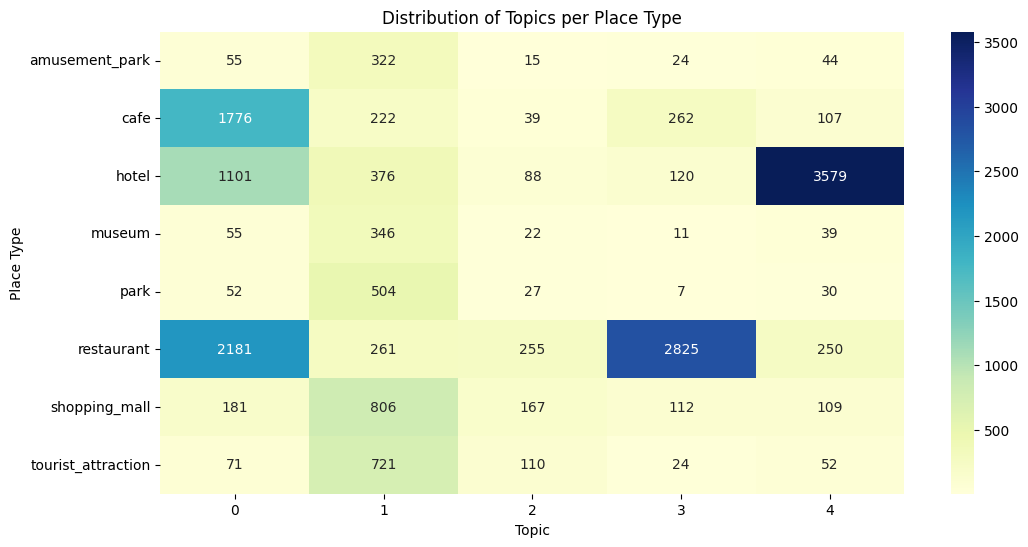

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

topic_summary = df.groupby(['Place Type', 'Topic']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(topic_summary, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Distribution of Topics per Place Type")
plt.ylabel("Place Type")
plt.xlabel("Topic")
plt.show()

In [11]:
cities = df['City'].dropna().unique()

n_topics = 5

for city in cities:
    print(f"\n--- Topics for {city} ---")

    city_df = df[df['City'] == city]

    texts = city_df['Cleaned Review'].dropna().values.astype('U')

    if len(texts) < 2:
        print("Not enough texts for topic modeling.")
        continue

    vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(texts)

    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(dtm)

    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(lda.components_):
        print(f"\nTopic #{idx + 1}:")
        print([words[i] for i in topic.argsort()[-10:]])



--- Topics for Hail ---

Topic #1:
['price', 'cleanliness', 'place', 'hotel', 'experience', 'god', 'good', 'food', 'excellent', 'service']

Topic #2:
['services', 'clean', 'service', 'hotel', 'restaurant', 'hail', 'staff', 'place', 'good', 'food']

Topic #3:
['clean', 'nice', 'rooms', 'hotel', 'service', 'great', 'breakfast', 'bad', 'room', 'good']

Topic #4:
['service', 'hail', 'delicious', 'staff', 'mall', 'visit', 'nice', 'coffee', 'place', 'good']

Topic #5:
['best', 'hotel', 'restaurant', 'clean', 'staff', 'hail', 'place', 'good', 'food', 'nice']

--- Topics for Umluj ---

Topic #1:
['staff', 'umluj', 'experience', 'best', 'restaurant', 'great', 'place', 'service', 'food', 'good']

Topic #2:
['price', 'family', 'really', 'place', 'staff', 'clean', 'taste', 'food', 'tasty', 'good']

Topic #3:
['best', 'stay', 'taste', 'experience', 'excellent', 'like', 'umluj', 'hotel', 'coffee', 'good']

Topic #4:
['great', 'sea', 'beach', 'good', 'nice', 'staff', 'place', 'clean', 'beautiful', '

In [13]:
texts = df[['City', 'Cleaned Review']].dropna()

cities = texts['City'].unique()

for city in cities:
    print(f"\n--- Topics for {city} ---")

    city_df = texts[texts['City'] == city]
    city_texts = city_df['Cleaned Review'].values.astype('U')

    if len(city_texts) < 5:
        print("Not enough reviews, skipping city.")
        continue

    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(city_texts)

    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(dtm)

    words = vectorizer.get_feature_names_out()

    for idx, topic in enumerate(lda.components_):
        print(f"\nTopic #{idx + 1}:")
        print([words[i] for i in topic.argsort()[-10:]])



--- Topics for Hail ---

Topic #1:
['price', 'cleanliness', 'place', 'hotel', 'experience', 'god', 'good', 'food', 'excellent', 'service']

Topic #2:
['services', 'clean', 'service', 'hotel', 'restaurant', 'hail', 'staff', 'place', 'good', 'food']

Topic #3:
['clean', 'nice', 'rooms', 'hotel', 'service', 'great', 'breakfast', 'bad', 'room', 'good']

Topic #4:
['service', 'hail', 'delicious', 'staff', 'mall', 'visit', 'nice', 'coffee', 'place', 'good']

Topic #5:
['best', 'hotel', 'restaurant', 'clean', 'staff', 'hail', 'place', 'good', 'food', 'nice']

--- Topics for Umluj ---

Topic #1:
['staff', 'umluj', 'experience', 'best', 'restaurant', 'great', 'place', 'service', 'food', 'good']

Topic #2:
['price', 'family', 'really', 'place', 'staff', 'clean', 'taste', 'food', 'tasty', 'good']

Topic #3:
['best', 'stay', 'taste', 'experience', 'excellent', 'like', 'umluj', 'hotel', 'coffee', 'good']

Topic #4:
['great', 'sea', 'beach', 'good', 'nice', 'staff', 'place', 'clean', 'beautiful', '


--- Topics for Hail ---

Topic #1:
['price', 'cleanliness', 'place', 'hotel', 'experience', 'god', 'good', 'food', 'excellent', 'service']


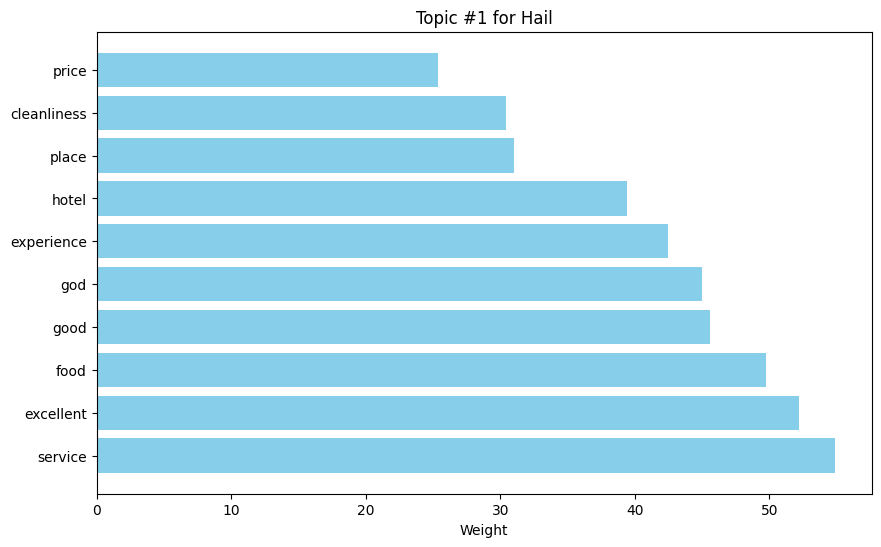


Topic #2:
['services', 'clean', 'service', 'hotel', 'restaurant', 'hail', 'staff', 'place', 'good', 'food']


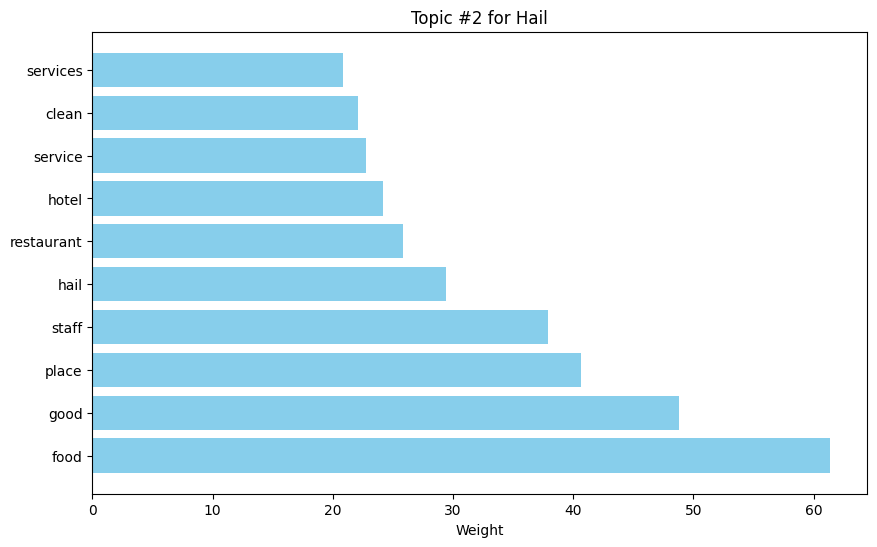


Topic #3:
['clean', 'nice', 'rooms', 'hotel', 'service', 'great', 'breakfast', 'bad', 'room', 'good']


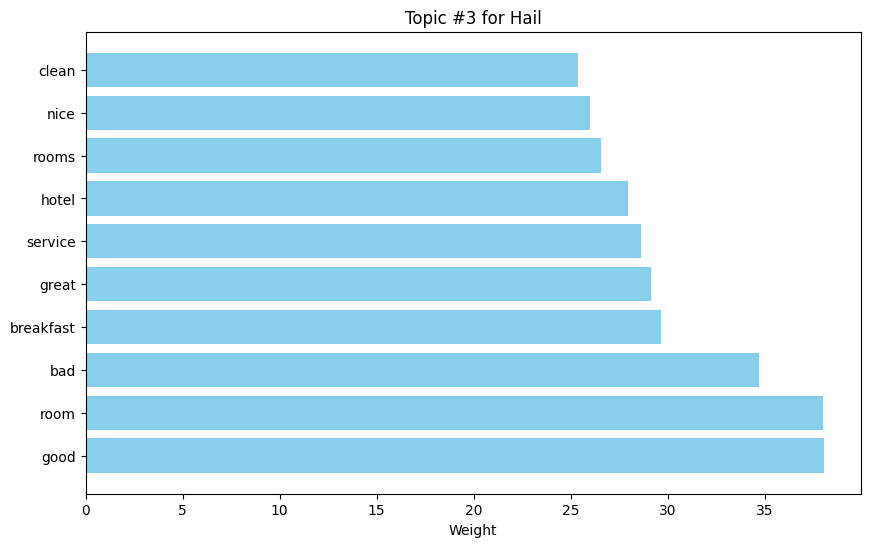


Topic #4:
['service', 'hail', 'delicious', 'staff', 'mall', 'visit', 'nice', 'coffee', 'place', 'good']


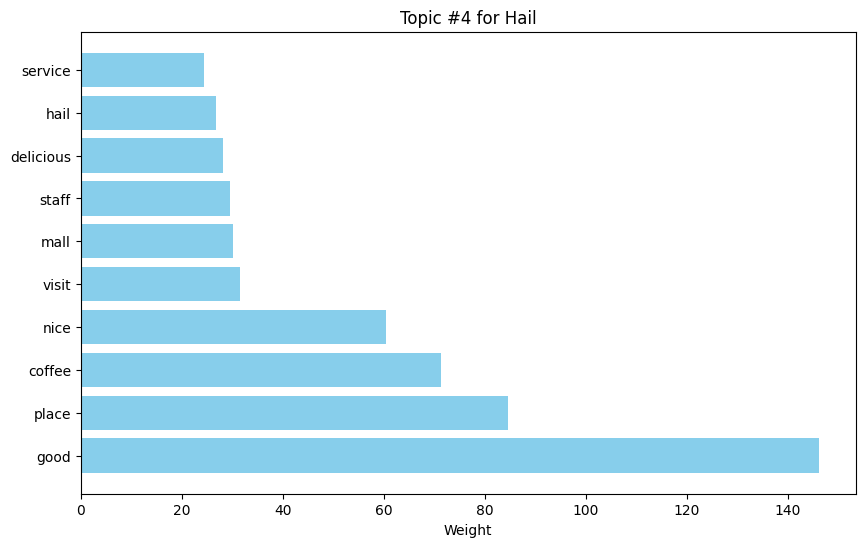


Topic #5:
['best', 'hotel', 'restaurant', 'clean', 'staff', 'hail', 'place', 'good', 'food', 'nice']


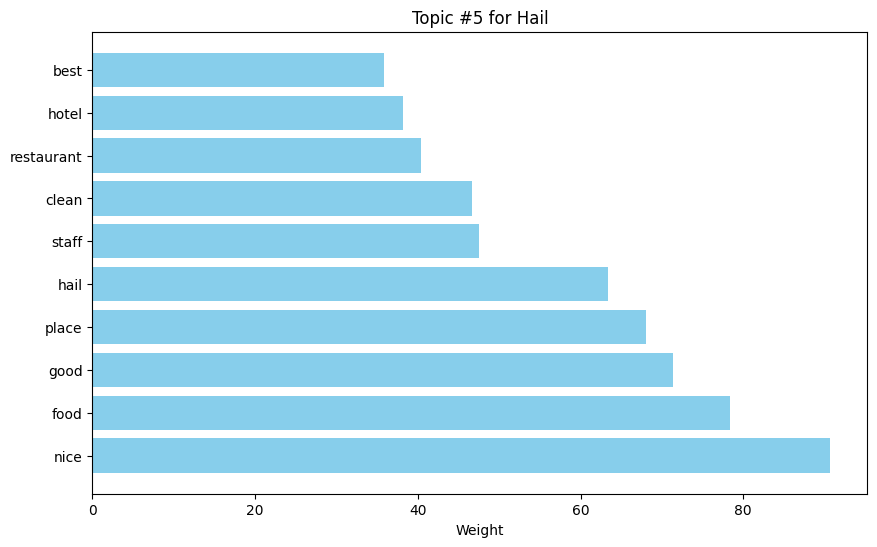


--- Topics for Umluj ---

Topic #1:
['staff', 'umluj', 'experience', 'best', 'restaurant', 'great', 'place', 'service', 'food', 'good']


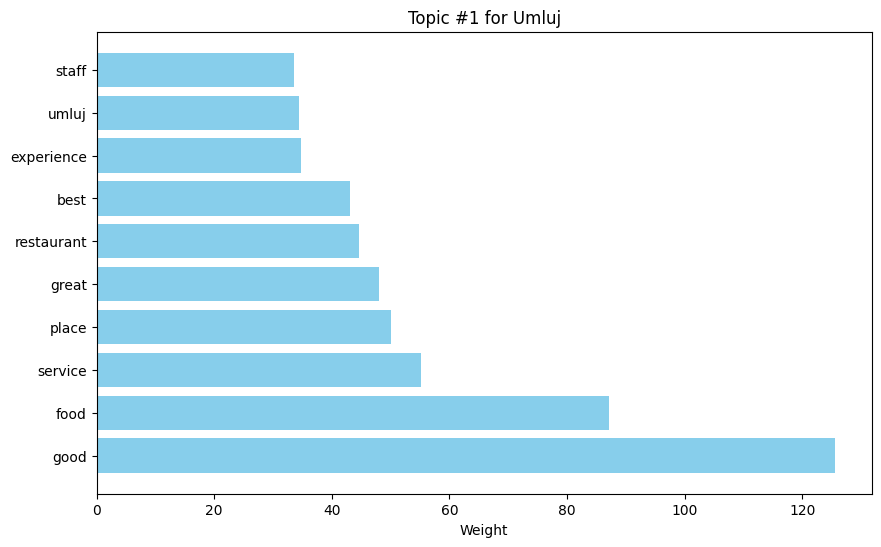


Topic #2:
['price', 'family', 'really', 'place', 'staff', 'clean', 'taste', 'food', 'tasty', 'good']


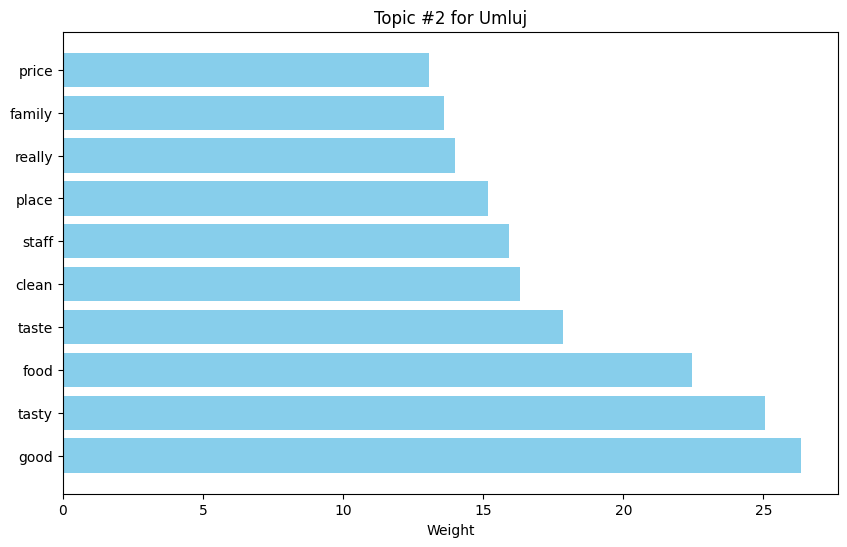


Topic #3:
['best', 'stay', 'taste', 'experience', 'excellent', 'like', 'umluj', 'hotel', 'coffee', 'good']


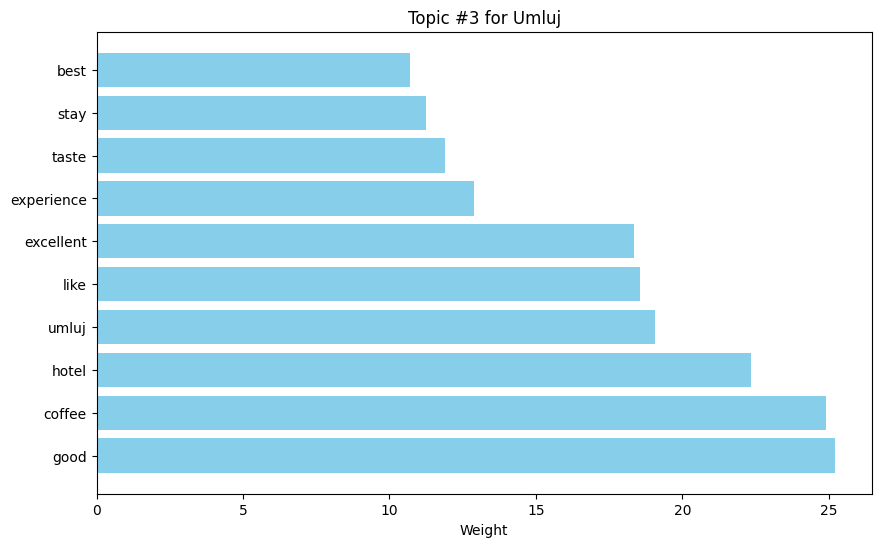


Topic #4:
['great', 'sea', 'beach', 'good', 'nice', 'staff', 'place', 'clean', 'beautiful', 'hotel']


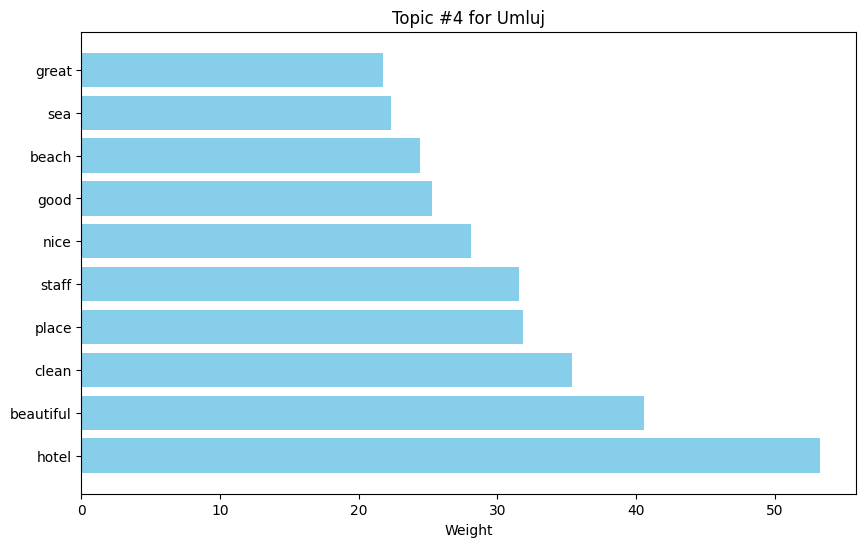


Topic #5:
['restaurant', 'market', 'hot', 'place', 'available', 'delicious', 'good', 'food', 'god', 'nice']


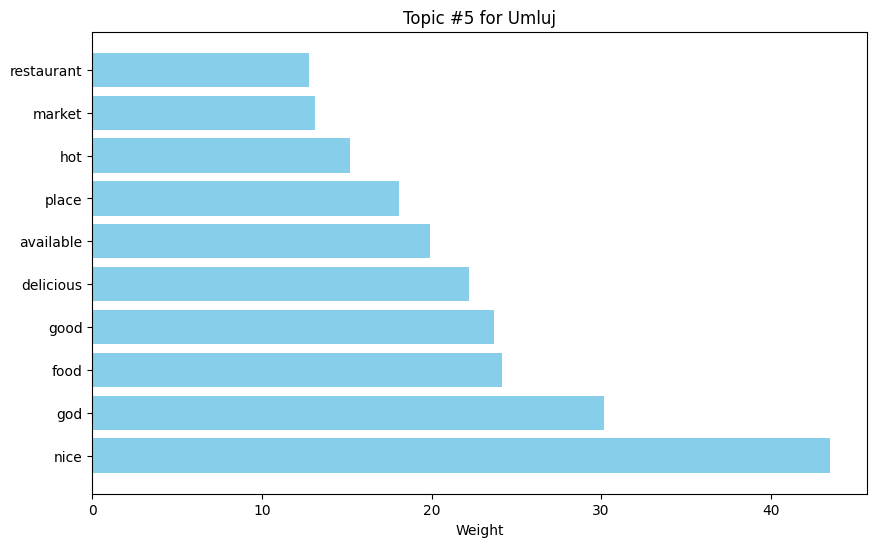


--- Topics for Unaizah ---

Topic #1:
['thanks', 'recommend', 'food', 'experience', 'good', 'staff', 'amazing', 'place', 'chicken', 'service']


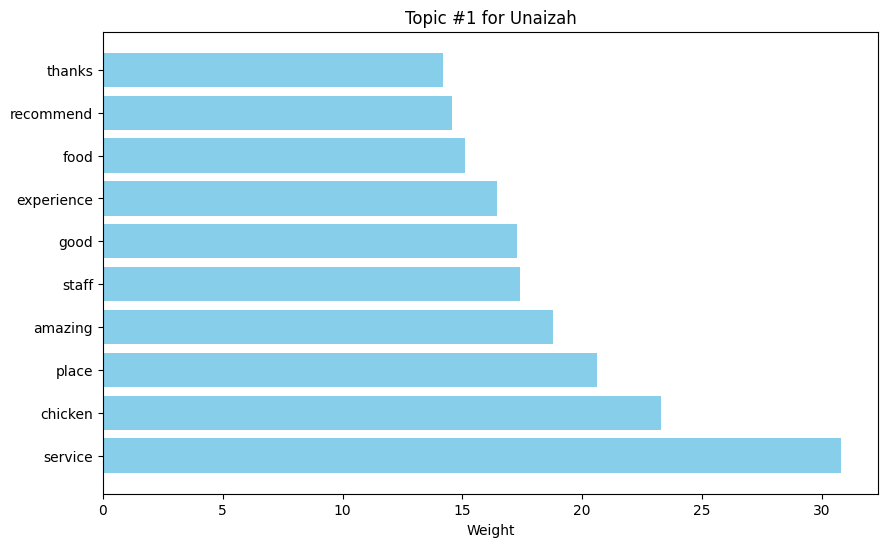


Topic #2:
['excellent', 'bad', 'visit', 'like', 'children', 'great', 'staff', 'time', 'beautiful', 'place']


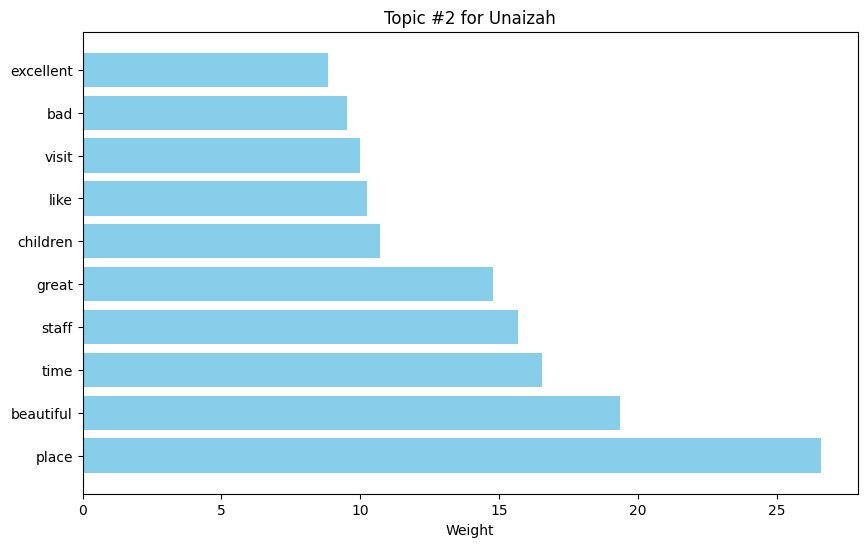


Topic #3:
['food', 'shawarma', 'beautiful', 'excellent', 'place', 'coffee', 'god', 'taste', 'delicious', 'good']


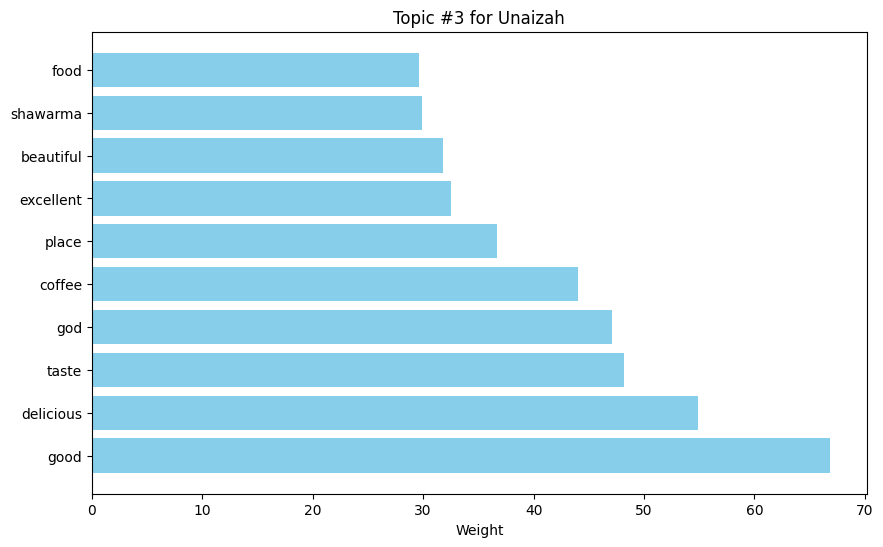


Topic #4:
['best', 'delicious', 'room', 'staff', 'service', 'restaurant', 'great', 'food', 'place', 'good']


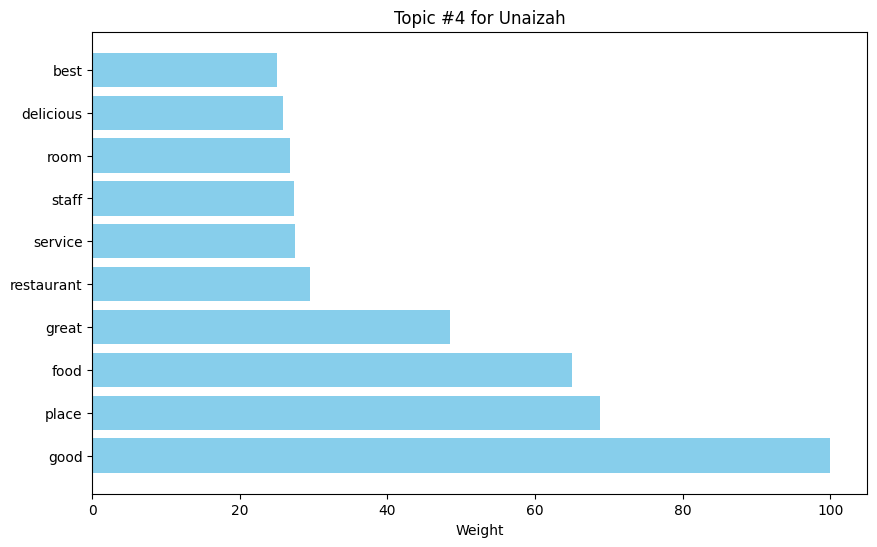


Topic #5:
['room', 'chicken', 'food', 'best', 'hotel', 'clean', 'service', 'place', 'nice', 'good']


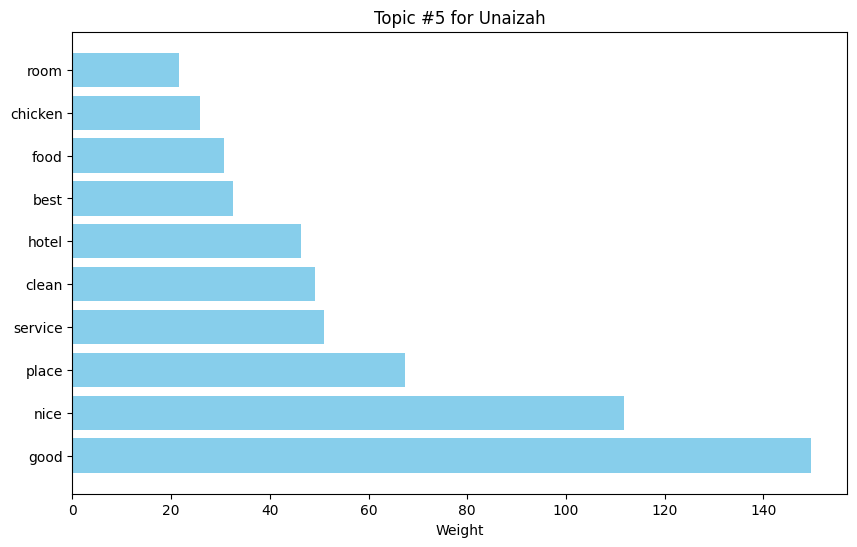


--- Topics for Mecca ---

Topic #1:
['restaurant', 'nice', 'place', 'best', 'great', 'like', 'taste', 'chicken', 'good', 'food']


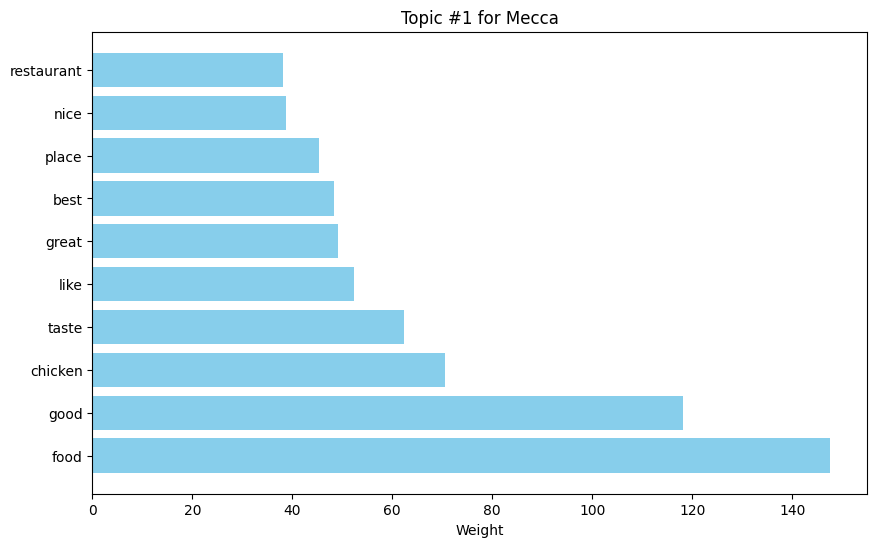


Topic #2:
['recommend', 'food', 'makkah', 'room', 'great', 'experience', 'staff', 'stay', 'service', 'hotel']


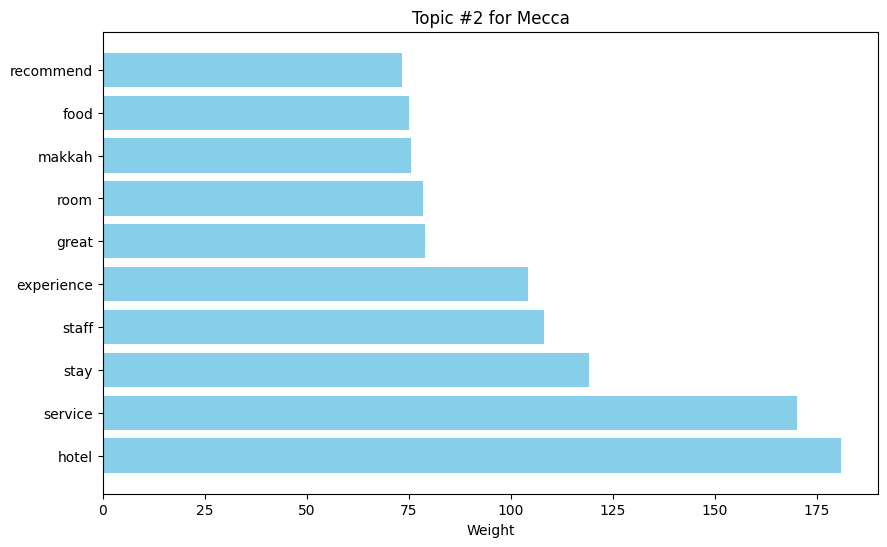


Topic #3:
['hira', 'good', 'rooms', 'cave', 'small', 'water', 'place', 'makkah', 'hotel', 'room']


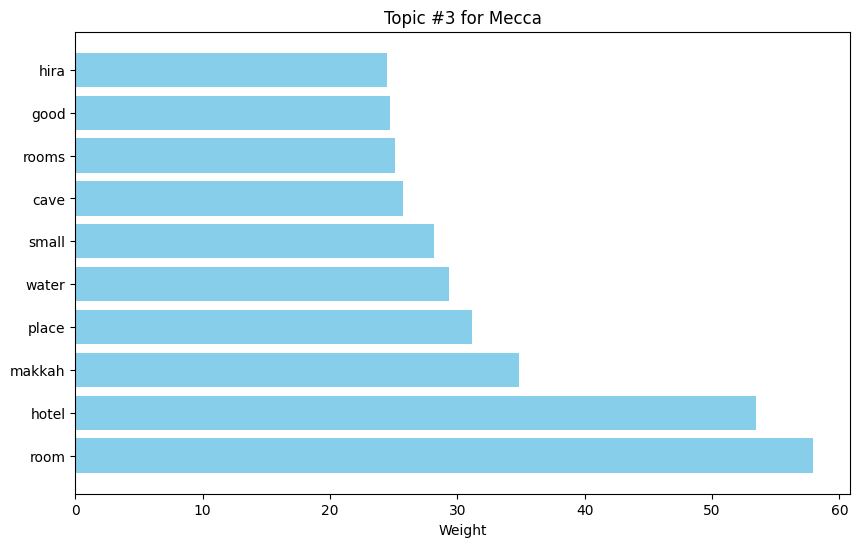


Topic #4:
['time', 'park', 'visit', 'great', 'nice', 'experience', 'coffee', 'food', 'good', 'place']


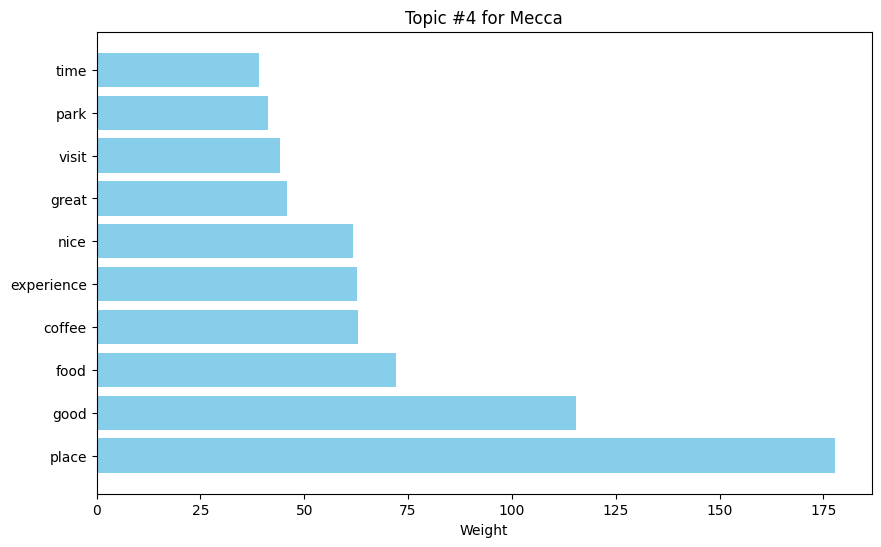


Topic #5:
['location', 'staff', 'food', 'room', 'rooms', 'mall', 'haram', 'good', 'service', 'hotel']


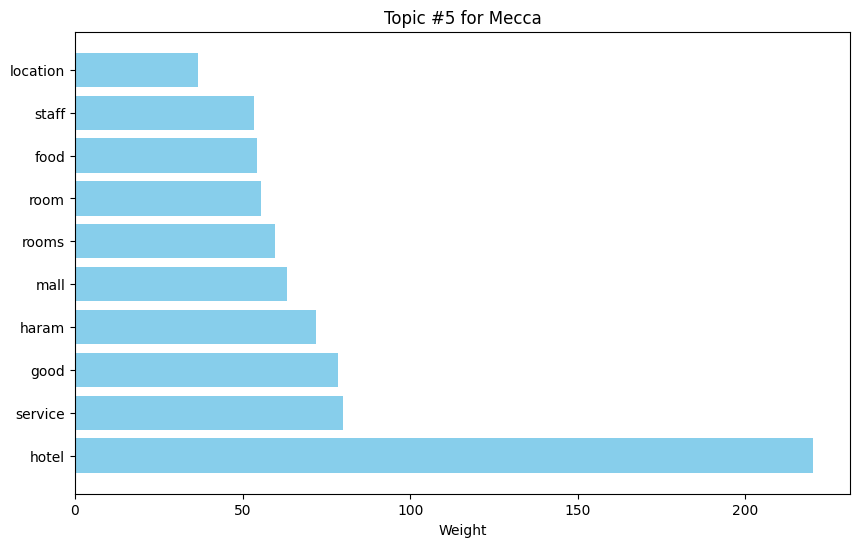


--- Topics for Buraidah ---

Topic #1:
['visit', 'amazing', 'service', 'great', 'delicious', 'food', 'good', 'nice', 'place', 'coffee']


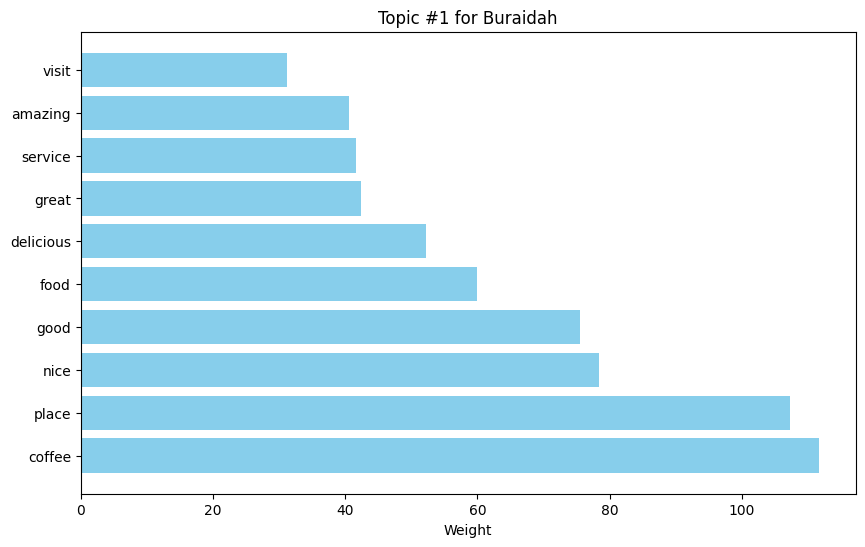


Topic #2:
['experience', 'taste', 'best', 'clean', 'great', 'place', 'staff', 'service', 'food', 'good']


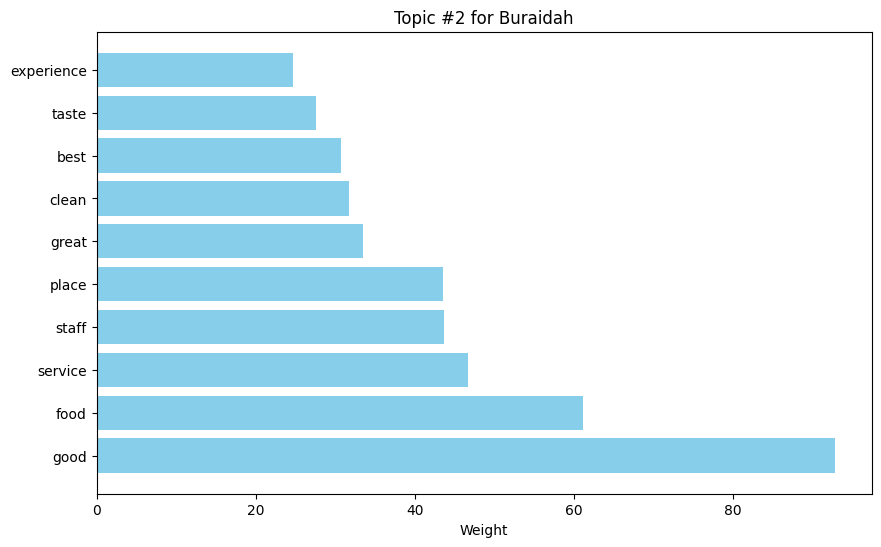


Topic #3:
['like', 'order', 'service', 'food', 'hotel', 'place', 'time', 'bad', 'park', 'good']


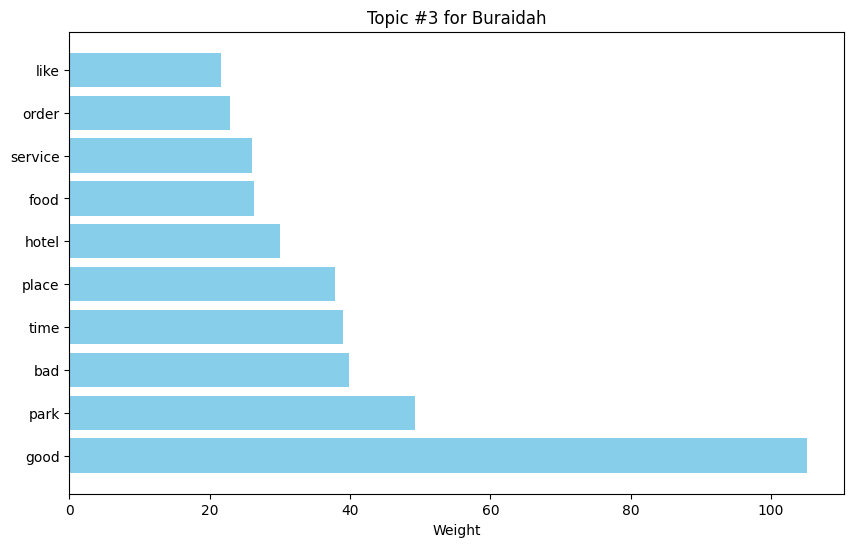


Topic #4:
['rooms', 'location', 'service', 'staff', 'nice', 'excellent', 'room', 'hotel', 'clean', 'good']


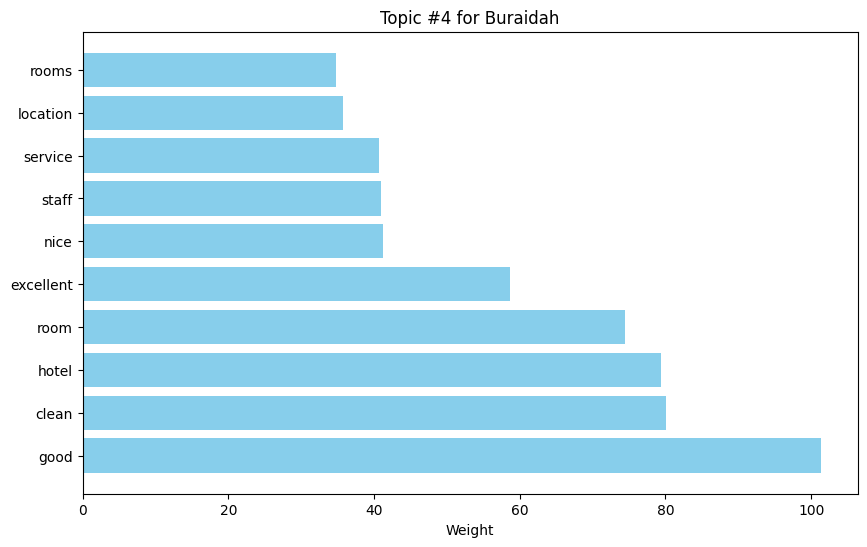


Topic #5:
['buraidah', 'taste', 'ordered', 'beautiful', 'good', 'service', 'rice', 'food', 'place', 'chicken']


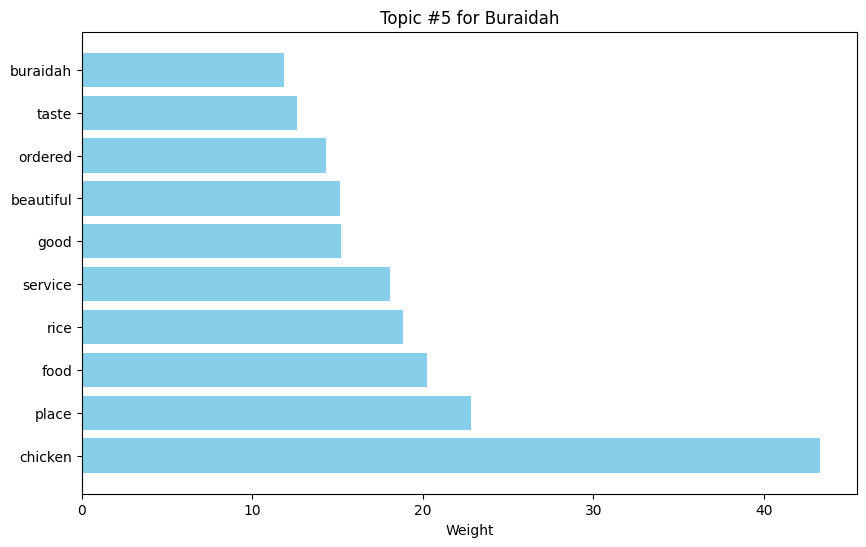


--- Topics for Al Ahsa ---

Topic #1:
['location', 'park', 'service', 'stay', 'clean', 'nice', 'room', 'rooms', 'good', 'hotel']


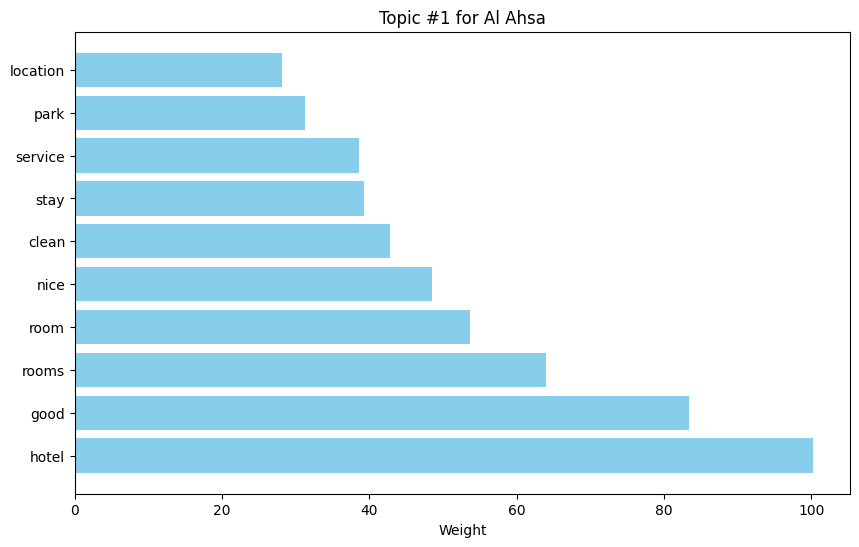


Topic #2:
['really', 'nice', 'like', 'order', 'ordered', 'experience', 'service', 'chicken', 'place', 'food']


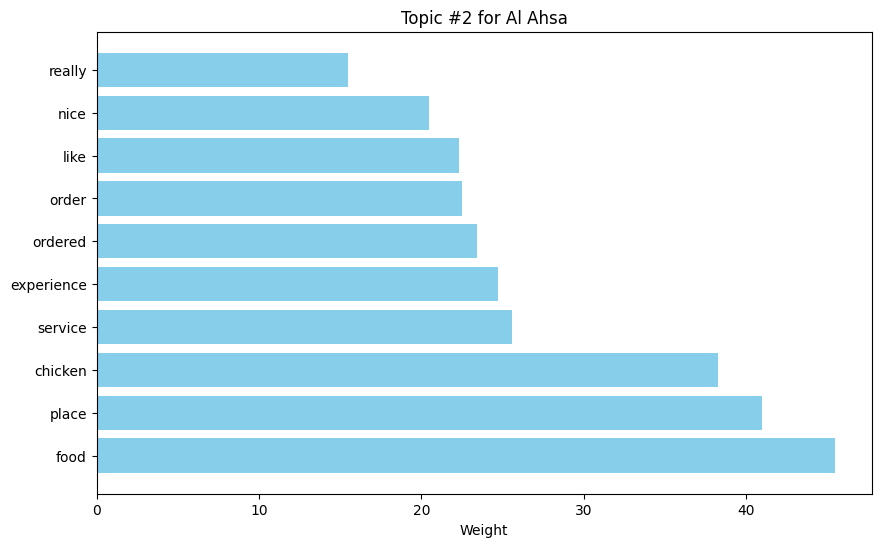


Topic #3:
['nice', 'service', 'good', 'friendly', 'great', 'hotel', 'staff', 'clean', 'place', 'coffee']


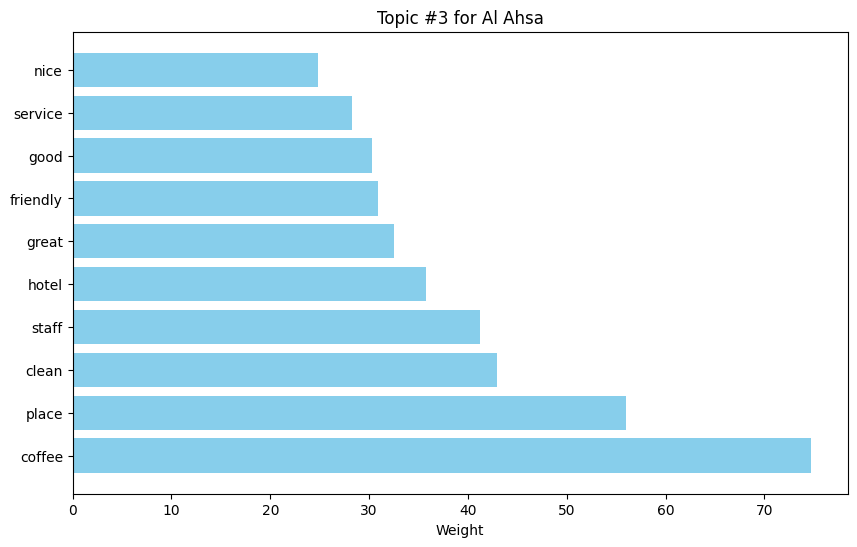


Topic #4:
['experience', 'best', 'staff', 'delicious', 'great', 'service', 'restaurant', 'place', 'food', 'good']


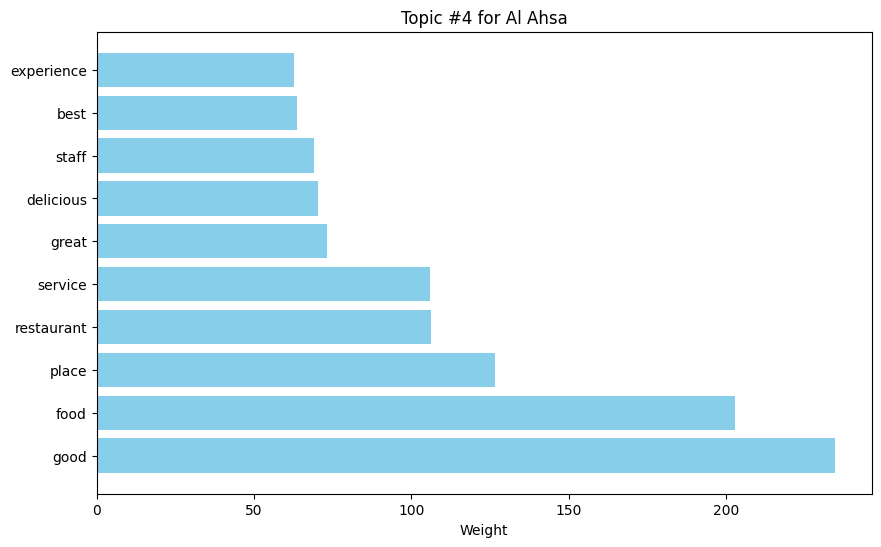


Topic #5:
['old', 'staff', 'nice', 'good', 'stay', 'al', 'clean', 'room', 'place', 'hotel']


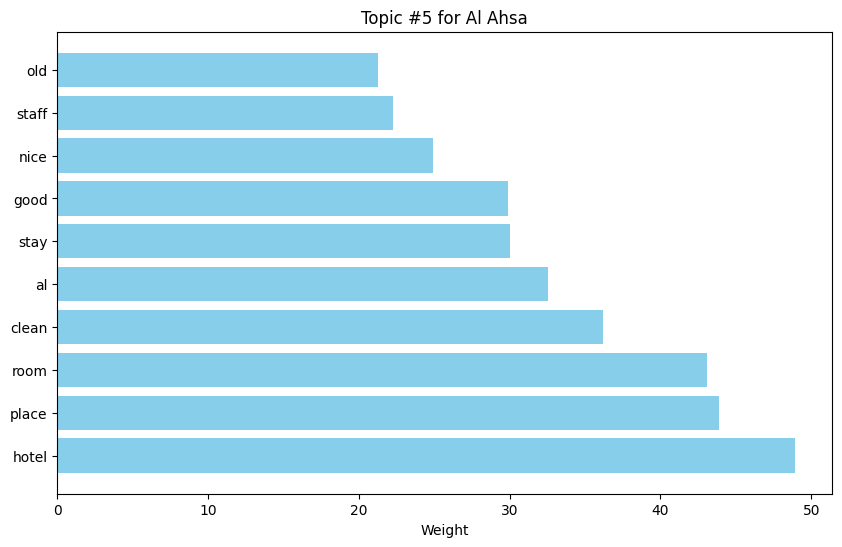


--- Topics for AlUla ---

Topic #1:
['quality', 'great', 'food', 'nice', 'like', 'bad', 'taste', 'experience', 'place', 'good']


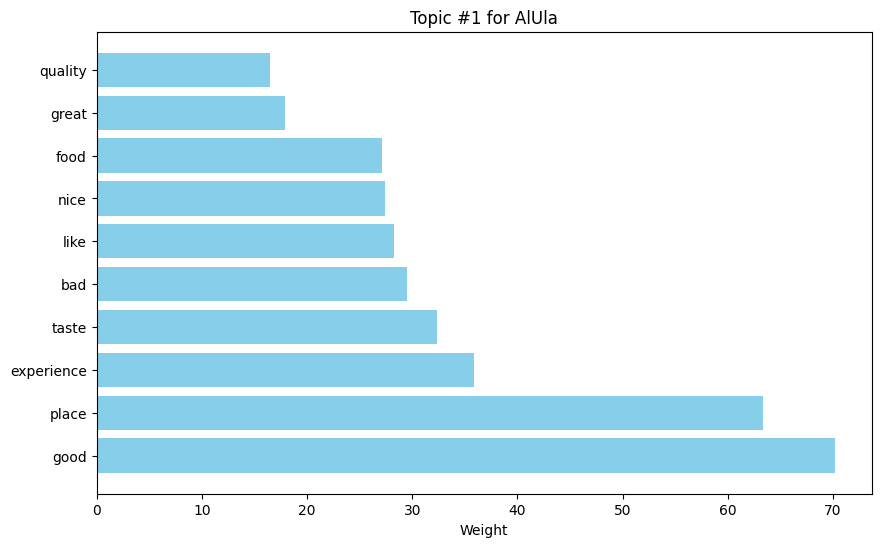


Topic #2:
['nice', 'service', 'amazing', 'alula', 'place', 'great', 'good', 'restaurant', 'delicious', 'food']


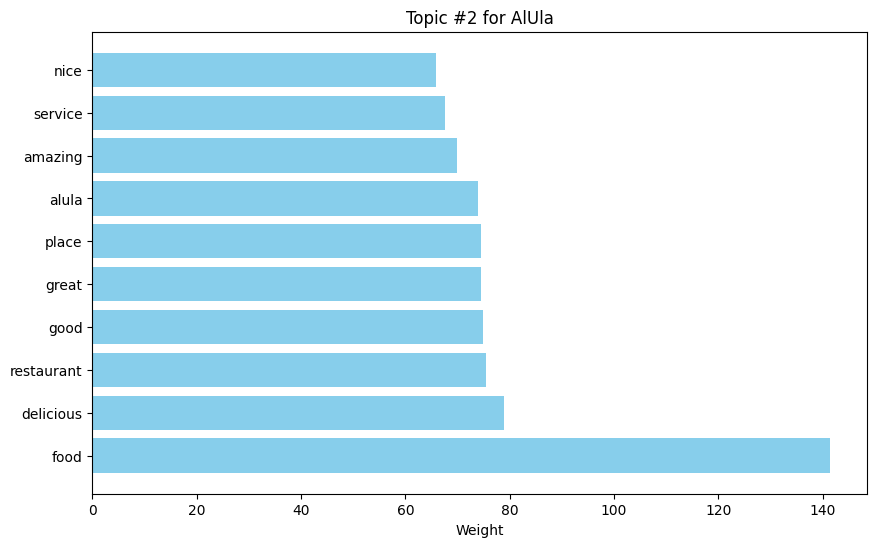


Topic #3:
['rooms', 'service', 'recommend', 'alula', 'room', 'place', 'clean', 'hotel', 'experience', 'stay']


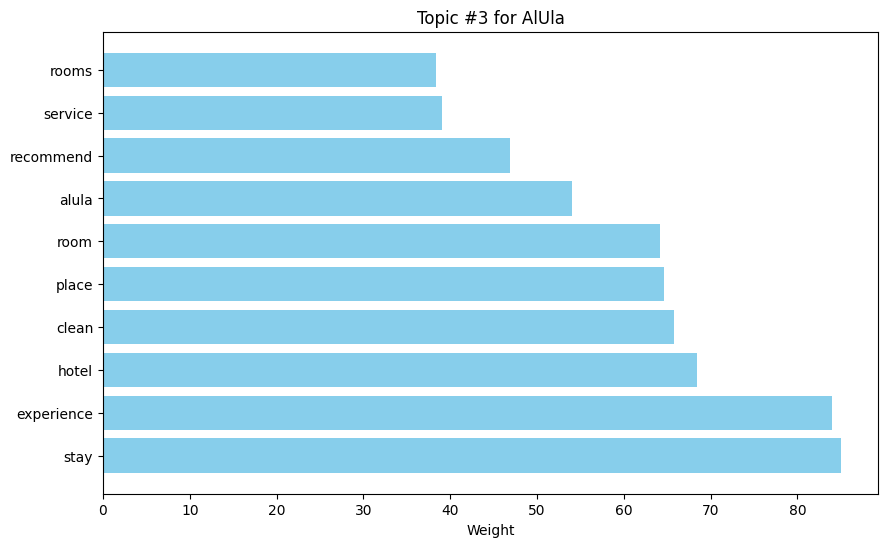


Topic #4:
['pm', 'history', 'mountain', 'good', 'al', 'price', 'experience', 'nice', 'place', 'alula']


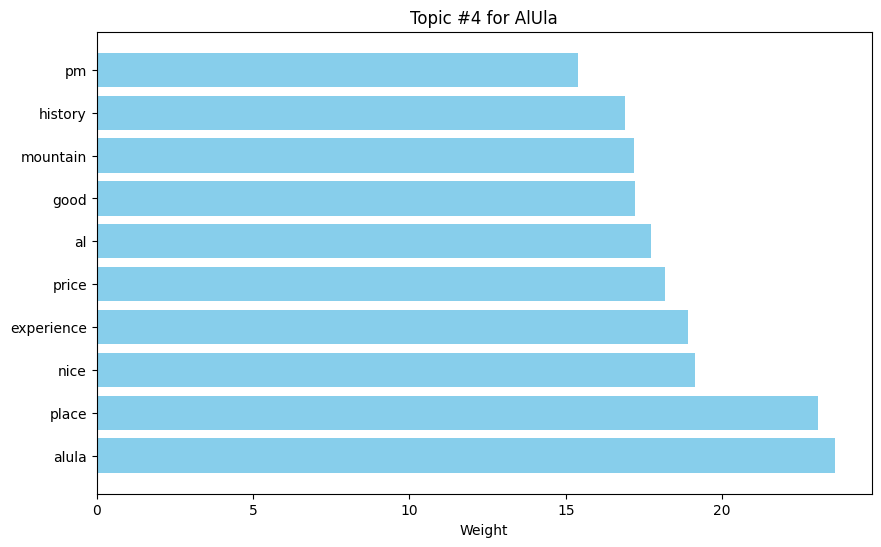


Topic #5:
['restaurant', 'excellent', 'good', 'beautiful', 'food', 'park', 'hotel', 'staff', 'service', 'place']


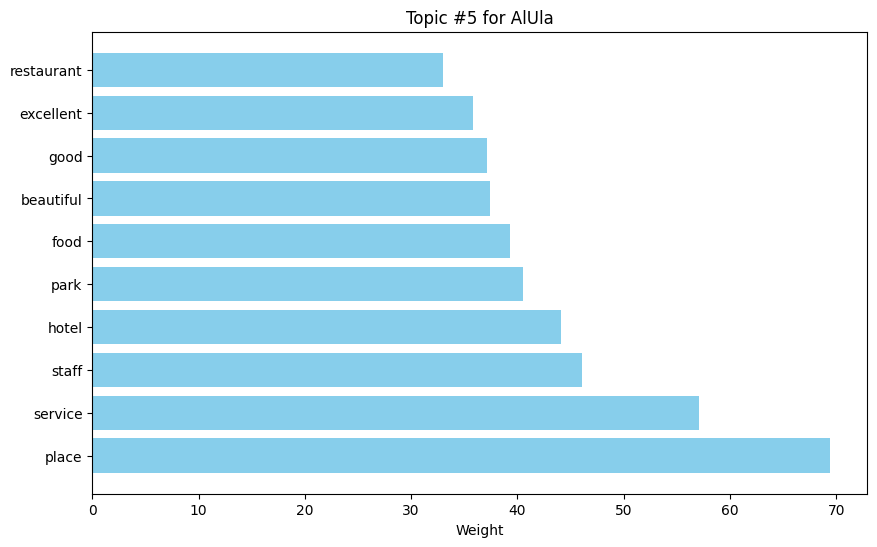


--- Topics for Jeddah ---

Topic #1:
['friendly', 'great', 'stay', 'service', 'rooms', 'experience', 'clean', 'staff', 'good', 'hotel']


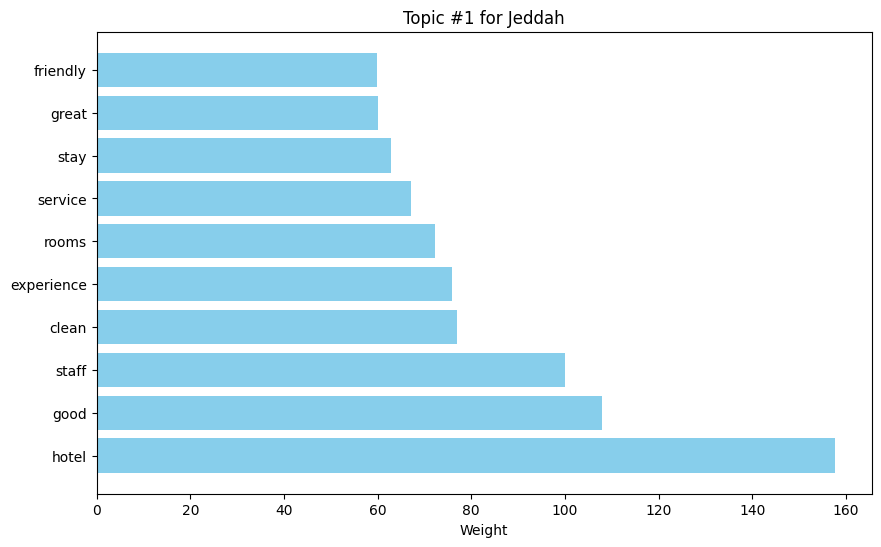


Topic #2:
['area', 'jeddah', 'good', 'shopping', 'great', 'nice', 'park', 'kids', 'mall', 'place']


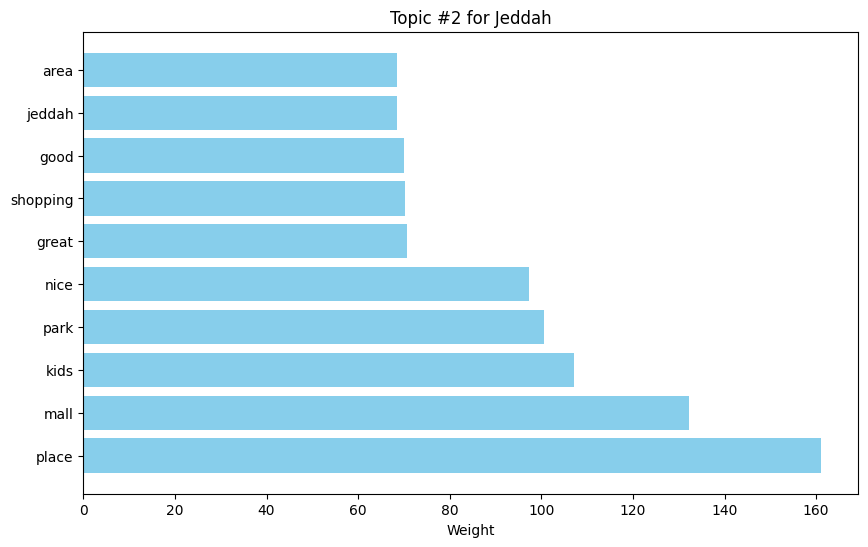


Topic #3:
['water', 'reception', 'like', 'clean', 'service', 'experience', 'staff', 'stay', 'hotel', 'room']


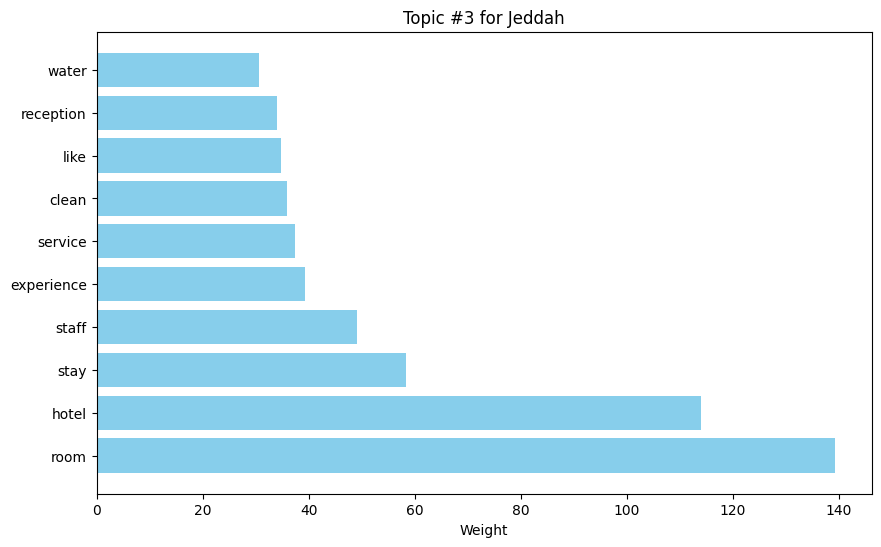


Topic #4:
['staff', 'atmosphere', 'place', 'great', 'delicious', 'jeddah', 'restaurant', 'experience', 'service', 'food']


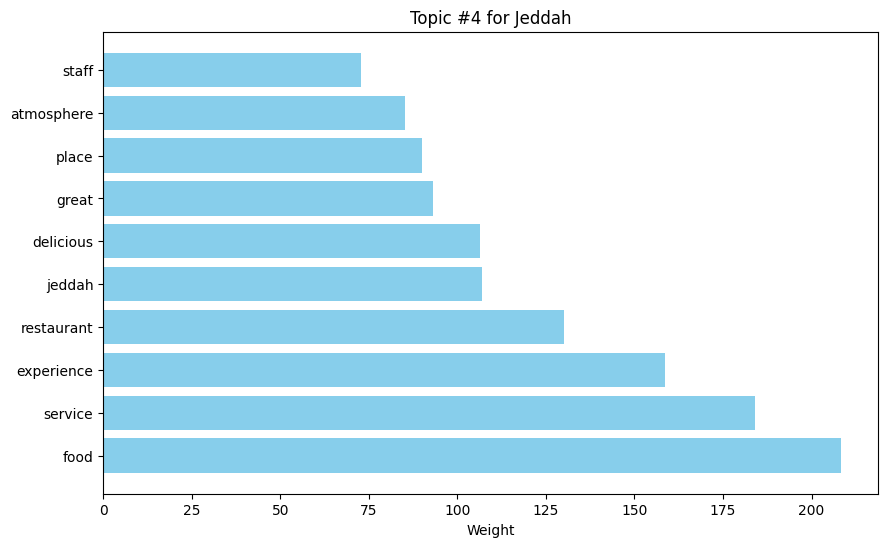


Topic #5:
['try', 'nice', 'place', 'great', 'staff', 'amazing', 'best', 'service', 'food', 'good']


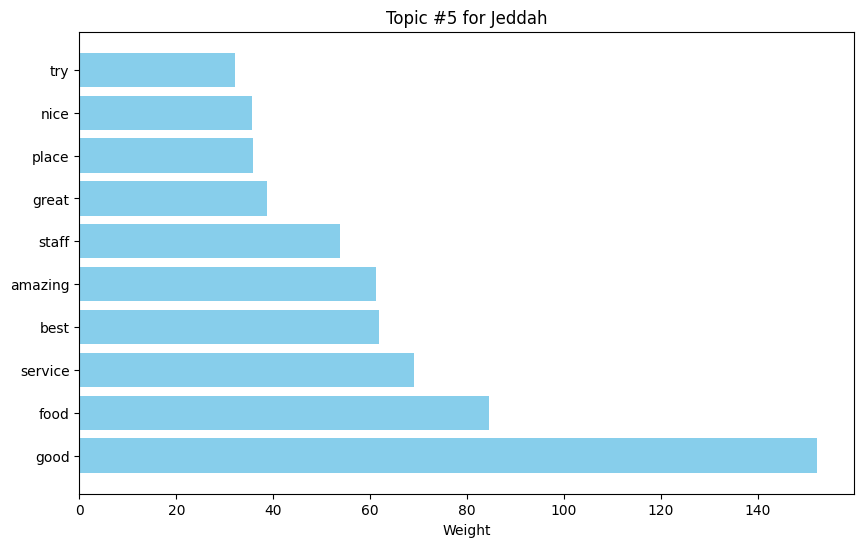


--- Topics for Abha ---

Topic #1:
['amazing', 'great', 'friendly', 'clean', 'best', 'abha', 'hotel', 'coffee', 'staff', 'place']


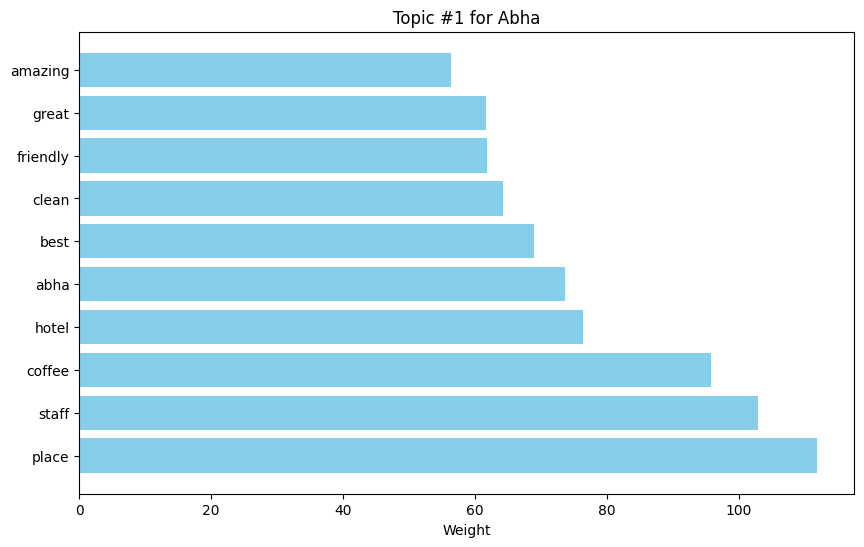


Topic #2:
['area', 'parking', 'clean', 'visit', 'price', 'abha', 'nice', 'hotel', 'place', 'good']


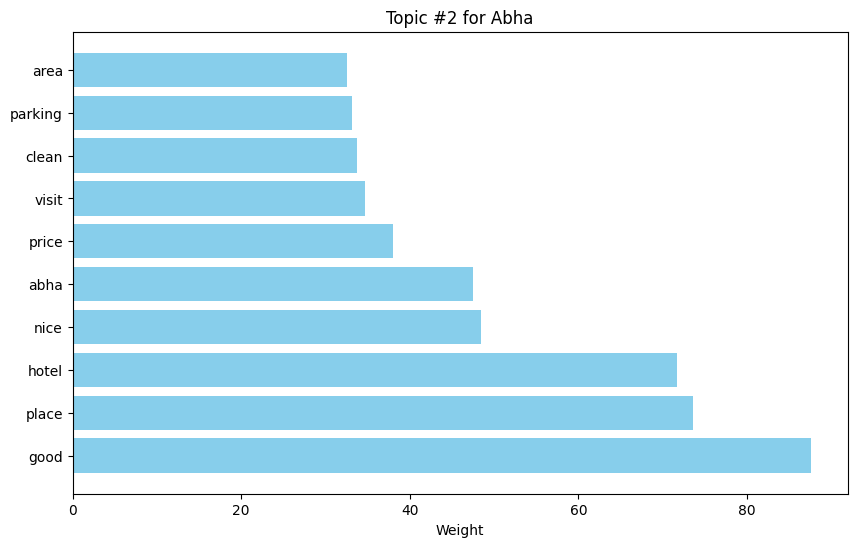


Topic #3:
['tried', 'restaurant', 'place', 'taste', 'tasty', 'chicken', 'service', 'delicious', 'food', 'good']


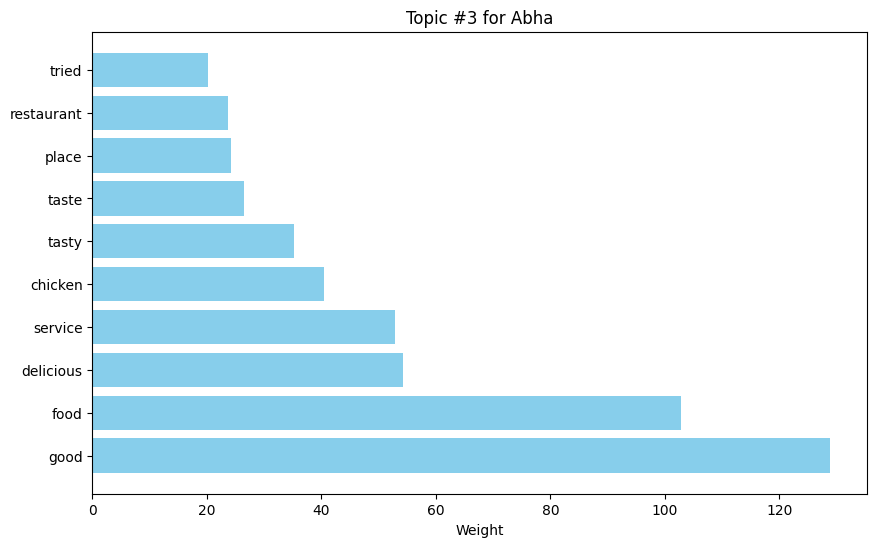


Topic #4:
['thank', 'abha', 'clean', 'beautiful', 'rooms', 'park', 'place', 'service', 'god', 'hotel']


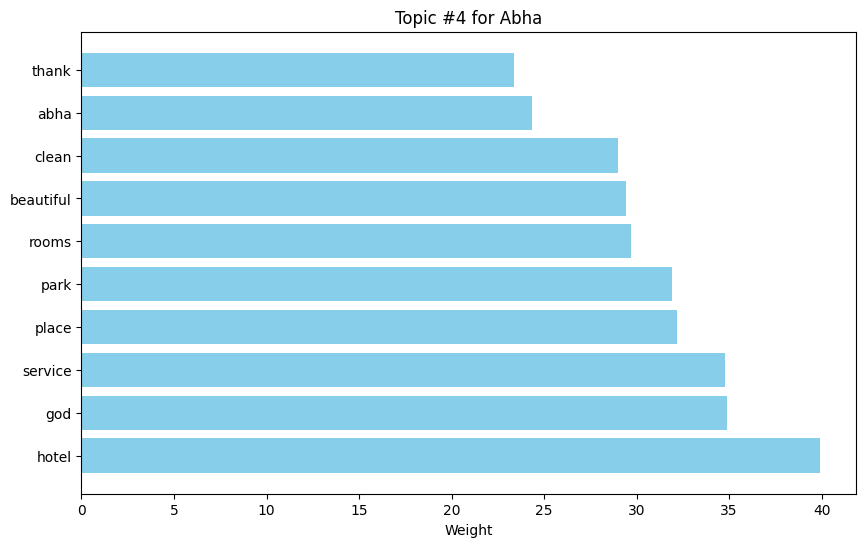


Topic #5:
['really', 'staff', 'good', 'abha', 'delicious', 'great', 'experience', 'service', 'restaurant', 'food']


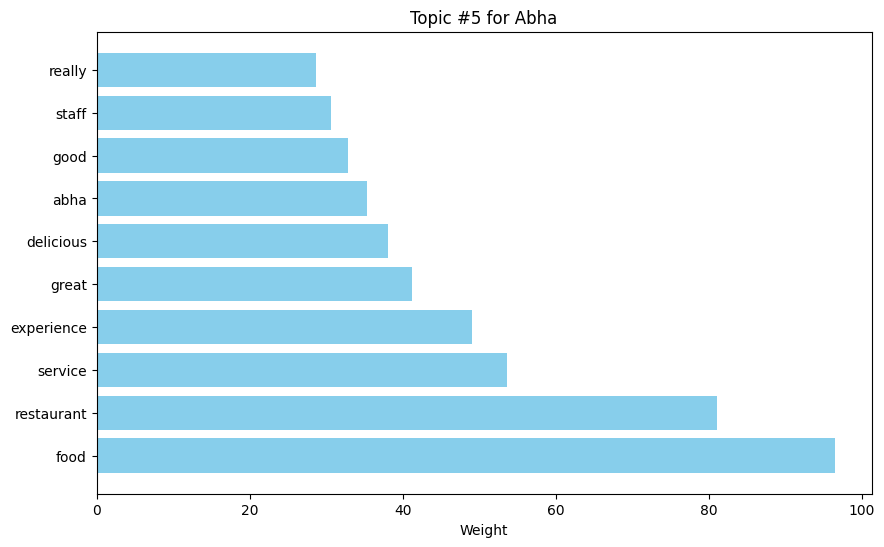


--- Topics for Medina ---

Topic #1:
['recommend', 'great', 'rooms', 'clean', 'experience', 'stay', 'staff', 'service', 'room', 'hotel']


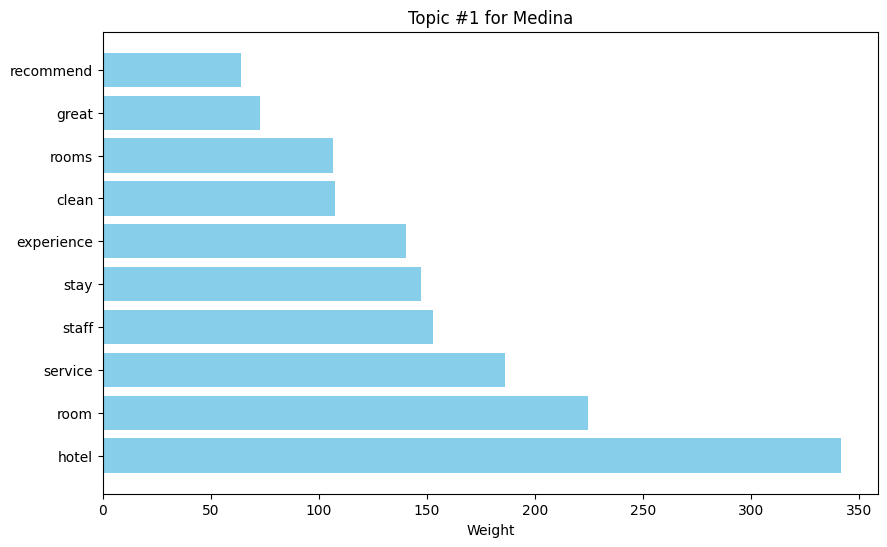


Topic #2:
['peace', 'madinah', 'history', 'allah', 'quba', 'place', 'visit', 'masjid', 'prophet', 'mosque']


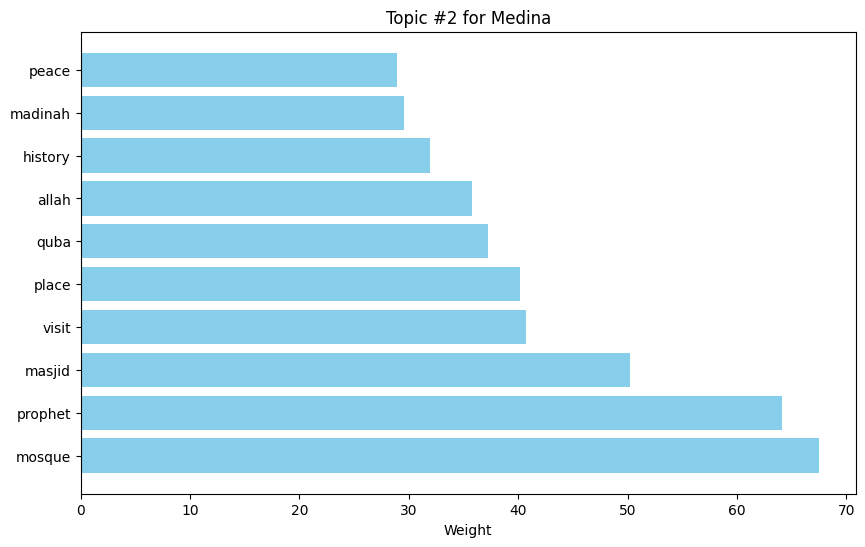


Topic #3:
['excellent', 'experience', 'visit', 'good', 'food', 'museum', 'kids', 'area', 'park', 'place']


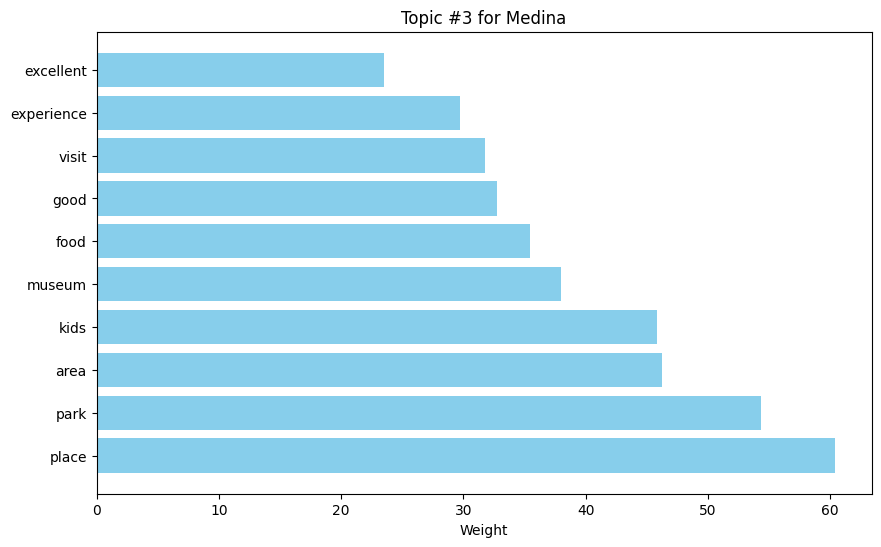


Topic #4:
['staff', 'clean', 'like', 'time', 'hotel', 'service', 'nice', 'place', 'food', 'good']


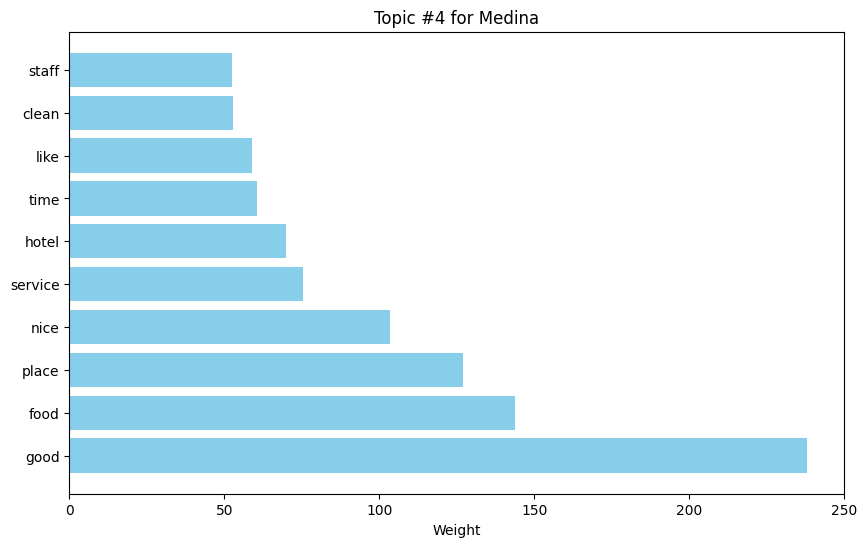


Topic #5:
['madinah', 'taste', 'best', 'delicious', 'amazing', 'place', 'restaurant', 'good', 'great', 'food']


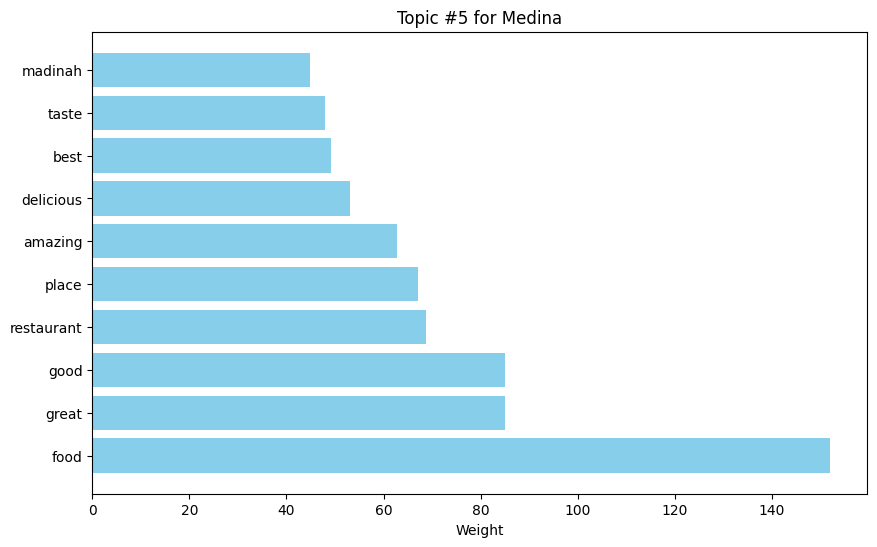


--- Topics for Khobar ---

Topic #1:
['park', 'friendly', 'visit', 'excellent', 'service', 'food', 'nice', 'great', 'good', 'place']


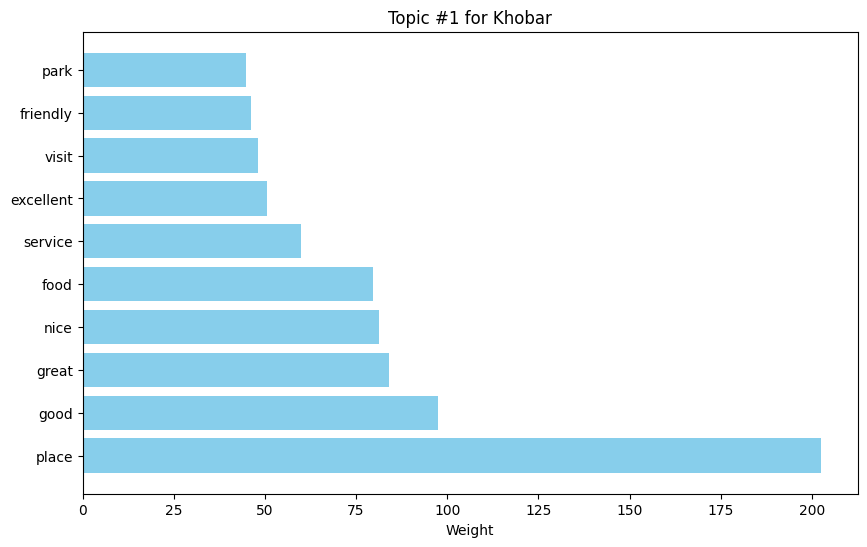


Topic #2:
['dining', 'highly', 'great', 'staff', 'recommend', 'delicious', 'restaurant', 'service', 'food', 'experience']


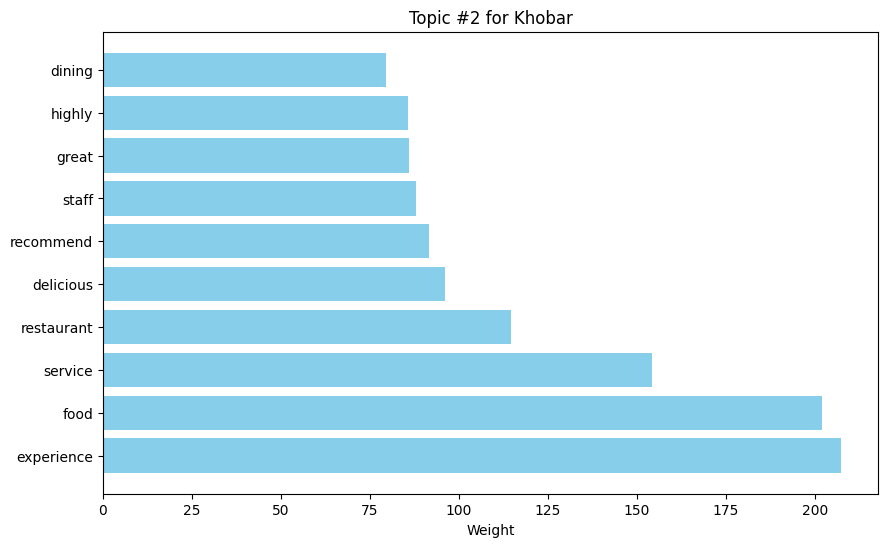


Topic #3:
['best', 'amazing', 'khobar', 'area', 'kids', 'good', 'coffee', 'mall', 'great', 'place']


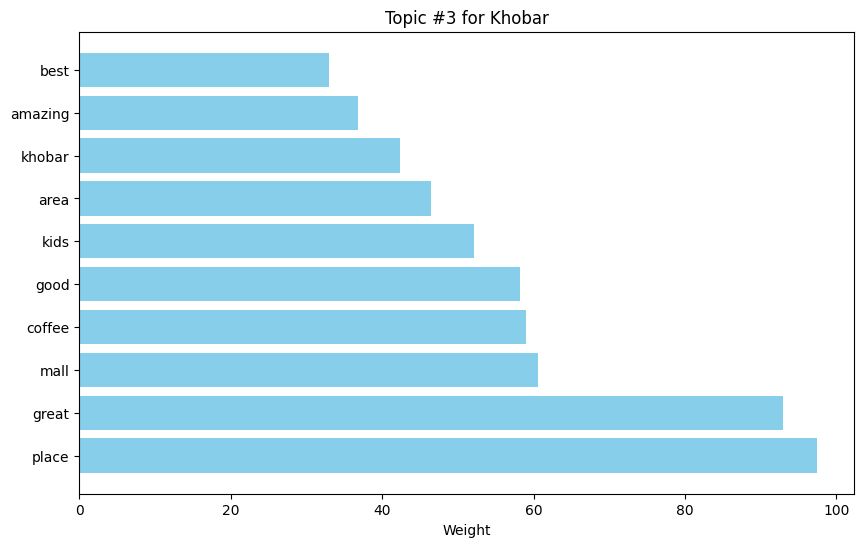


Topic #4:
['food', 'visit', 'area', 'like', 'really', 'service', 'nice', 'place', 'coffee', 'good']


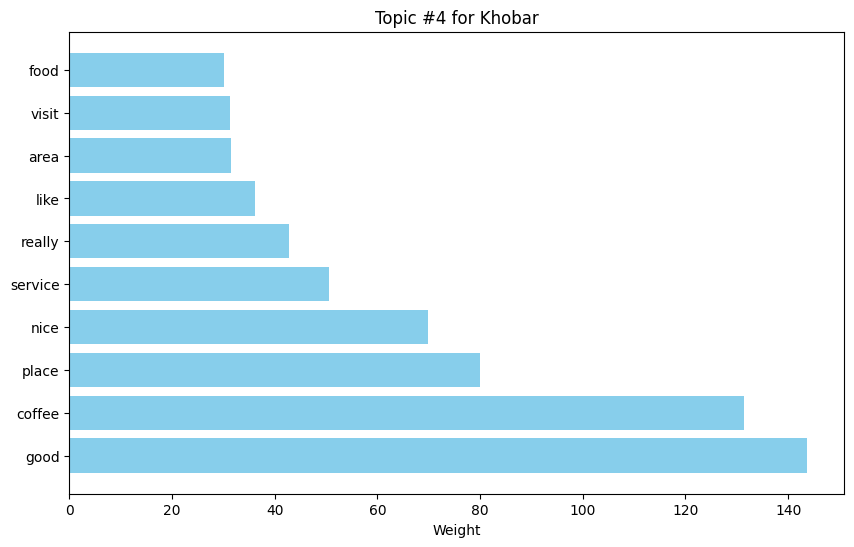


Topic #5:
['location', 'reception', 'clean', 'good', 'service', 'rooms', 'staff', 'stay', 'room', 'hotel']


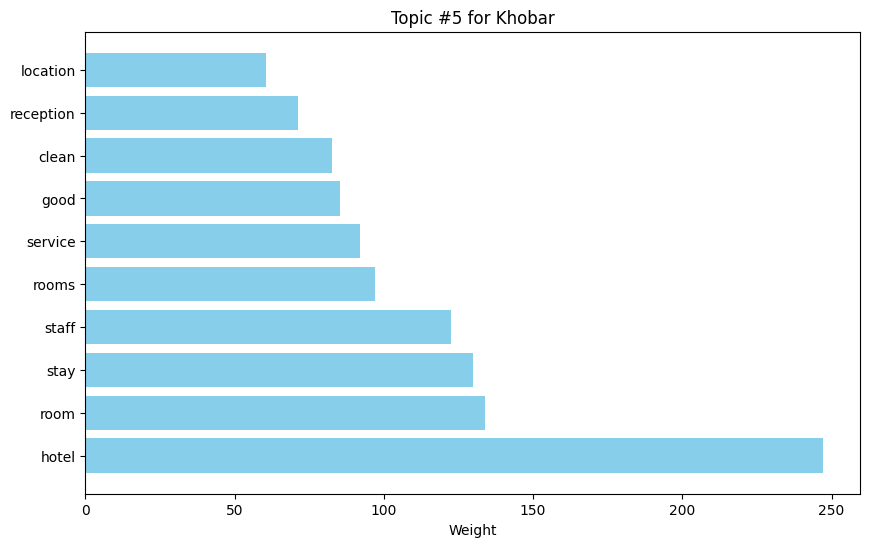


--- Topics for Taif ---

Topic #1:
['taste', 'delicious', 'staff', 'place', 'taif', 'good', 'great', 'restaurant', 'service', 'food']


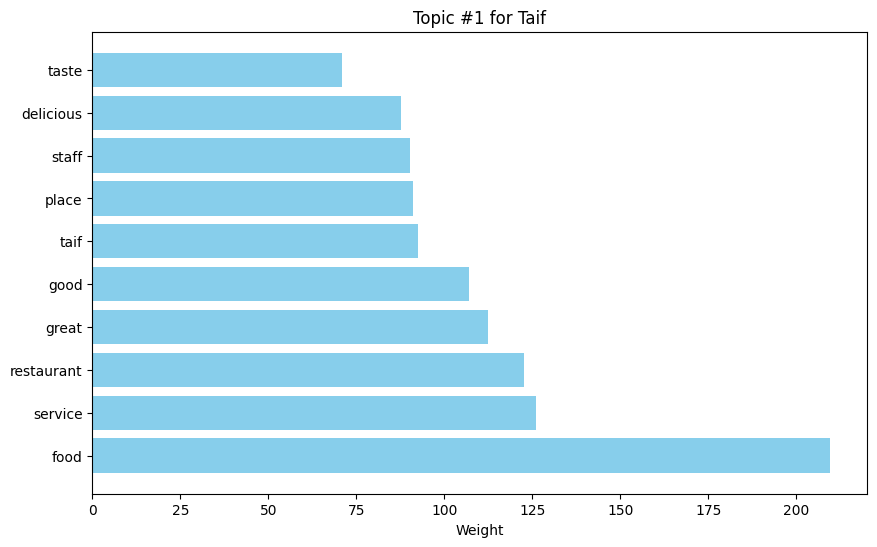


Topic #2:
['area', 'parking', 'experience', 'kids', 'beautiful', 'mall', 'good', 'taif', 'park', 'place']


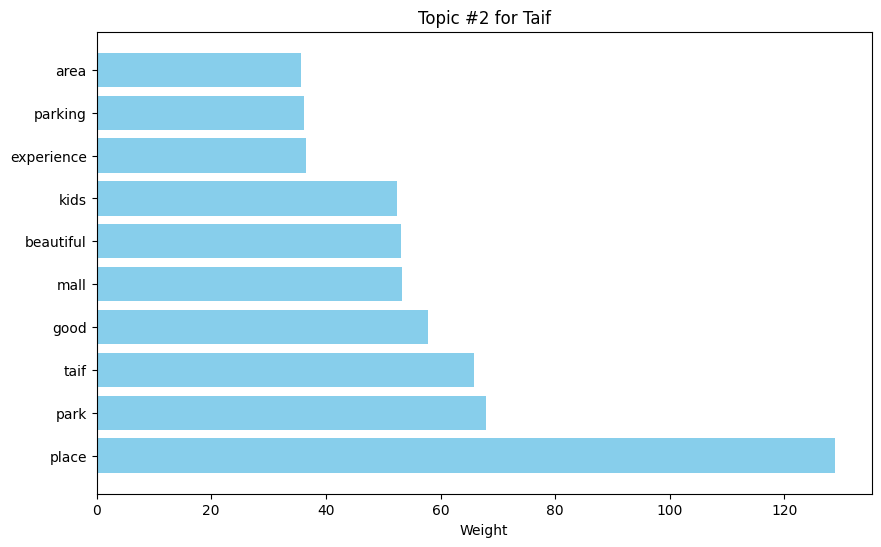


Topic #3:
['staff', 'bad', 'nice', 'stay', 'service', 'rooms', 'clean', 'room', 'hotel', 'good']


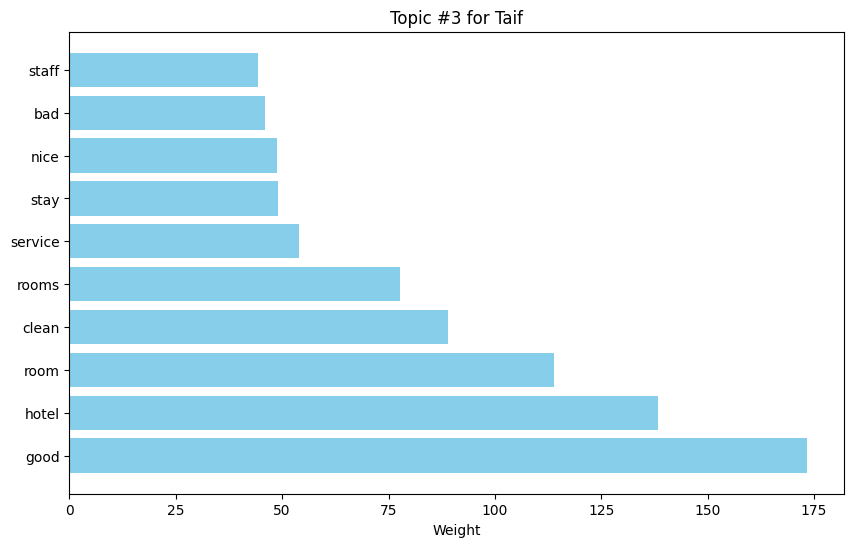


Topic #4:
['thank', 'room', 'bless', 'excellent', 'clean', 'breakfast', 'staff', 'stay', 'hotel', 'god']


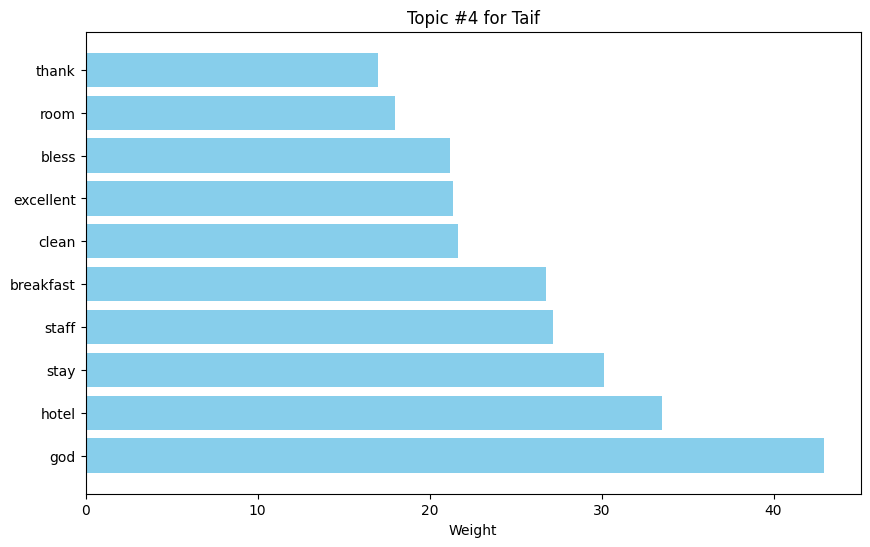


Topic #5:
['overall', 'comfortable', 'restaurant', 'staff', 'food', 'service', 'quality', 'dining', 'clean', 'experience']


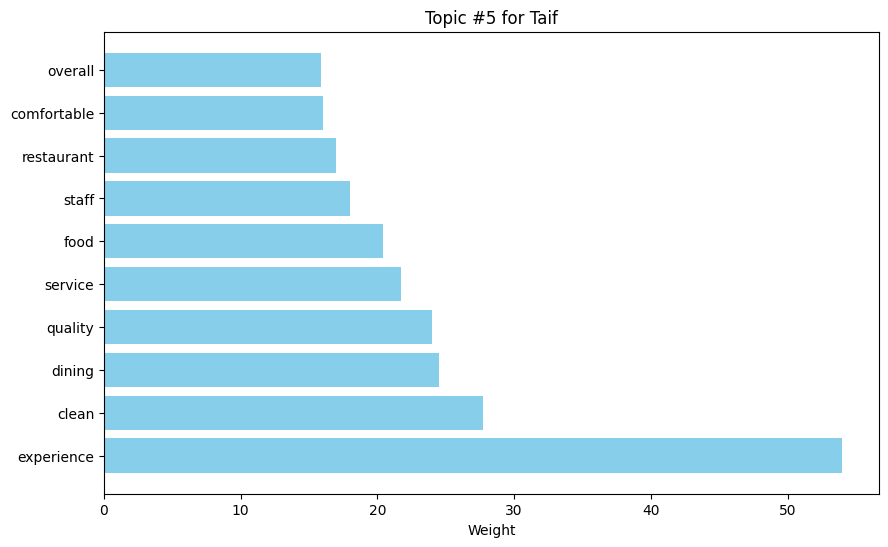


--- Topics for Al Baha ---

Topic #1:
['food', 'room', 'excellent', 'hotel', 'experience', 'bad', 'coffee', 'place', 'service', 'good']


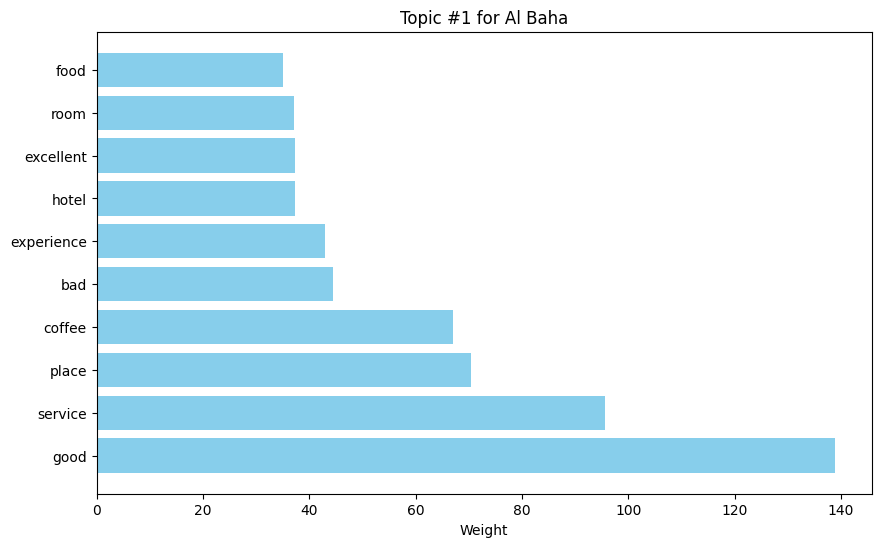


Topic #2:
['food', 'location', 'view', 'great', 'staff', 'good', 'hotel', 'clean', 'place', 'nice']


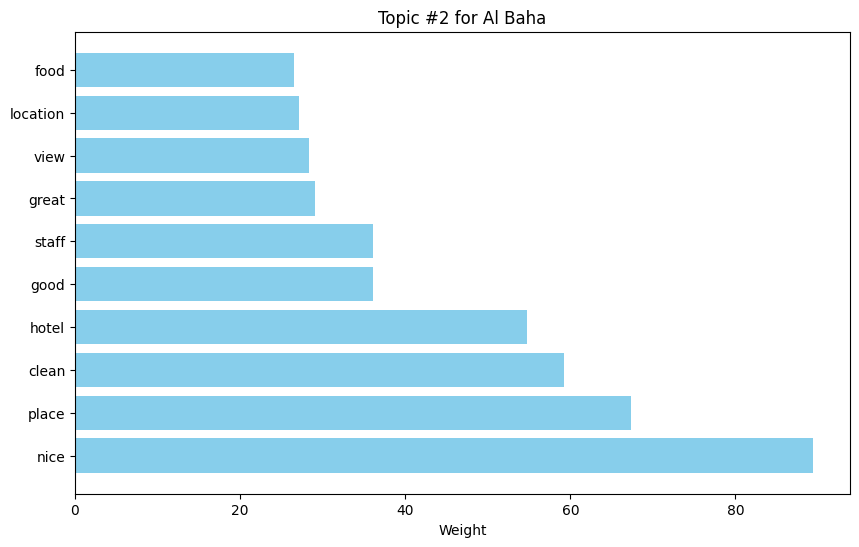


Topic #3:
['city', 'baha', 'experience', 'visit', 'al', 'family', 'saudi', 'amazing', 'god', 'park']


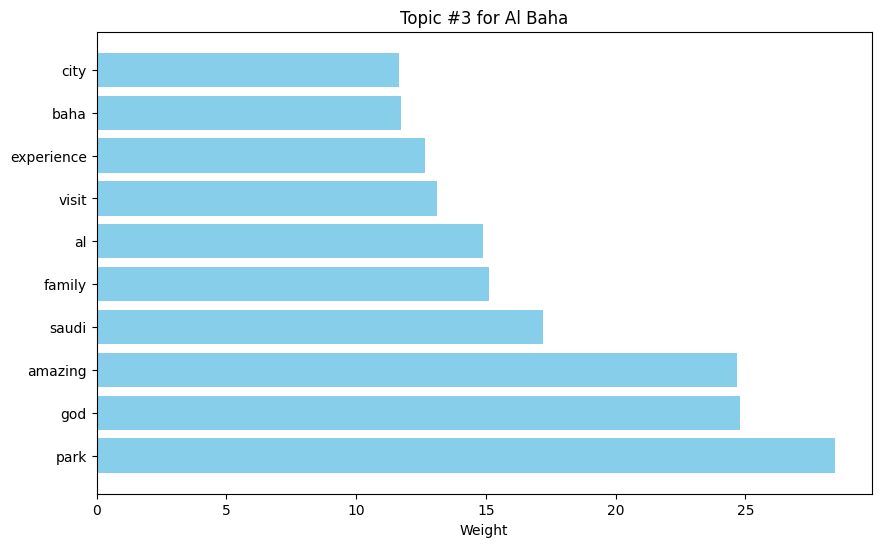


Topic #4:
['restaurant', 'staff', 'like', 'area', 'room', 'good', 'food', 'best', 'baha', 'al']


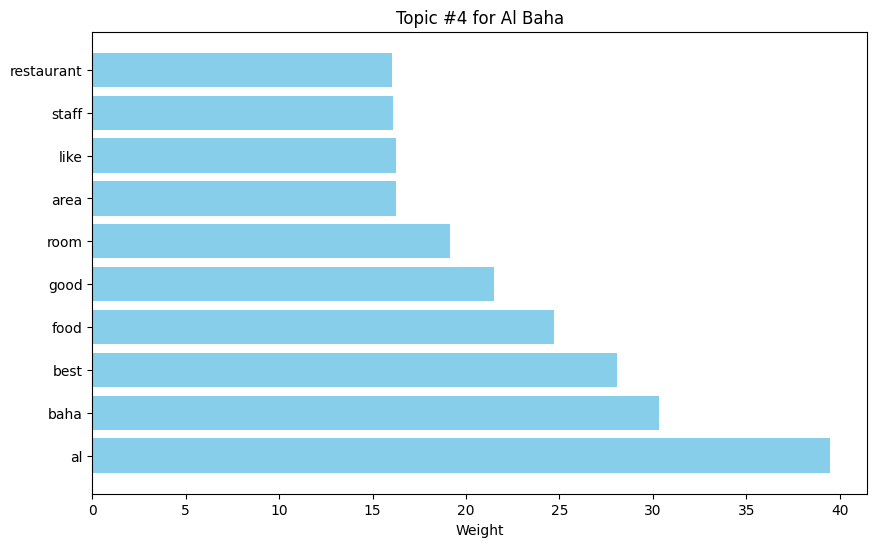


Topic #5:
['excellent', 'small', 'burger', 'restaurant', 'taste', 'delicious', 'chicken', 'place', 'food', 'good']


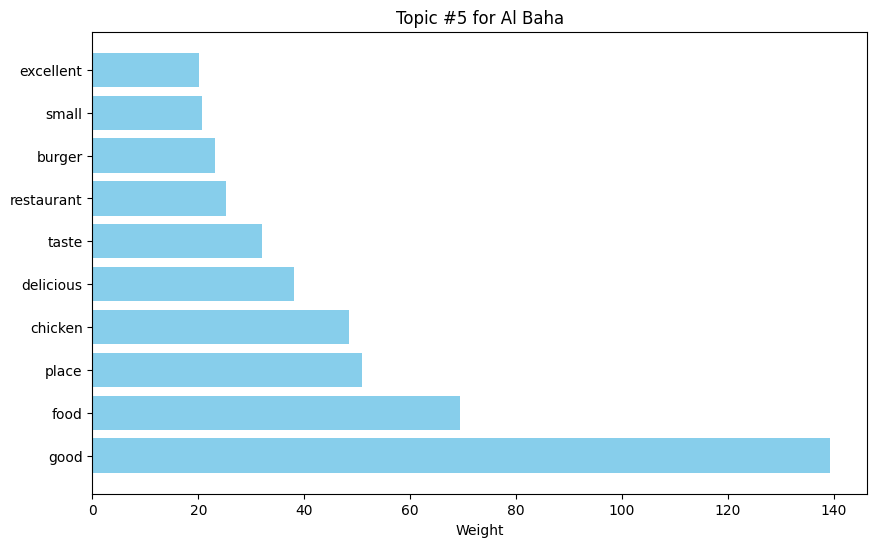


--- Topics for Najran ---

Topic #1:
['order', 'time', 'dont', 'ok', 'friendly', 'nice', 'food', 'place', 'staff', 'good']


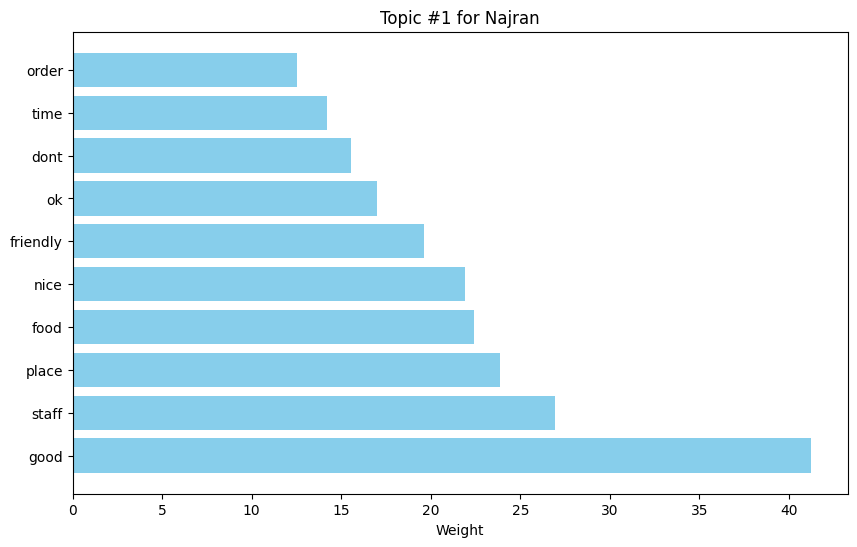


Topic #2:
['treatment', 'excellent', 'restaurant', 'place', 'beautiful', 'good', 'god', 'chicken', 'food', 'delicious']


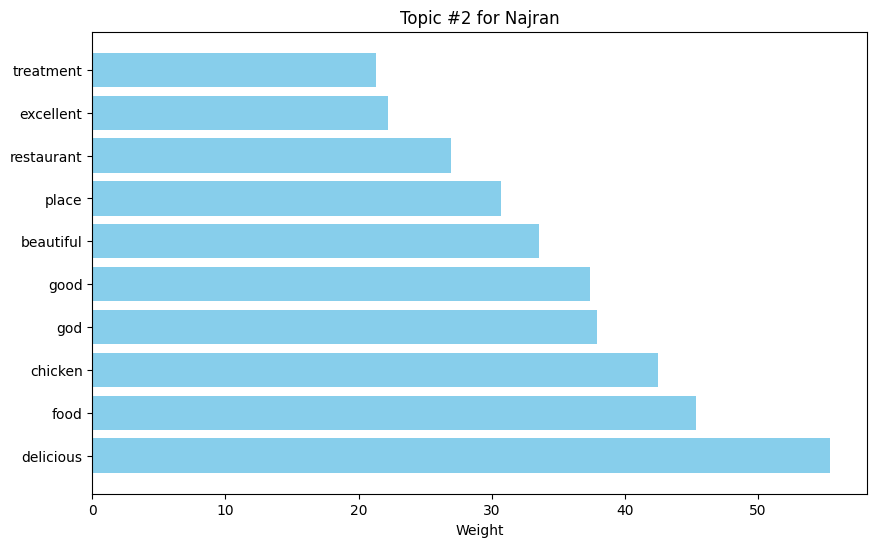


Topic #3:
['reception', 'excellent', 'location', 'rooms', 'clean', 'staff', 'room', 'service', 'hotel', 'good']


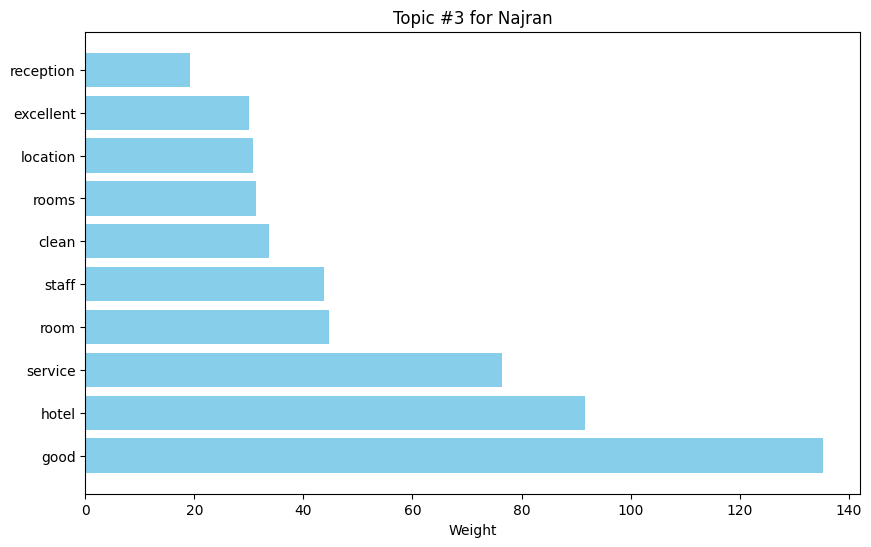


Topic #4:
['thank', 'beautiful', 'time', 'like', 'nice', 'best', 'place', 'najran', 'coffee', 'good']


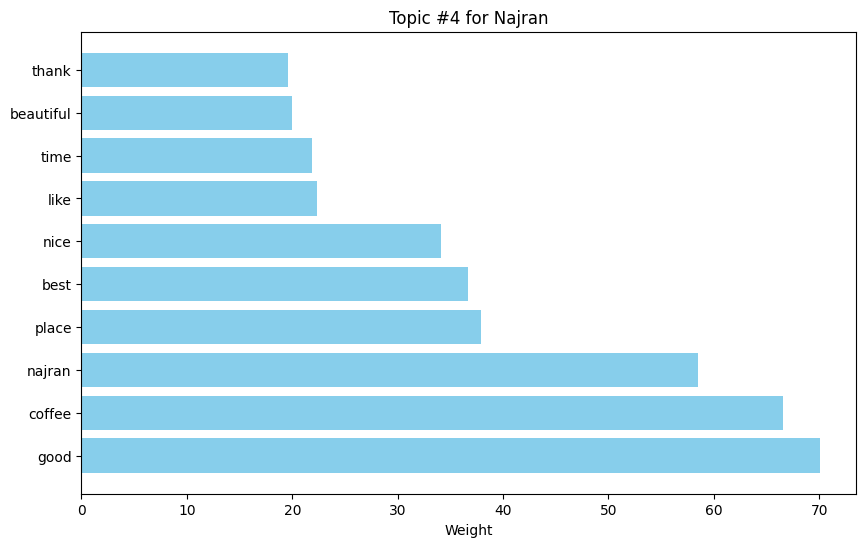


Topic #5:
['clean', 'taste', 'delicious', 'restaurant', 'staff', 'good', 'food', 'best', 'place', 'nice']


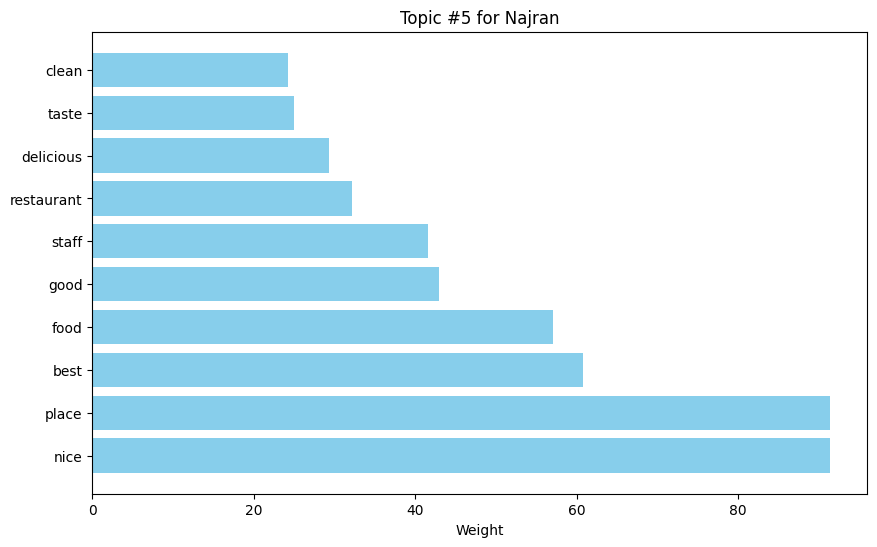


--- Topics for Tabuk ---

Topic #1:
['delicious', 'amazing', 'service', 'great', 'tabuk', 'best', 'restaurant', 'place', 'good', 'food']


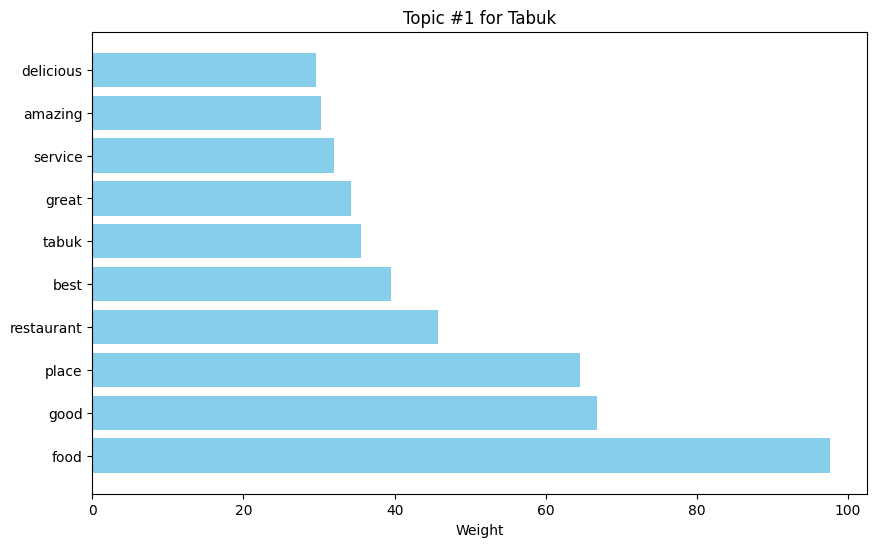


Topic #2:
['location', 'staff', 'time', 'great', 'coffee', 'service', 'food', 'nice', 'place', 'good']


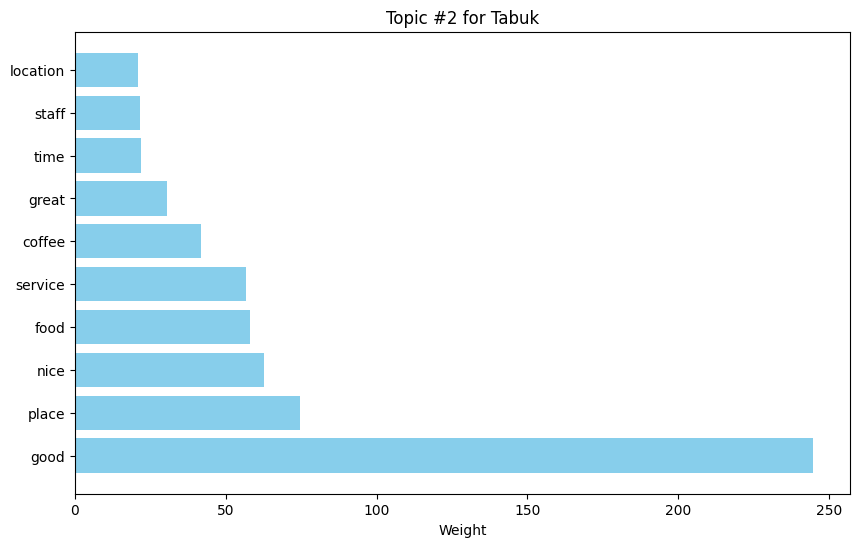


Topic #3:
['great', 'delicious', 'tabuk', 'place', 'food', 'staff', 'restaurant', 'best', 'experience', 'coffee']


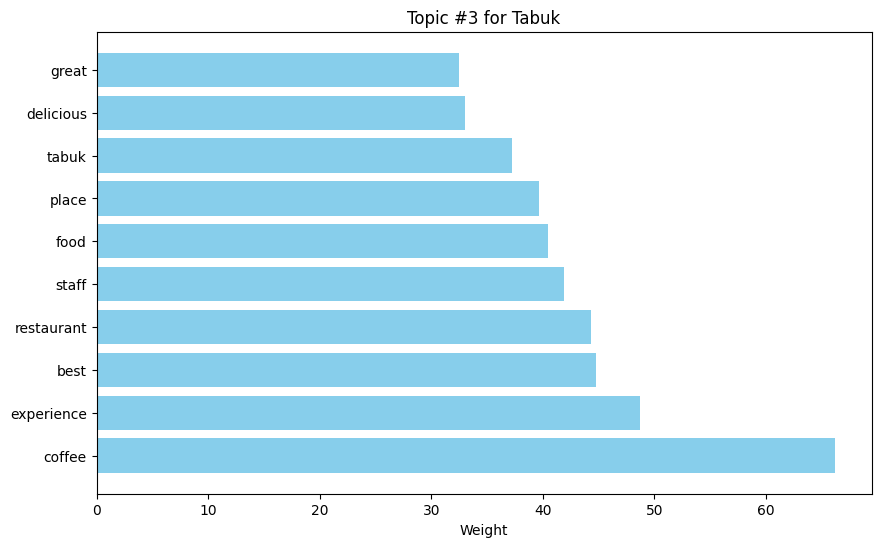


Topic #4:
['place', 'rooms', 'experience', 'good', 'service', 'room', 'stay', 'staff', 'clean', 'hotel']


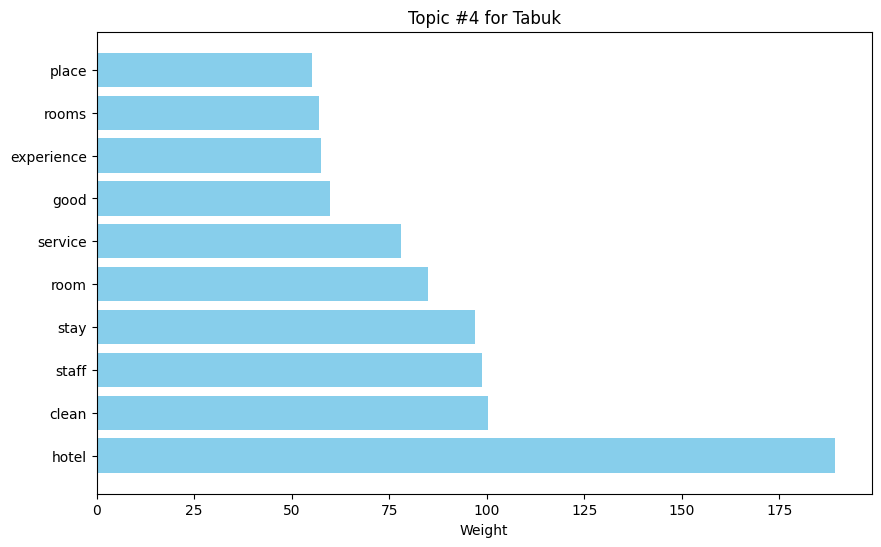


Topic #5:
['mall', 'museum', 'place', 'good', 'saudi', 'area', 'restaurant', 'service', 'food', 'tabuk']


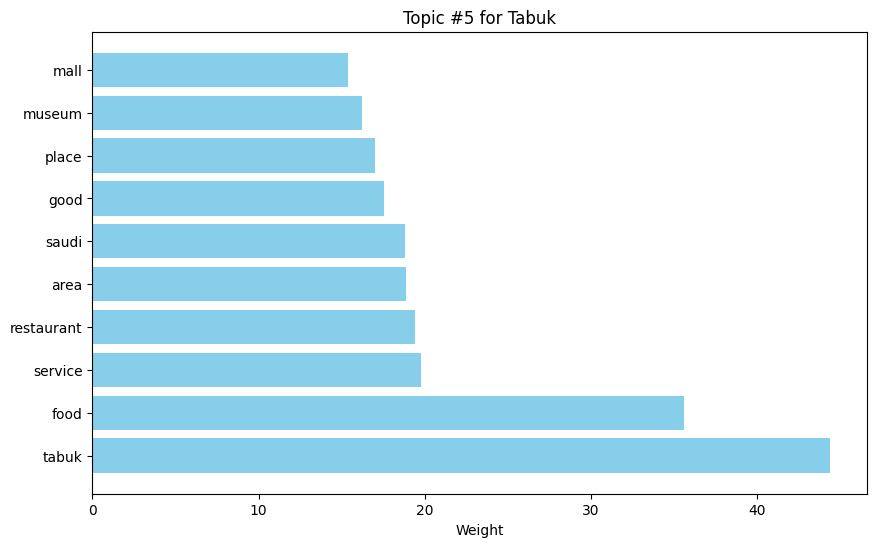


--- Topics for Qatif ---

Topic #1:
['best', 'service', 'staff', 'delicious', 'coffee', 'nice', 'food', 'great', 'good', 'place']


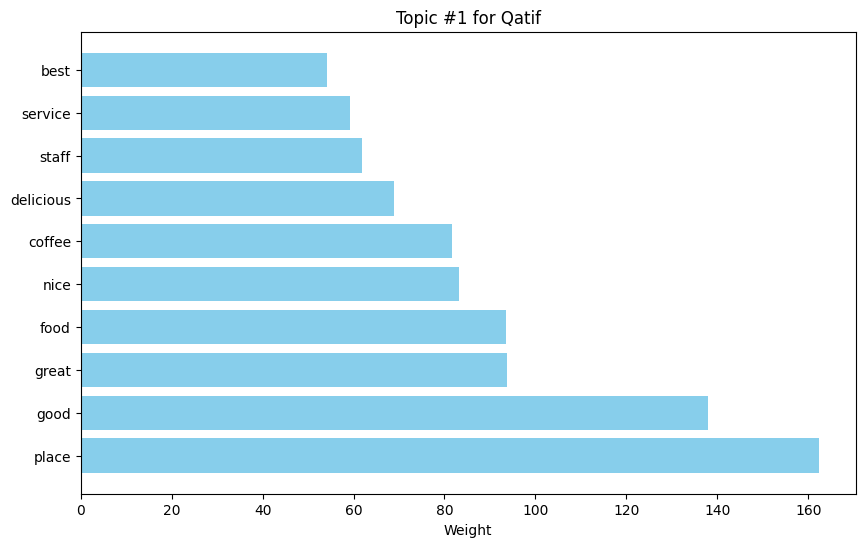


Topic #2:
['nice', 'family', 'area', 'great', 'time', 'museum', 'experience', 'visit', 'coffee', 'place']


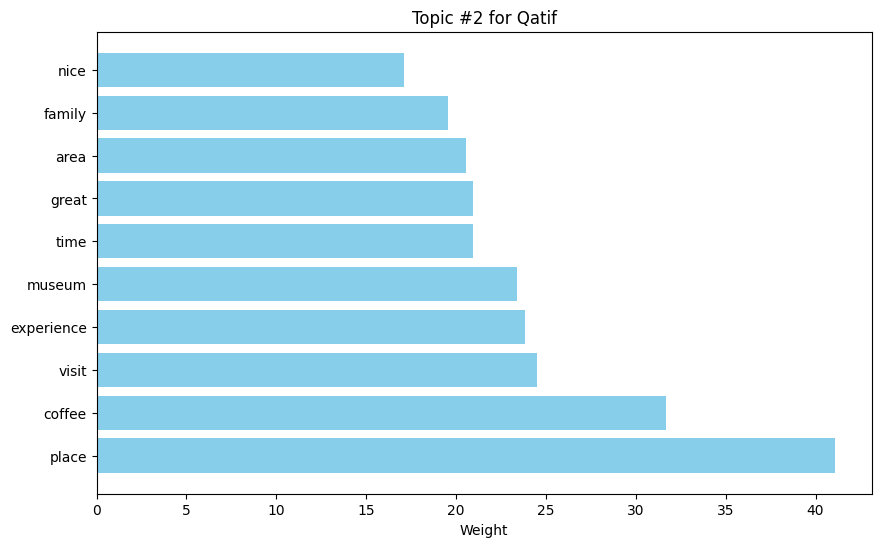


Topic #3:
['location', 'reception', 'service', 'staff', 'good', 'rooms', 'stay', 'clean', 'hotel', 'room']


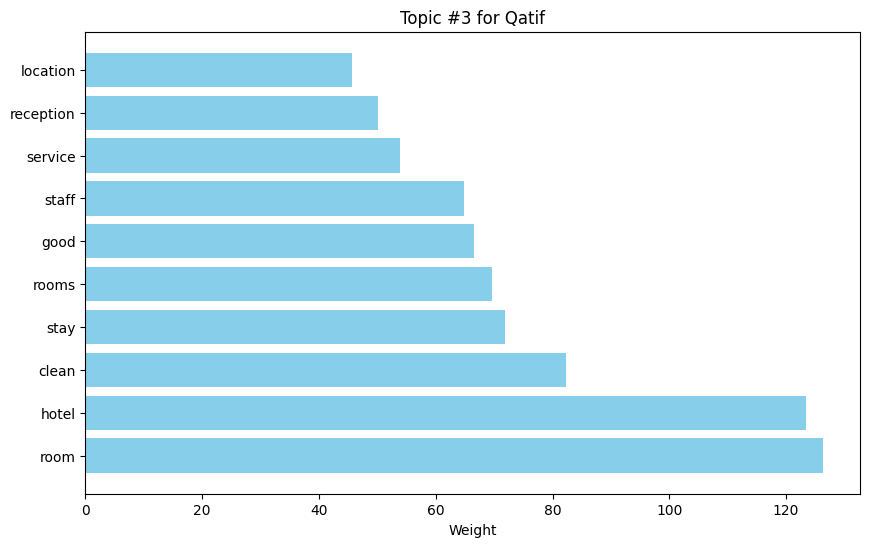


Topic #4:
['experience', 'bit', 'like', 'meat', 'service', 'chicken', 'place', 'restaurant', 'food', 'good']


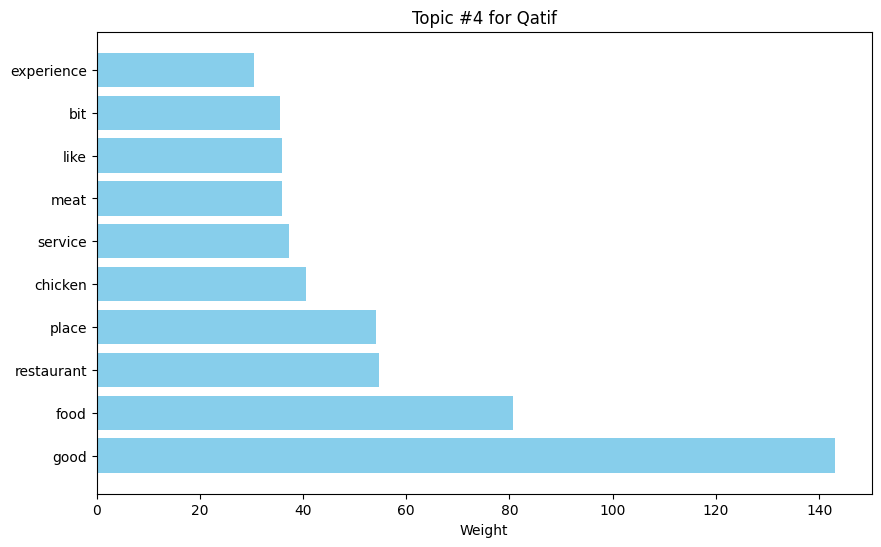


Topic #5:
['excellent', 'order', 'good', 'nice', 'restaurant', 'quality', 'time', 'service', 'prices', 'food']


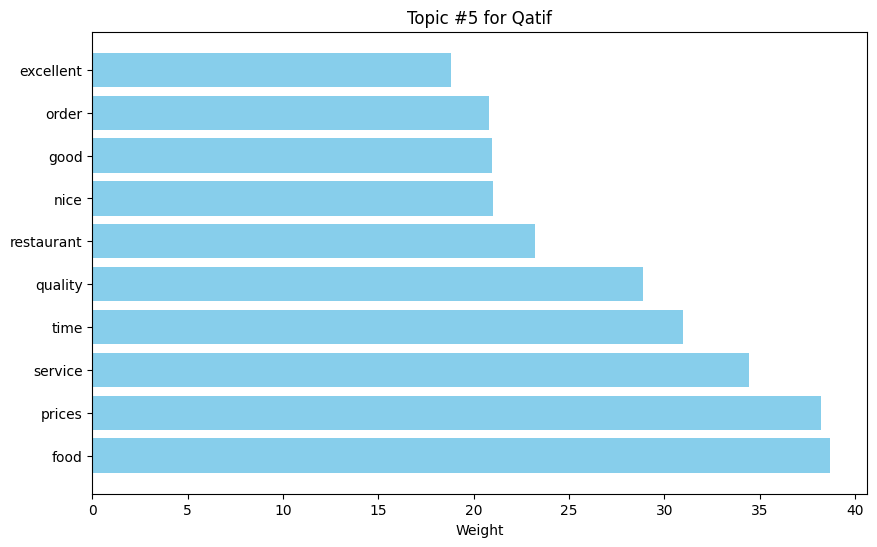


--- Topics for Rijal Alma ---

Topic #1:
['employee', 'delicious', 'food', 'order', 'bless', 'meat', 'willing', 'excellent', 'restaurant', 'god']


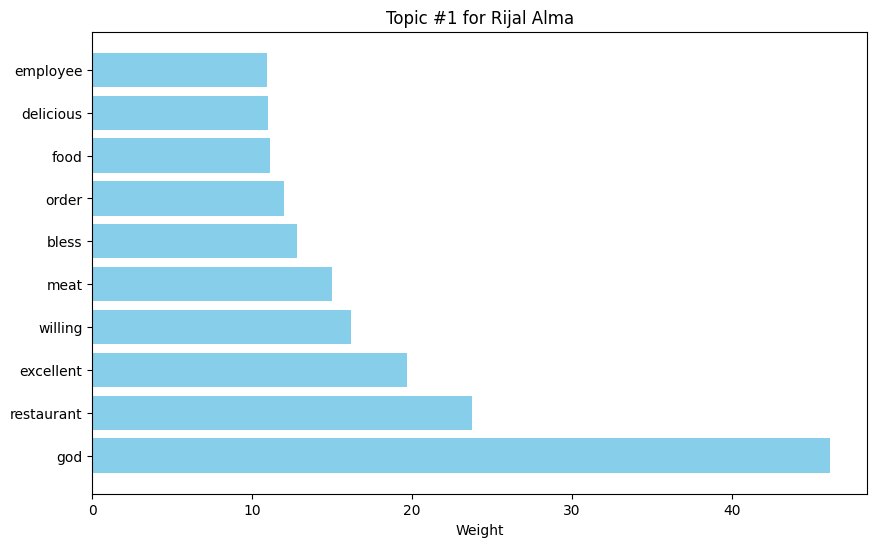


Topic #2:
['like', 'cleanliness', 'room', 'god', 'delicious', 'good', 'chicken', 'restaurant', 'bad', 'excellent']


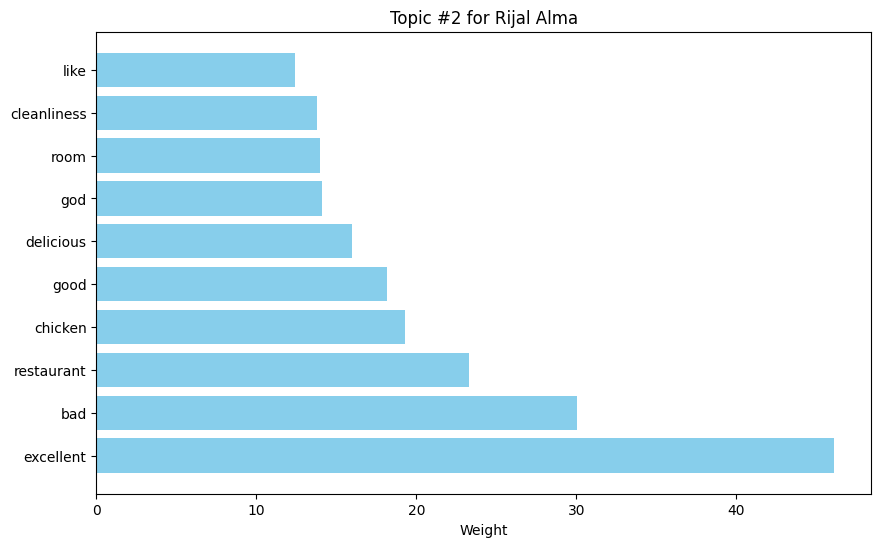


Topic #3:
['thanks', 'clean', 'bread', 'place', 'delicious', 'breakfast', 'god', 'good', 'best', 'food']


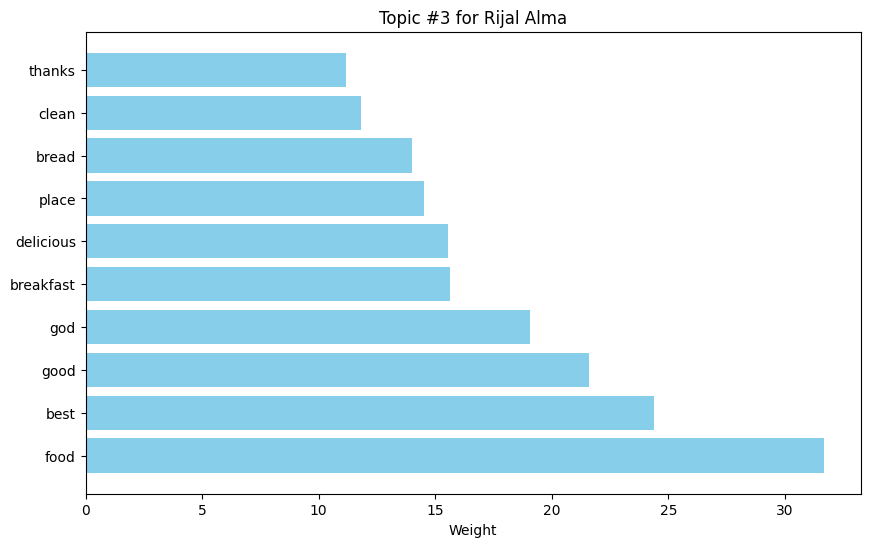


Topic #4:
['stay', 'nice', 'great', 'rooms', 'service', 'location', 'room', 'clean', 'good', 'hotel']


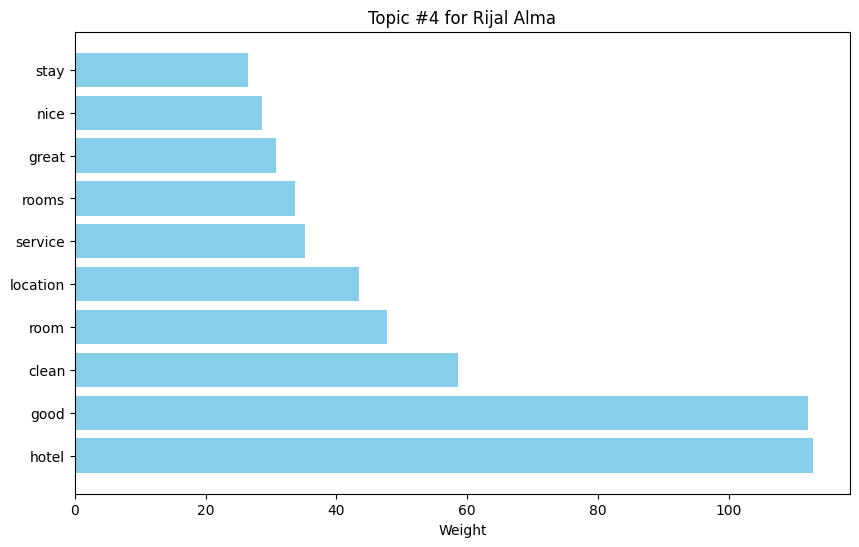


Topic #5:
['visited', 'worth', 'excellent', 'amazing', 'staff', 'experience', 'beautiful', 'visit', 'nice', 'place']


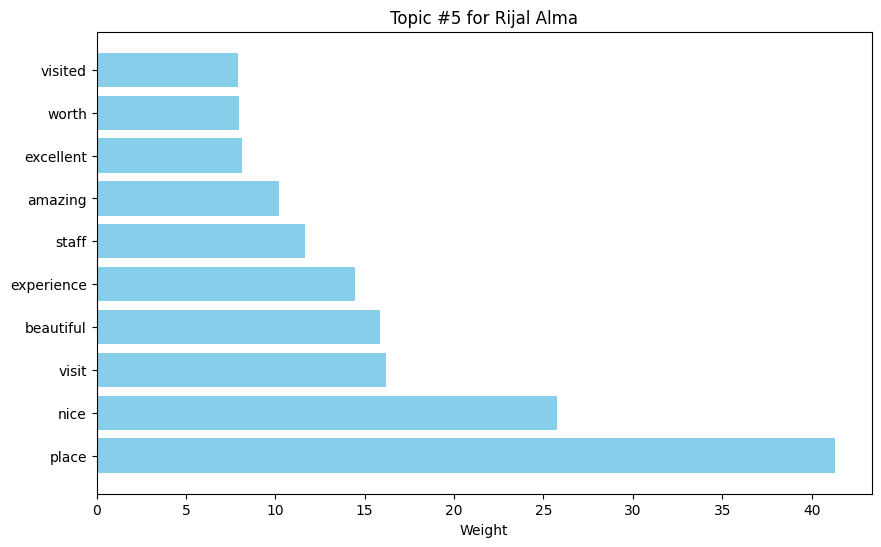


--- Topics for Yanbu ---

Topic #1:
['quality', 'items', 'fish', 'taste', 'yanbu', 'service', 'restaurant', 'chicken', 'food', 'good']


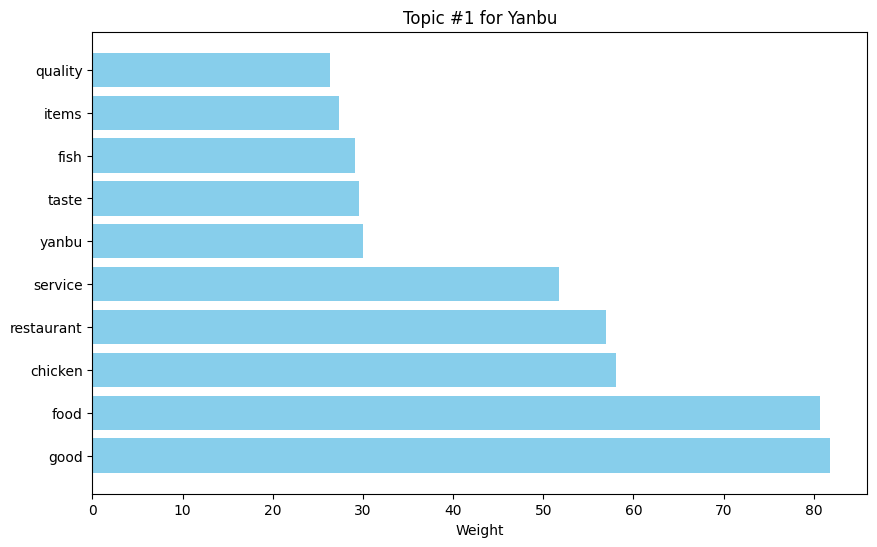


Topic #2:
['price', 'god', 'delicious', 'service', 'like', 'staff', 'experience', 'good', 'restaurant', 'food']


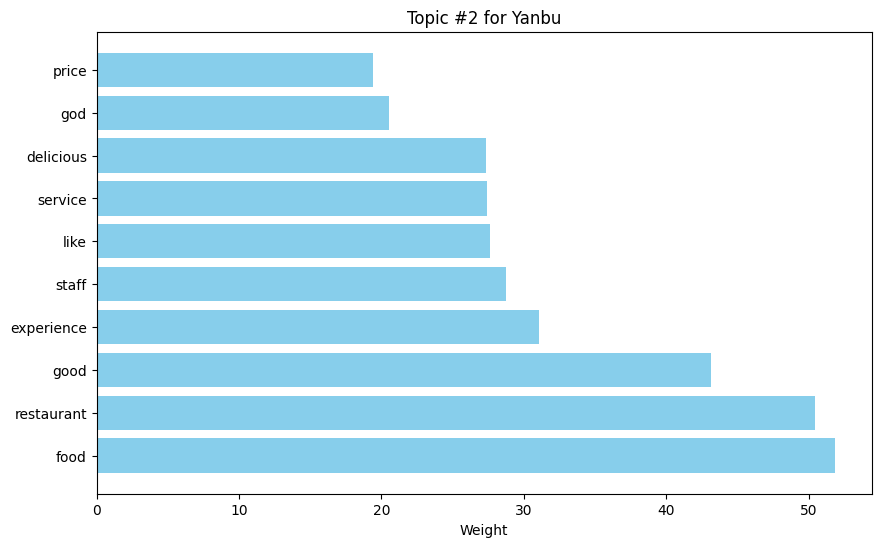


Topic #3:
['great', 'clean', 'delicious', 'coffee', 'good', 'food', 'service', 'excellent', 'place', 'nice']


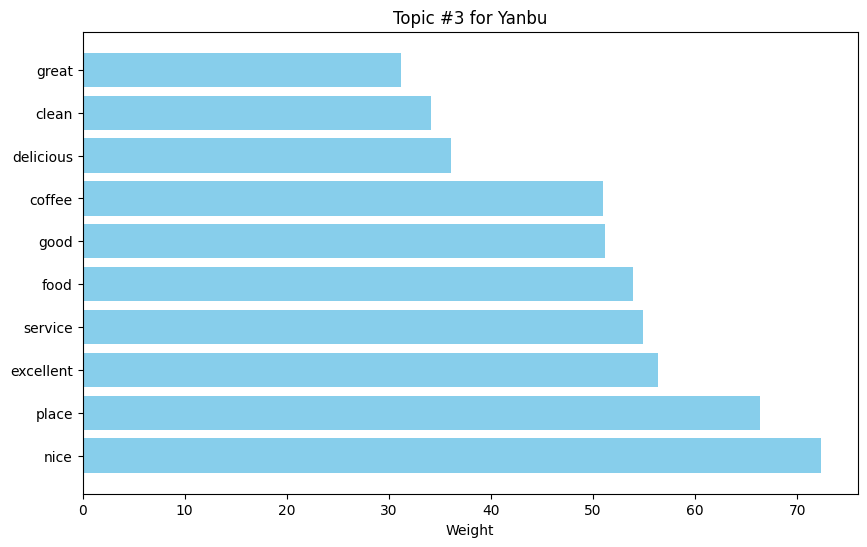


Topic #4:
['room', 'stay', 'rooms', 'best', 'place', 'yanbu', 'nice', 'staff', 'hotel', 'good']


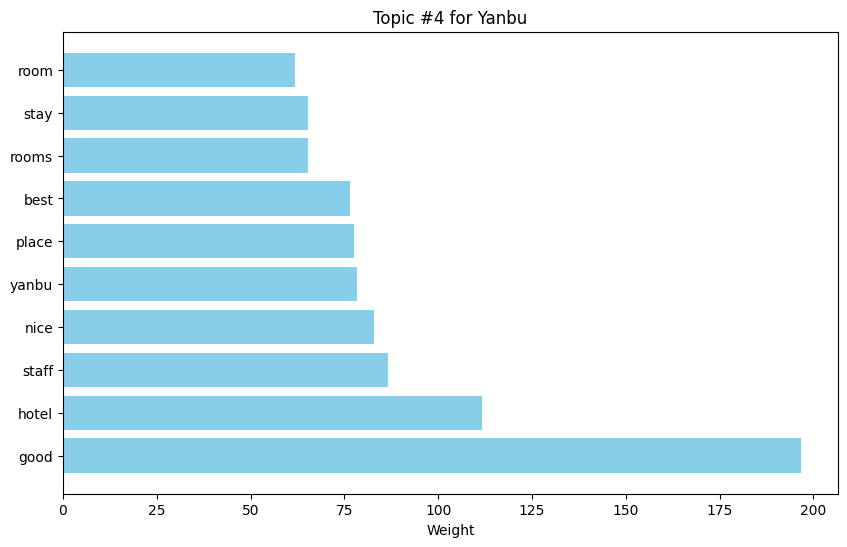


Topic #5:
['good', 'available', 'shops', 'clean', 'food', 'kids', 'beautiful', 'yanbu', 'area', 'place']


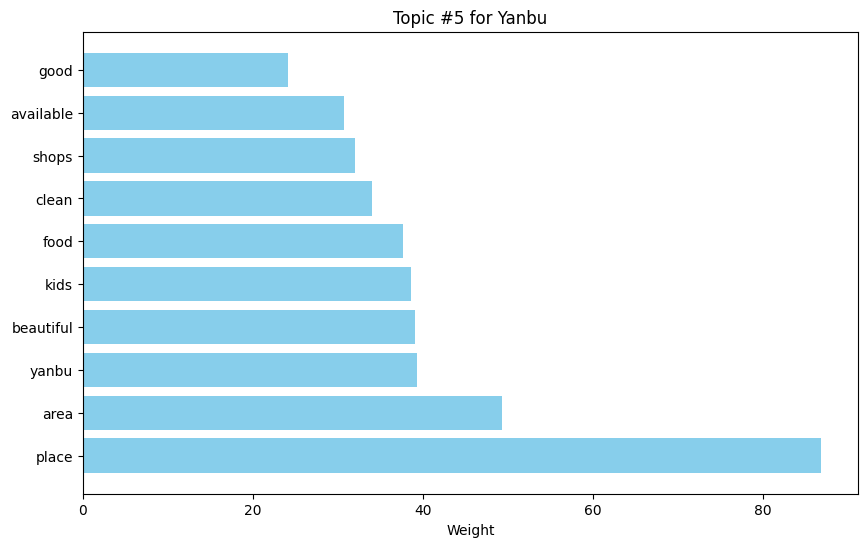


--- Topics for Riyadh ---

Topic #1:
['staff', 'restaurant', 'coffee', 'amazing', 'great', 'nice', 'service', 'place', 'good', 'food']


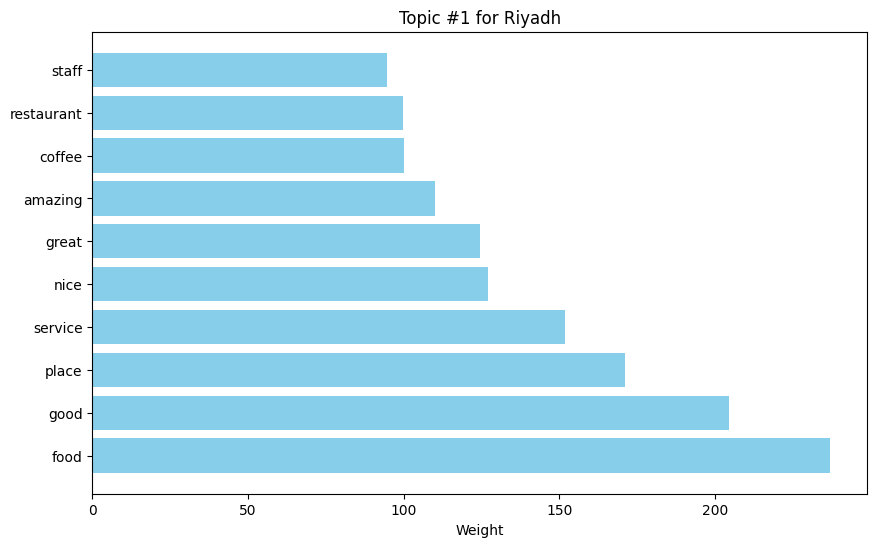


Topic #2:
['making', 'great', 'riyadh', 'perfect', 'highly', 'atmosphere', 'dining', 'service', 'food', 'experience']


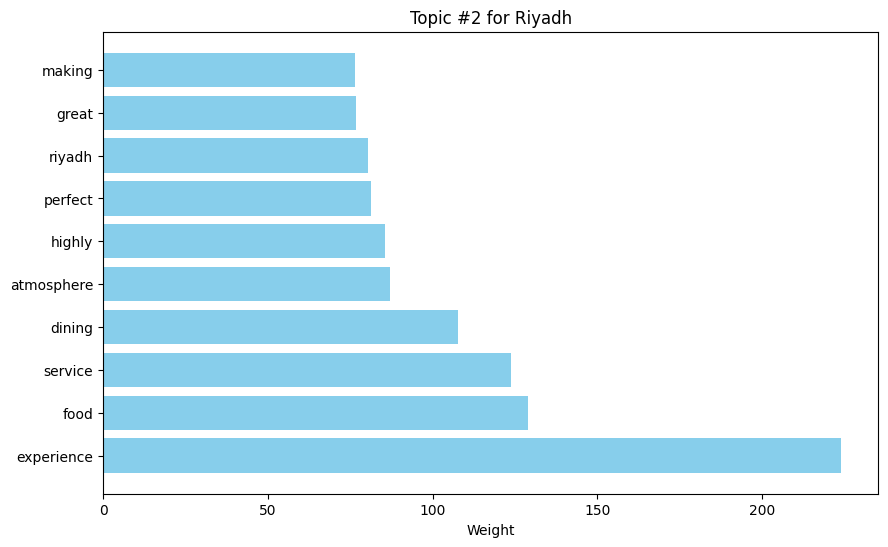


Topic #3:
['parking', 'family', 'play', 'shopping', 'area', 'riyadh', 'park', 'kids', 'place', 'mall']


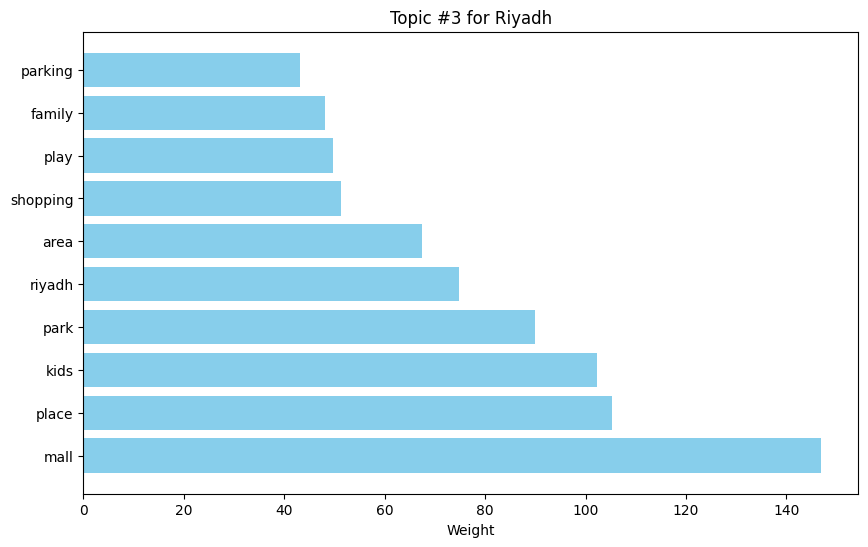


Topic #4:
['place', 'service', 'clean', 'rooms', 'location', 'staff', 'stay', 'room', 'good', 'hotel']


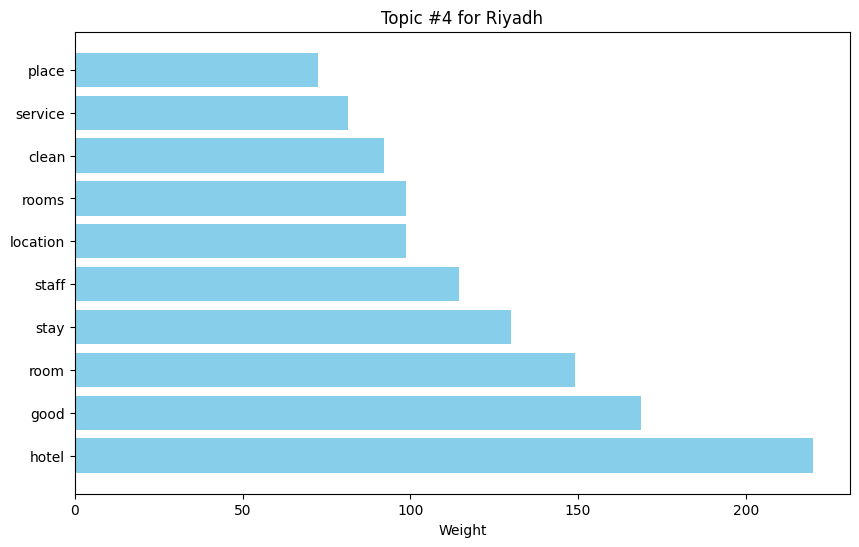


Topic #5:
['archaeological', 'good', 'site', 'games', 'told', 'like', 'kids', 'sr', 'place', 'area']


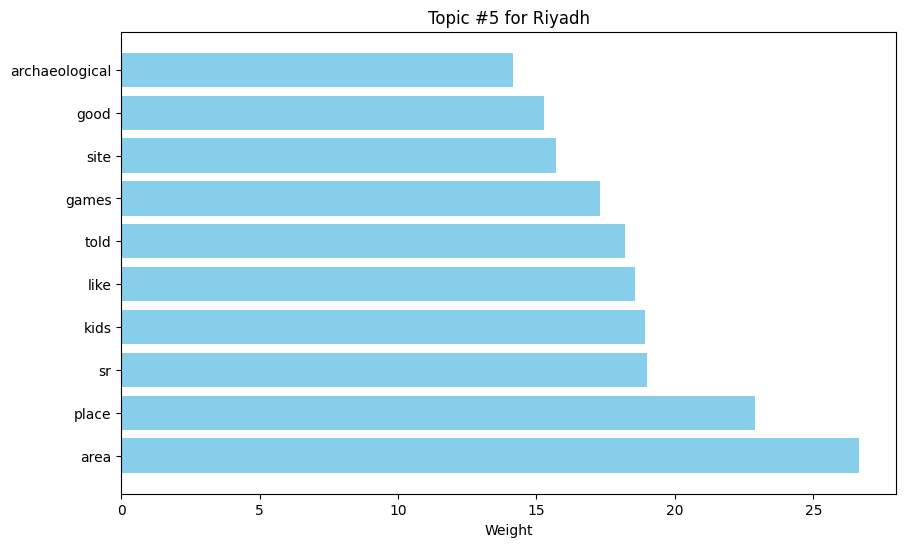


--- Topics for Jazan ---

Topic #1:
['nice', 'best', 'delicious', 'great', 'place', 'taste', 'service', 'restaurant', 'food', 'good']


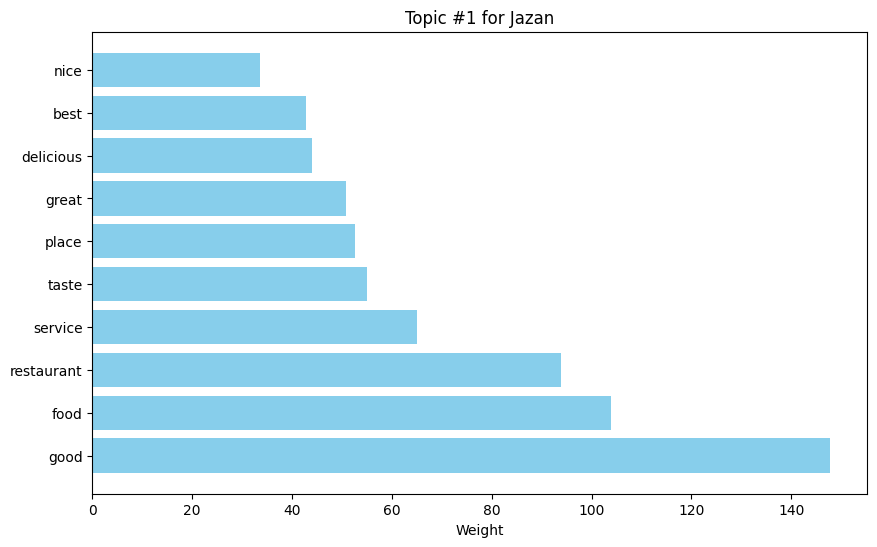


Topic #2:
['like', 'clean', 'room', 'jazan', 'service', 'best', 'burger', 'rooms', 'hotel', 'good']


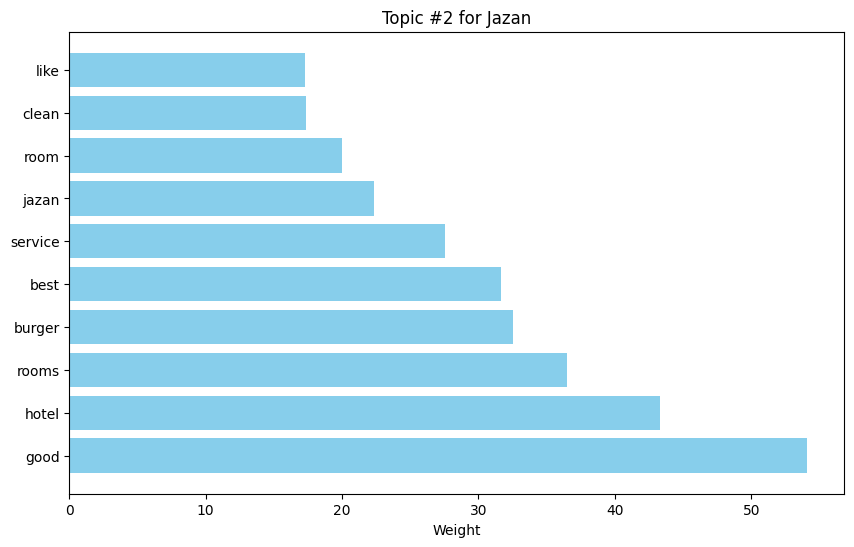


Topic #3:
['beautiful', 'clean', 'small', 'price', 'staff', 'hotel', 'coffee', 'good', 'place', 'nice']


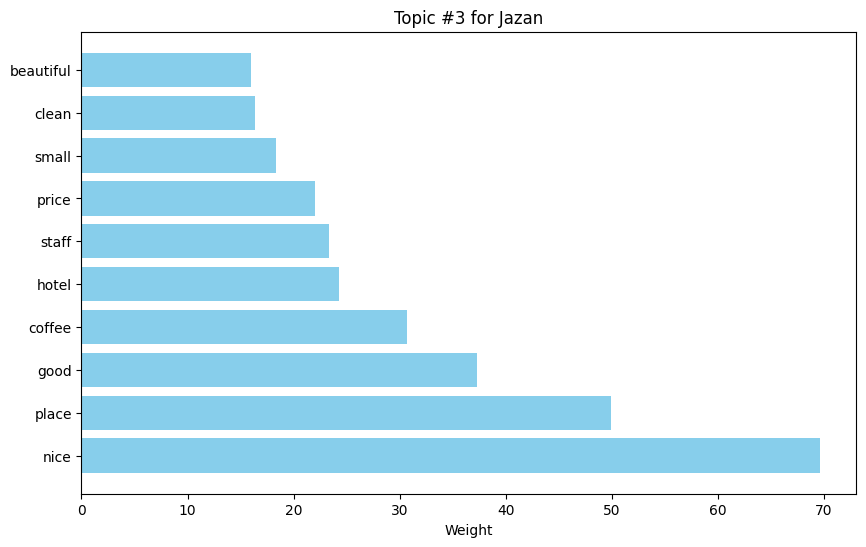


Topic #4:
['staff', 'service', 'taste', 'amazing', 'god', 'clean', 'good', 'place', 'delicious', 'food']


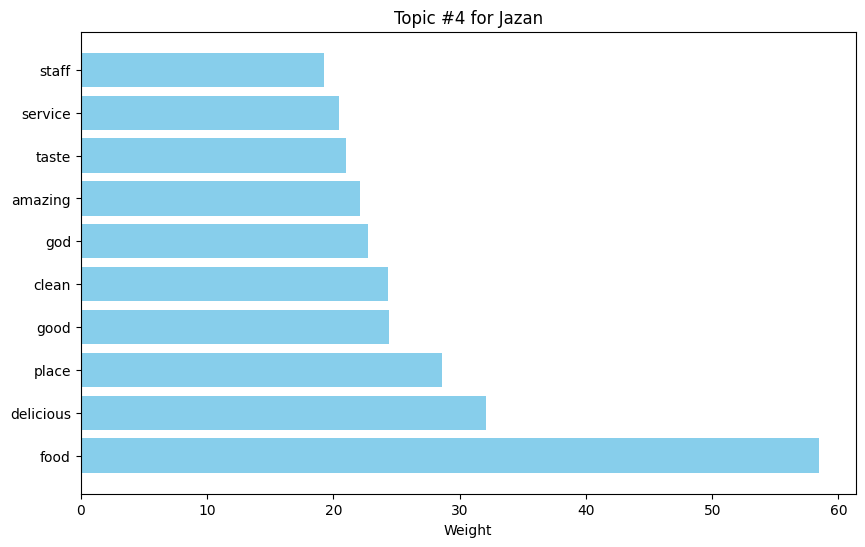


Topic #5:
['great', 'coffee', 'stay', 'clean', 'service', 'place', 'good', 'staff', 'room', 'hotel']


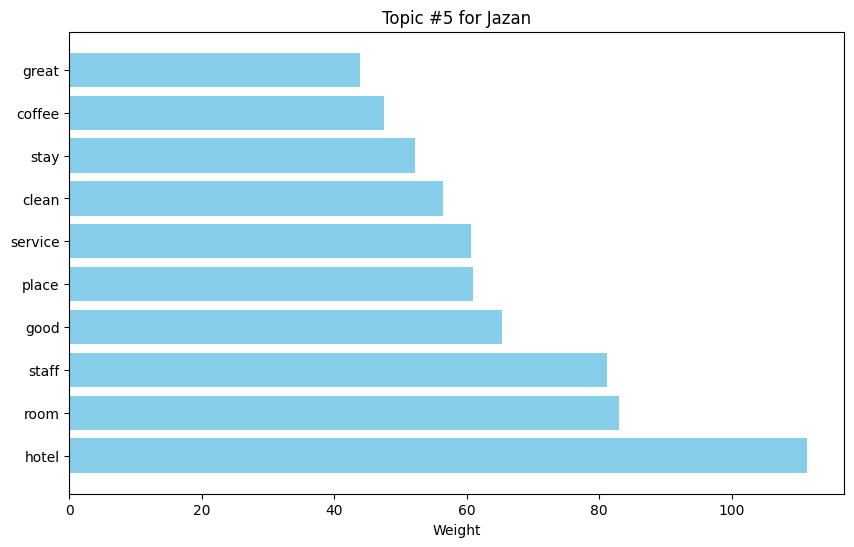

In [14]:
import matplotlib.pyplot as plt
import numpy as np

texts = df[['City', 'Cleaned Review']].dropna()

cities = texts['City'].unique()

for city in cities:
    print(f"\n--- Topics for {city} ---")

    city_df = texts[texts['City'] == city]
    city_texts = city_df['Cleaned Review'].values.astype('U')

    if len(city_texts) < 5:
        print("Not enough reviews, skipping city.")
        continue

    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(city_texts)

    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(dtm)

    words = vectorizer.get_feature_names_out()

    for idx, topic in enumerate(lda.components_):
        print(f"\nTopic #{idx + 1}:")
        top_words = [words[i] for i in topic.argsort()[-10:]]
        print(top_words)

        # Plotting
        plt.figure(figsize=(10, 6))
        word_weights = [topic[i] for i in topic.argsort()[-10:]]
        plt.barh(top_words, word_weights, color='skyblue')
        plt.xlabel('Weight')
        plt.title(f'Topic #{idx + 1} for {city}')
        plt.gca().invert_yaxis()
        plt.show()



--- Topics for North ---



Topic #1:
['service', 'chicken', 'taste', 'place', 'restaurant', 'best', 'coffee', 'delicious', 'good', 'food']


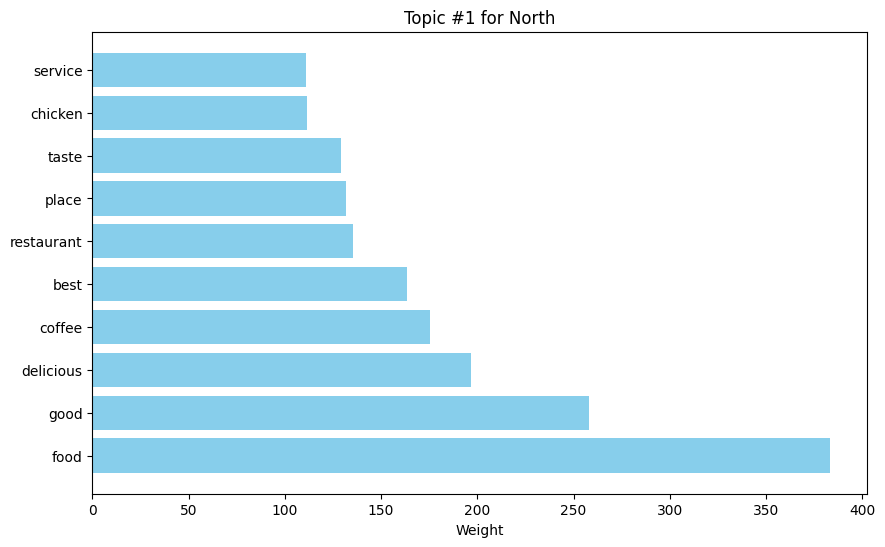


Topic #2:
['clean', 'good', 'restaurant', 'friendly', 'great', 'staff', 'food', 'experience', 'hotel', 'service']


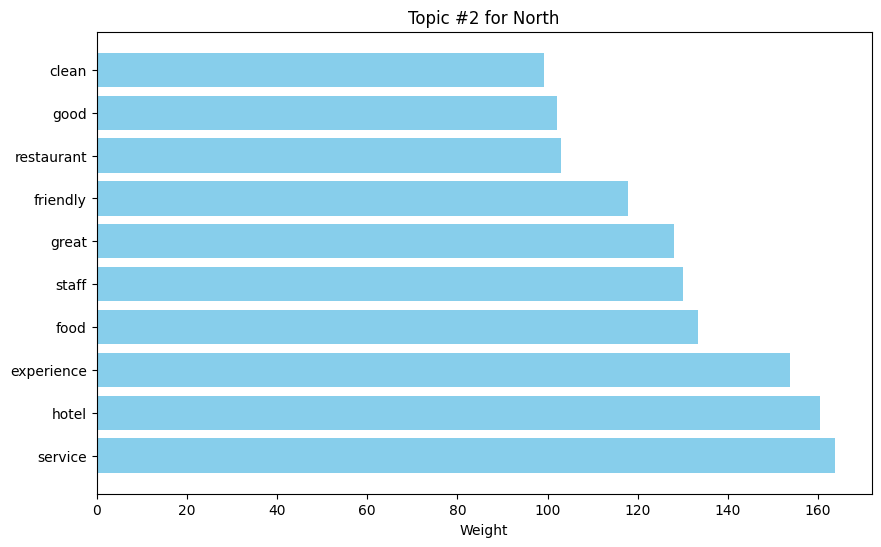


Topic #3:
['saudi', 'visit', 'hail', 'coffee', 'park', 'tabuk', 'beautiful', 'city', 'place', 'nice']


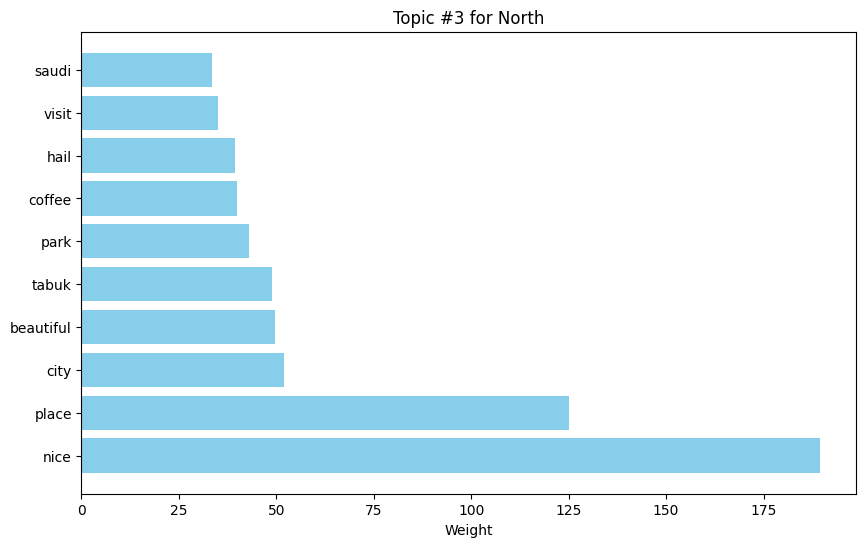


Topic #4:
['rooms', 'god', 'room', 'service', 'hotel', 'excellent', 'staff', 'clean', 'place', 'good']


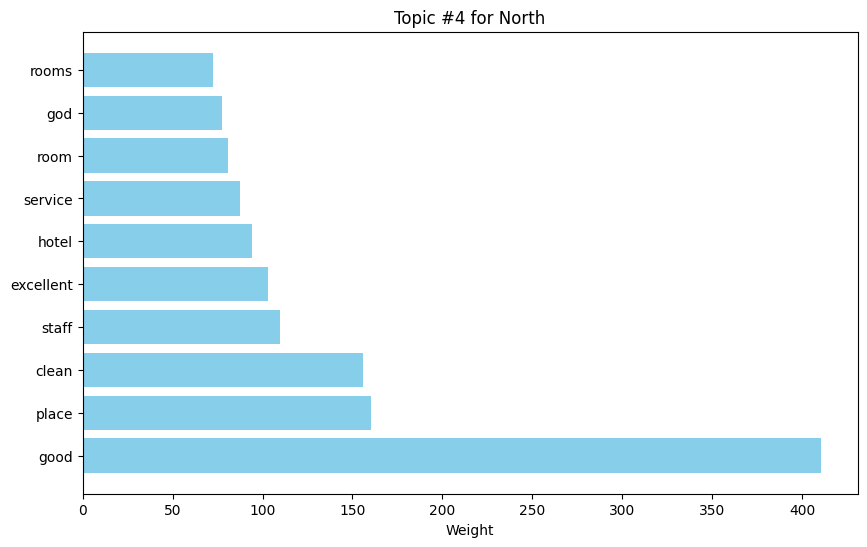


Topic #5:
['people', 'restaurant', 'food', 'room', 'nice', 'service', 'staff', 'hotel', 'place', 'good']


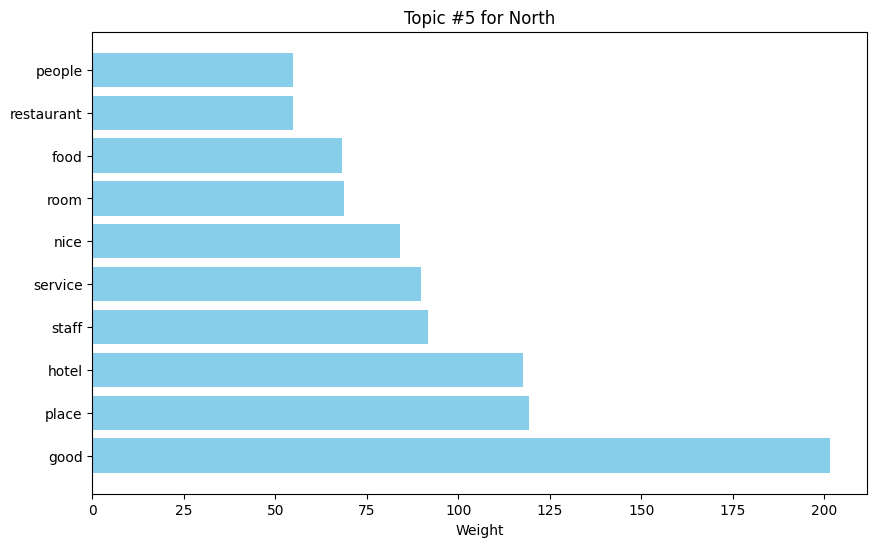


--- Topics for Central ---

Topic #1:
['options', 'food', 'place', 'great', 'parking', 'good', 'riyadh', 'shopping', 'coffee', 'mall']


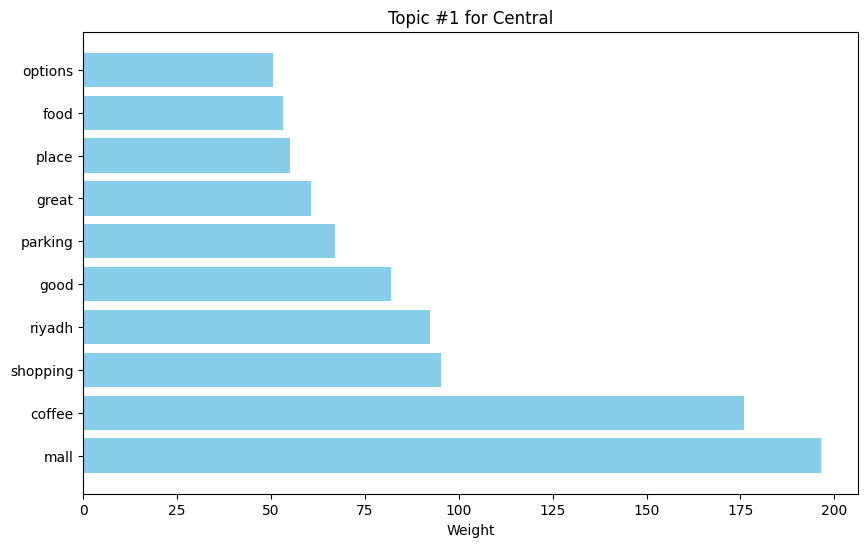


Topic #2:
['perfect', 'delicious', 'service', 'great', 'good', 'nice', 'restaurant', 'experience', 'place', 'food']


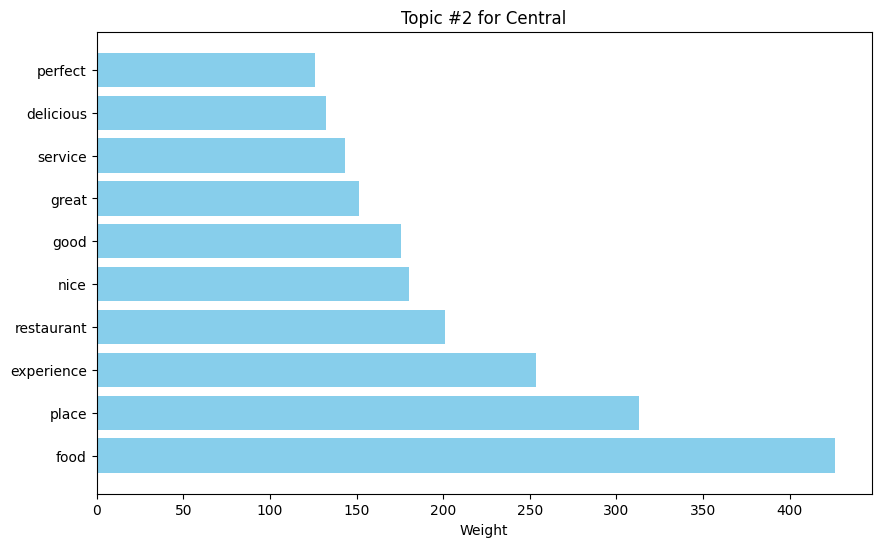


Topic #3:
['visit', 'like', 'beautiful', 'time', 'area', 'good', 'nice', 'kids', 'park', 'place']


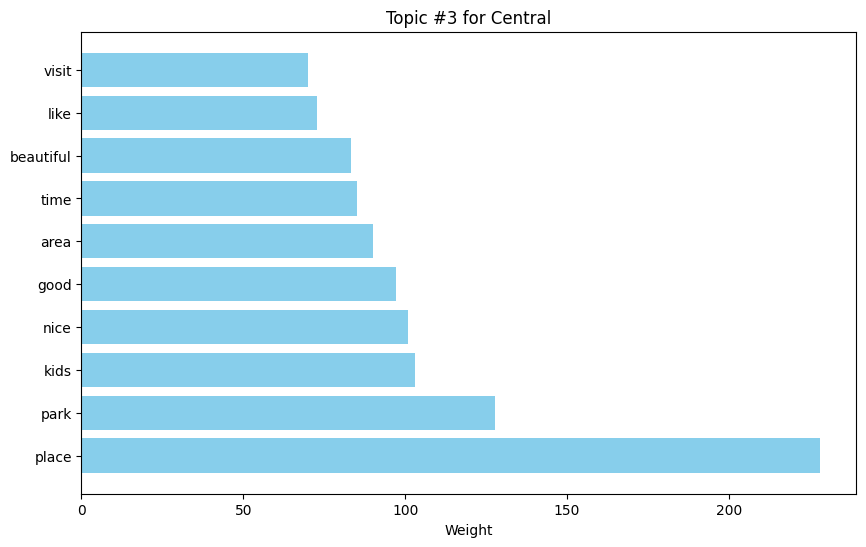


Topic #4:
['thanks', 'excellent', 'amazing', 'staff', 'experience', 'delicious', 'great', 'food', 'good', 'service']


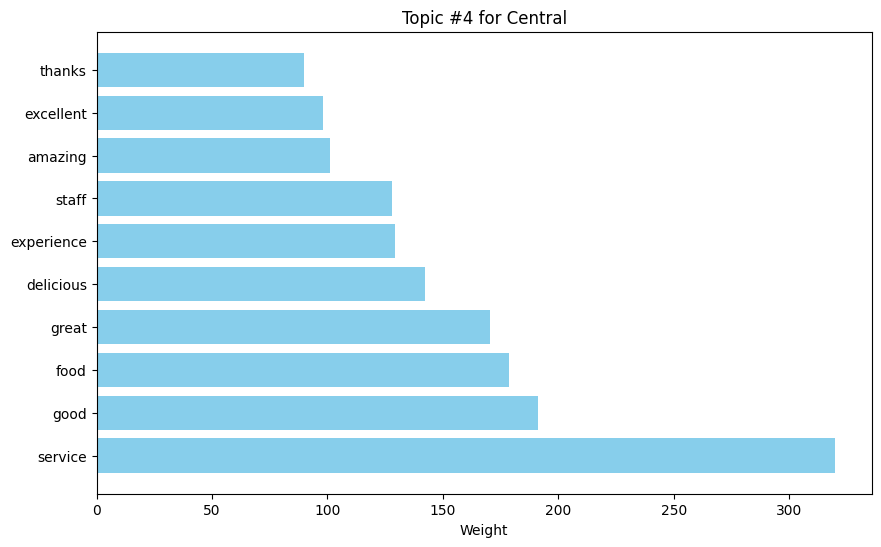


Topic #5:
['nice', 'rooms', 'stay', 'service', 'staff', 'place', 'clean', 'room', 'hotel', 'good']


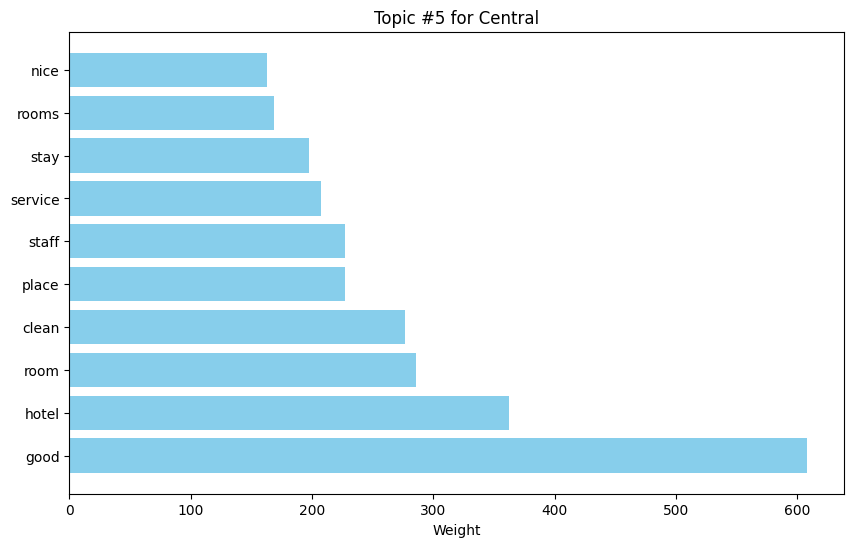


--- Topics for West ---

Topic #1:
['delicious', 'amazing', 'great', 'coffee', 'best', 'service', 'nice', 'place', 'food', 'good']


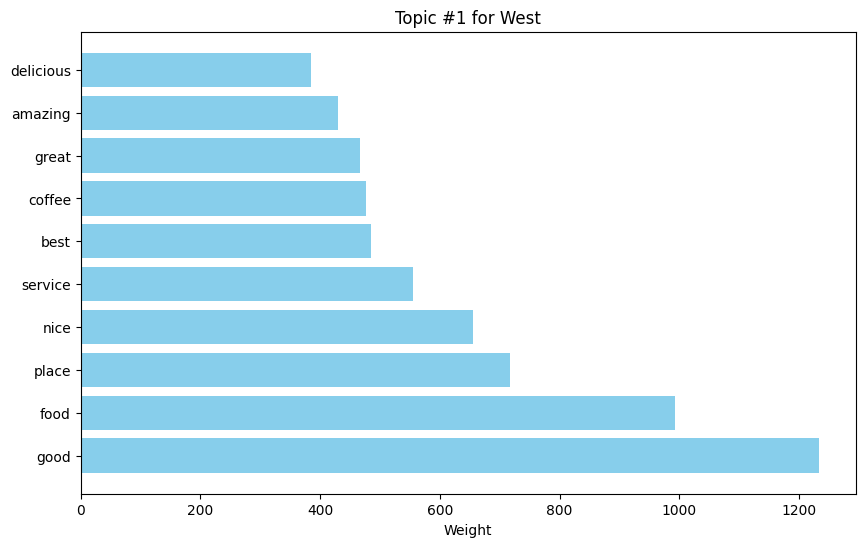


Topic #2:
['time', 'service', 'order', 'taste', 'good', 'bad', 'restaurant', 'chicken', 'like', 'food']


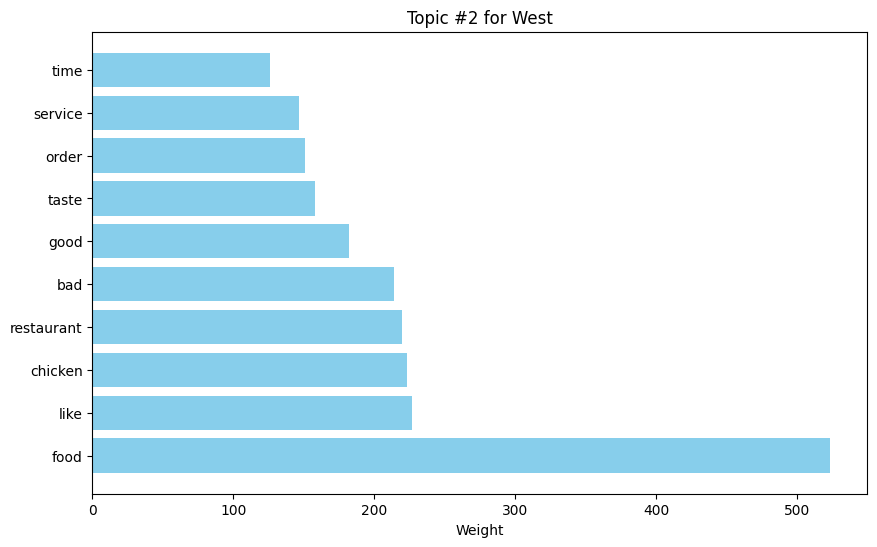


Topic #3:
['experience', 'location', 'good', 'rooms', 'staff', 'service', 'clean', 'stay', 'room', 'hotel']


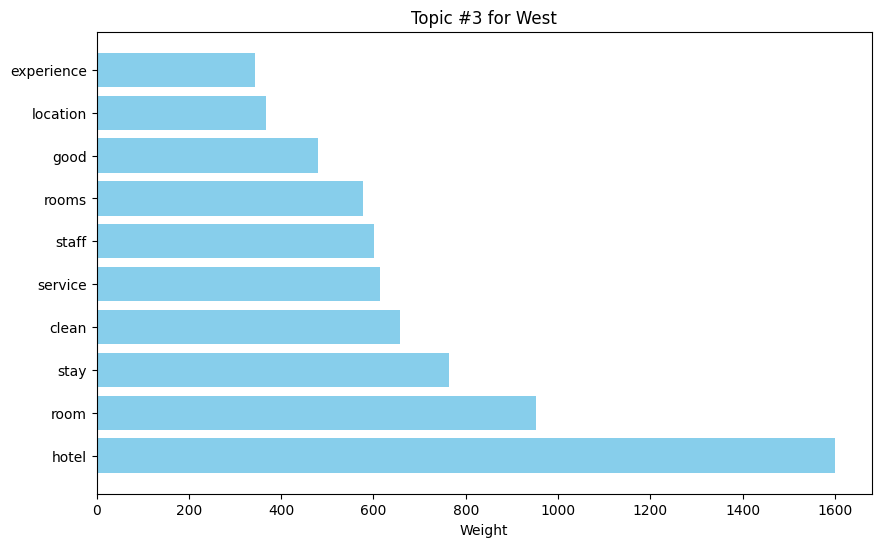


Topic #4:
['shops', 'time', 'visit', 'good', 'mall', 'beautiful', 'area', 'kids', 'park', 'place']


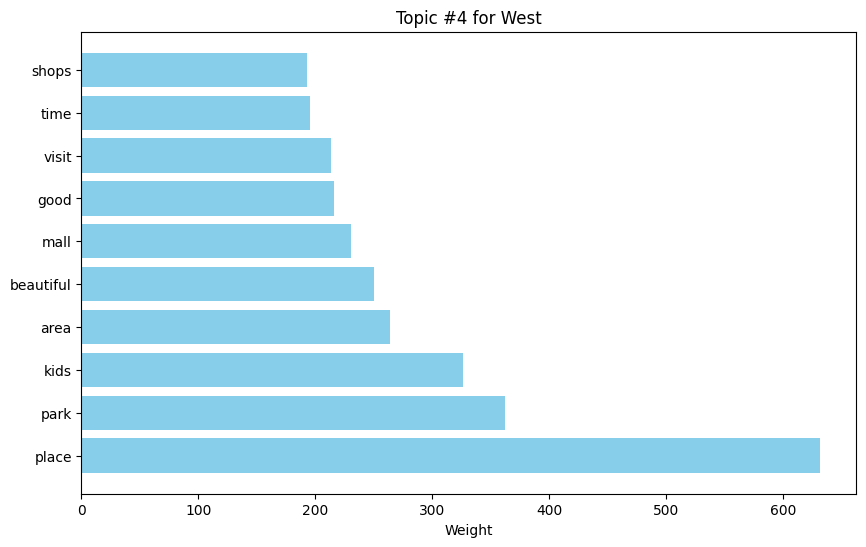


Topic #5:
['truly', 'perfect', 'dining', 'highly', 'atmosphere', 'service', 'great', 'restaurant', 'food', 'experience']


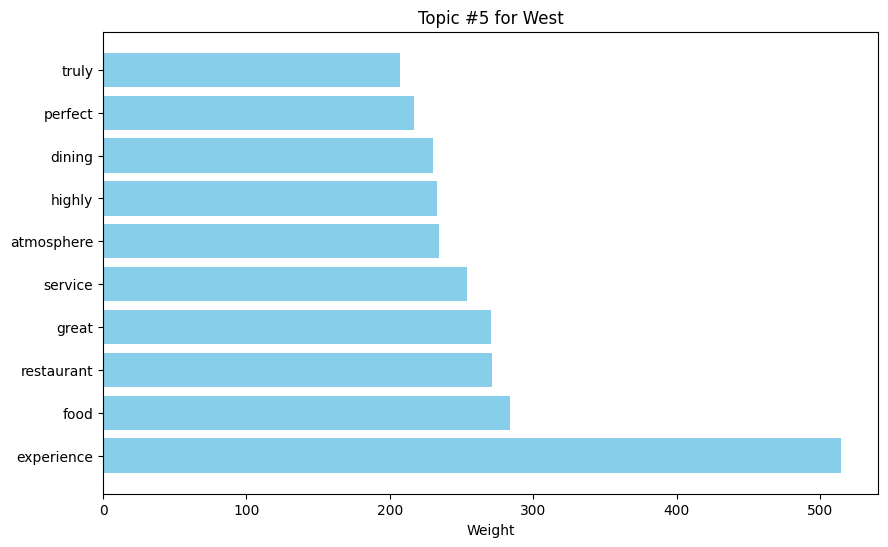


--- Topics for East ---

Topic #1:
['delicious', 'best', 'taste', 'great', 'nice', 'service', 'coffee', 'place', 'food', 'good']


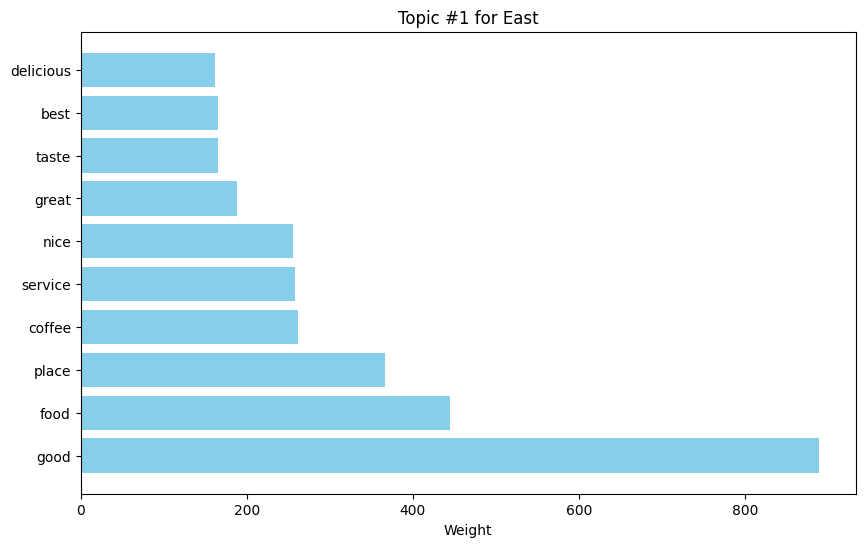


Topic #2:
['recommend', 'excellent', 'highly', 'delicious', 'restaurant', 'great', 'staff', 'service', 'food', 'experience']


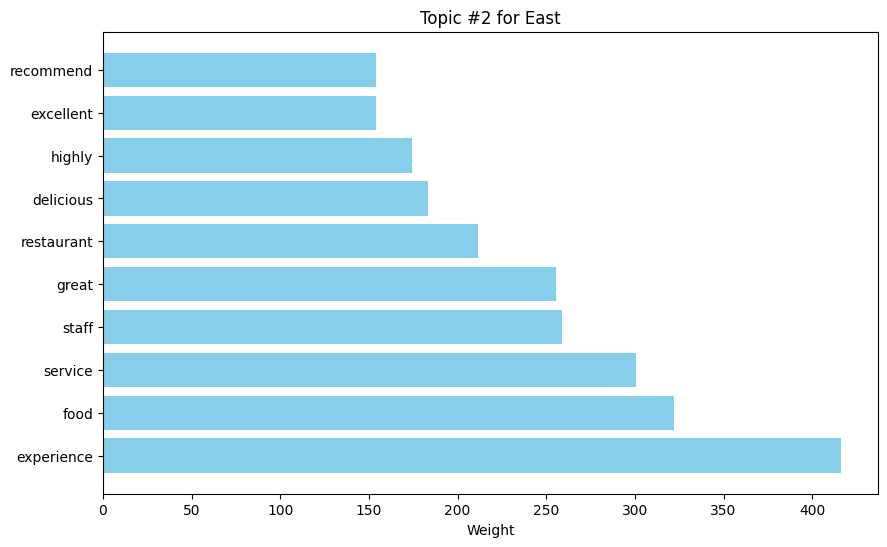


Topic #3:
['rooms', 'place', 'like', 'good', 'experience', 'staff', 'time', 'hotel', 'service', 'room']


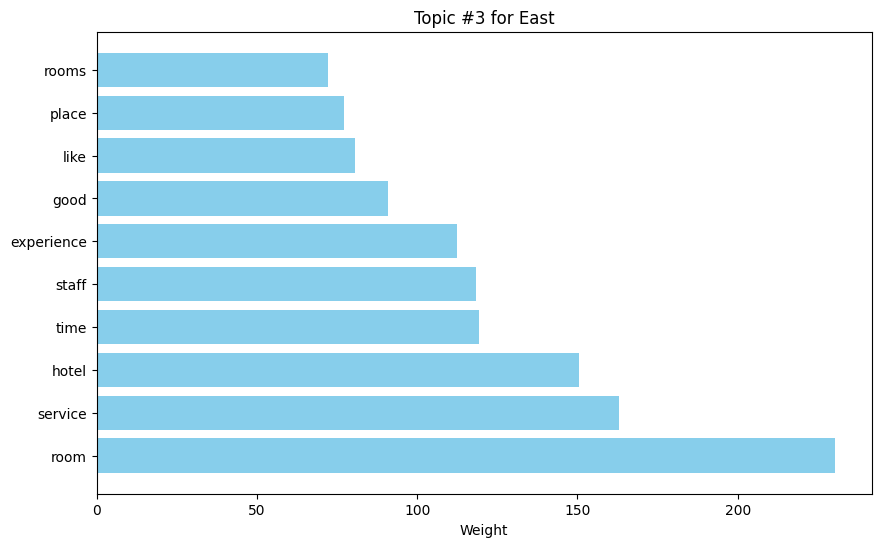


Topic #4:
['bad', 'location', 'price', 'reception', 'stay', 'excellent', 'room', 'clean', 'rooms', 'hotel']


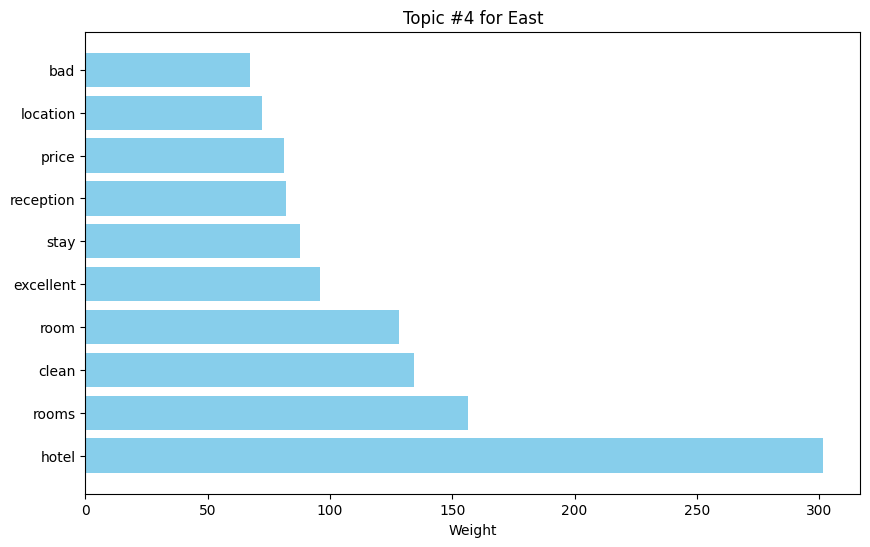


Topic #5:
['mall', 'beautiful', 'family', 'park', 'area', 'good', 'clean', 'kids', 'nice', 'place']


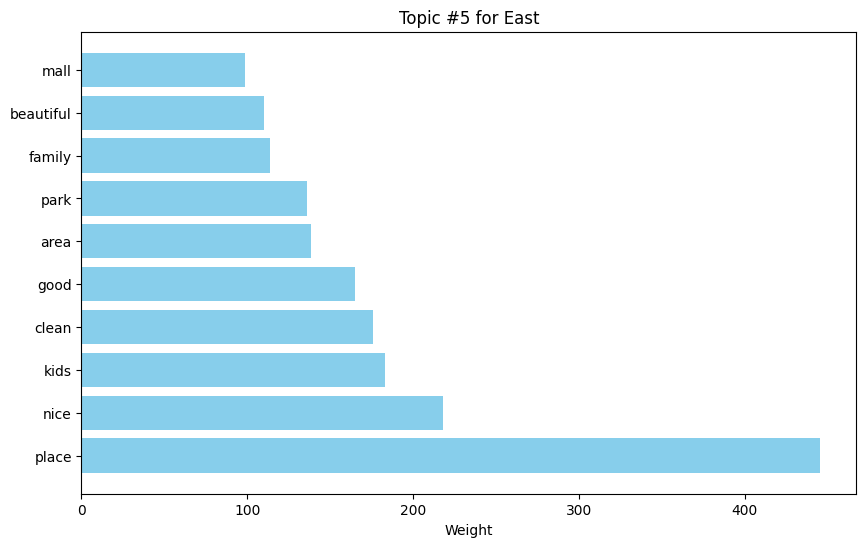


--- Topics for South ---

Topic #1:
['location', 'stay', 'rooms', 'staff', 'room', 'good', 'place', 'nice', 'clean', 'hotel']


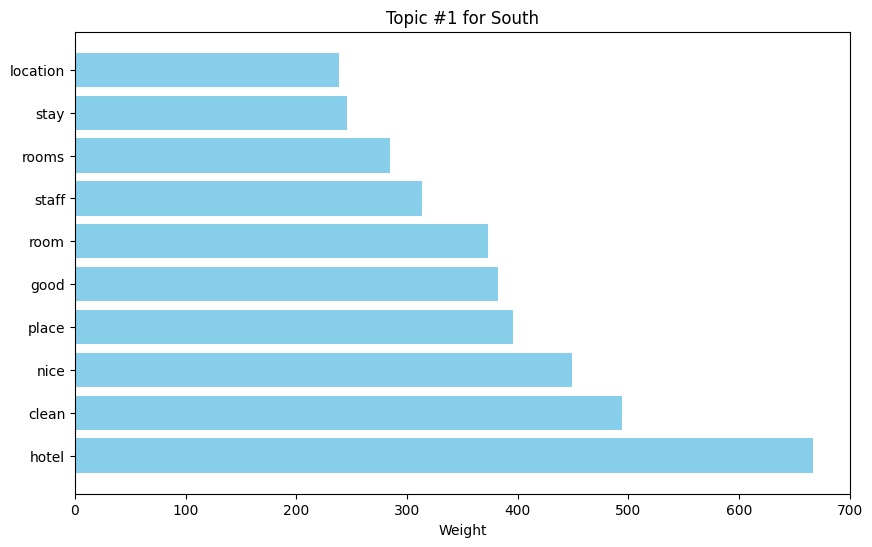


Topic #2:
['bad', 'city', 'views', 'museum', 'saudi', 'excellent', 'abha', 'visit', 'place', 'god']


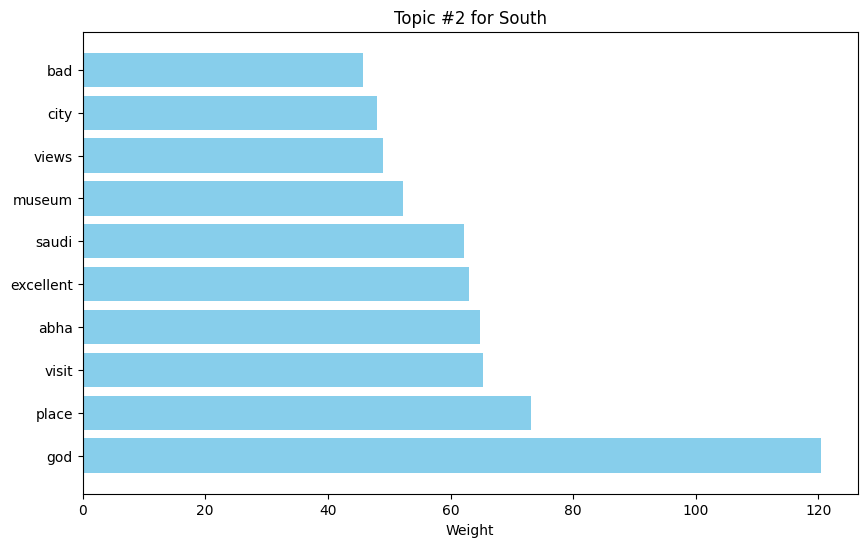


Topic #3:
['nice', 'amazing', 'chicken', 'taste', 'best', 'place', 'restaurant', 'delicious', 'good', 'food']


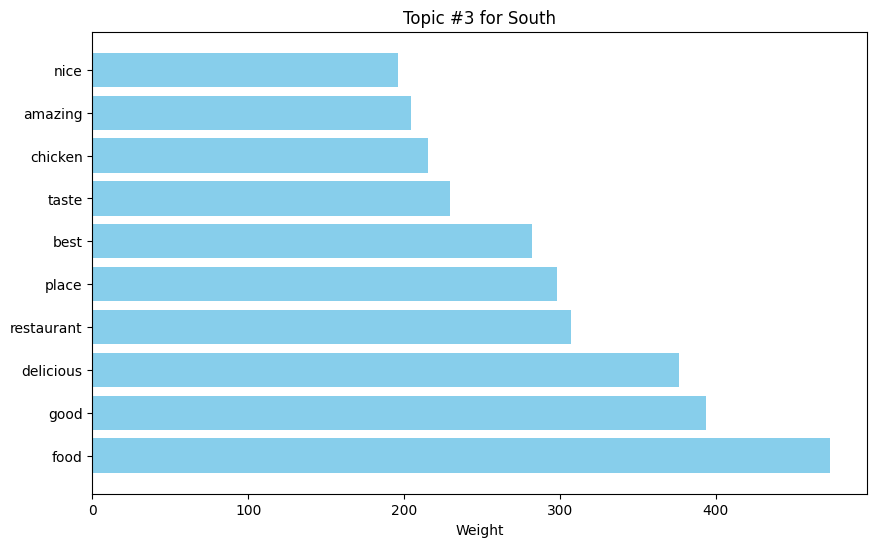


Topic #4:
['bad', 'recommend', 'place', 'staff', 'visit', 'al', 'food', 'service', 'restaurant', 'experience']


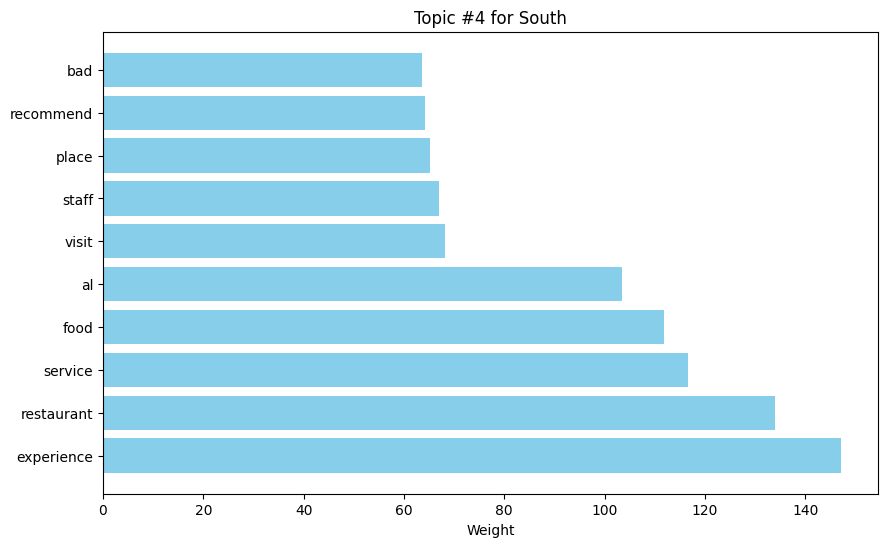


Topic #5:
['hotel', 'friendly', 'quality', 'great', 'place', 'staff', 'food', 'service', 'coffee', 'good']


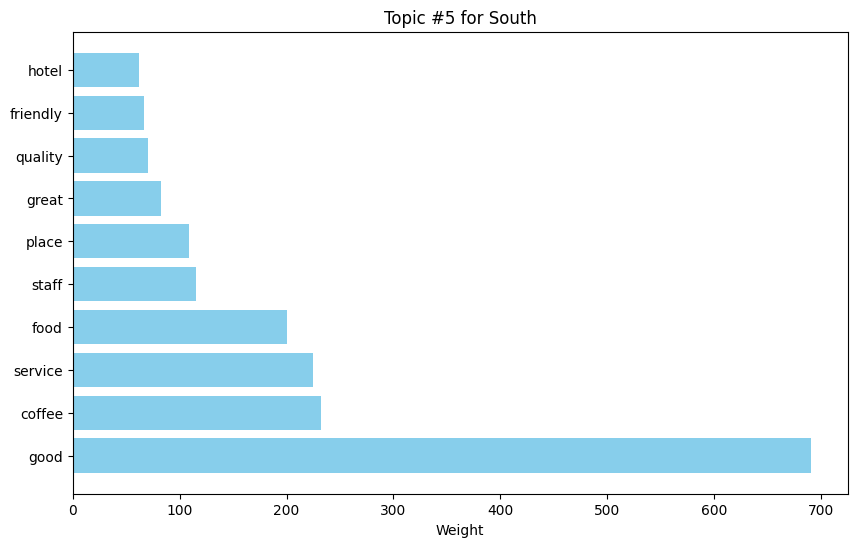

In [15]:
import matplotlib.pyplot as plt
import numpy as np

texts = df[['Region', 'Cleaned Review']].dropna()

regions = texts['Region'].unique()

for region in regions:
    print(f"\n--- Topics for {region} ---")

    region_df = texts[texts['Region'] == region]
    region_texts = region_df['Cleaned Review'].values.astype('U')

    if len(region_texts) < 5:
        print("Not enough reviews, skipping region.")
        continue

    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(region_texts)

    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(dtm)

    words = vectorizer.get_feature_names_out()

    for idx, topic in enumerate(lda.components_):
        print(f"\nTopic #{idx + 1}:")
        top_words = [words[i] for i in topic.argsort()[-10:]]
        print(top_words)

        # Plotting
        plt.figure(figsize=(10, 6))
        word_weights = [topic[i] for i in topic.argsort()[-10:]]
        plt.barh(top_words, word_weights, color='skyblue')
        plt.xlabel('Weight')
        plt.title(f'Topic #{idx + 1} for {region}')
        plt.gca().invert_yaxis()
        plt.show()



--- Topics for North ---

--- Topics for hotel in North ---

Topic #1:
['breakfast', 'rooms', 'reception', 'excellent', 'time', 'bad', 'service', 'clean', 'room', 'hotel']


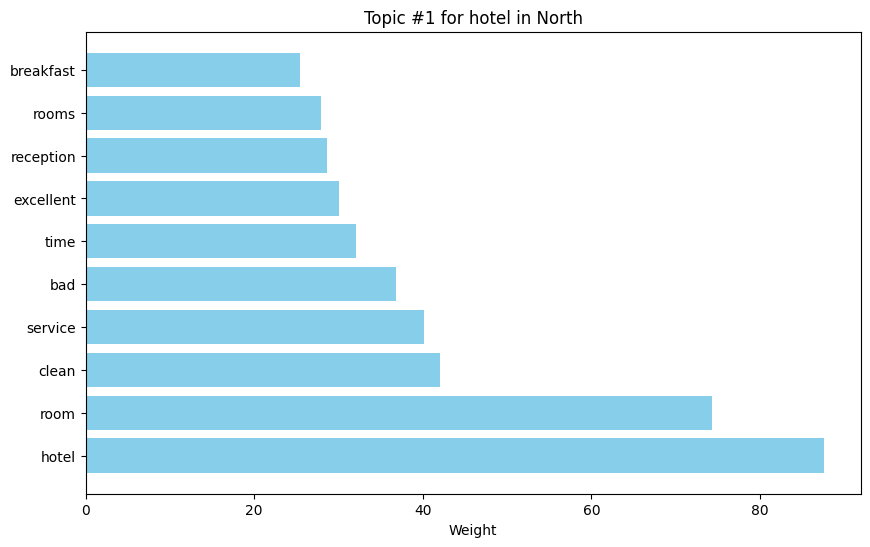


Topic #2:
['room', 'service', 'clean', 'good', 'staff', 'great', 'best', 'nice', 'place', 'hotel']


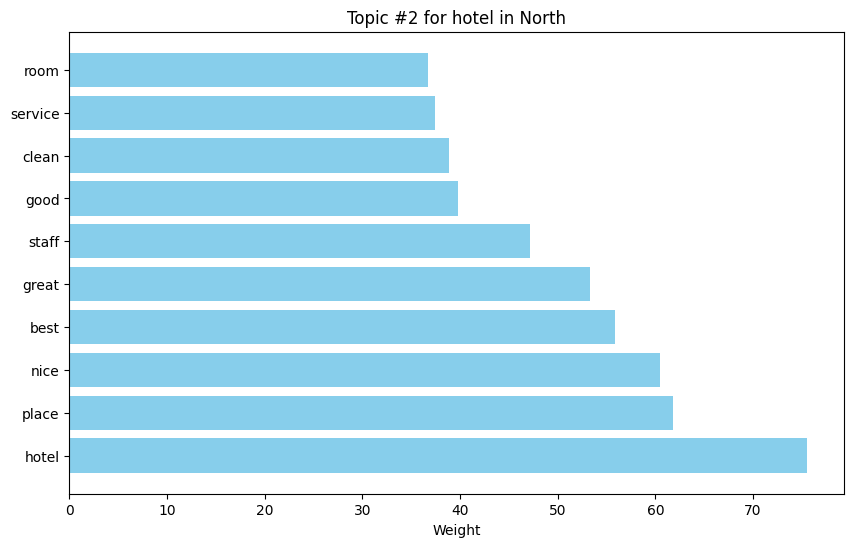


Topic #3:
['stay', 'location', 'service', 'room', 'rooms', 'nice', 'staff', 'hotel', 'clean', 'good']


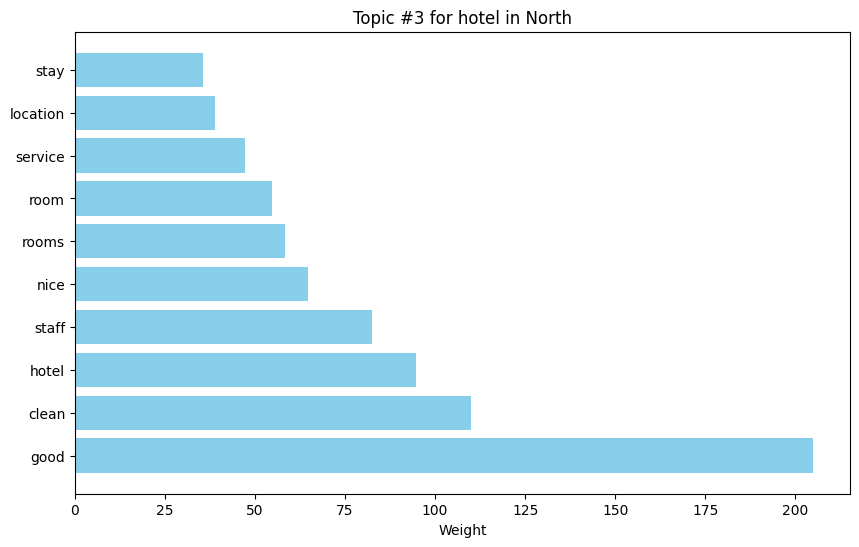


Topic #4:
['hospitality', 'exceptional', 'highly', 'staff', 'tabuk', 'rooms', 'experience', 'service', 'stay', 'hotel']


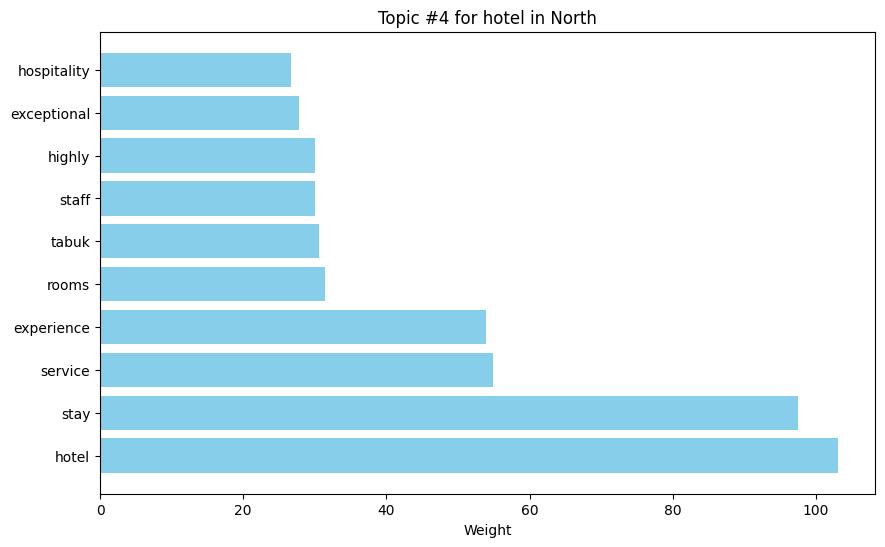


Topic #5:
['room', 'experience', 'reception', 'service', 'beautiful', 'bad', 'especially', 'clean', 'staff', 'hotel']


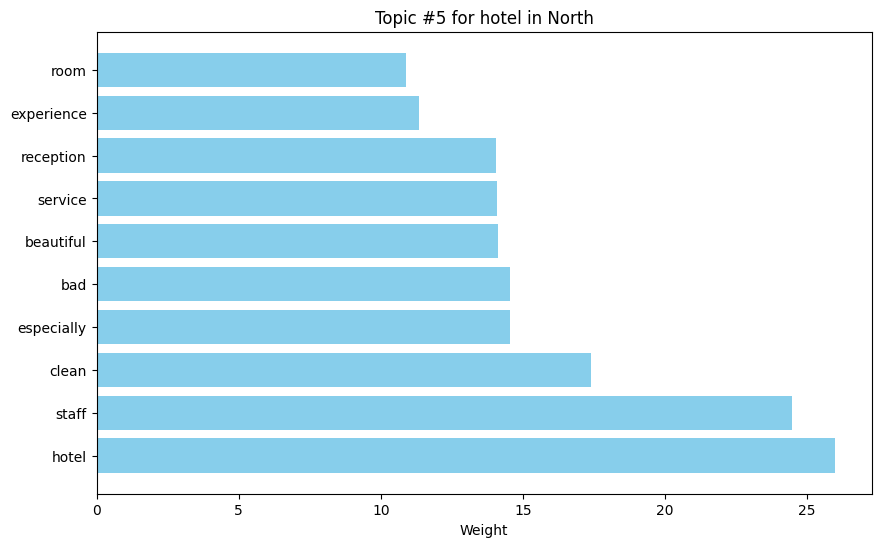


--- Topics for restaurant in North ---

Topic #1:
['delicious', 'friendly', 'great', 'nice', 'place', 'staff', 'service', 'restaurant', 'good', 'food']


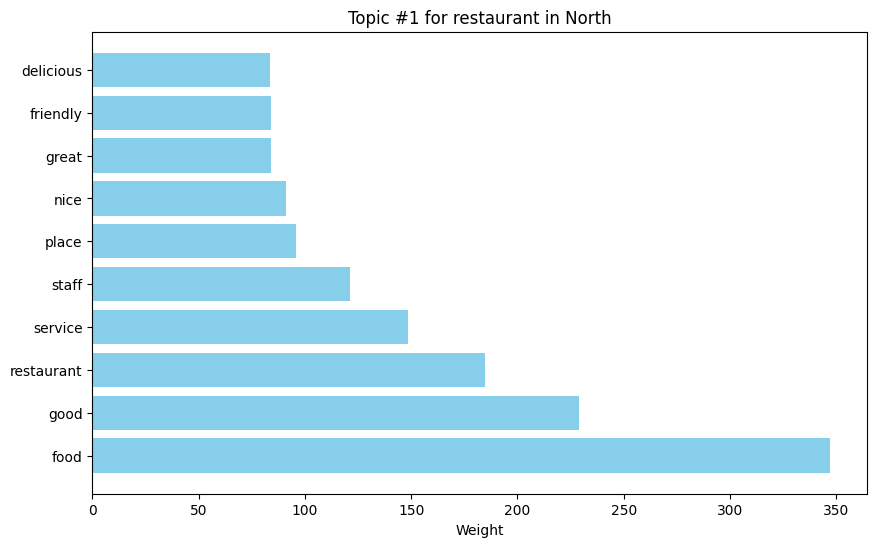


Topic #2:
['highly', 'ordered', 'fish', 'filipino', 'dishes', 'taste', 'restaurant', 'tasty', 'best', 'biryani']


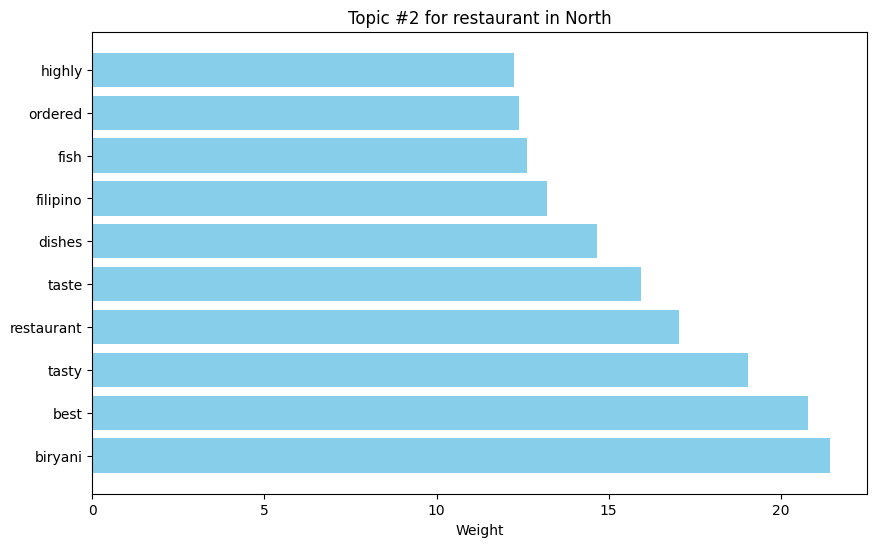


Topic #3:
['experience', 'visit', 'chicken', 'really', 'service', 'good', 'time', 'place', 'great', 'food']


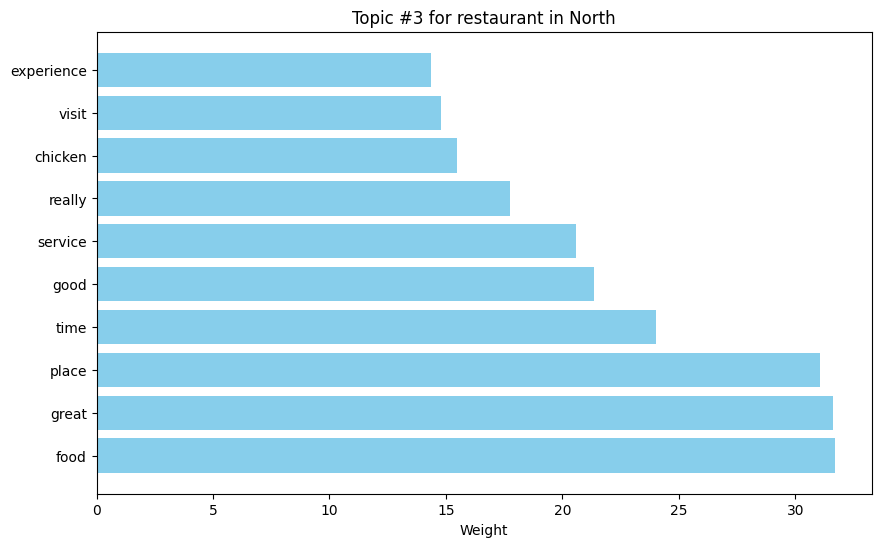


Topic #4:
['fresh', 'chicken', 'prices', 'place', 'delicious', 'like', 'shawarma', 'best', 'good', 'food']


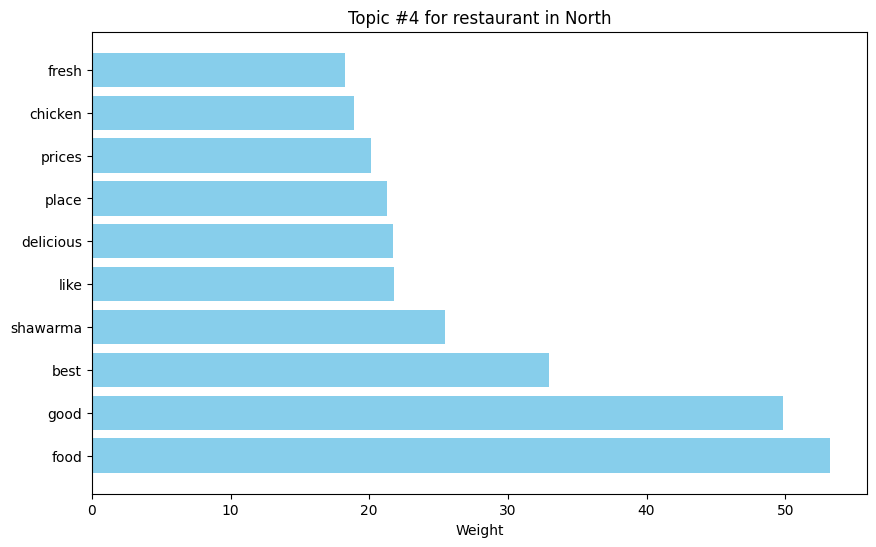


Topic #5:
['tried', 'restaurant', 'try', 'burger', 'delicious', 'god', 'food', 'chicken', 'taste', 'good']


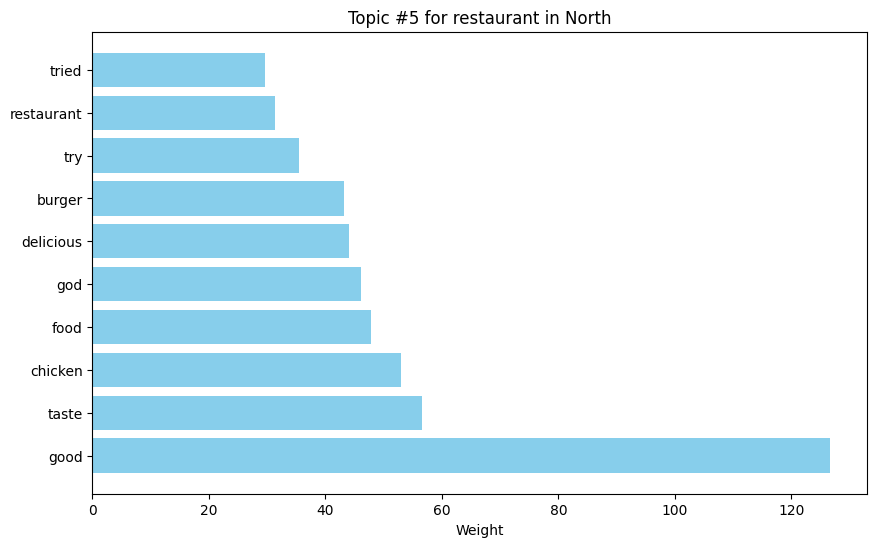


--- Topics for tourist_attraction in North ---

Topic #1:
['wonderful', 'highly', 'al', 'view', 'qishlah', 'city', 'historical', 'hail', 'nice', 'place']


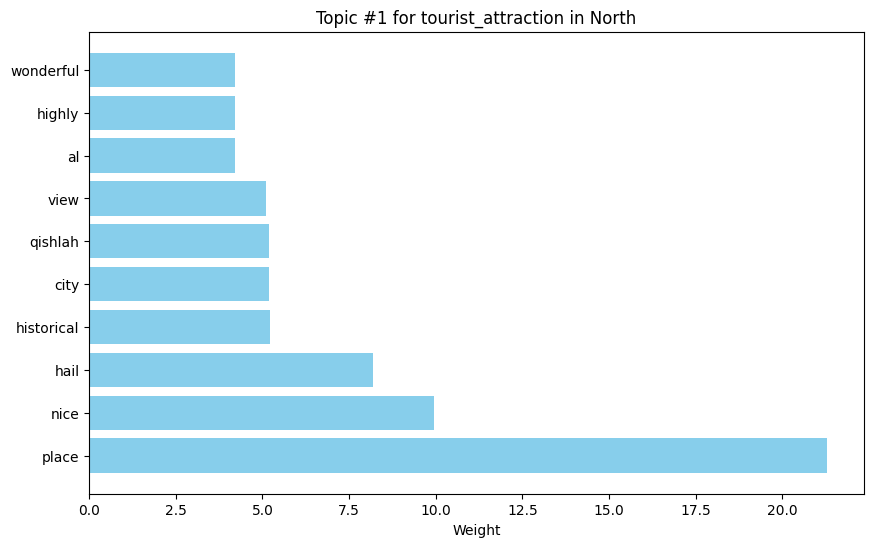


Topic #2:
['say', 'house', 'experience', 'hail', 'view', 'bad', 'time', 'place', 'good', 'nice']


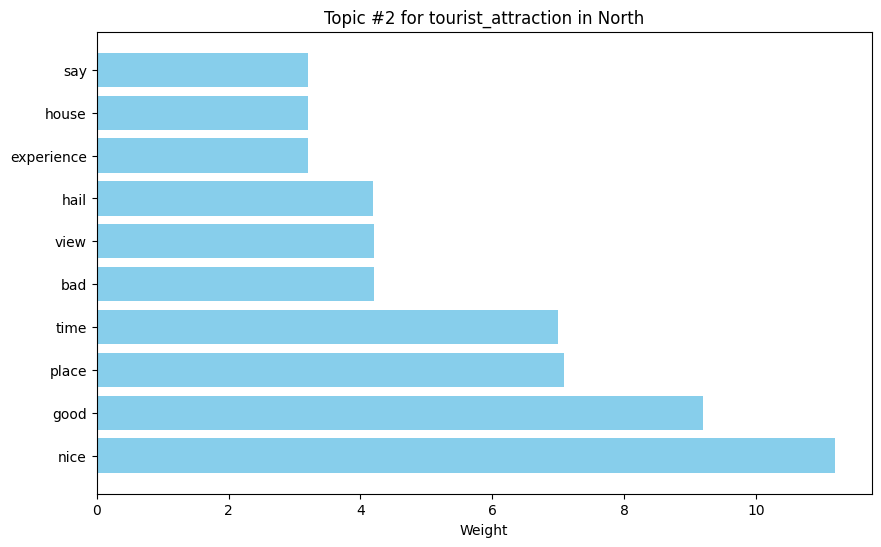


Topic #3:
['hail', 'place', 'beautiful', 'spot', 'mountain', 'sea', 'nature', 'breathtaking', 'beach', 'umluj']


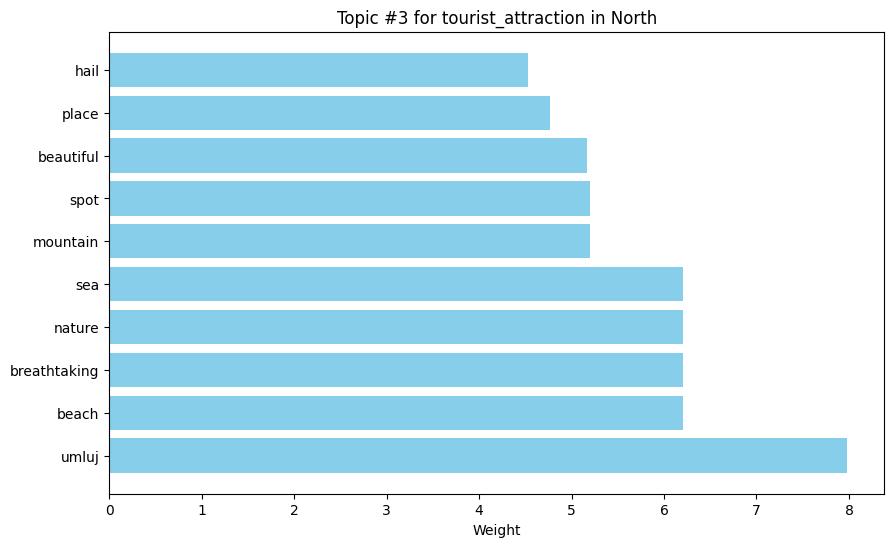


Topic #4:
['built', 'fortress', 'located', 'rock', 'formations', 'tabuk', 'mosque', 'fort', 'city', 'hail']


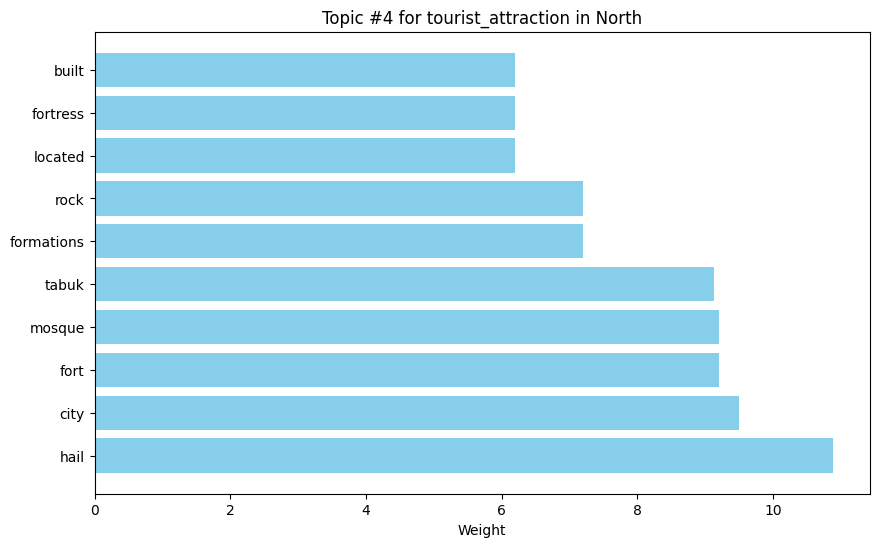


Topic #5:
['environment', 'spend', 'history', 'old', 'family', 'sar', 'masjid', 'tabuk', 'place', 'good']


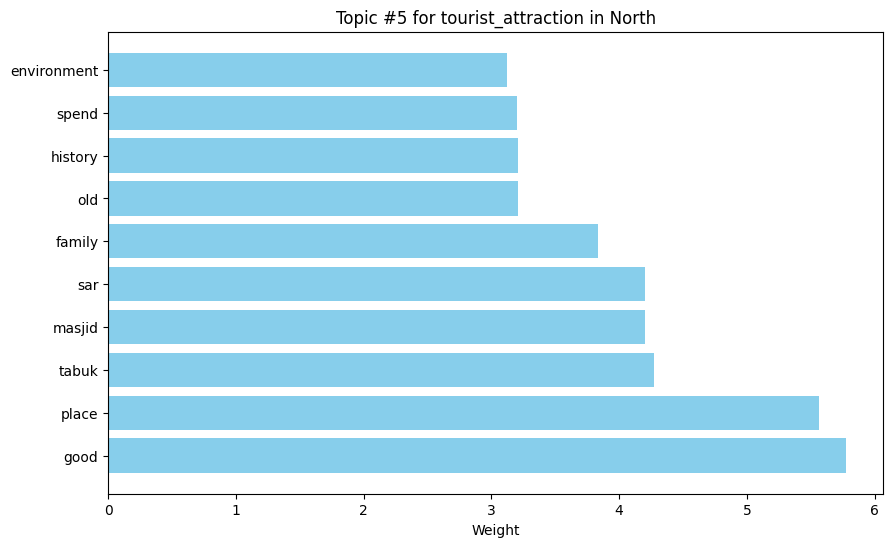


--- Topics for shopping_mall in North ---

Topic #1:
['selection', 'place', 'family', 'shopping', 'experience', 'staff', 'variety', 'store', 'products', 'great']


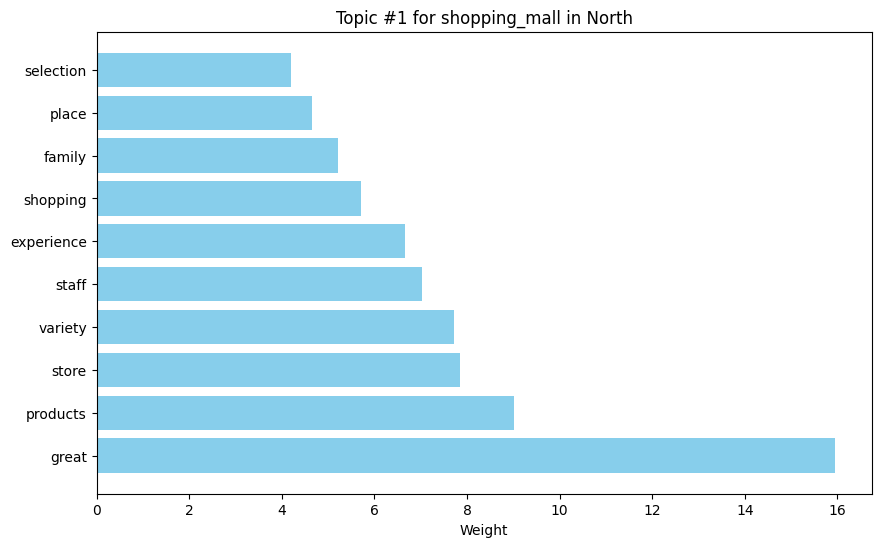


Topic #2:
['items', 'brands', 'market', 'kids', 'stores', 'place', 'shop', 'good', 'shopping', 'mall']


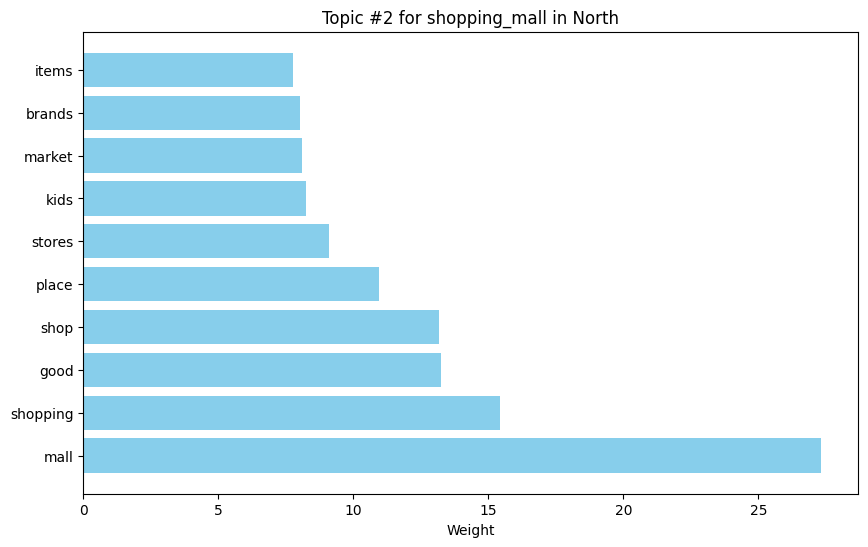


Topic #3:
['market', 'best', 'prices', 'clothes', 'nice', 'mall', 'service', 'quality', 'place', 'good']


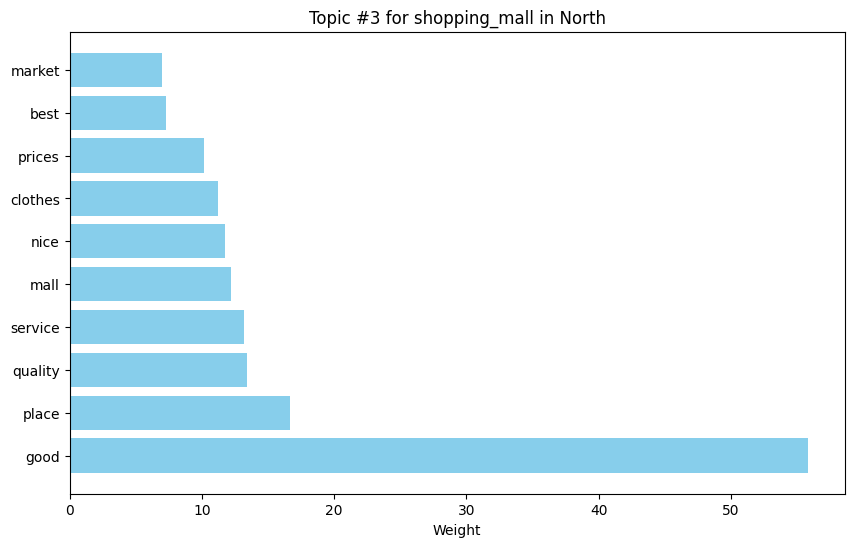


Topic #4:
['mall', 'city', 'need', 'price', 'shopping', 'items', 'nice', 'available', 'good', 'place']


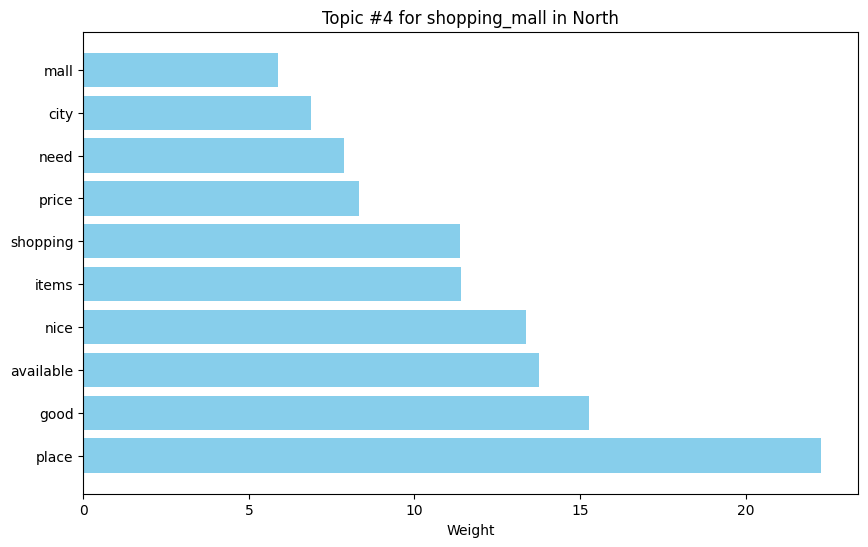


Topic #5:
['thats', 'market', 'center', 'tabuk', 'stores', 'clothing', 'home', 'shopping', 'best', 'like']


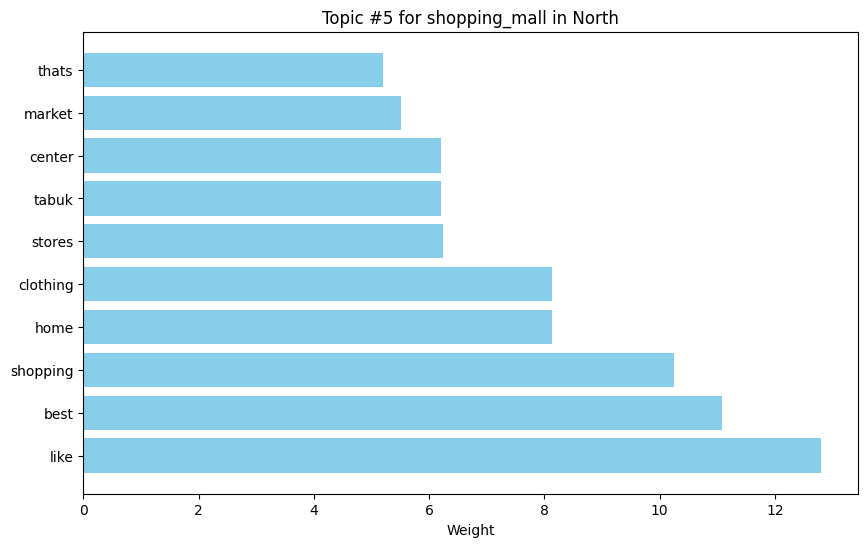


--- Topics for museum in North ---

Topic #1:
['ancient', 'architecture', 'individual', 'worth', 'free', 'historical', 'area', 'old', 'visit', 'place']


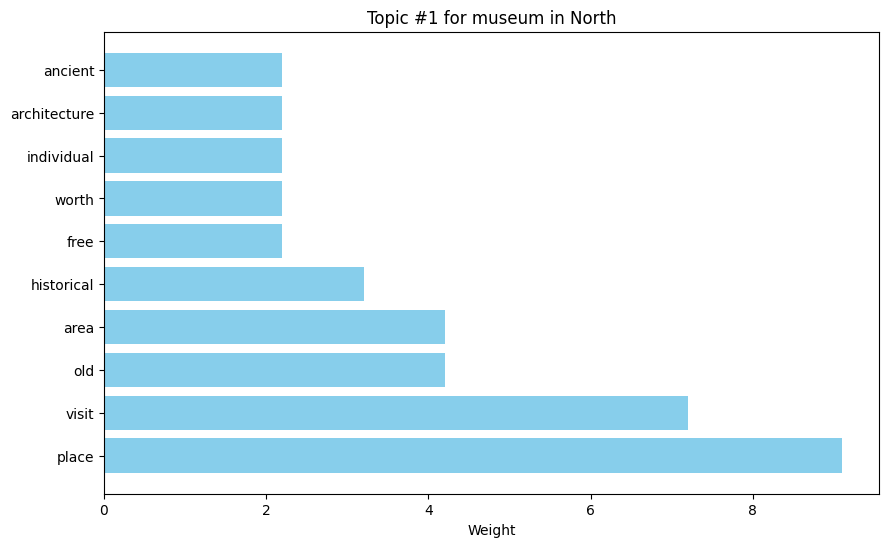


Topic #2:
['information', 'come', 'mosque', 'old', 'small', 'place', 'museum', 'beautiful', 'good', 'nice']


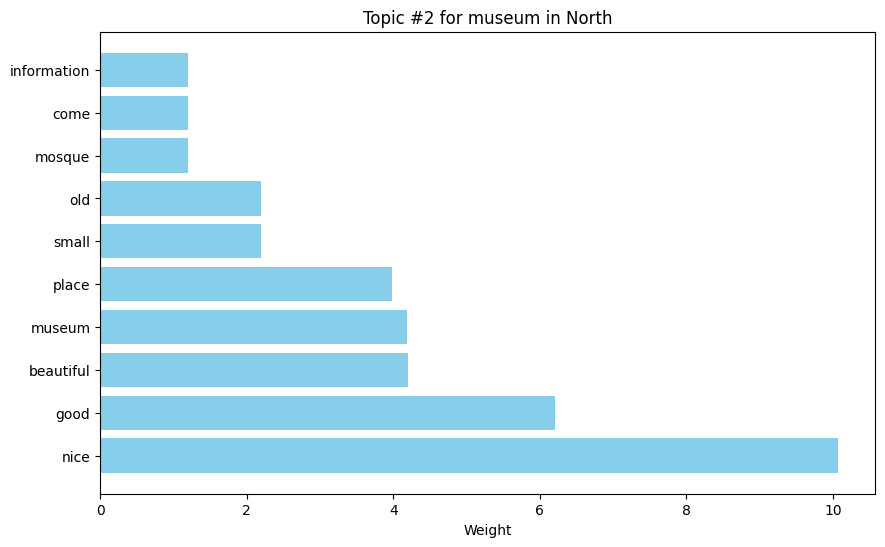


Topic #3:
['ancient', 'northwestern', 'capital', 'city', 'open', 'dates', 'food', 'museum', 'castle', 'tabuk']


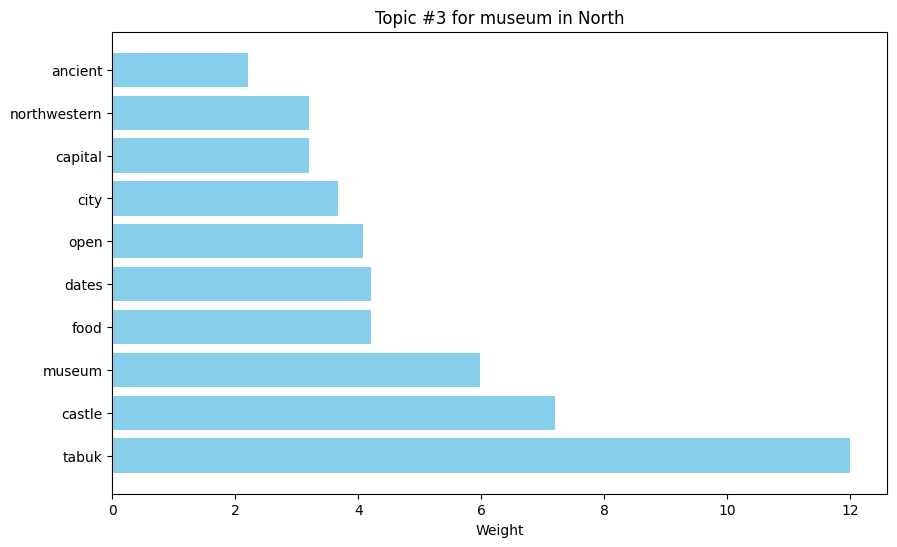


Topic #4:
['coffee', 'area', 'outside', 'city', 'hail', 'nice', 'visit', 'heritage', 'place', 'museum']


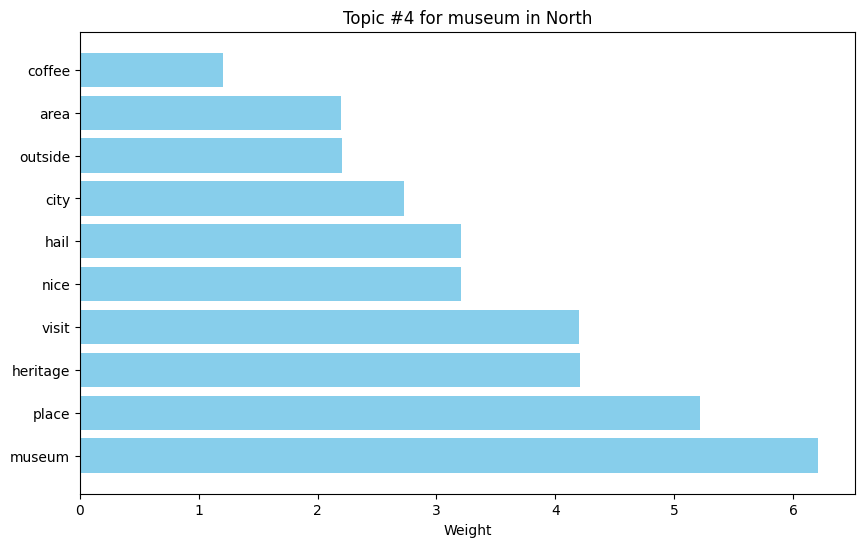


Topic #5:
['stations', 'built', 'train', 'place', 'arabia', 'station', 'saudi', 'tabuk', 'museum', 'railway']


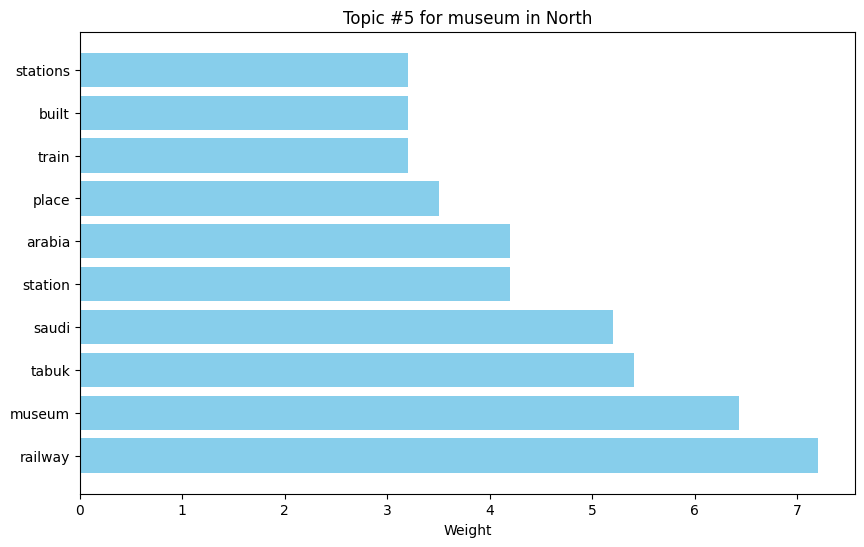


--- Topics for cafe in North ---

Topic #1:
['order', 'cup', 'tabuk', 'beautiful', 'nice', 'good', 'best', 'great', 'place', 'coffee']


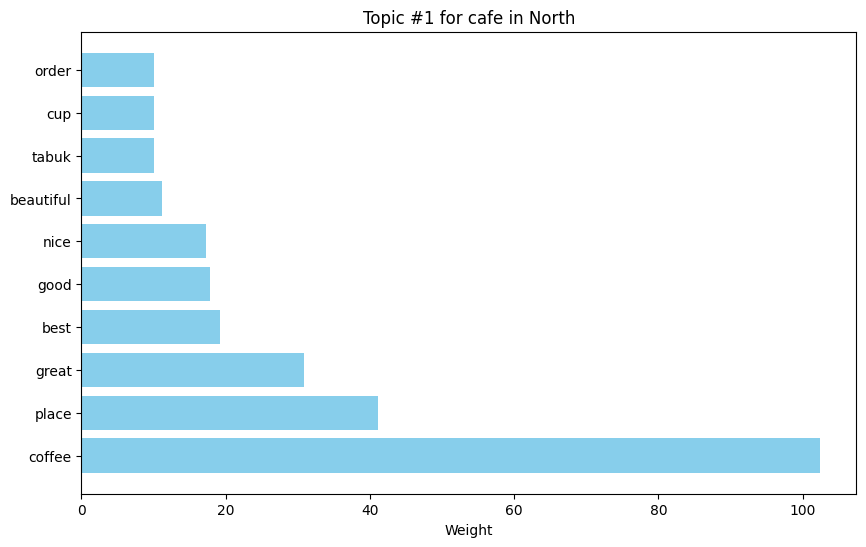


Topic #2:
['lovely', 'tabuk', 'great', 'hail', 'delicious', 'cookies', 'staff', 'place', 'best', 'coffee']


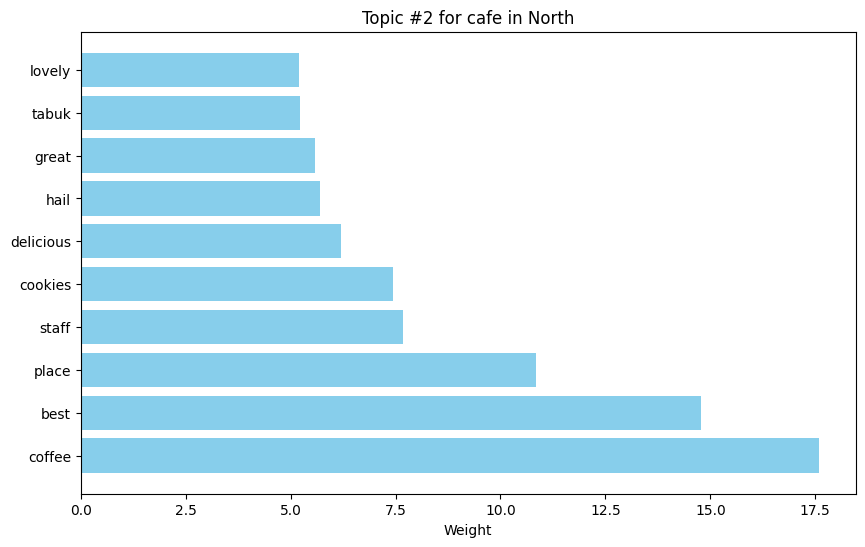


Topic #3:
['cafe', 'service', 'tried', 'staff', 'amazing', 'delicious', 'good', 'nice', 'place', 'coffee']


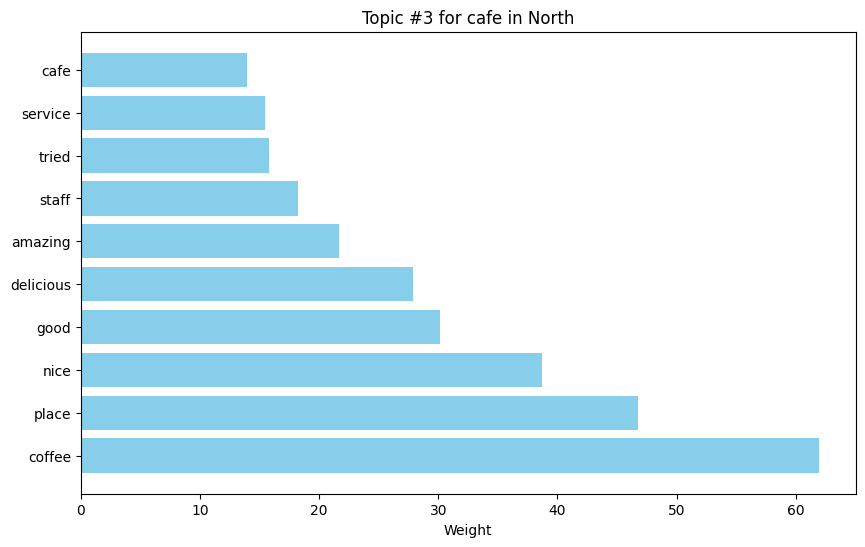


Topic #4:
['ordered', 'order', 'ice', 'staff', 'flat', 'white', 'coffee', 'nice', 'good', 'place']


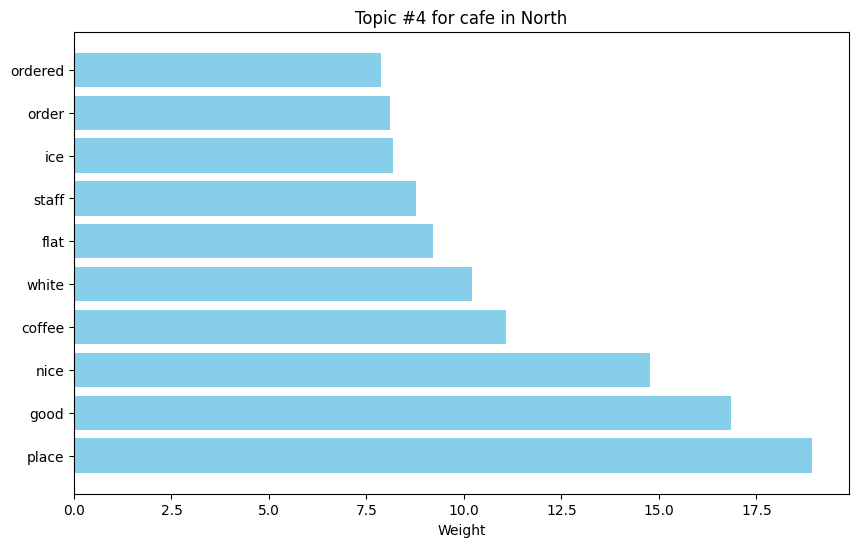


Topic #5:
['shop', 'taste', 'amazing', 'cafe', 'place', 'best', 'excellent', 'service', 'coffee', 'good']


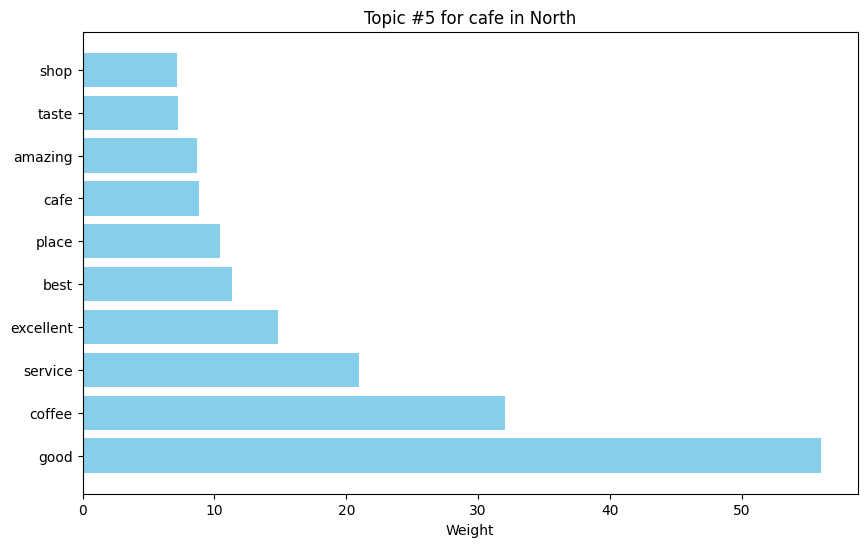


--- Topics for park in North ---

Topic #1:
['park', 'lots', 'shops', 'entrance', 'families', 'free', 'friends', 'coffee', 'place', 'family']


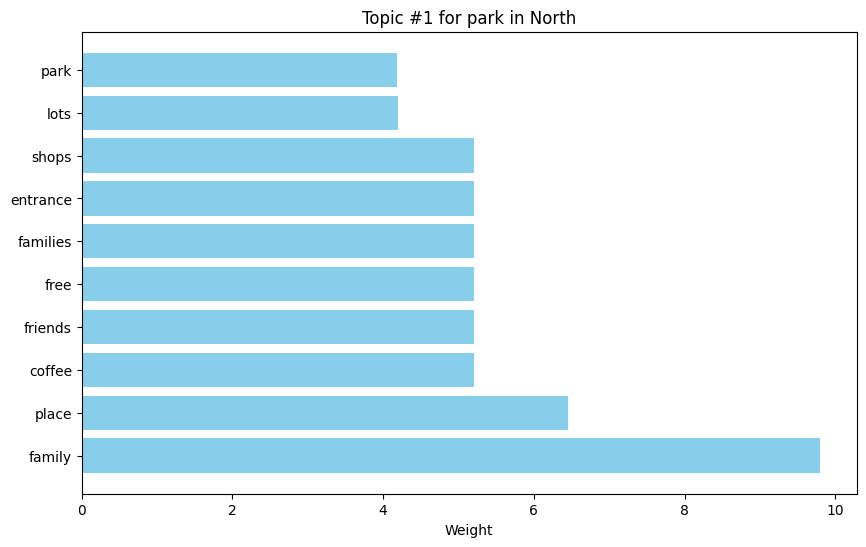


Topic #2:
['loved', 'need', 'atmosphere', 'clean', 'park', 'beautiful', 'area', 'good', 'amazing', 'place']


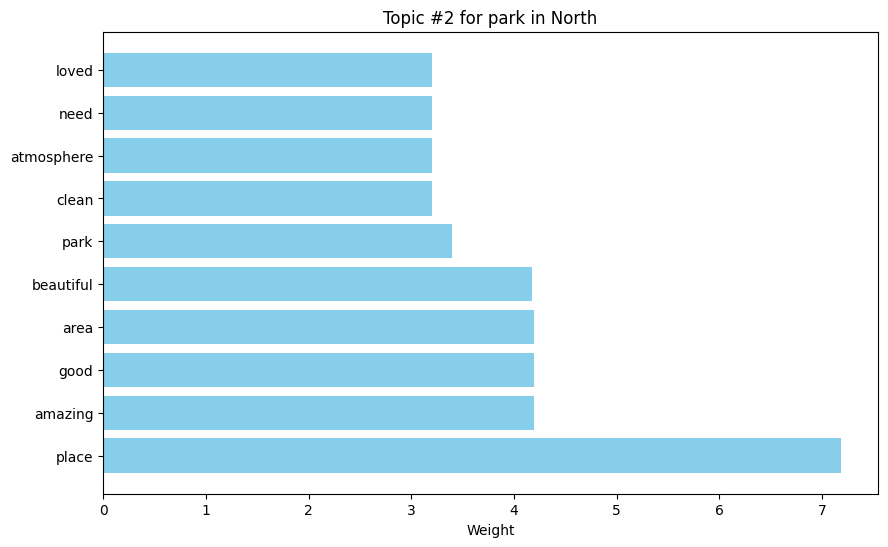


Topic #3:
['playground', 'lovely', 'spot', 'maintained', 'small', 'umluj', 'kids', 'beautiful', 'nice', 'park']


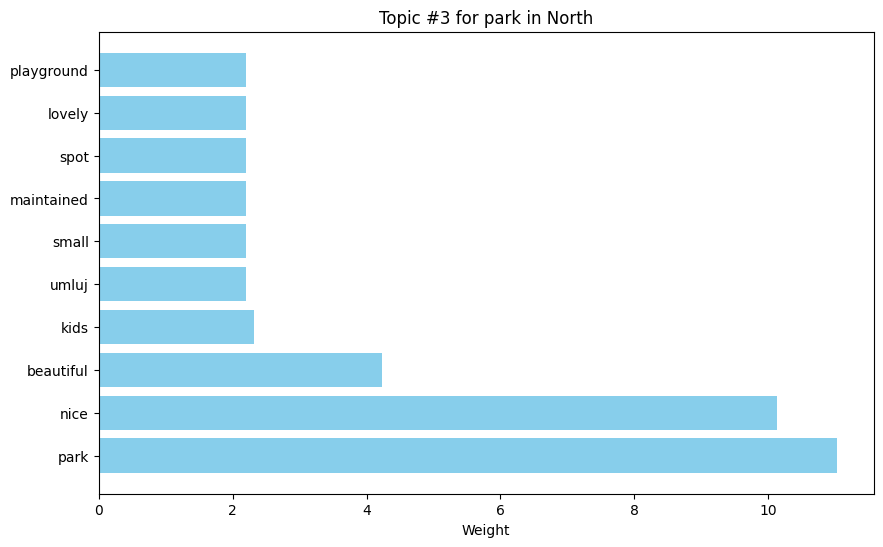


Topic #4:
['camping', 'good', 'services', 'natural', 'desert', 'beach', 'best', 'amazing', 'water', 'place']


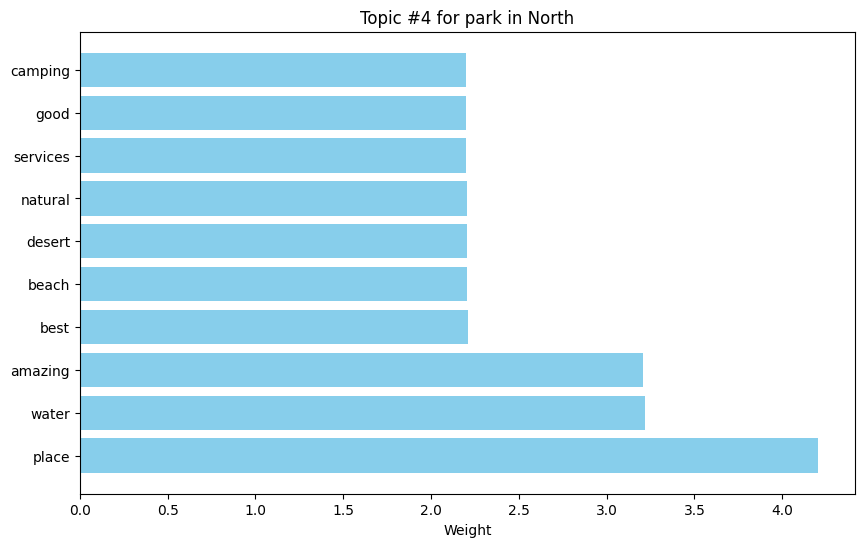


Topic #5:
['visit', 'amazing', 'great', 'people', 'kids', 'beautiful', 'family', 'beach', 'good', 'place']


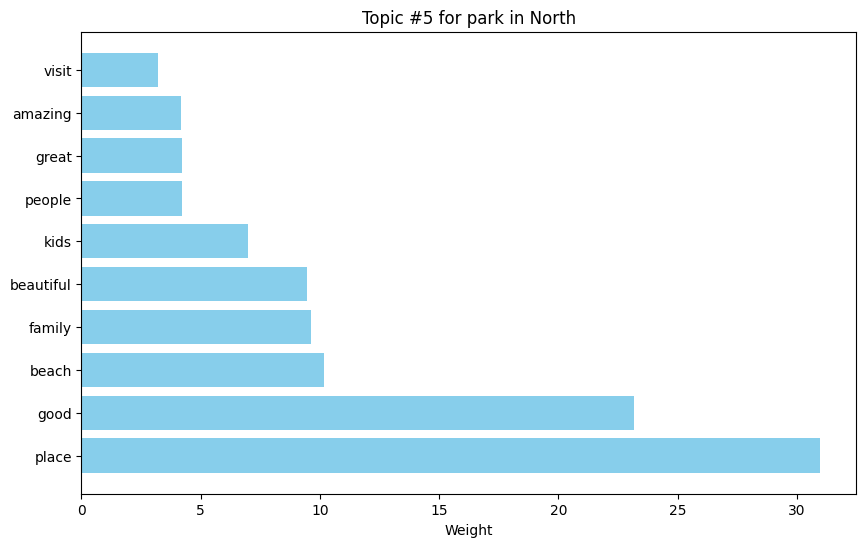


--- Topics for amusement_park in North ---

Topic #1:
['small', 'worth', 'good', 'need', 'place', 'sr', 'kids', 'children', 'strawberries', 'expensive']


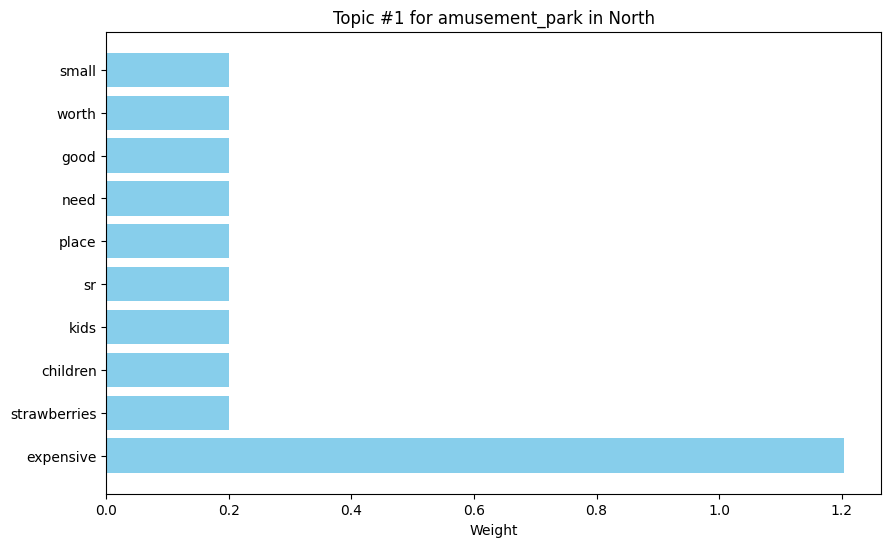


Topic #2:
['need', 'children', 'expensive', 'good', 'sr', 'worth', 'strawberries', 'kids', 'place', 'visit']


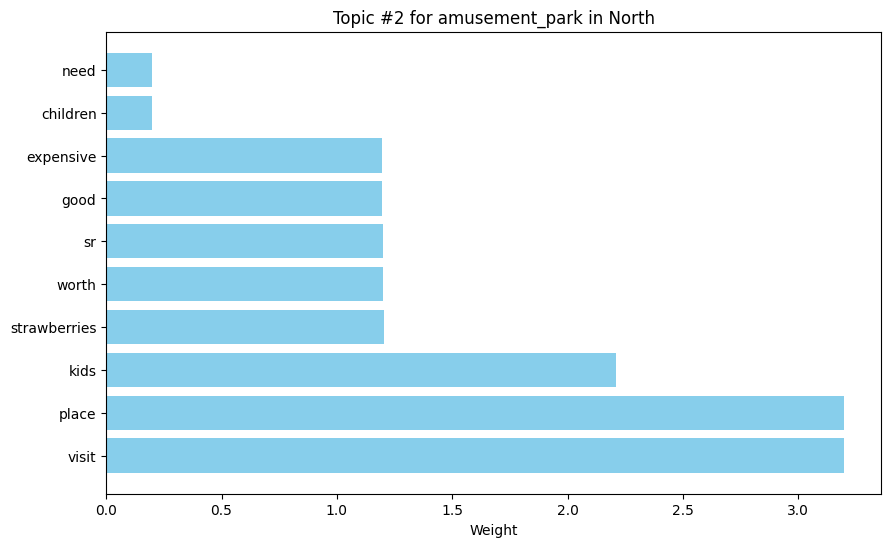


Topic #3:
['area', 'worth', 'sr', 'collection', 'sar', 'including', 'children', 'birds', 'small', 'place']


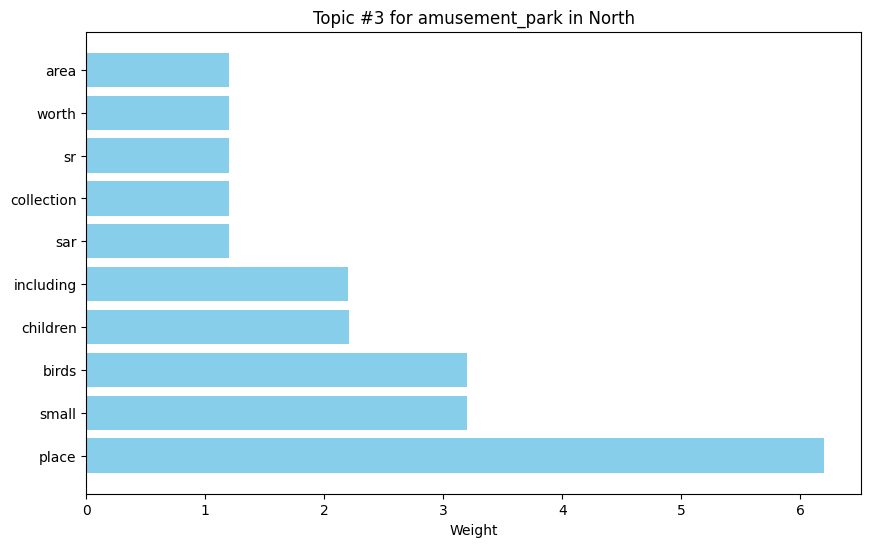


Topic #4:
['sr', 'place', 'expensive', 'kids', 'strawberries', 'children', 'small', 'sar', 'need', 'want']


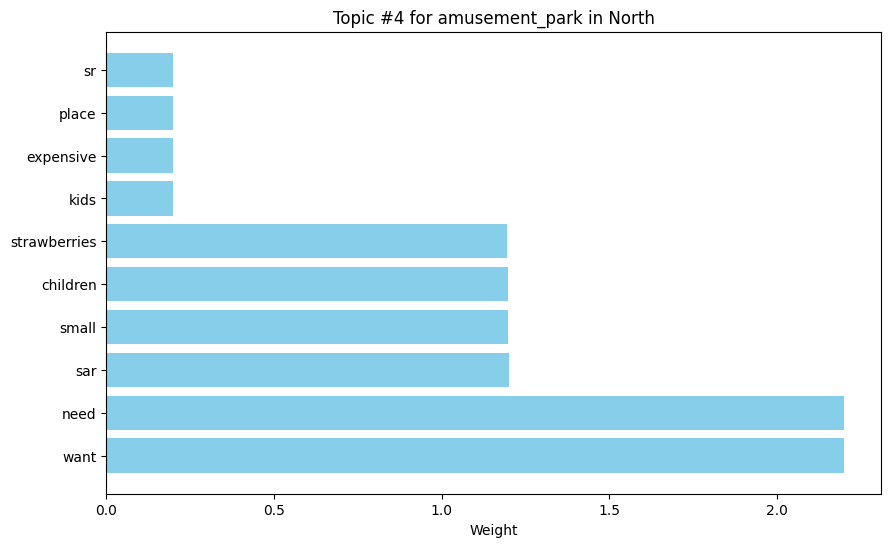


Topic #5:
['kids', 'strawberries', 'place', 'children', 'small', 'collection', 'family', 'area', 'inside', 'good']


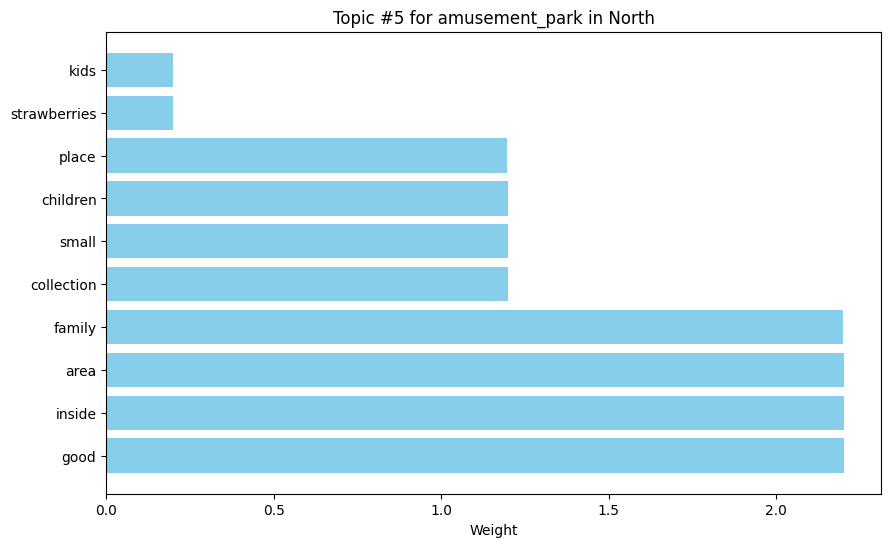


--- Topics for Central ---

--- Topics for hotel in Central ---

Topic #1:
['good', 'great', 'rooms', 'riyadh', 'experience', 'staff', 'location', 'service', 'stay', 'hotel']


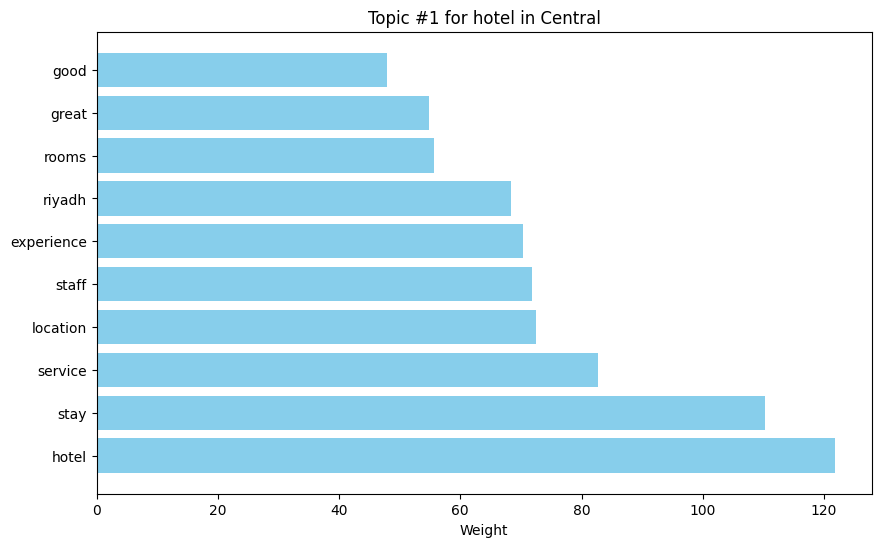


Topic #2:
['price', 'cleanliness', 'bless', 'reception', 'chalet', 'excellent', 'god', 'service', 'room', 'good']


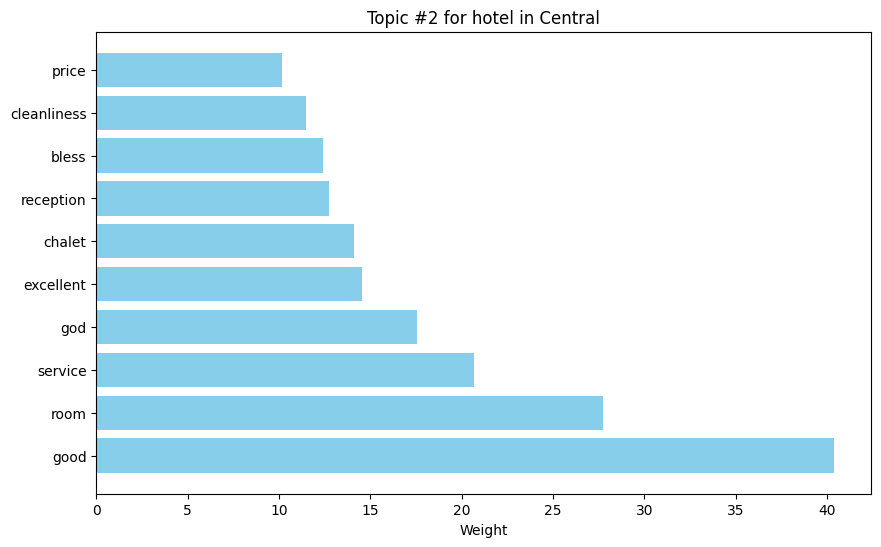


Topic #3:
['great', 'excellent', 'place', 'staff', 'nice', 'service', 'clean', 'room', 'hotel', 'good']


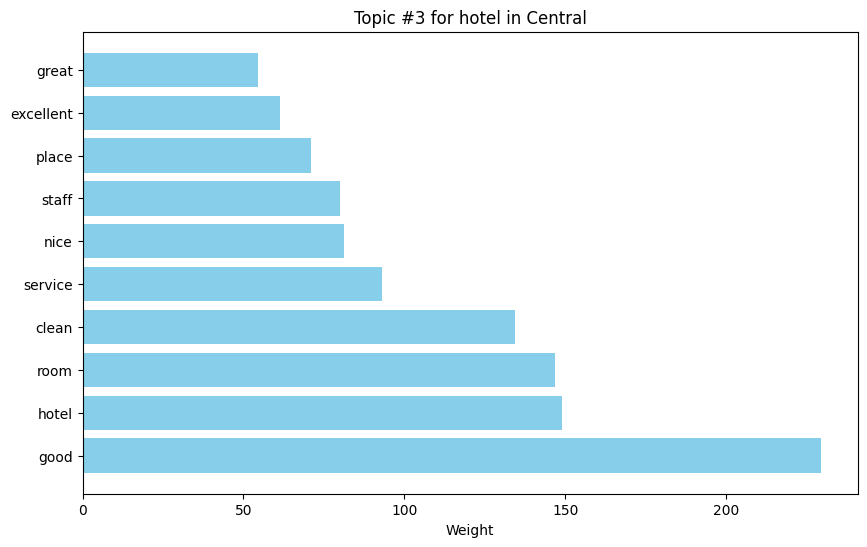


Topic #4:
['time', 'dont', 'good', 'stay', 'room', 'nice', 'rooms', 'bad', 'hotel', 'place']


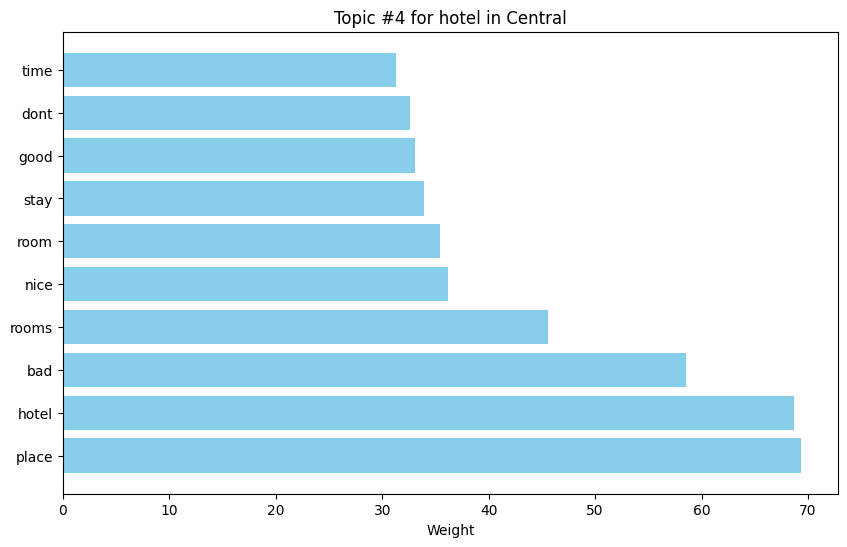


Topic #5:
['bathroom', 'working', 'shower', 'stay', 'day', 'family', 'water', 'hotel', 'small', 'room']


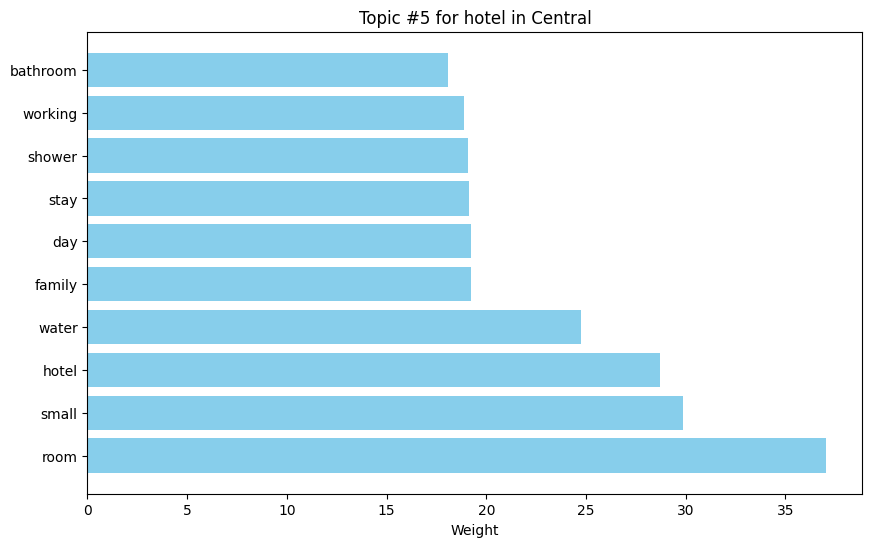


--- Topics for restaurant in Central ---

Topic #1:
['recommend', 'place', 'great', 'time', 'atmosphere', 'food', 'restaurant', 'staff', 'experience', 'service']


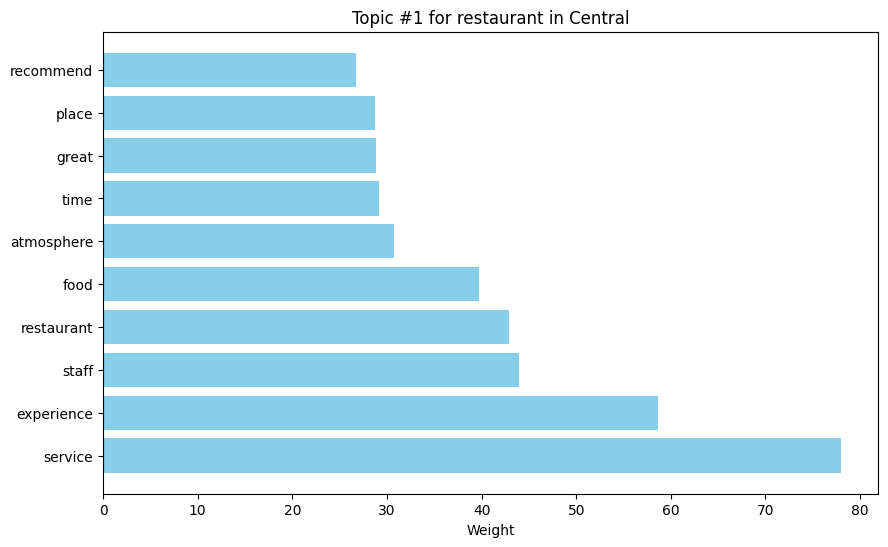


Topic #2:
['hospitality', 'staff', 'super', 'thanks', 'mr', 'experience', 'really', 'service', 'food', 'great']


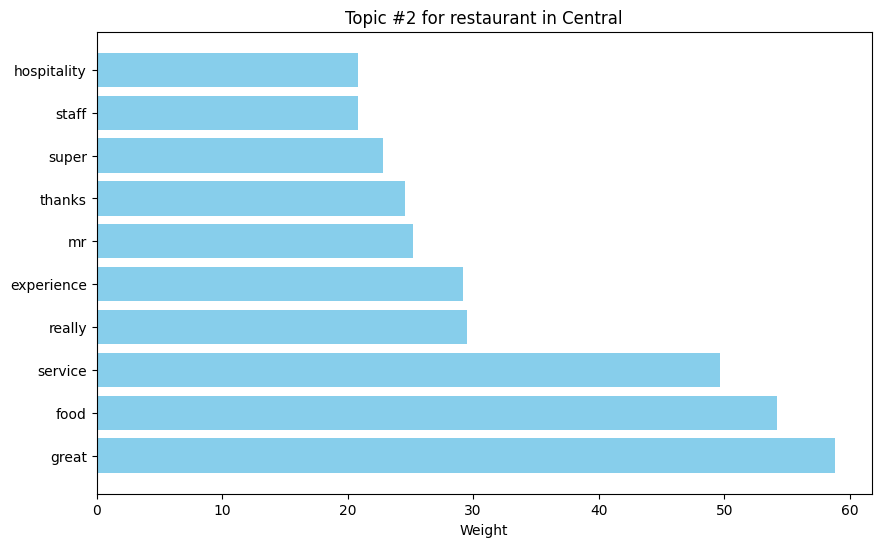


Topic #3:
['best', 'chicken', 'delicious', 'taste', 'nice', 'place', 'restaurant', 'service', 'food', 'good']


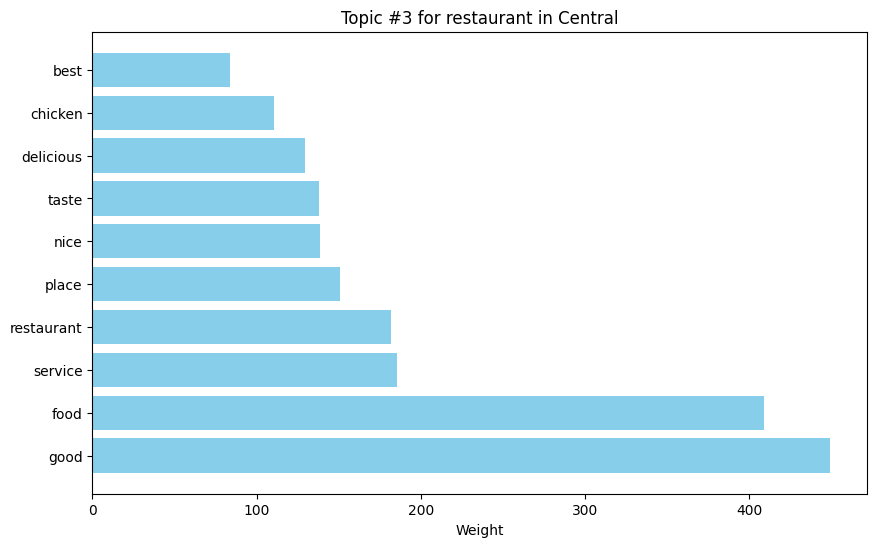


Topic #4:
['delicious', 'service', 'bread', 'staff', 'order', 'good', 'breakfast', 'pizza', 'bad', 'chicken']


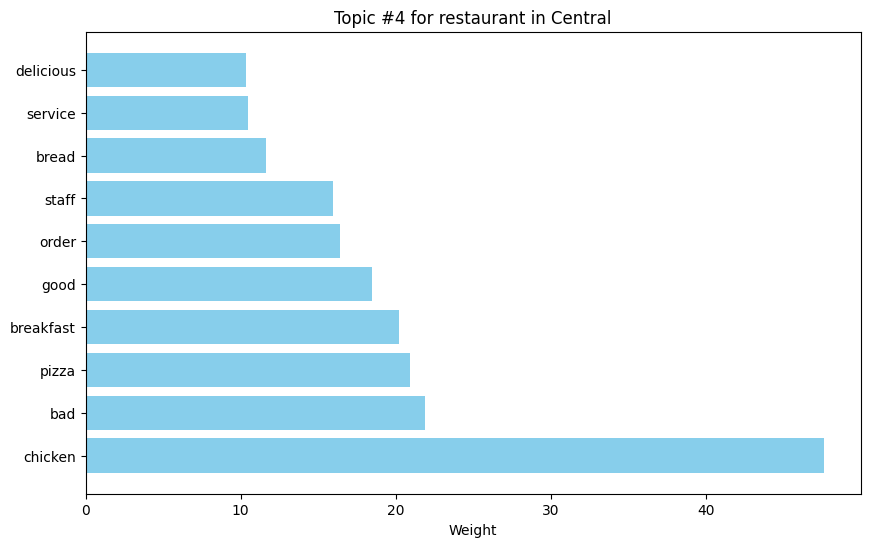


Topic #5:
['highly', 'great', 'perfect', 'service', 'warm', 'ambiance', 'special', 'food', 'dining', 'experience']


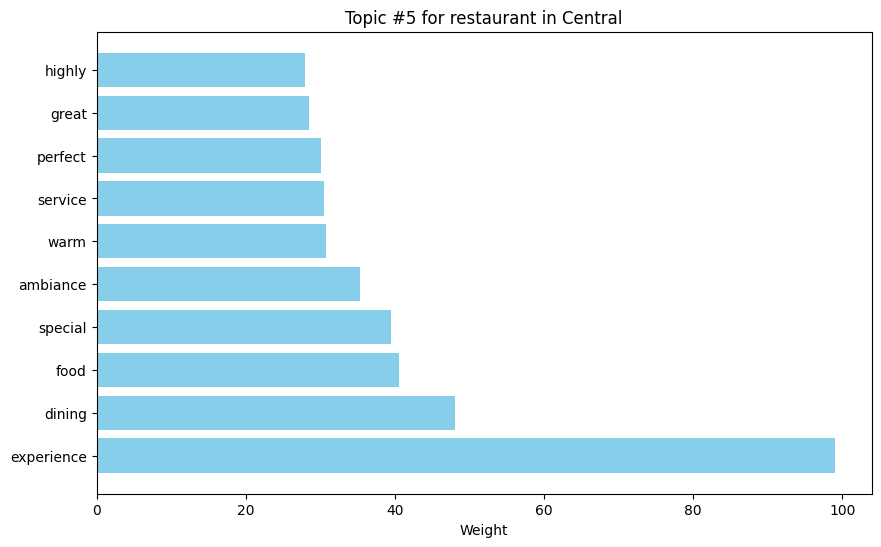


--- Topics for tourist_attraction in Central ---

Topic #1:
['site', 'archaeological', 'sites', 'parking', 'water', 'area', 'kids', 'park', 'place', 'good']


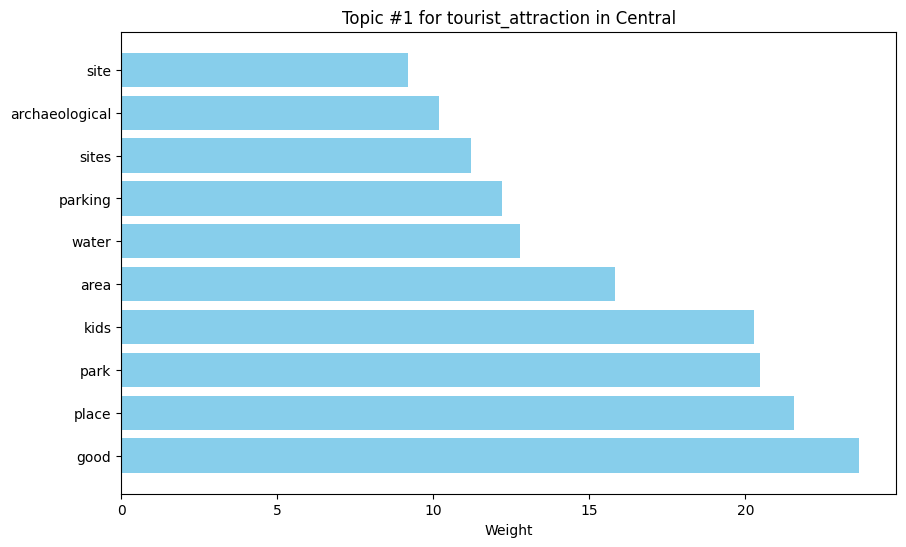


Topic #2:
['heritage', 'enjoy', 'al', 'amazing', 'market', 'city', 'traditional', 'beautiful', 'place', 'park']


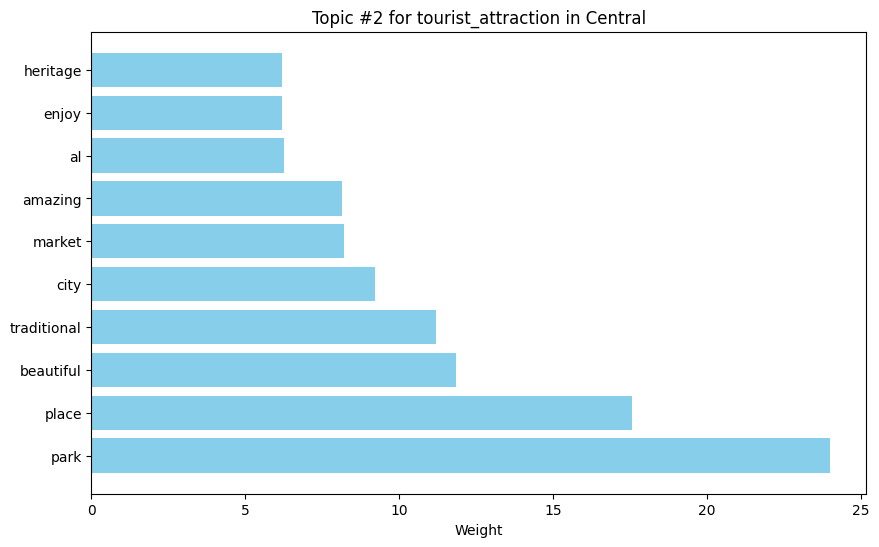


Topic #3:
['outing', 'great', 'visit', 'like', 'family', 'coffee', 'good', 'park', 'nice', 'place']


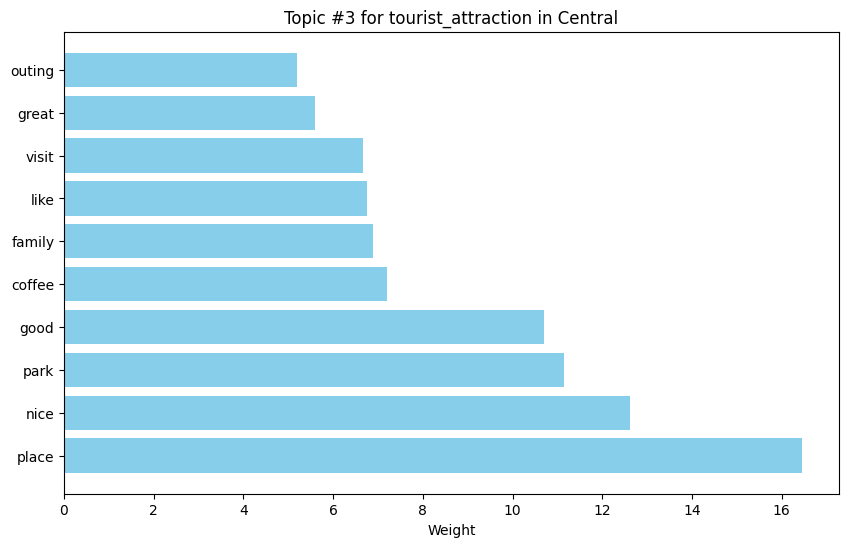


Topic #4:
['amazing', 'old', 'culture', 'experience', 'time', 'museum', 'arabia', 'history', 'place', 'saudi']


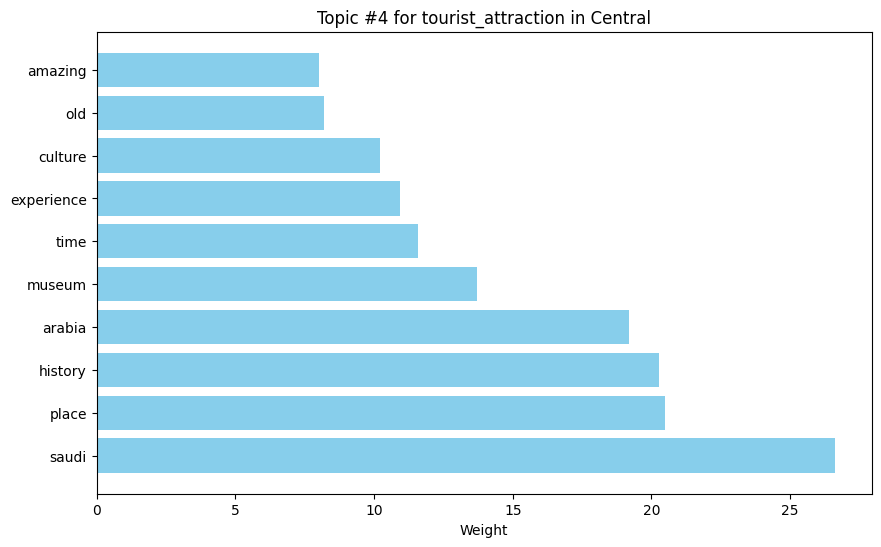


Topic #5:
['youre', 'ancient', 'palace', 'beautiful', 'pm', 'time', 'zoo', 'visit', 'place', 'riyadh']


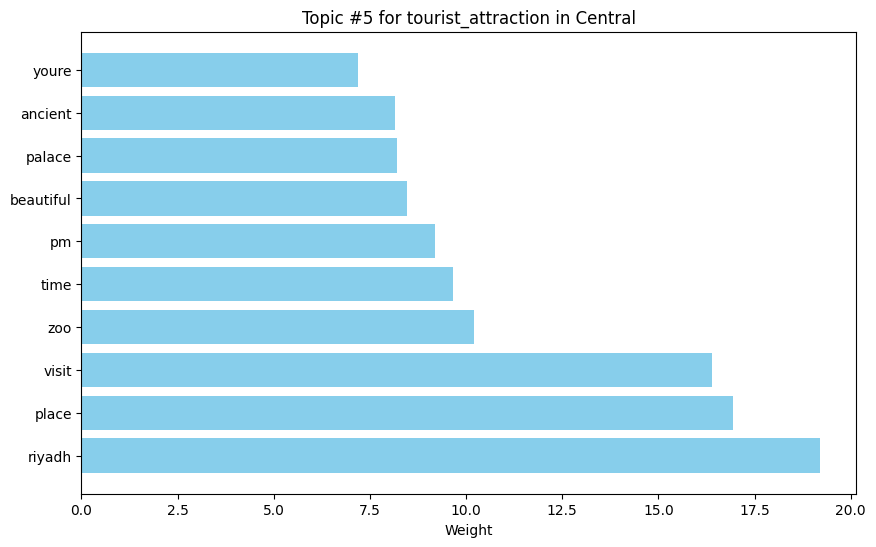


--- Topics for shopping_mall in Central ---

Topic #1:
['price', 'food', 'items', 'like', 'place', 'shopping', 'experience', 'good', 'nice', 'mall']


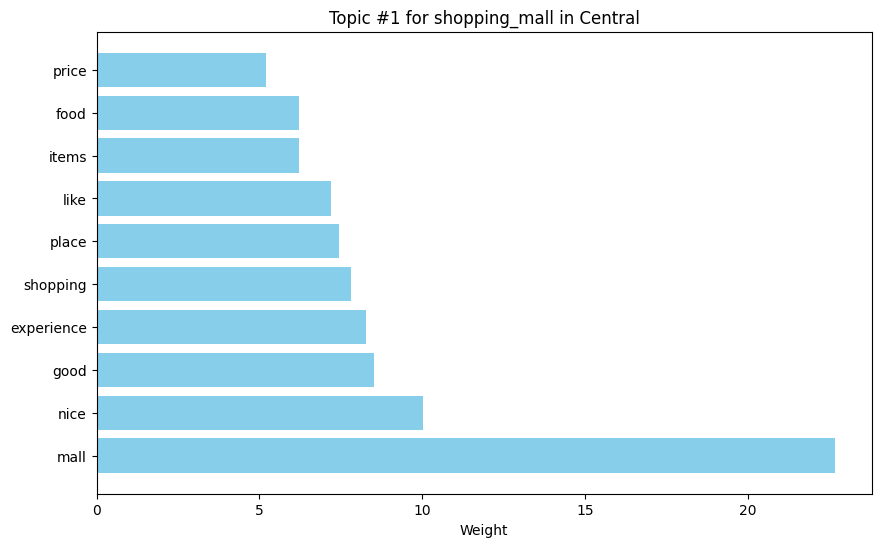


Topic #2:
['parking', 'available', 'nice', 'beautiful', 'big', 'area', 'shops', 'good', 'place', 'mall']


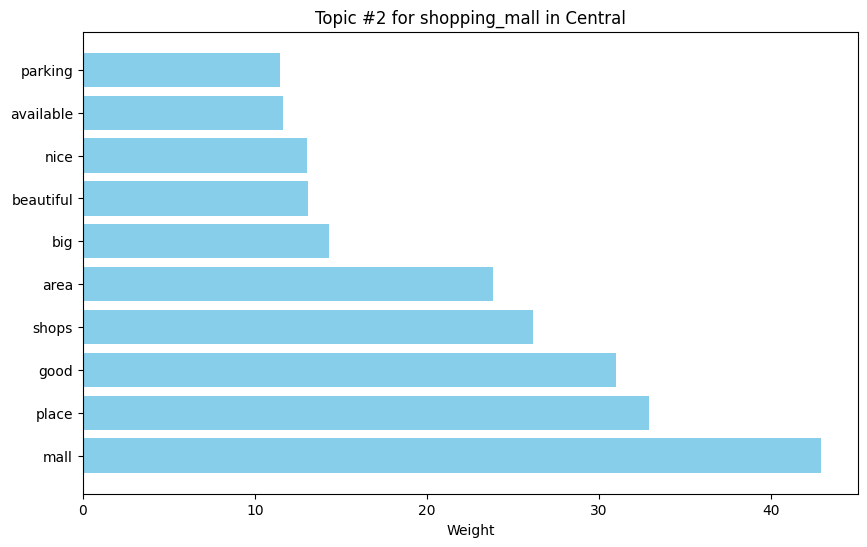


Topic #3:
['court', 'riyadh', 'lot', 'brands', 'parking', 'huge', 'shopping', 'shops', 'food', 'mall']


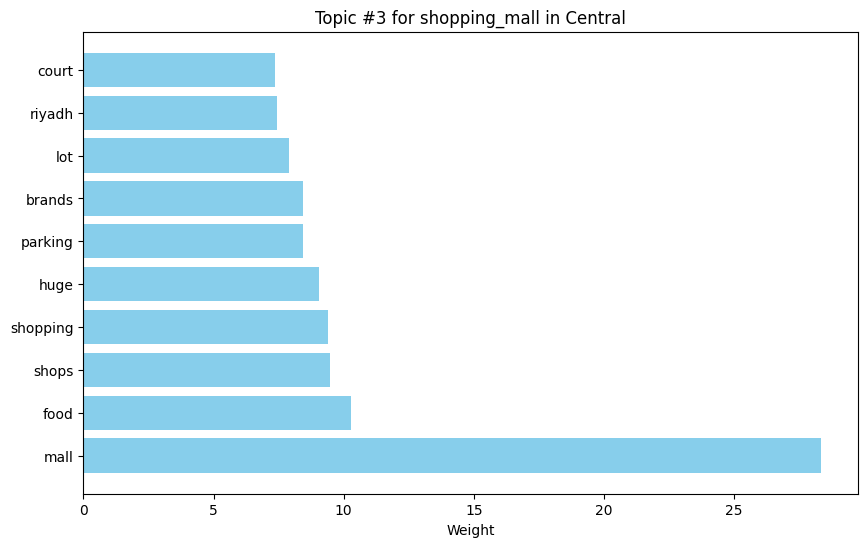


Topic #4:
['great', 'clean', 'place', 'riyadh', 'shopping', 'options', 'parking', 'good', 'mall', 'food']


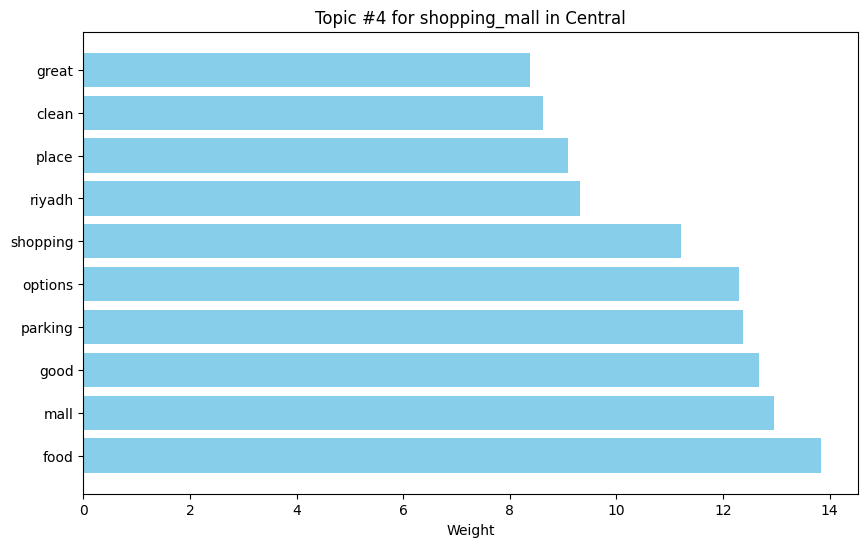


Topic #5:
['making', 'great', 'variety', 'entertainment', 'al', 'experience', 'dining', 'riyadh', 'shopping', 'mall']


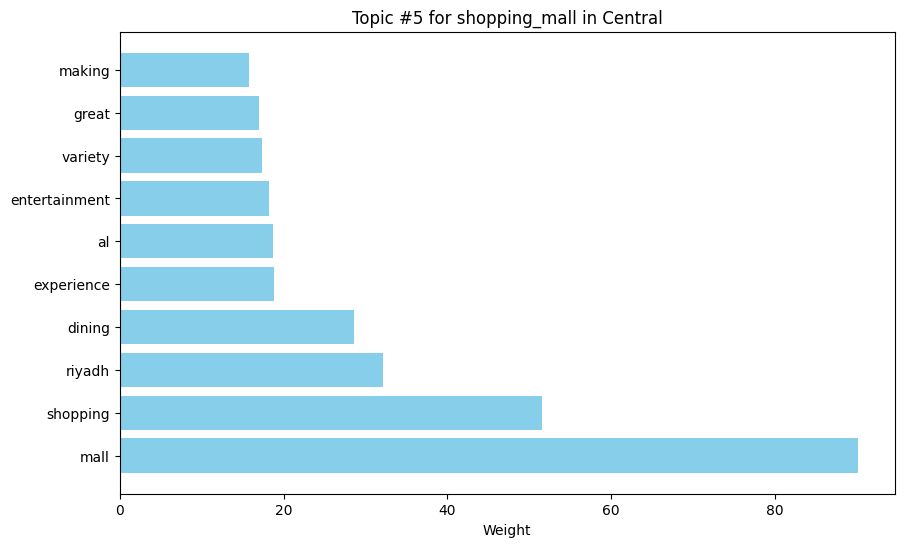


--- Topics for museum in Central ---

Topic #1:
['children', 'small', 'nice', 'city', 'great', 'buraidah', 'time', 'best', 'visit', 'place']


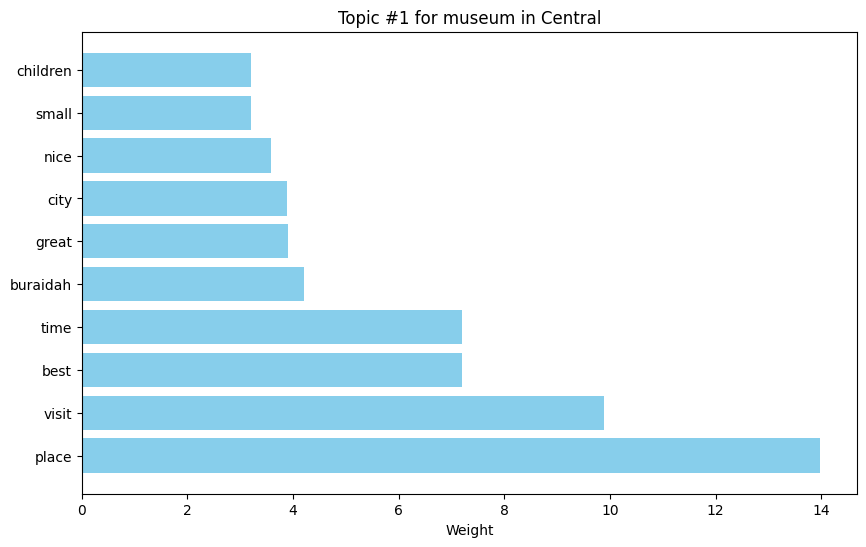


Topic #2:
['force', 'planes', 'visit', 'worth', 'gallery', 'great', 'aviation', 'art', 'place', 'museum']


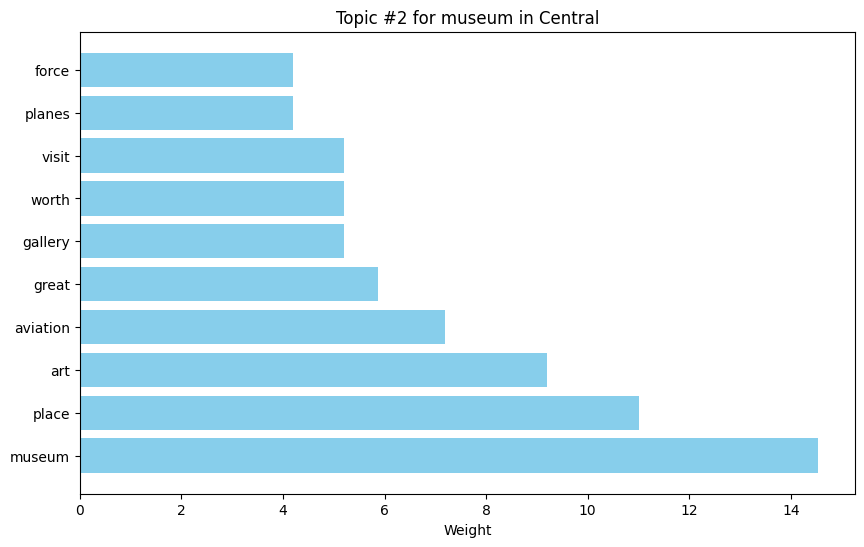


Topic #3:
['life', 'contains', 'children', 'old', 'visit', 'heritage', 'owner', 'beautiful', 'god', 'place']


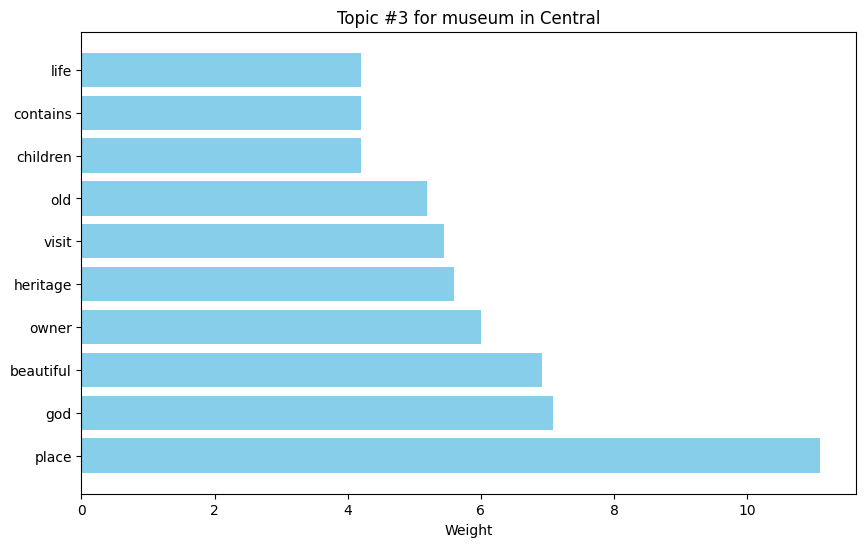


Topic #4:
['culture', 'maintained', 'tourist', 'center', 'market', 'family', 'buraidah', 'nice', 'good', 'museum']


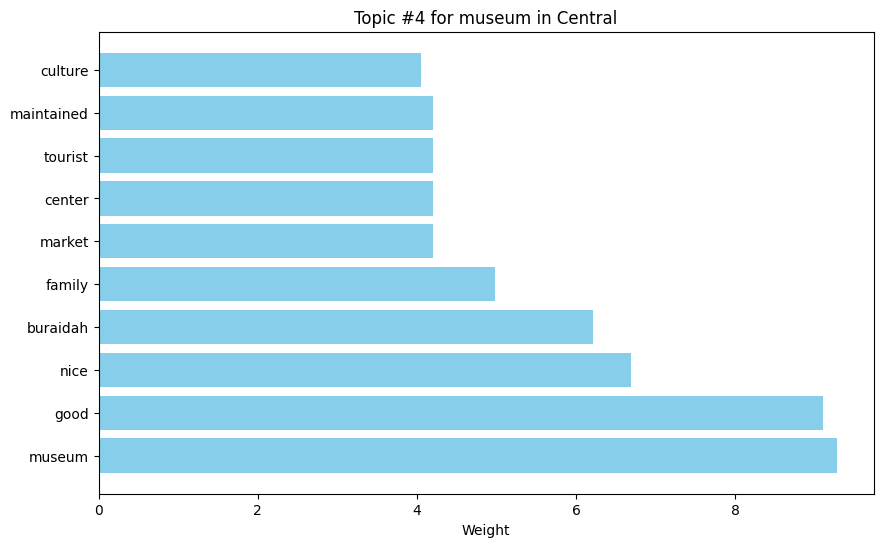


Topic #5:
['loved', 'camp', 'museum', 'old', 'visit', 'wonderful', 'saudi', 'place', 'history', 'beautiful']


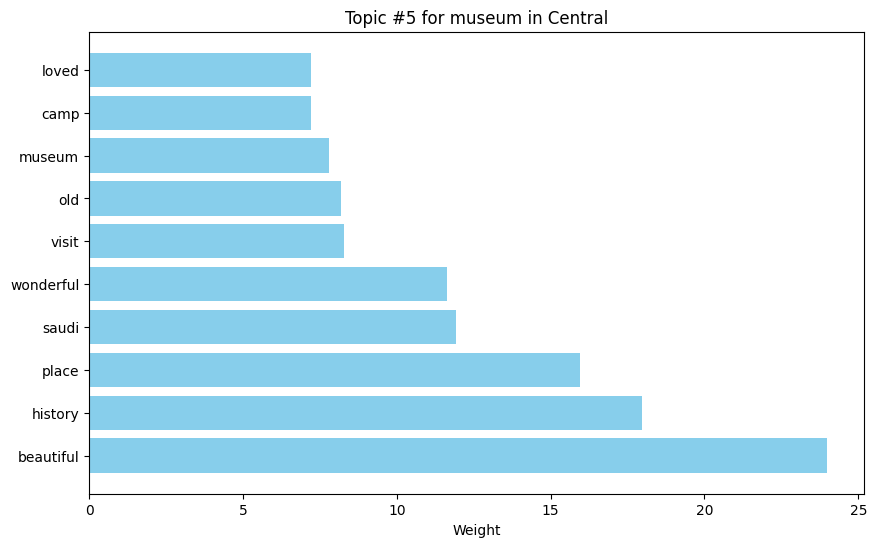


--- Topics for cafe in Central ---

Topic #1:
['excellent', 'cafe', 'cake', 'great', 'nice', 'service', 'staff', 'place', 'good', 'coffee']


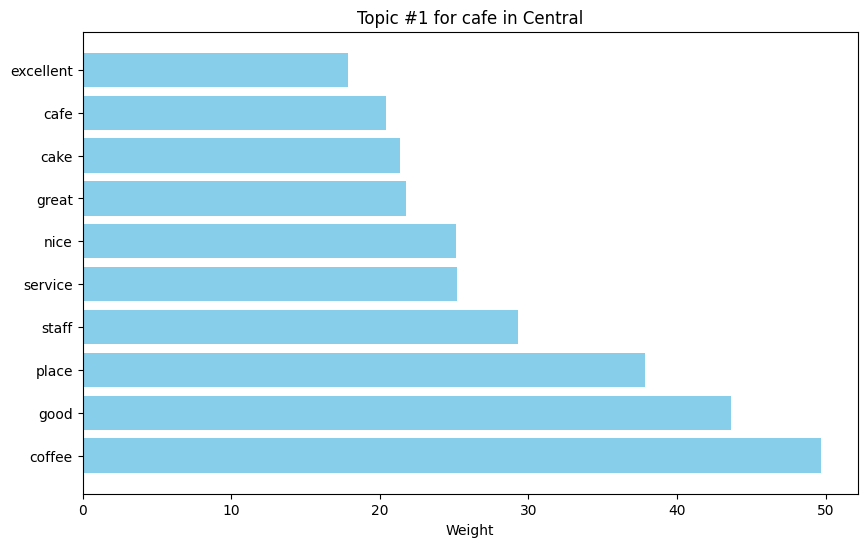


Topic #2:
['time', 'best', 'food', 'cafe', 'great', 'nice', 'staff', 'place', 'good', 'coffee']


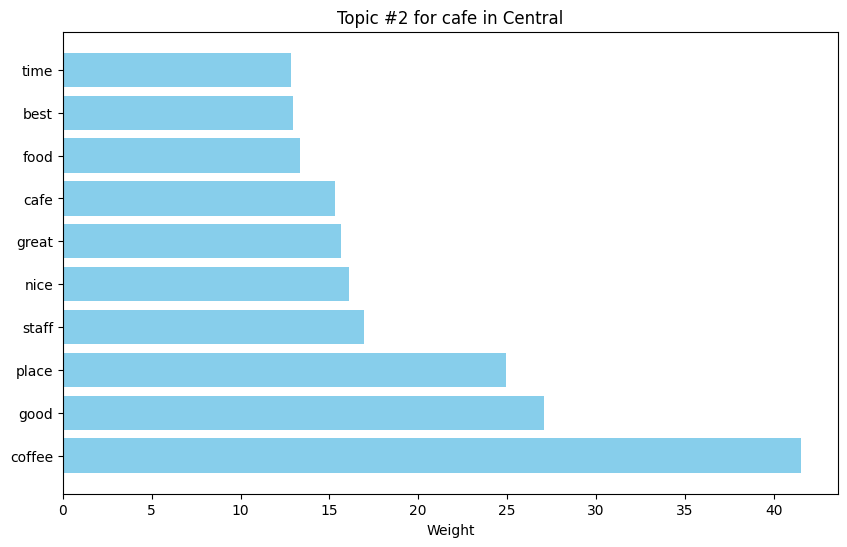


Topic #3:
['bad', 'café', 'hot', 'service', 'latte', 'taste', 'cup', 'delicious', 'amazing', 'coffee']


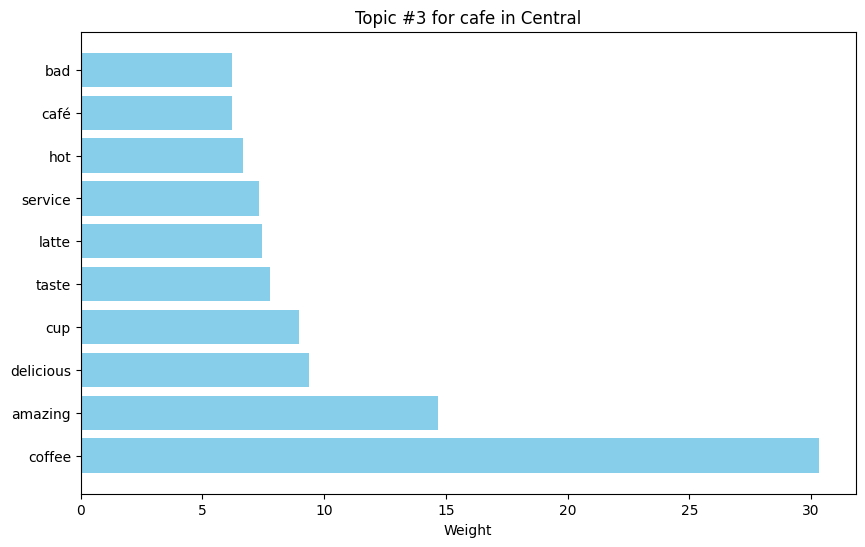


Topic #4:
['beautiful', 'visit', 'amazing', 'nice', 'great', 'service', 'delicious', 'good', 'place', 'coffee']


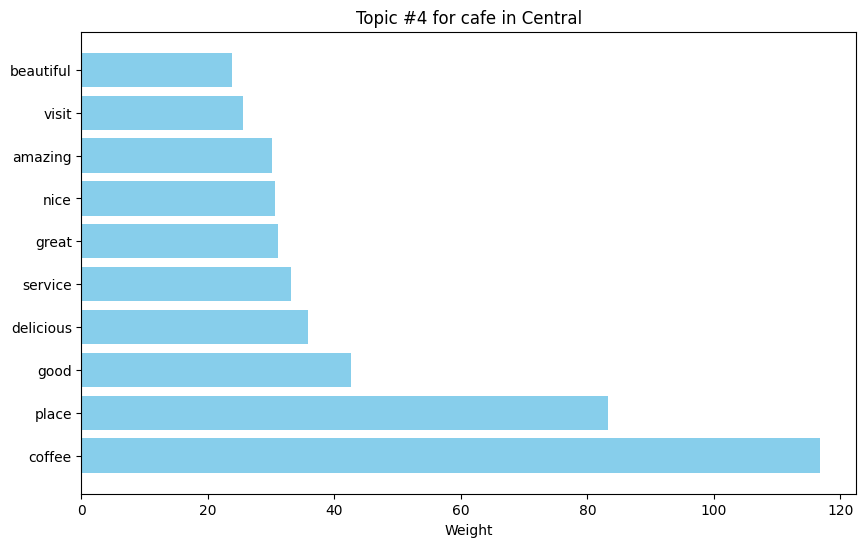


Topic #5:
['really', 'atmosphere', 'tried', 'nice', 'place', 'best', 'service', 'like', 'coffee', 'good']


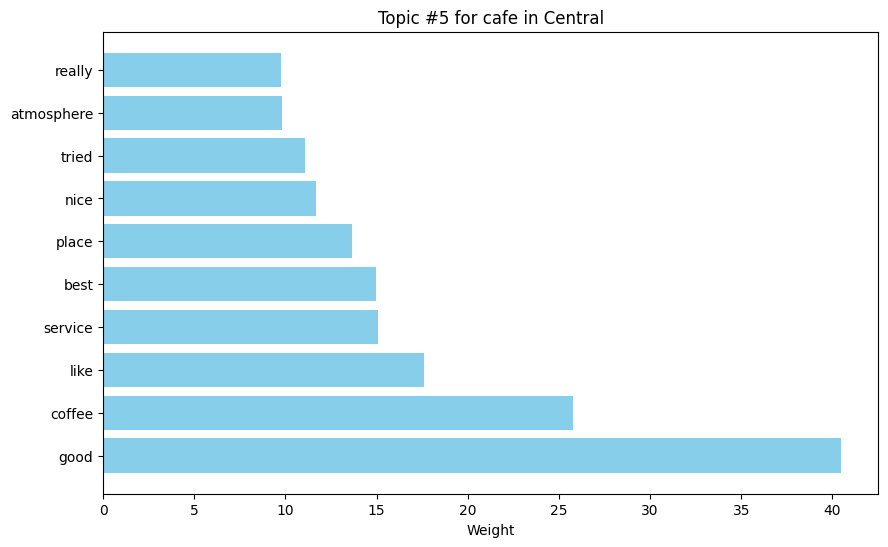


--- Topics for park in Central ---

Topic #1:
['mind', 'serene', 'place', 'walking', 'ideal', 'perfect', 'season', 'spot', 'riyadh', 'park']


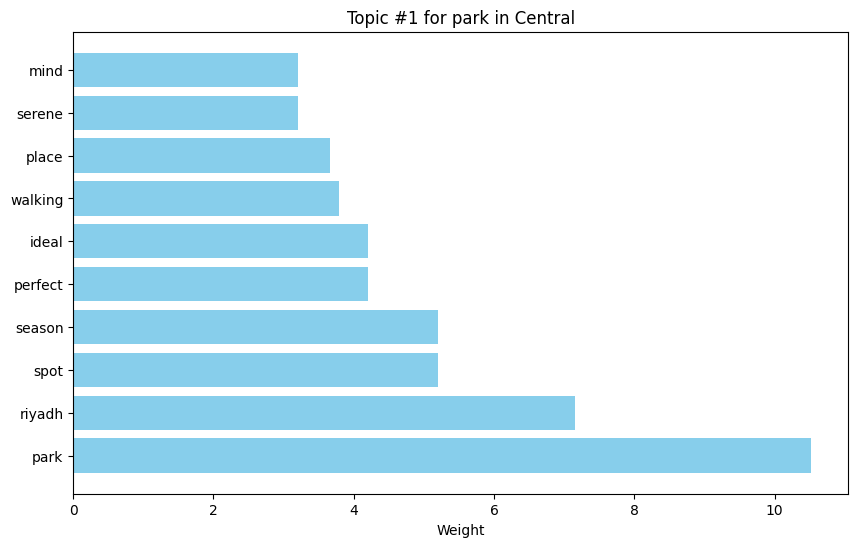


Topic #2:
['small', 'garden', 'family', 'area', 'park', 'clean', 'beautiful', 'nice', 'good', 'place']


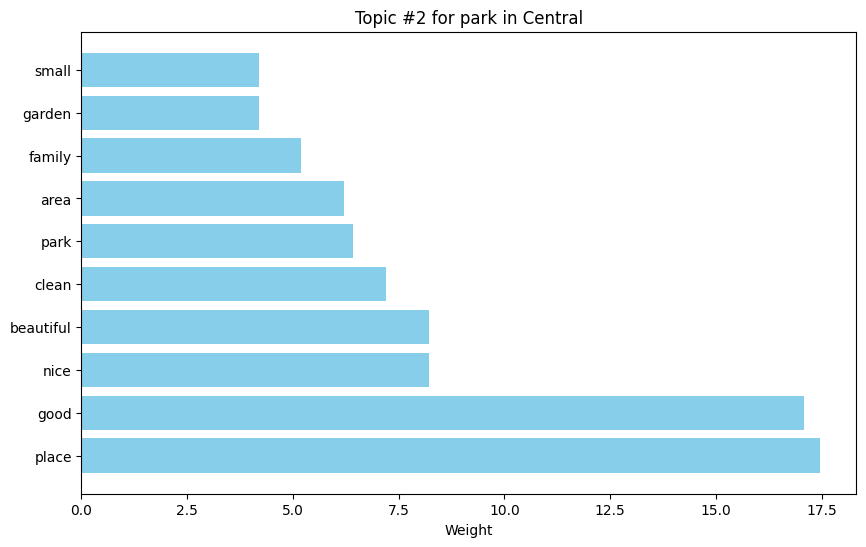


Topic #3:
['available', 'time', 'good', 'place', 'beautiful', 'kids', 'visited', 'area', 'family', 'park']


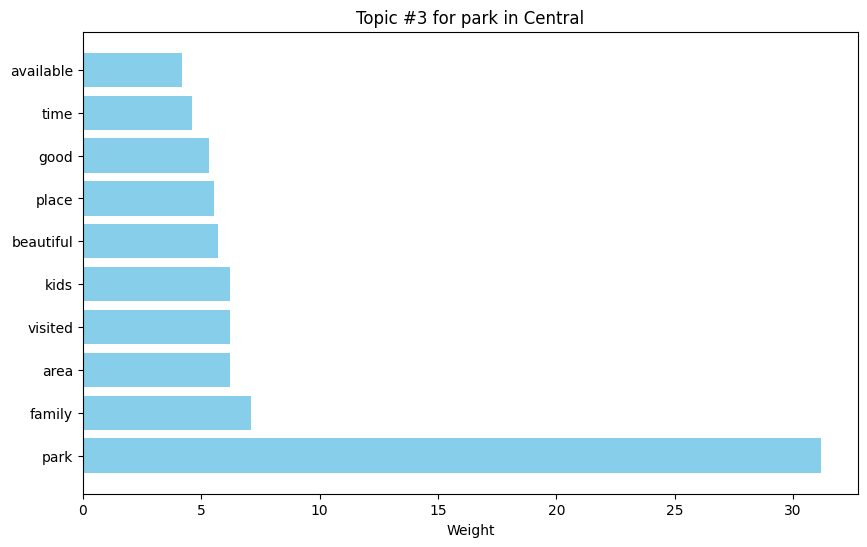


Topic #4:
['people', 'view', 'friends', 'time', 'beautiful', 'family', 'good', 'nice', 'park', 'place']


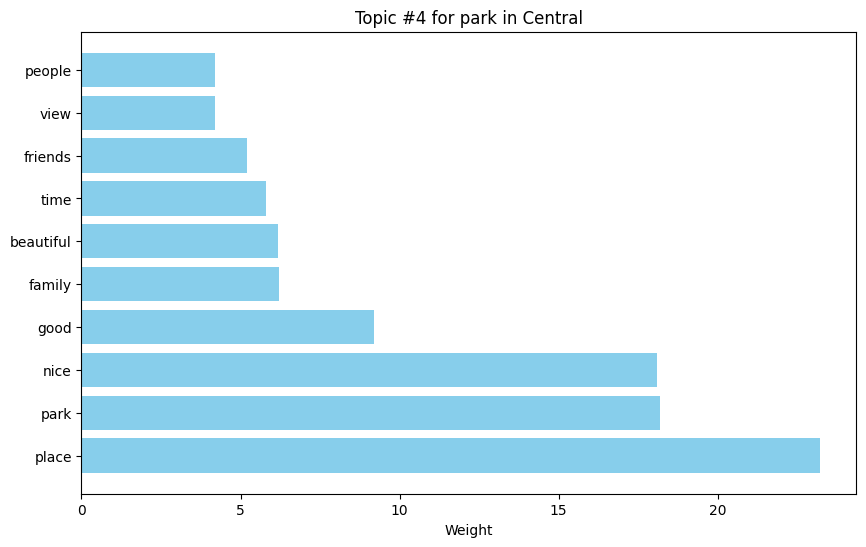


Topic #5:
['beautiful', 'picnic', 'city', 'sunset', 'walking', 'coffee', 'areas', 'enjoy', 'place', 'park']


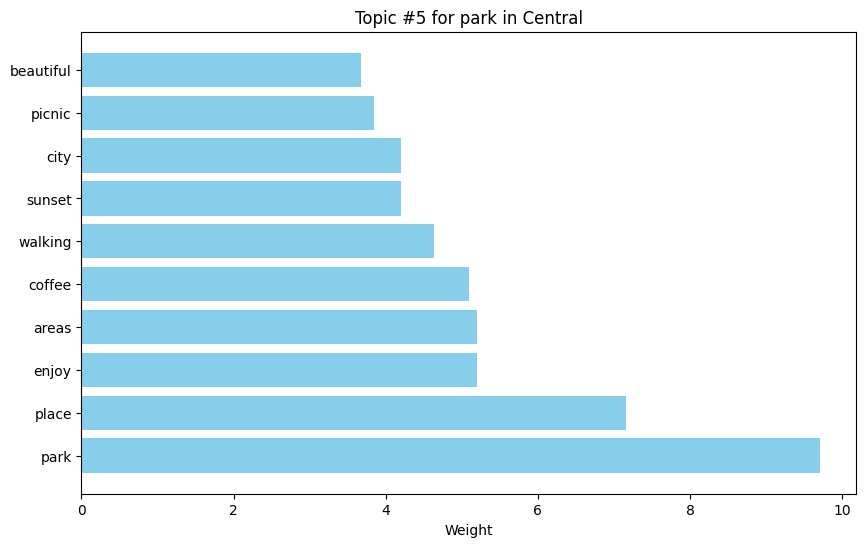


--- Topics for amusement_park in Central ---

Topic #1:
['staff', 'hours', 'like', 'time', 'kids', 'family', 'rides', 'experience', 'fun', 'snow']


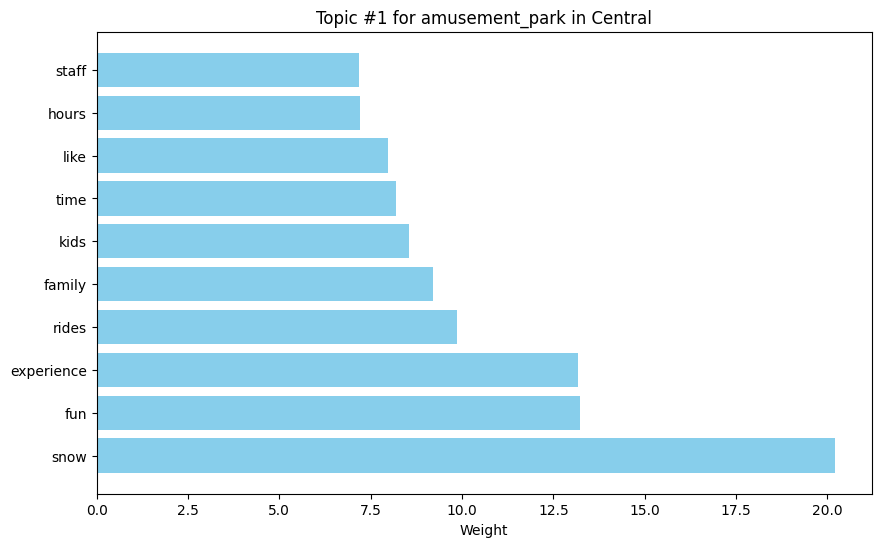


Topic #2:
['experience', 'enjoy', 'staff', 'world', 'children', 'rides', 'rooms', 'visit', 'place', 'games']


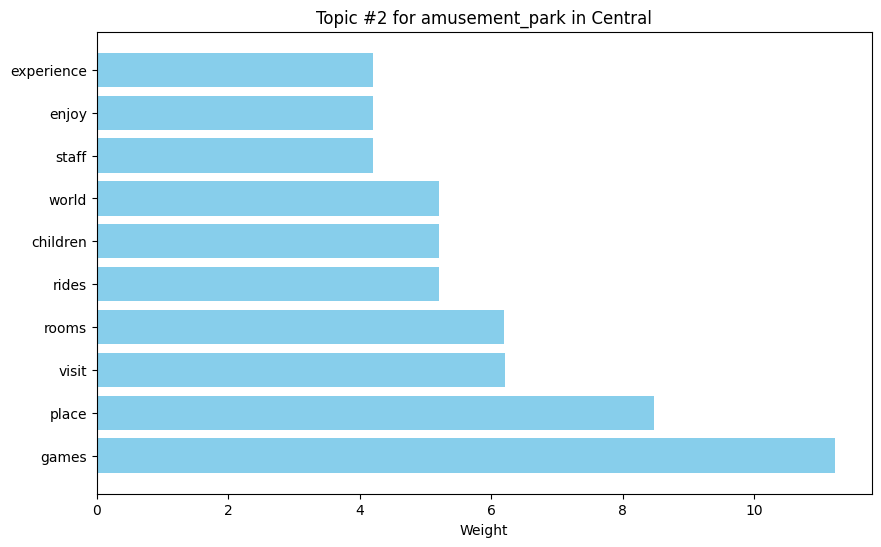


Topic #3:
['game', 'working', 'pay', 'like', 'worst', 'play', 'price', 'kids', 'money', 'place']


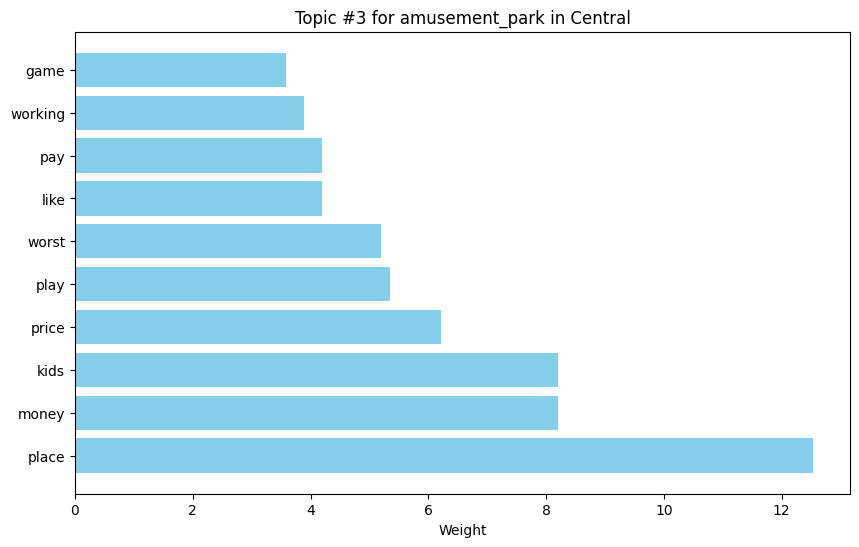


Topic #4:
['sar', 'experience', 'area', 'time', 'place', 'sr', 'good', 'rides', 'kids', 'games']


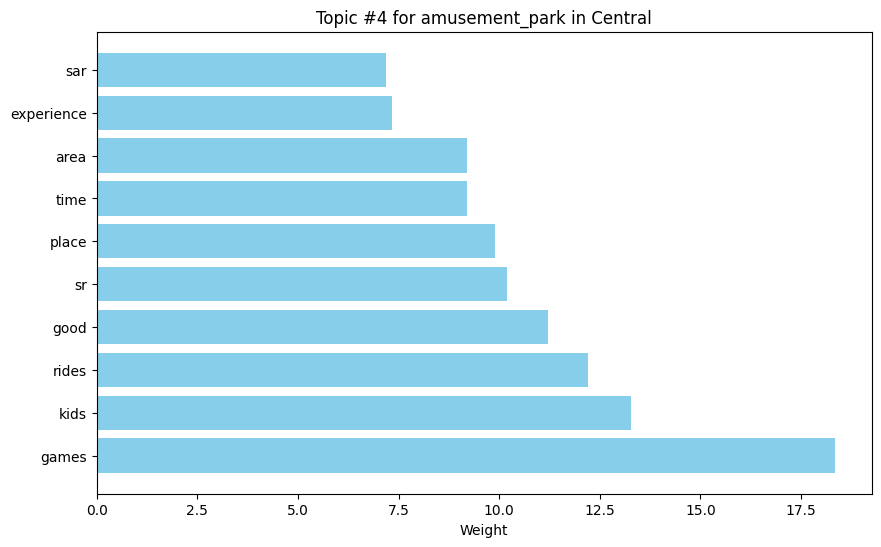


Topic #5:
['time', 'people', 'rides', 'experience', 'nice', 'play', 'good', 'place', 'games', 'kids']


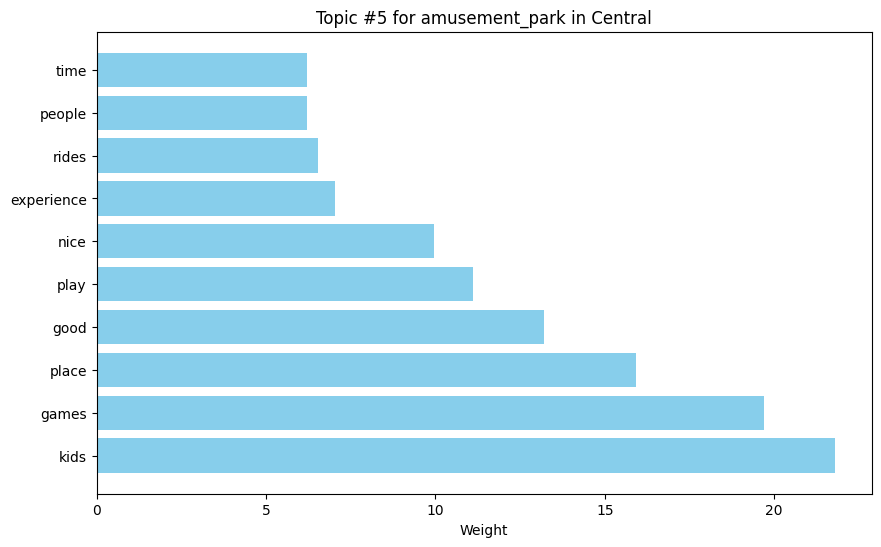


--- Topics for West ---

--- Topics for hotel in West ---

Topic #1:
['stay', 'booked', 'staff', 'service', 'reception', 'experience', 'rooms', 'bad', 'room', 'hotel']


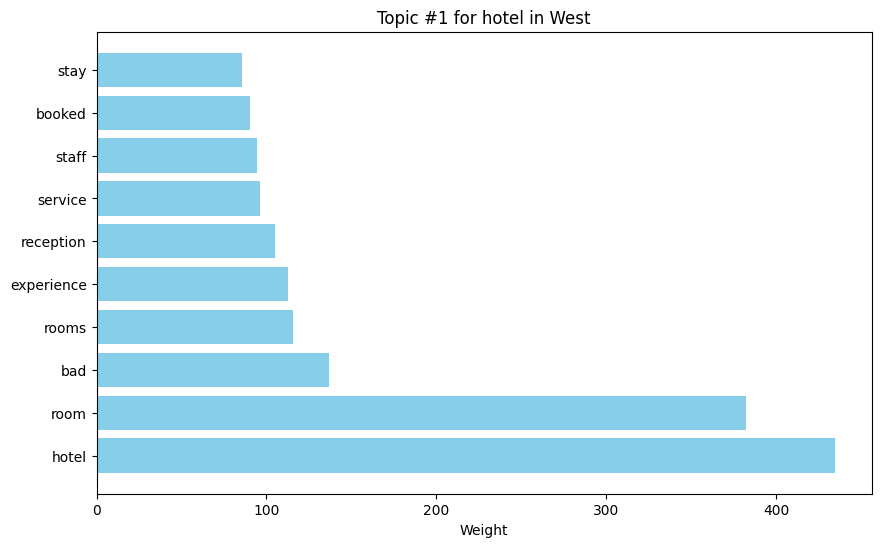


Topic #2:
['clean', 'apartment', 'water', 'bathroom', 'experience', 'staff', 'service', 'stay', 'room', 'hotel']


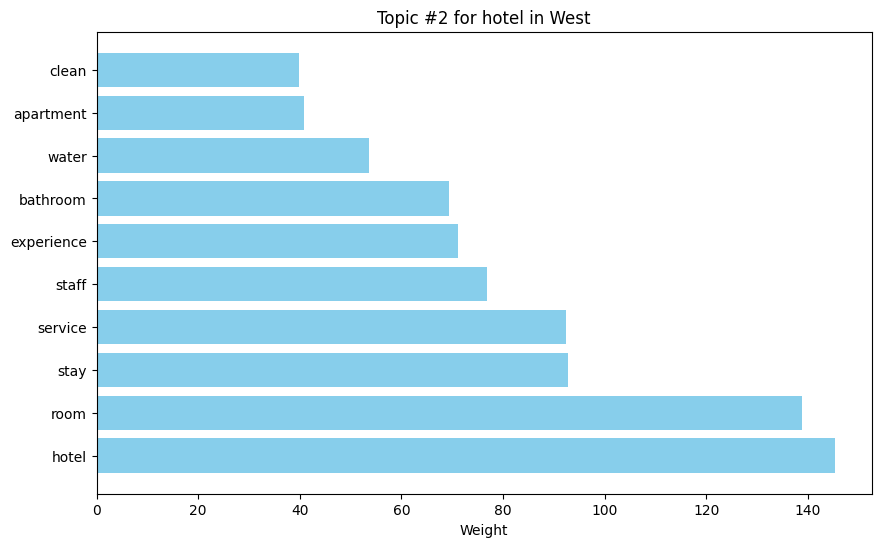


Topic #3:
['friendly', 'excellent', 'good', 'experience', 'clean', 'great', 'service', 'staff', 'stay', 'hotel']


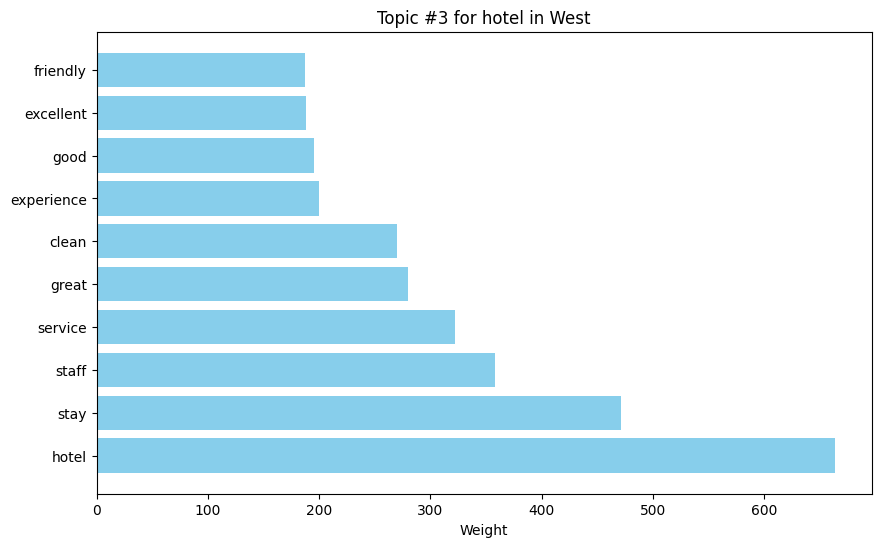


Topic #4:
['need', 'toilet', 'rooms', 'water', 'old', 'really', 'place', 'clean', 'nice', 'room']


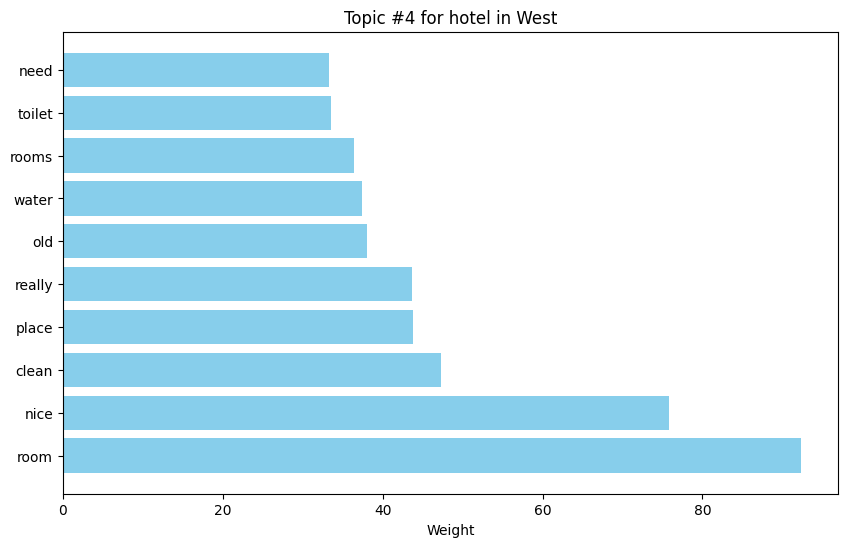


Topic #5:
['price', 'near', 'nice', 'room', 'service', 'location', 'clean', 'rooms', 'hotel', 'good']


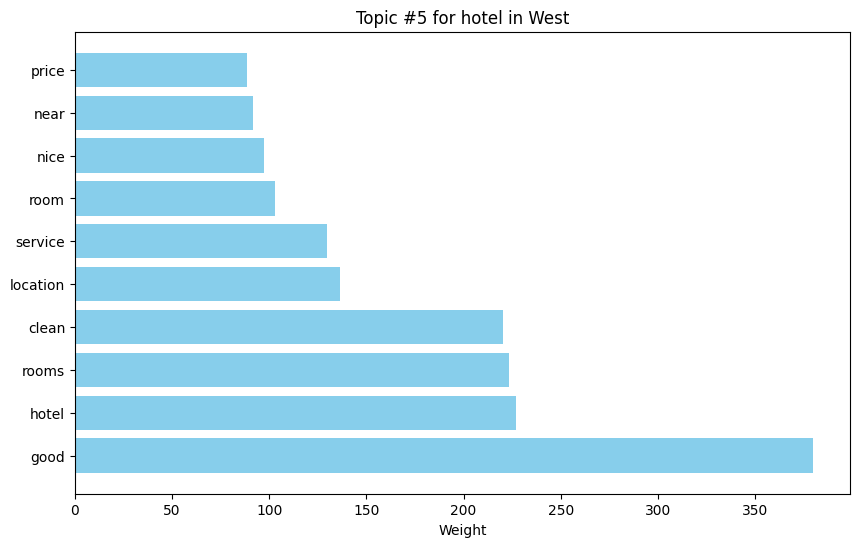


--- Topics for restaurant in West ---

Topic #1:
['coffee', 'place', 'experience', 'really', 'good', 'service', 'chicken', 'food', 'nice', 'restaurant']


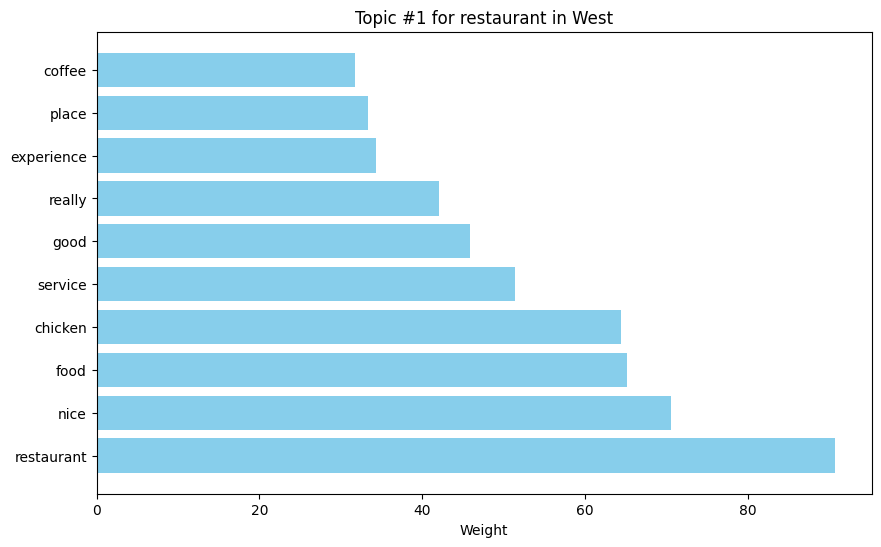


Topic #2:
['nice', 'amazing', 'staff', 'delicious', 'place', 'restaurant', 'good', 'great', 'service', 'food']


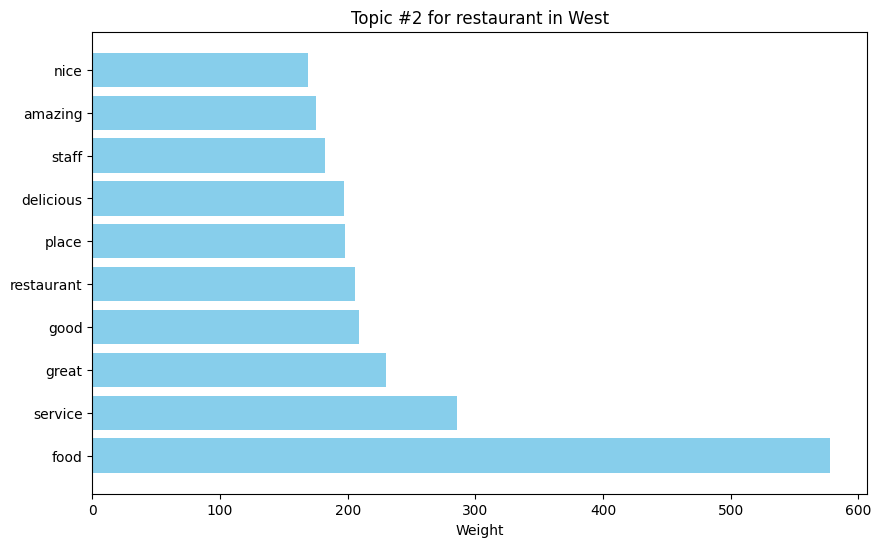


Topic #3:
['like', 'service', 'tasty', 'chicken', 'restaurant', 'best', 'place', 'taste', 'good', 'food']


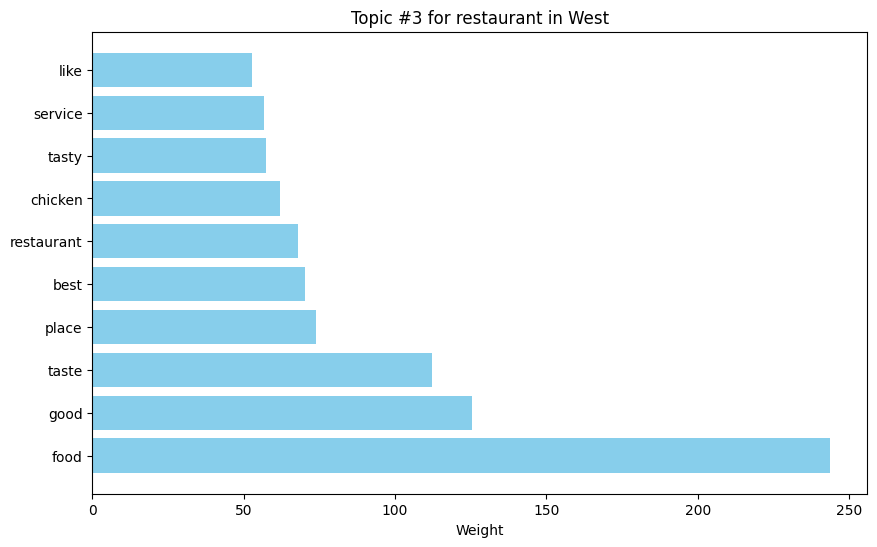


Topic #4:
['experience', 'taste', 'bad', 'rice', 'quality', 'chicken', 'service', 'restaurant', 'food', 'good']


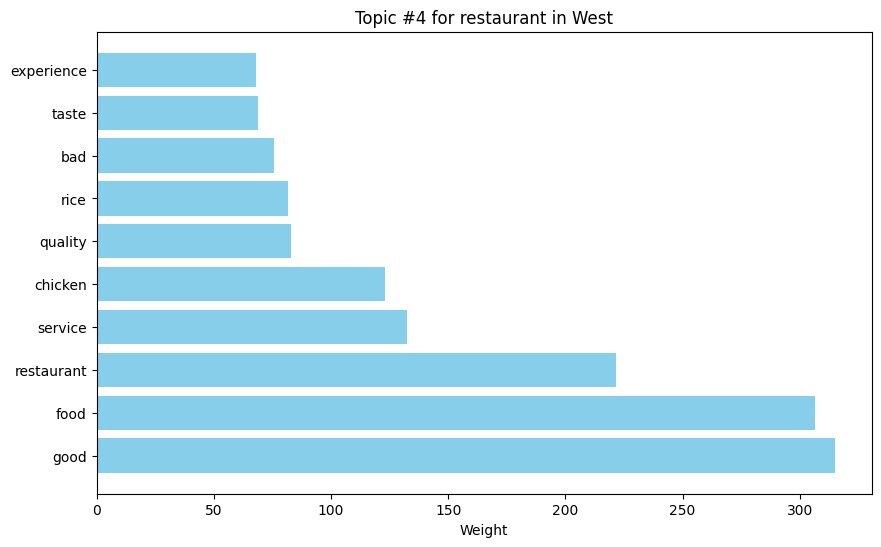


Topic #5:
['recommend', 'staff', 'highly', 'place', 'food', 'delicious', 'dining', 'service', 'restaurant', 'experience']


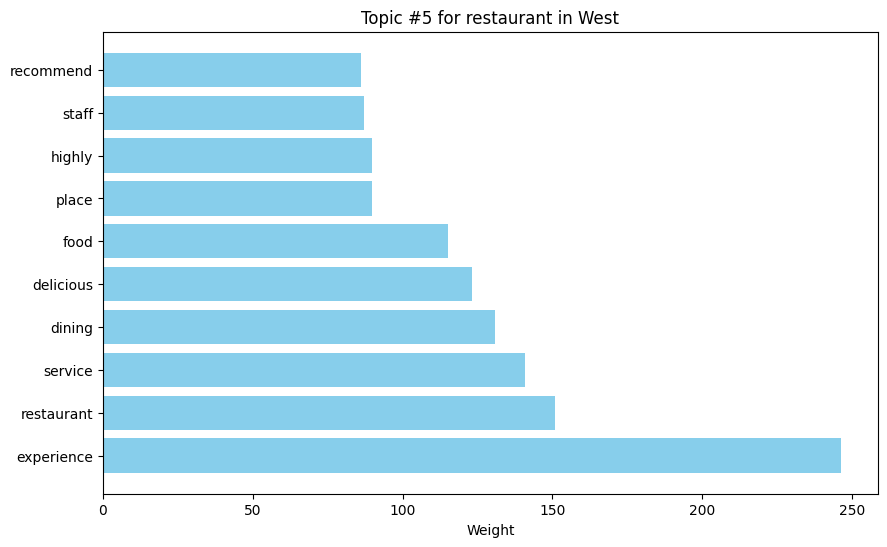


--- Topics for tourist_attraction in West ---

Topic #1:
['site', 'experience', 'located', 'masjid', 'area', 'like', 'beautiful', 'time', 'visit', 'prophet']


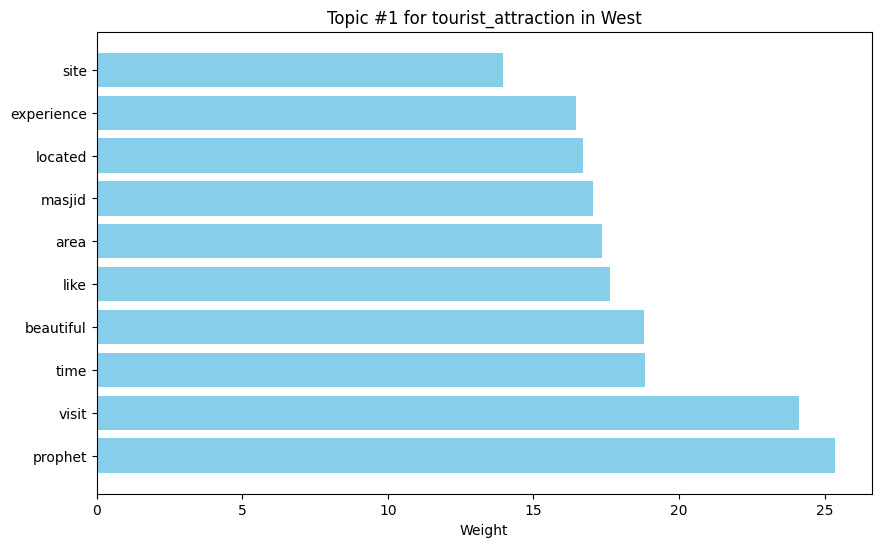


Topic #2:
['area', 'heritage', 'rich', 'traditional', 'yanbu', 'visit', 'old', 'experience', 'museum', 'history']


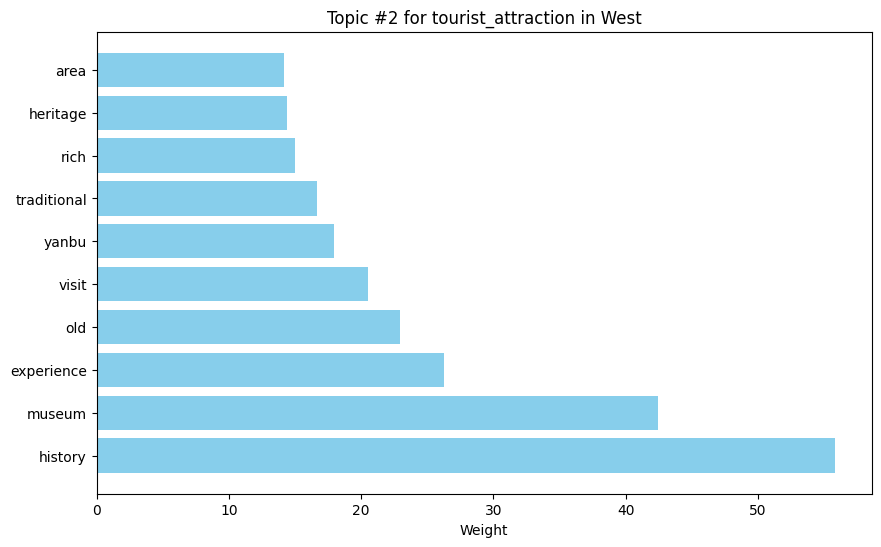


Topic #3:
['makkah', 'experience', 'madinah', 'visit', 'quba', 'prophet', 'allah', 'mosque', 'jeddah', 'place']


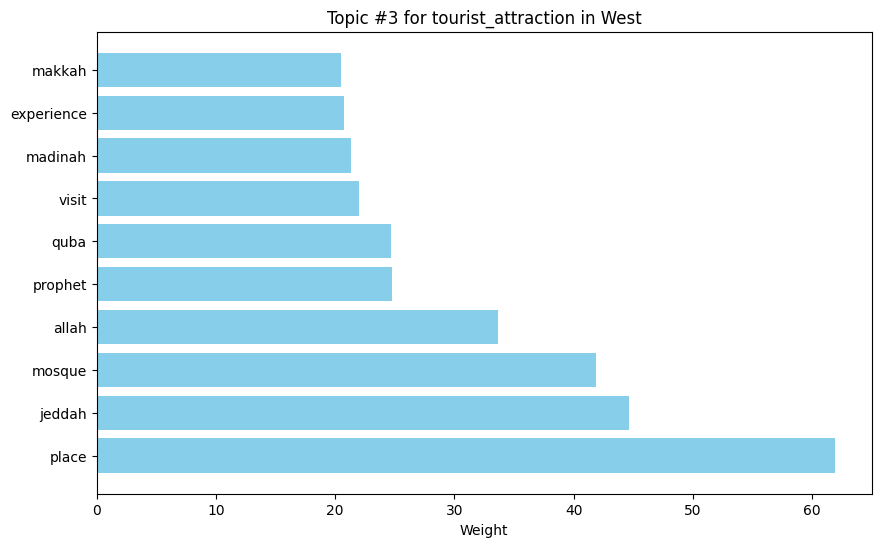


Topic #4:
['experience', 'nice', 'way', 'clean', 'visit', 'shops', 'food', 'available', 'park', 'place']


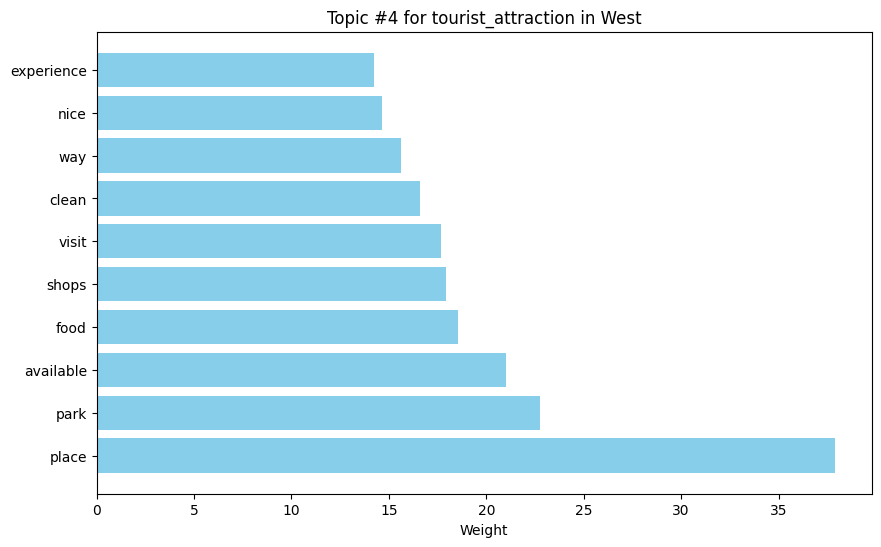


Topic #5:
['great', 'experience', 'kids', 'visit', 'time', 'nice', 'good', 'park', 'beautiful', 'place']


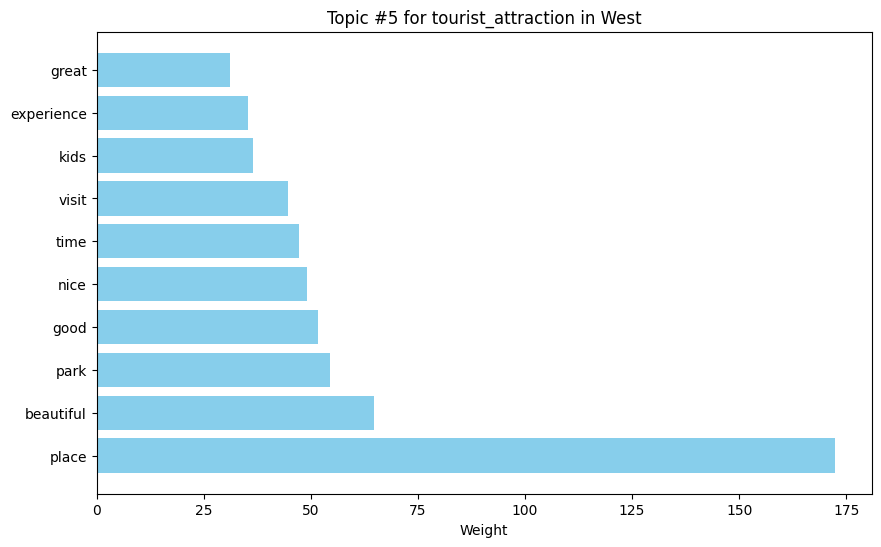


--- Topics for shopping_mall in West ---

Topic #1:
['court', 'mall', 'available', 'nice', 'store', 'best', 'place', 'good', 'shop', 'food']


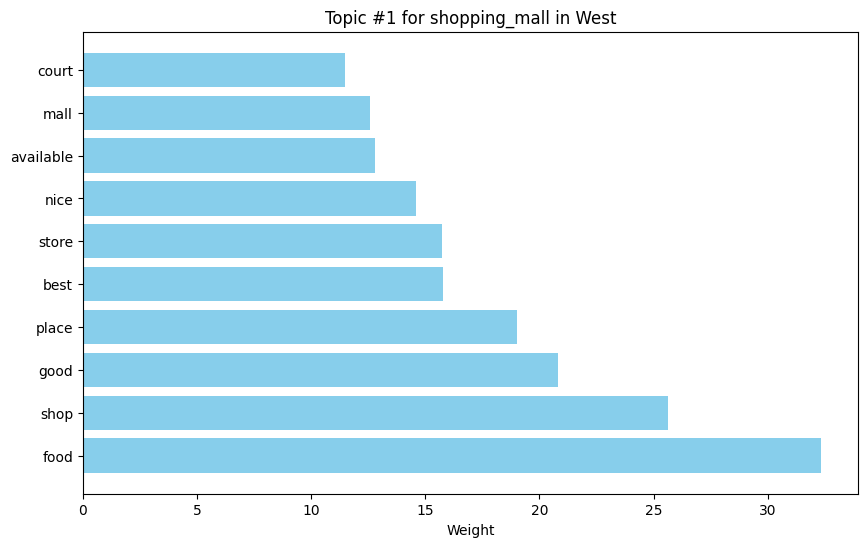


Topic #2:
['food', 'entertainment', 'good', 'great', 'options', 'variety', 'shops', 'experience', 'shopping', 'mall']


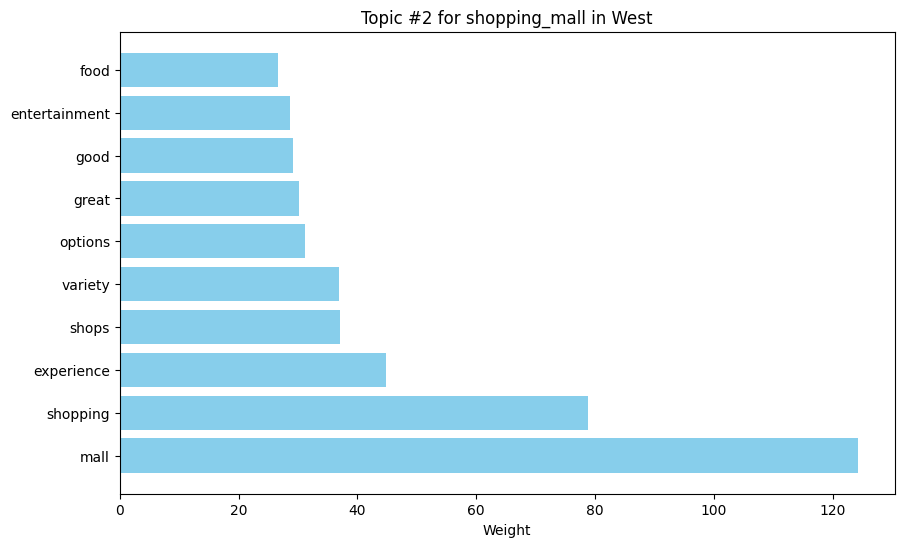


Topic #3:
['shopping', 'shops', 'available', 'quality', 'buy', 'price', 'place', 'prices', 'items', 'good']


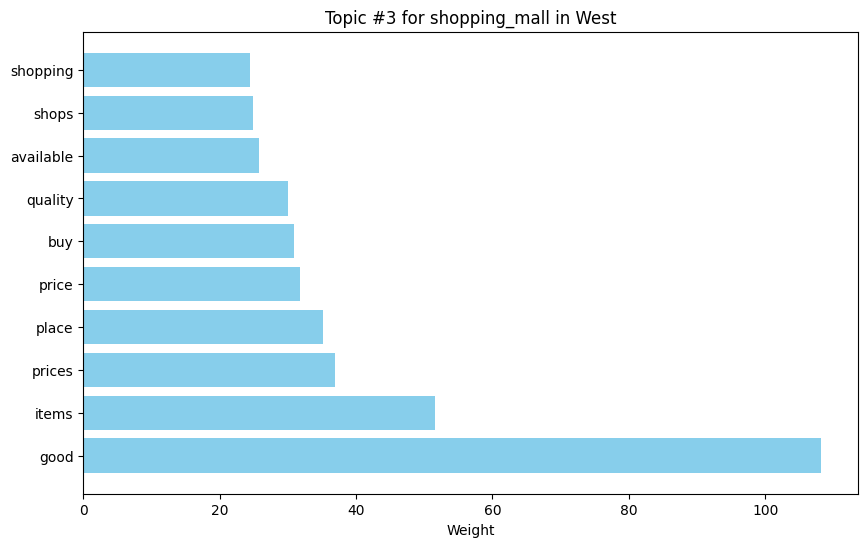


Topic #4:
['quality', 'center', 'prices', 'like', 'shops', 'nice', 'shopping', 'beautiful', 'place', 'mall']


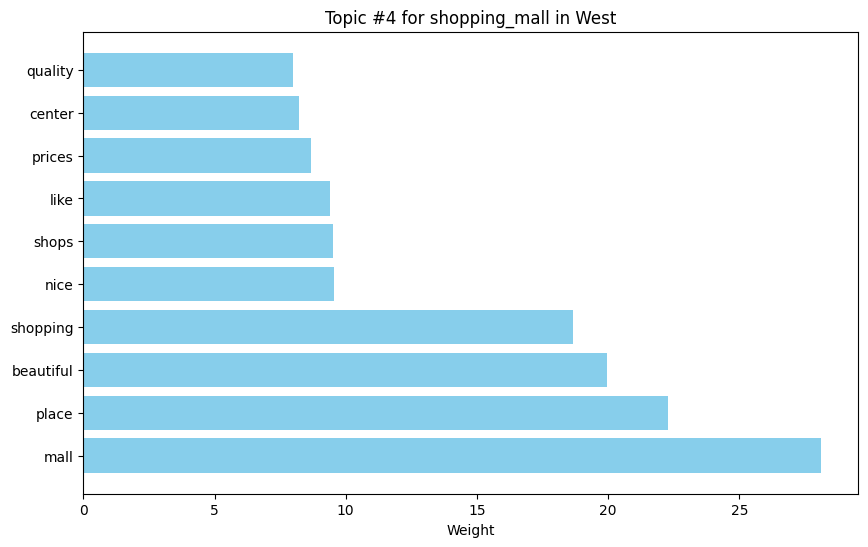


Topic #5:
['good', 'court', 'like', 'shops', 'nice', 'food', 'brands', 'shopping', 'place', 'mall']


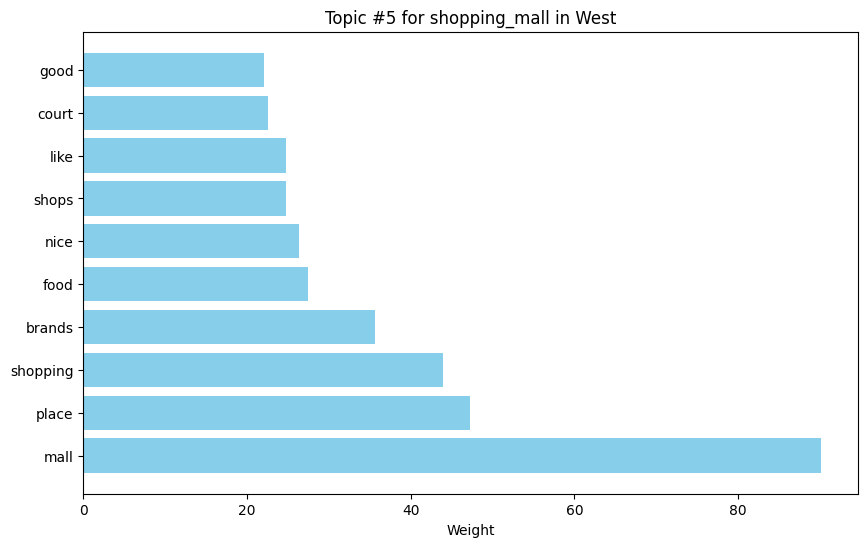


--- Topics for museum in West ---

Topic #1:
['awesome', 'closed', 'like', 'great', 'world', 'know', 'visit', 'museum', 'good', 'place']


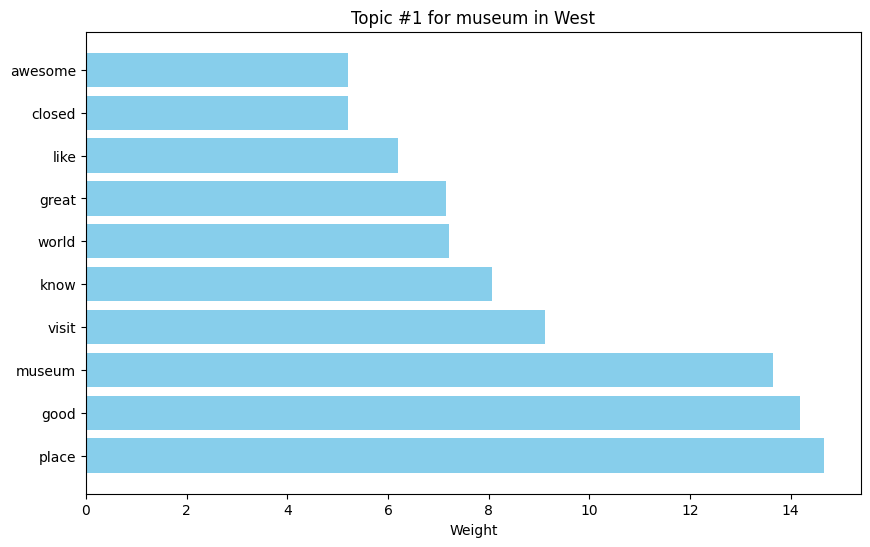


Topic #2:
['quran', 'amazing', 'culture', 'arab', 'great', 'time', 'history', 'place', 'museum', 'visit']


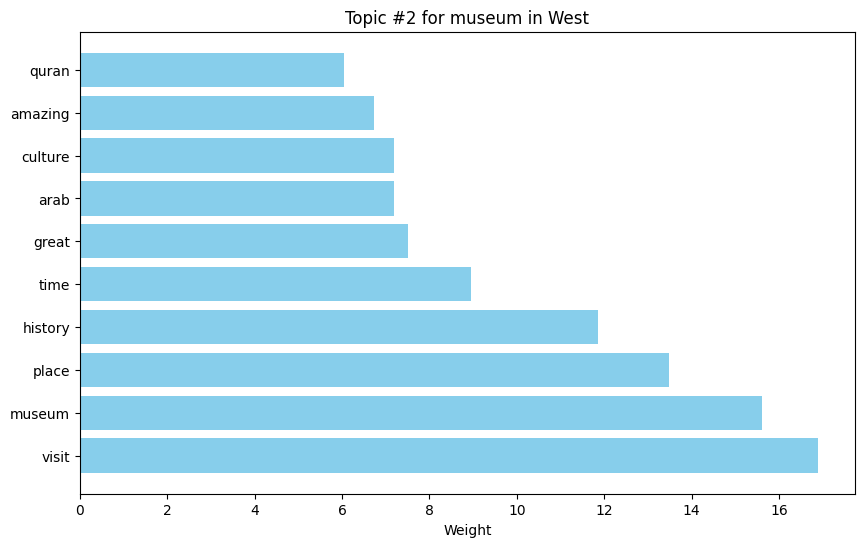


Topic #3:
['old', 'beautiful', 'prophet', 'gallery', 'artist', 'jeddah', 'life', 'saudi', 'experience', 'museum']


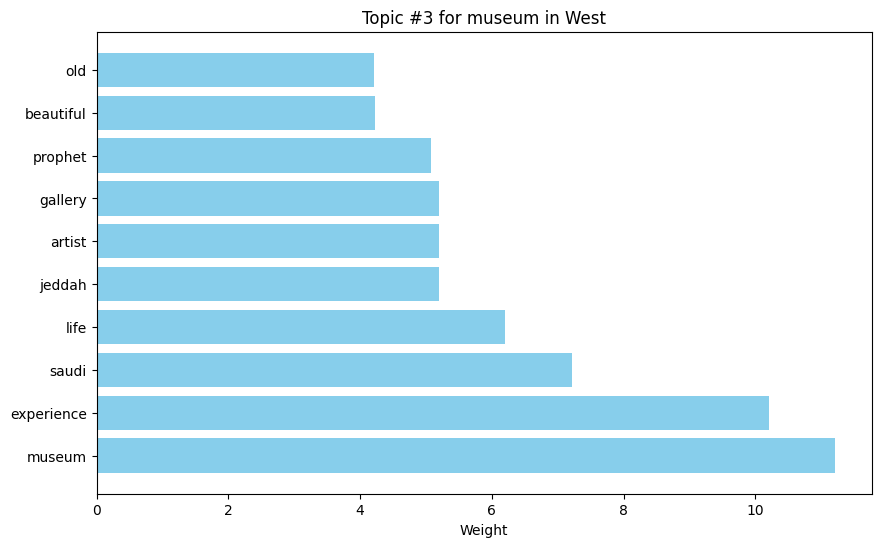


Topic #4:
['muhammad', 'experience', 'good', 'hira', 'cave', 'place', 'prophet', 'history', 'visitors', 'museum']


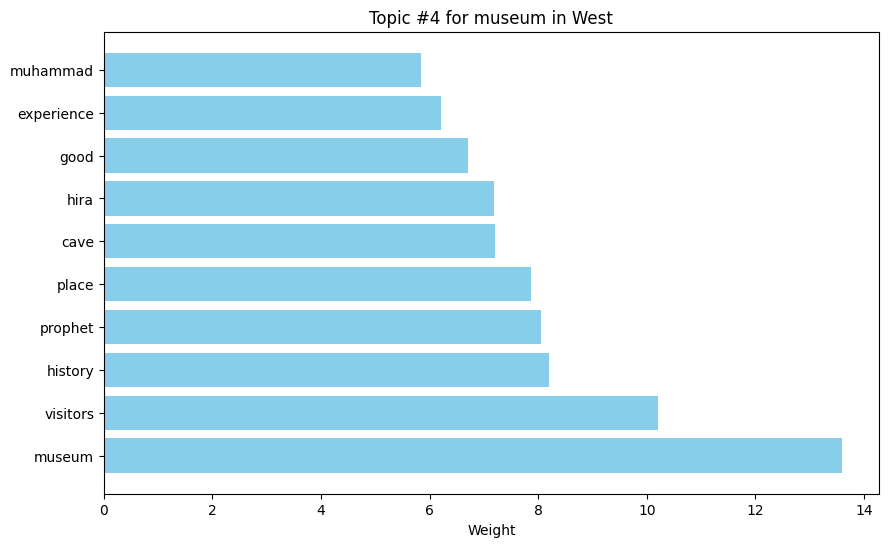


Topic #5:
['good', 'history', 'nice', 'arabia', 'al', 'entrance', 'saudi', 'place', 'tour', 'museum']


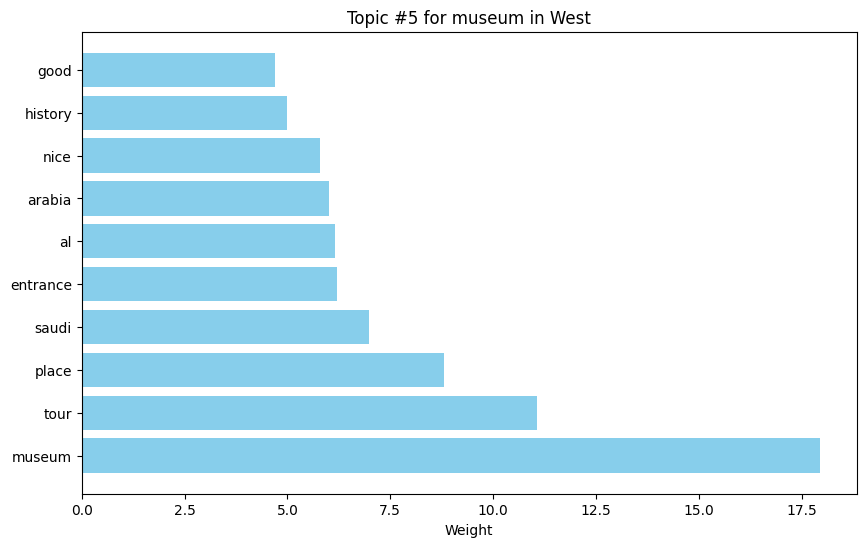


--- Topics for cafe in West ---

Topic #1:
['like', 'friendly', 'staff', 'cafe', 'place', 'service', 'nice', 'best', 'coffee', 'good']


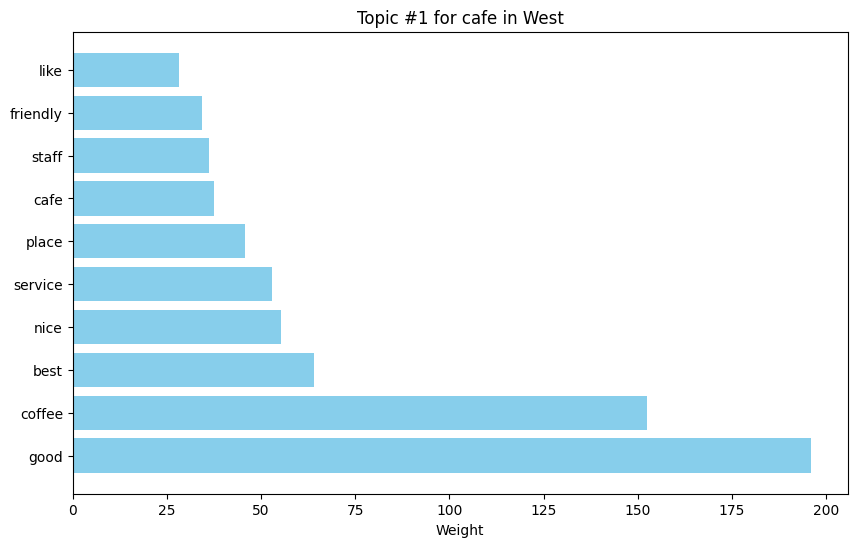


Topic #2:
['taste', 'ordered', 'overall', 'ambiance', 'place', 'good', 'experience', 'service', 'food', 'cafe']


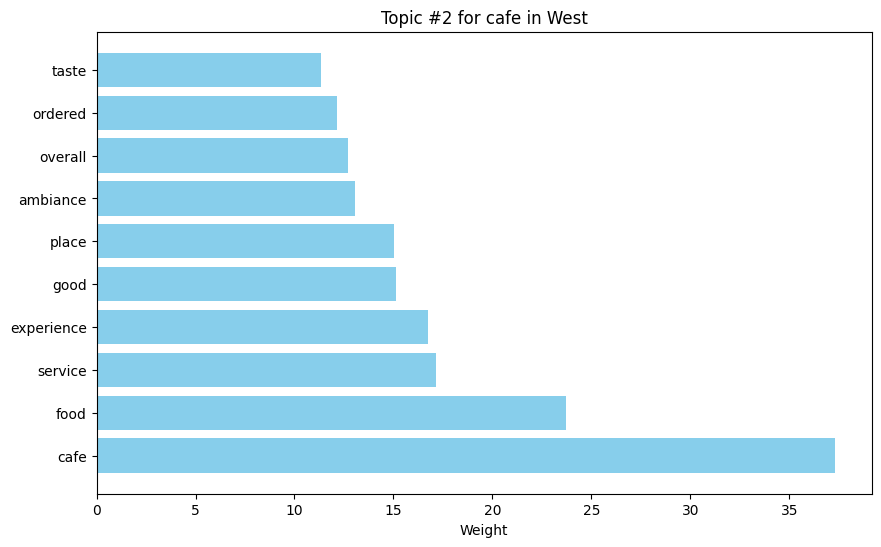


Topic #3:
['service', 'best', 'amazing', 'staff', 'nice', 'cafe', 'good', 'great', 'coffee', 'place']


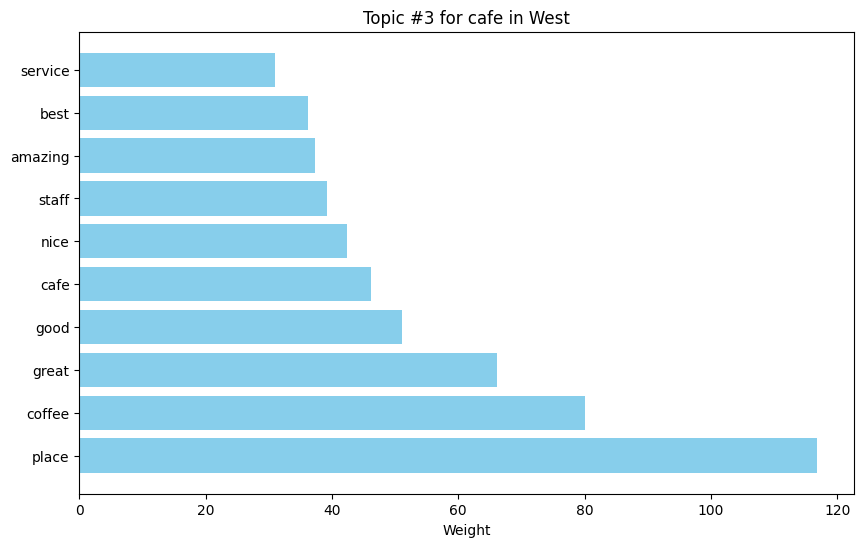


Topic #4:
['nice', 'delicious', 'like', 'food', 'experience', 'excellent', 'service', 'great', 'place', 'coffee']


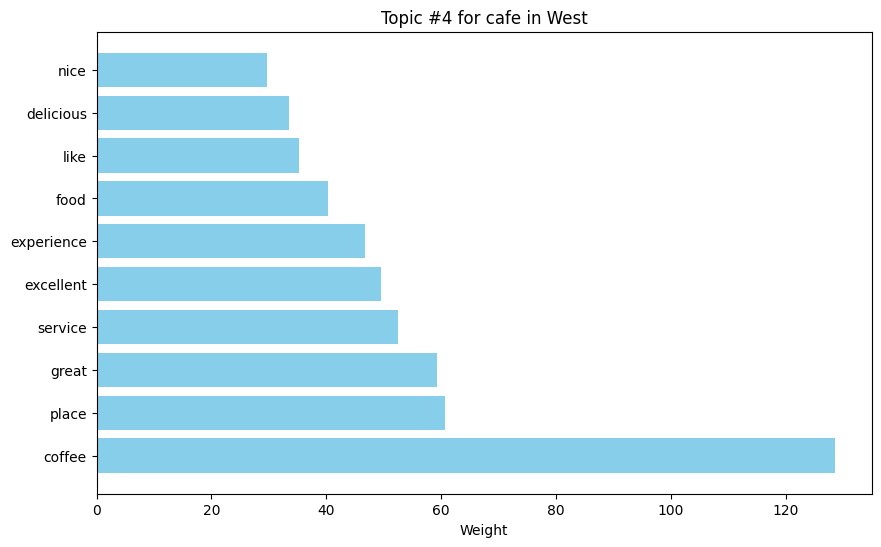


Topic #5:
['taste', 'latte', 'atmosphere', 'good', 'cake', 'great', 'staff', 'nice', 'place', 'coffee']


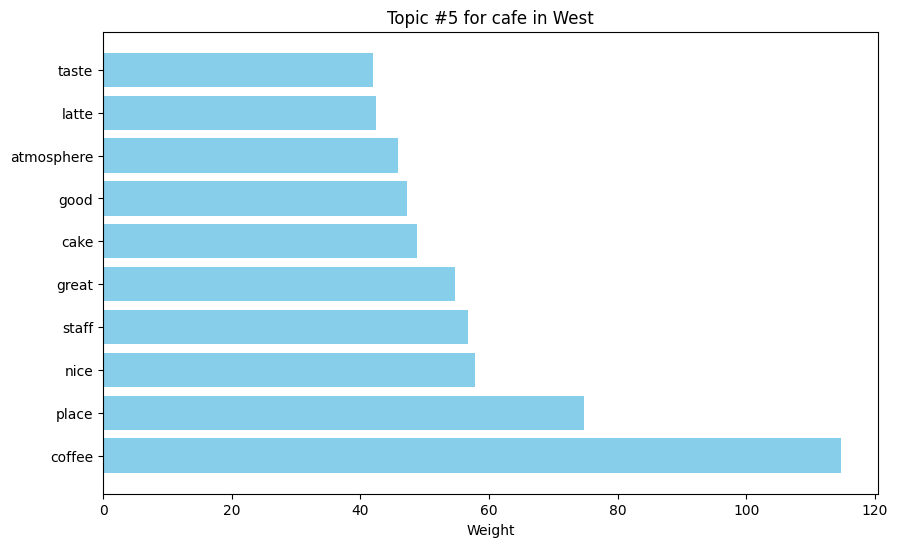


--- Topics for park in West ---

Topic #1:
['best', 'walk', 'great', 'visit', 'enjoy', 'nice', 'good', 'kids', 'park', 'place']


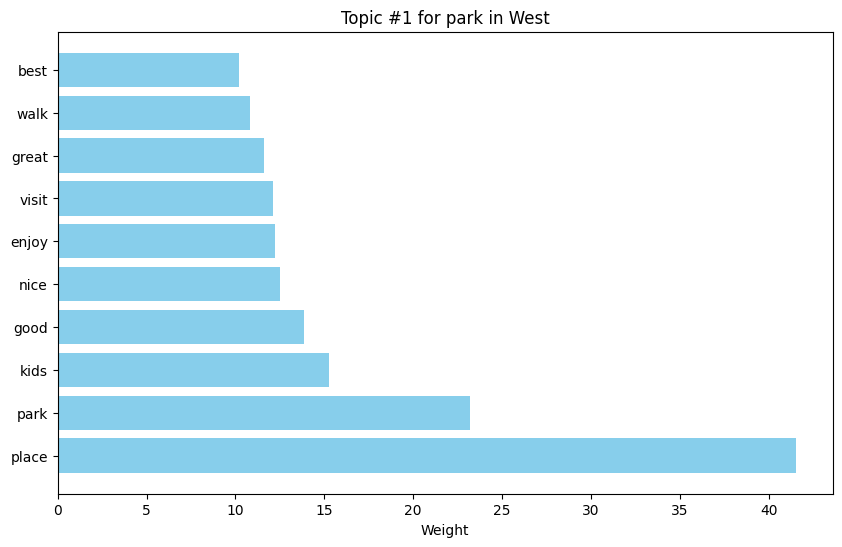


Topic #2:
['beautiful', 'walking', 'great', 'play', 'good', 'public', 'nice', 'area', 'kids', 'park']


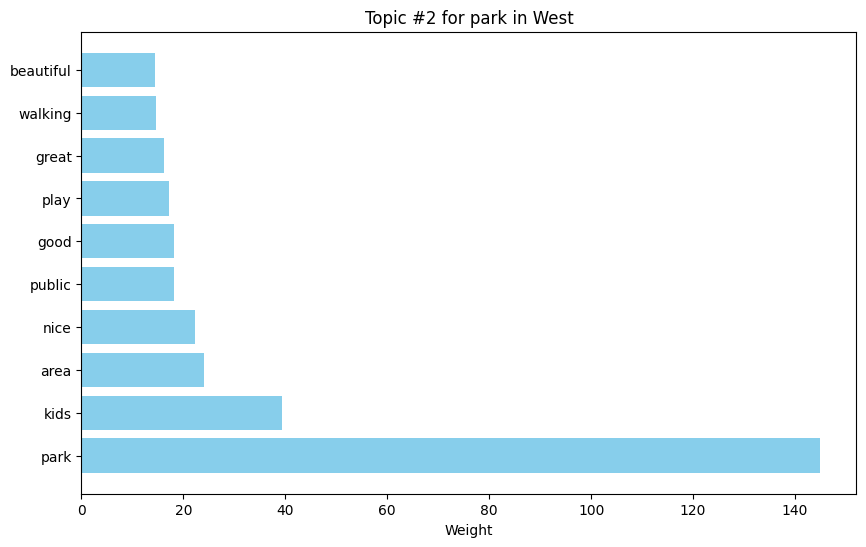


Topic #3:
['view', 'snacks', 'picnic', 'time', 'enjoy', 'areas', 'near', 'beautiful', 'nice', 'place']


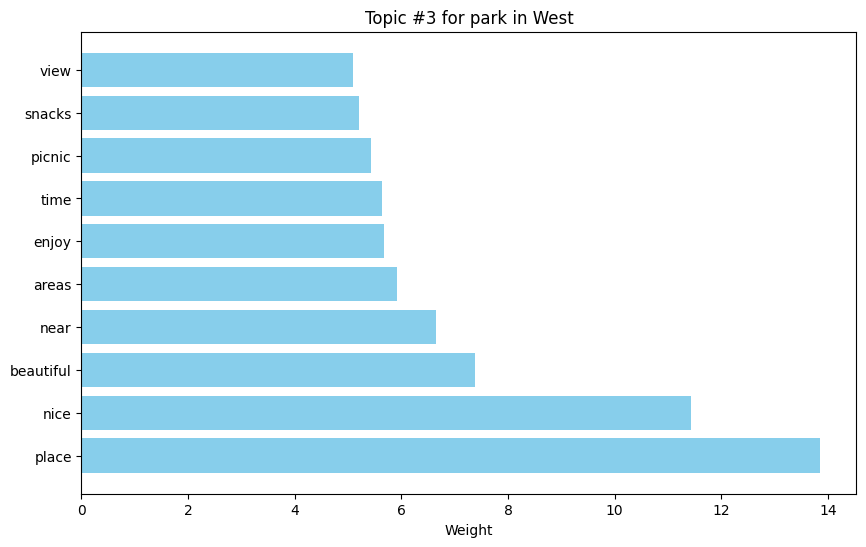


Topic #4:
['kids', 'clean', 'good', 'really', 'area', 'sar', 'beautiful', 'family', 'rides', 'place']


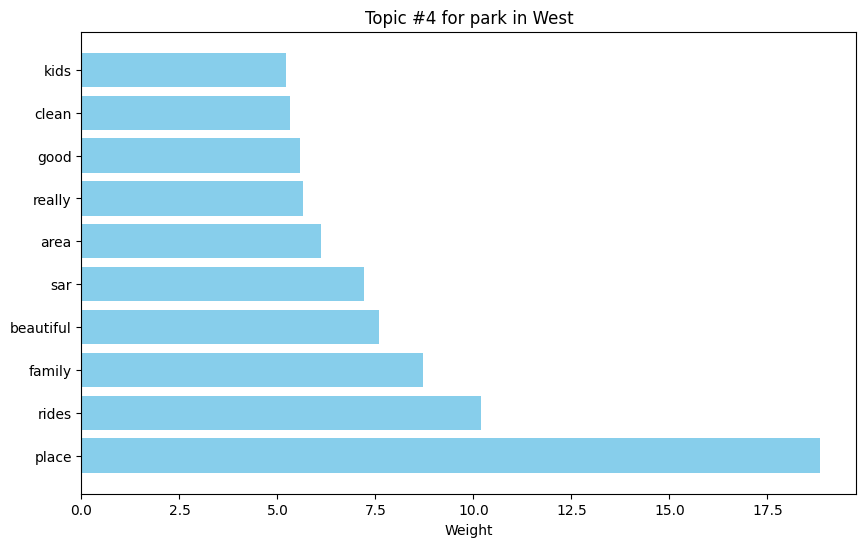


Topic #5:
['mosque', 'activities', 'come', 'food', 'family', 'time', 'like', 'park', 'place', 'good']


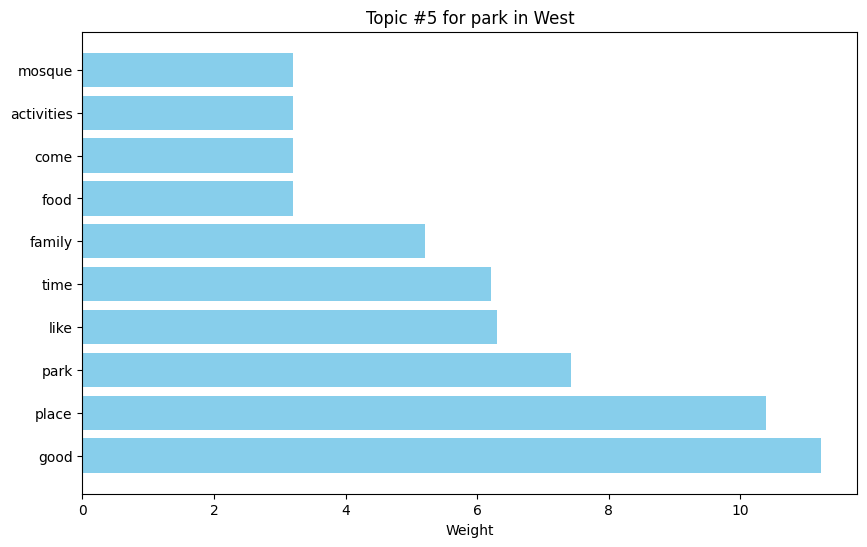


--- Topics for amusement_park in West ---

Topic #1:
['experience', 'water', 'nice', 'rides', 'ride', 'kids', 'good', 'children', 'place', 'park']


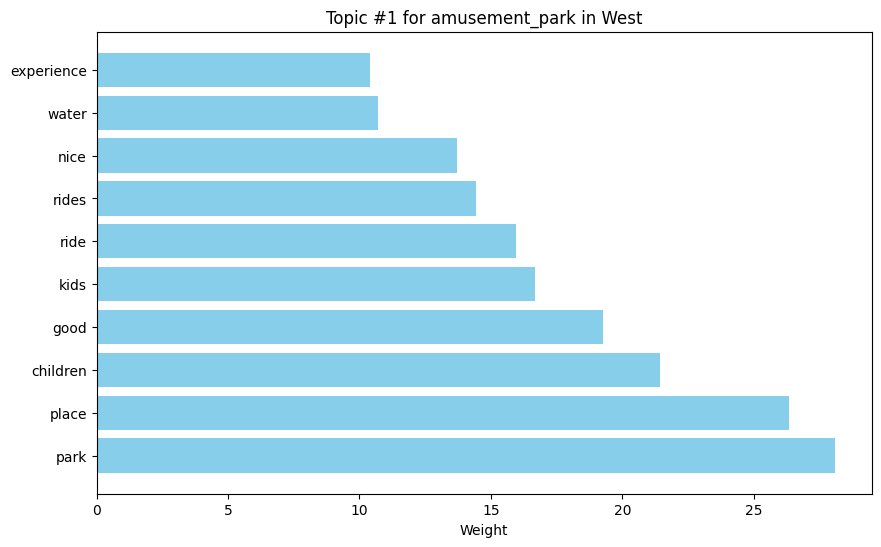


Topic #2:
['time', 'clean', 'rides', 'visit', 'staff', 'experience', 'place', 'fun', 'park', 'kids']


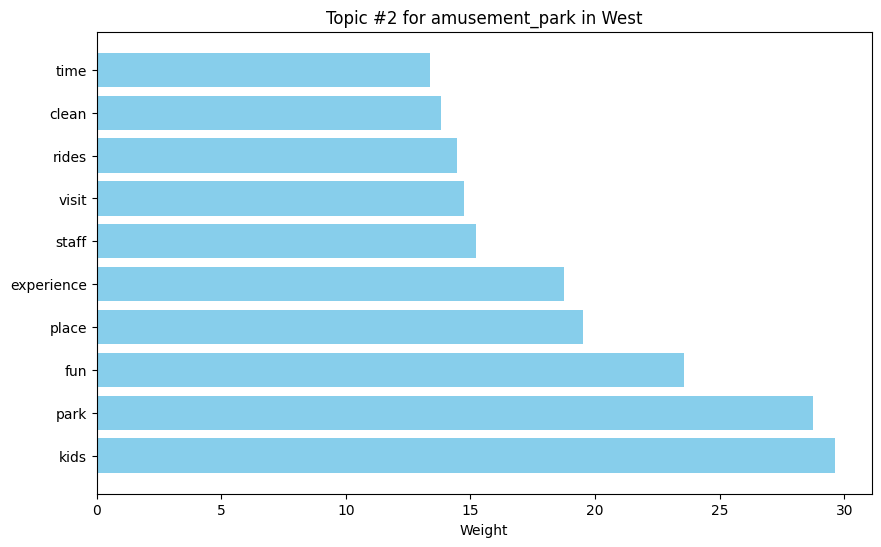


Topic #3:
['sar', 'fee', 'expensive', 'play', 'area', 'games', 'fun', 'good', 'kids', 'place']


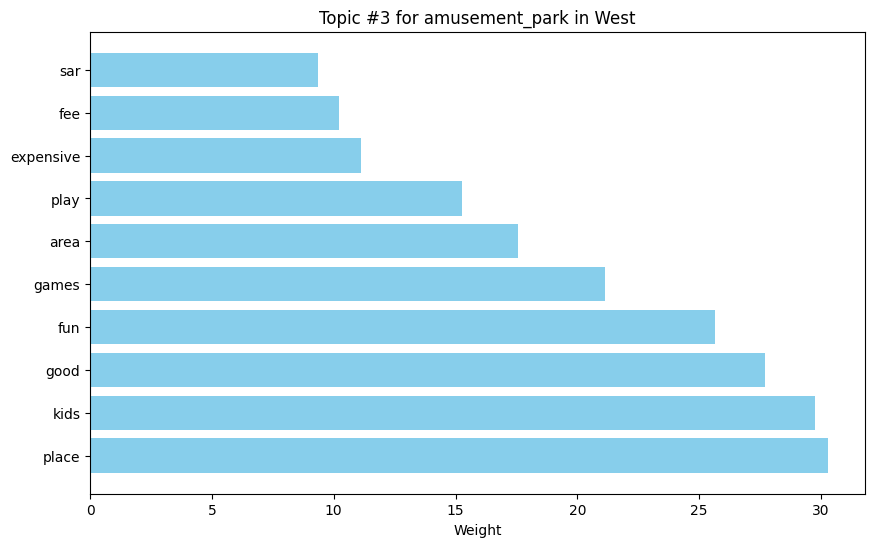


Topic #4:
['family', 'come', 'area', 'inside', 'fun', 'clean', 'good', 'nice', 'kids', 'place']


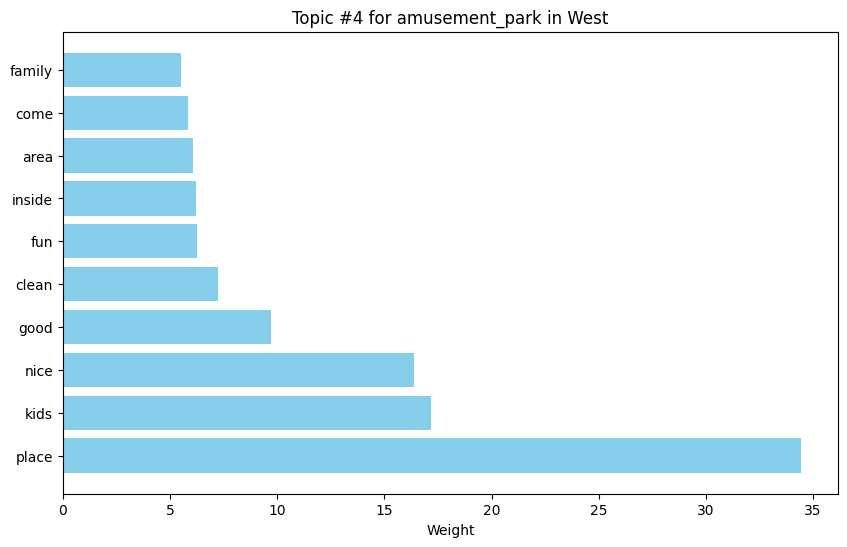


Topic #5:
['area', 'small', 'best', 'play', 'experience', 'good', 'place', 'kids', 'children', 'mall']


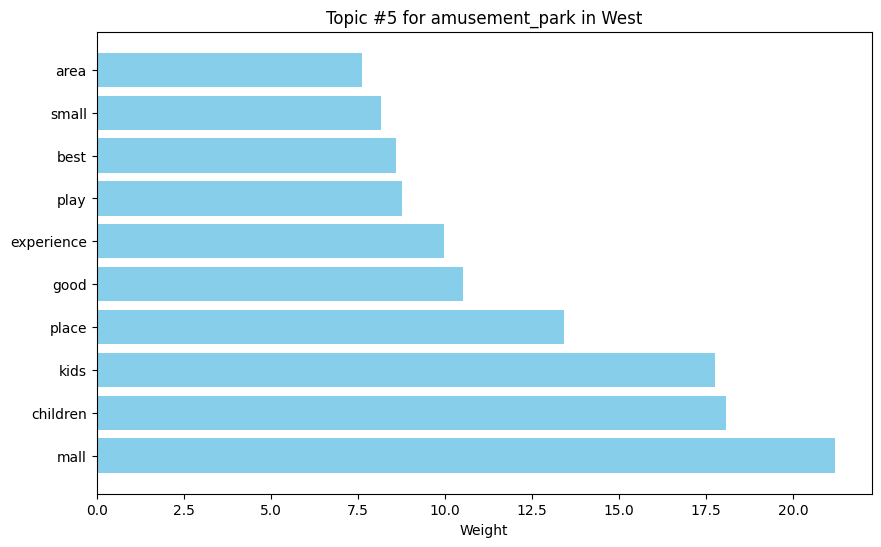


--- Topics for East ---

--- Topics for hotel in East ---

Topic #1:
['stay', 'rooms', 'great', 'reception', 'really', 'clean', 'staff', 'nice', 'hotel', 'good']


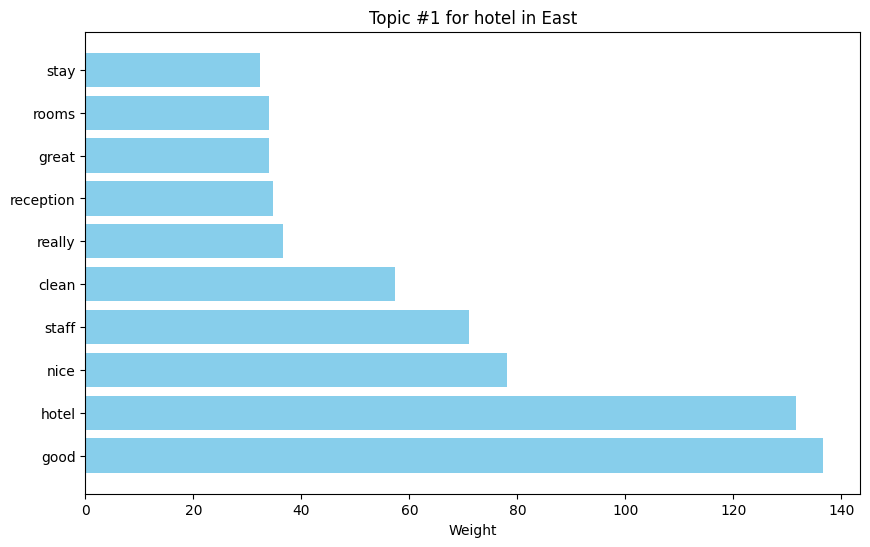


Topic #2:
['location', 'staff', 'rooms', 'good', 'place', 'bad', 'room', 'service', 'clean', 'hotel']


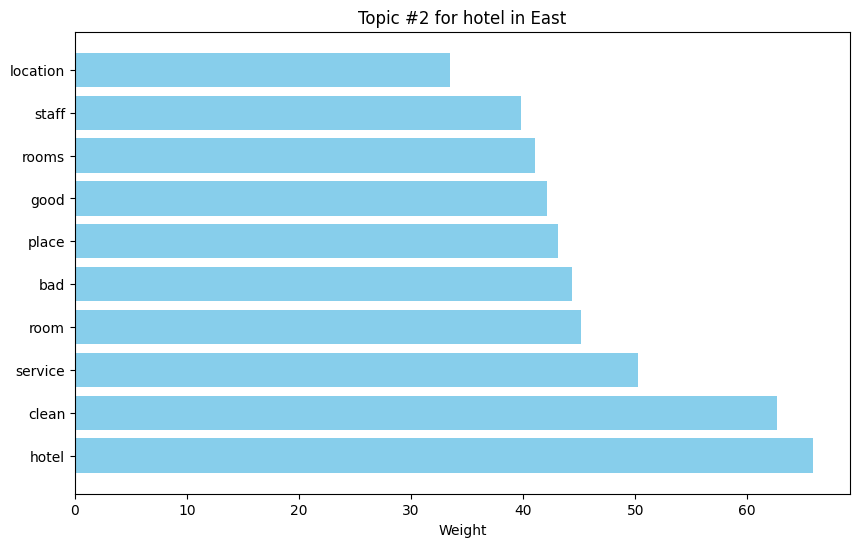


Topic #3:
['rooms', 'great', 'breakfast', 'reception', 'room', 'service', 'experience', 'staff', 'stay', 'hotel']


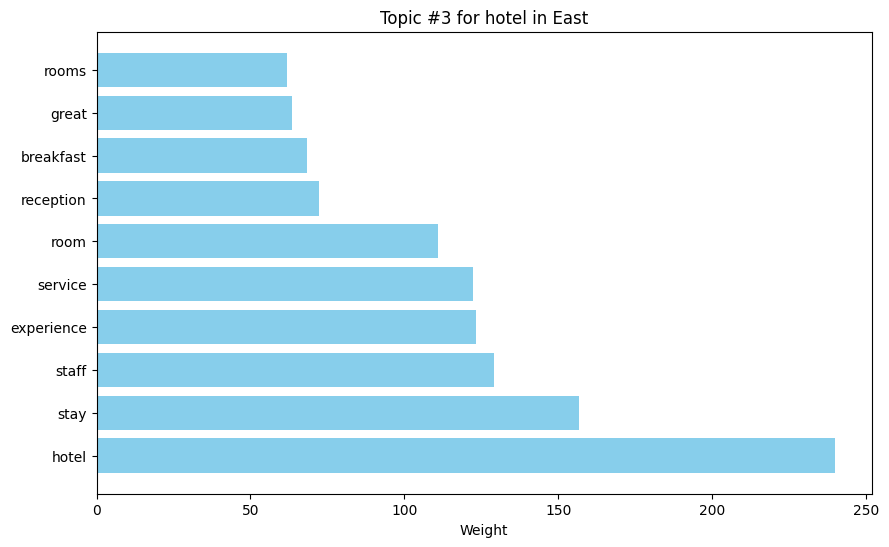


Topic #4:
['thank', 'mr', 'clean', 'hospitality', 'like', 'stay', 'service', 'staff', 'hotel', 'place']


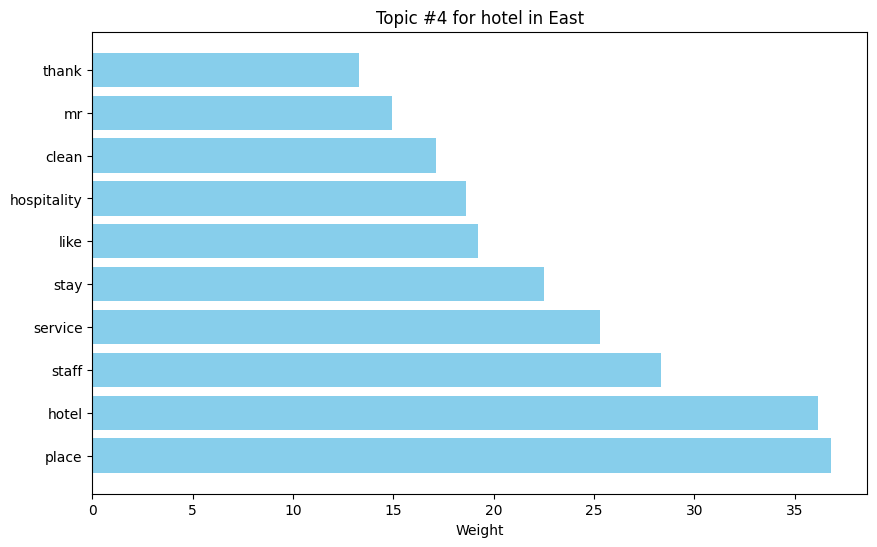


Topic #5:
['water', 'price', 'service', 'place', 'location', 'hotel', 'clean', 'rooms', 'good', 'room']


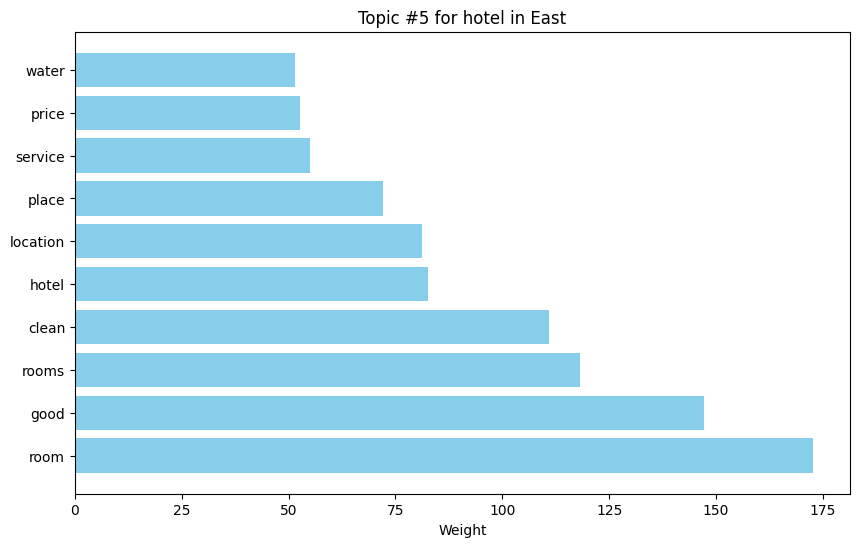


--- Topics for restaurant in East ---

Topic #1:
['meat', 'nice', 'best', 'service', 'restaurant', 'chicken', 'taste', 'place', 'food', 'good']


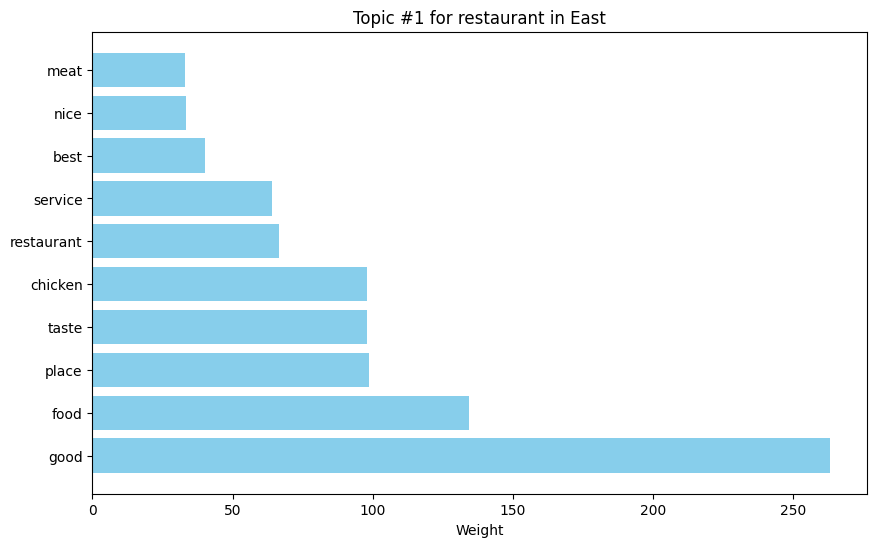


Topic #2:
['got', 'try', 'way', 'qatif', 'salad', 'cake', 'chicken', 'kebab', 'soup', 'sr']


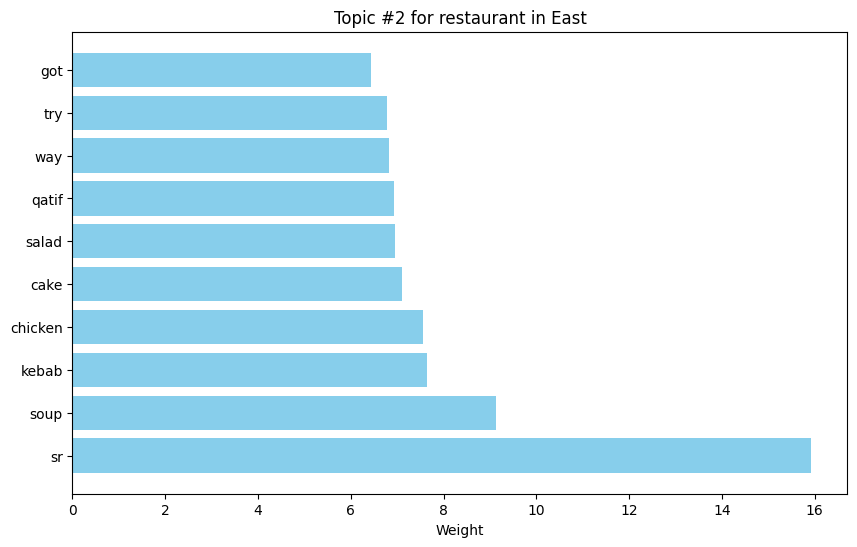


Topic #3:
['shawarma', 'order', 'service', 'place', 'food', 'like', 'good', 'restaurant', 'nice', 'time']


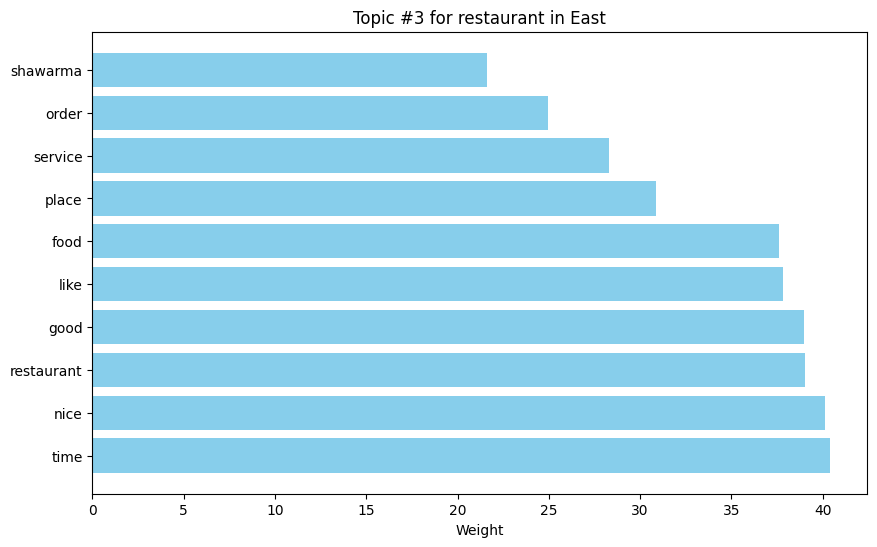


Topic #4:
['dishes', 'place', 'amazing', 'recommend', 'staff', 'food', 'rice', 'delicious', 'cheese', 'chicken']


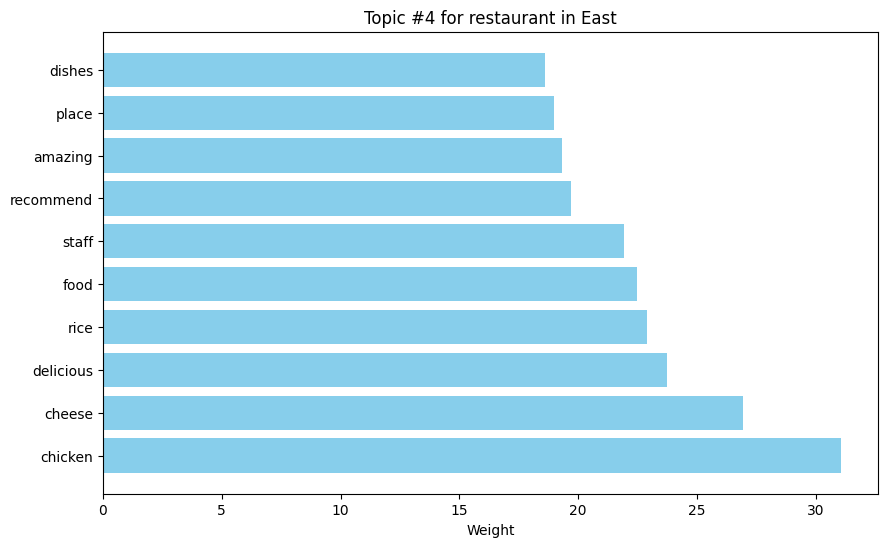


Topic #5:
['place', 'good', 'excellent', 'staff', 'great', 'delicious', 'restaurant', 'experience', 'service', 'food']


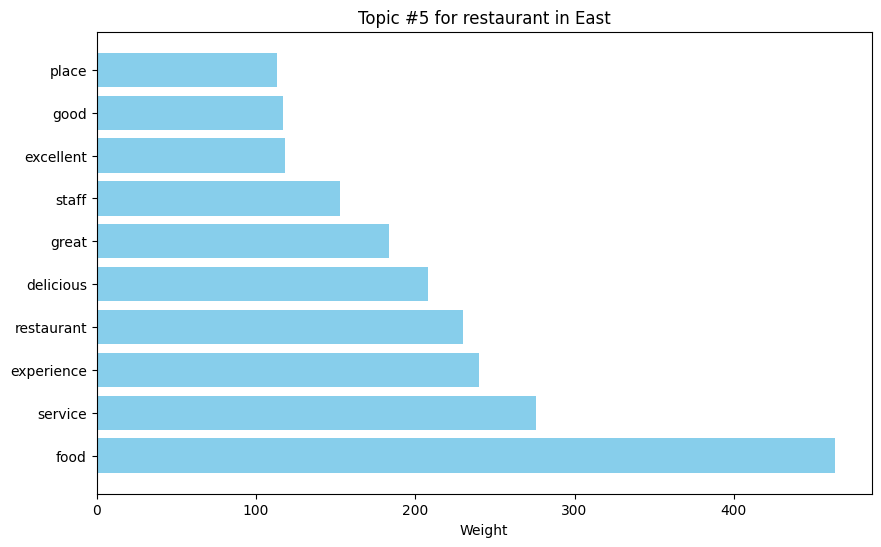


--- Topics for tourist_attraction in East ---

Topic #1:
['great', 'best', 'mosque', 'theres', 'closed', 'kids', 'come', 'walk', 'beautiful', 'place']


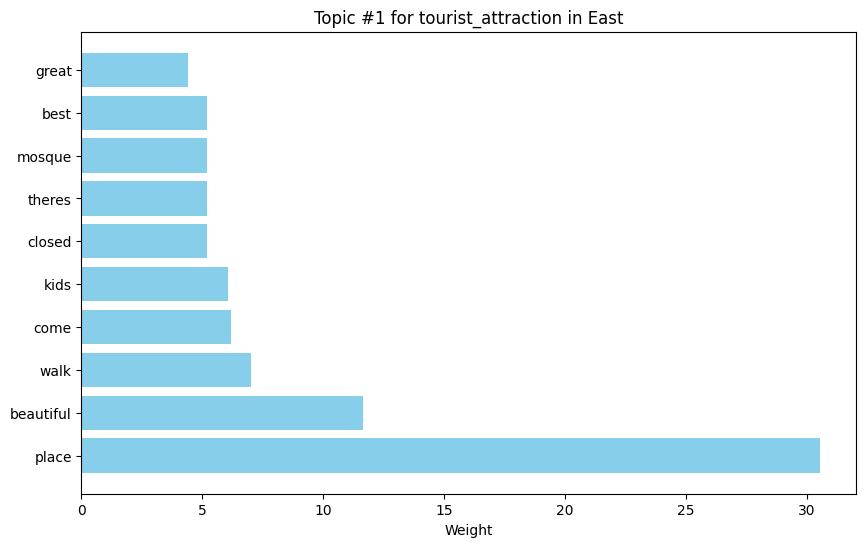


Topic #2:
['calm', 'king', 'structure', 'visit', 'khobar', 'house', 'corniche', 'place', 'tower', 'al']


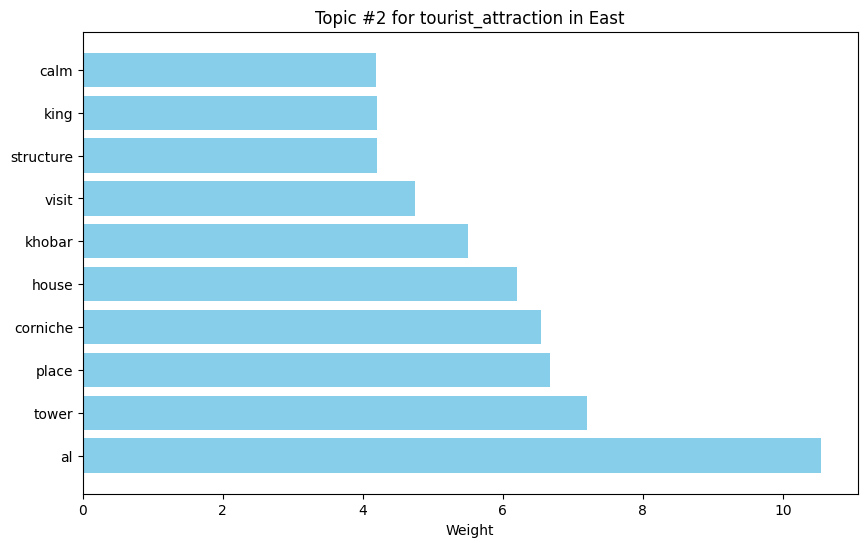


Topic #3:
['picnic', 'maintained', 'family', 'parking', 'kids', 'available', 'nice', 'big', 'park', 'good']


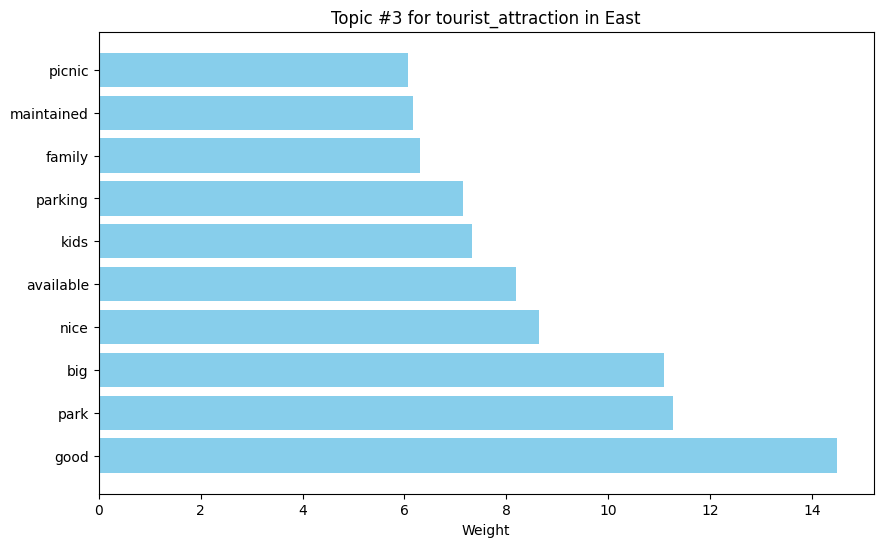


Topic #4:
['free', 'long', 'closed', 'small', 'time', 'great', 'kids', 'good', 'nice', 'area']


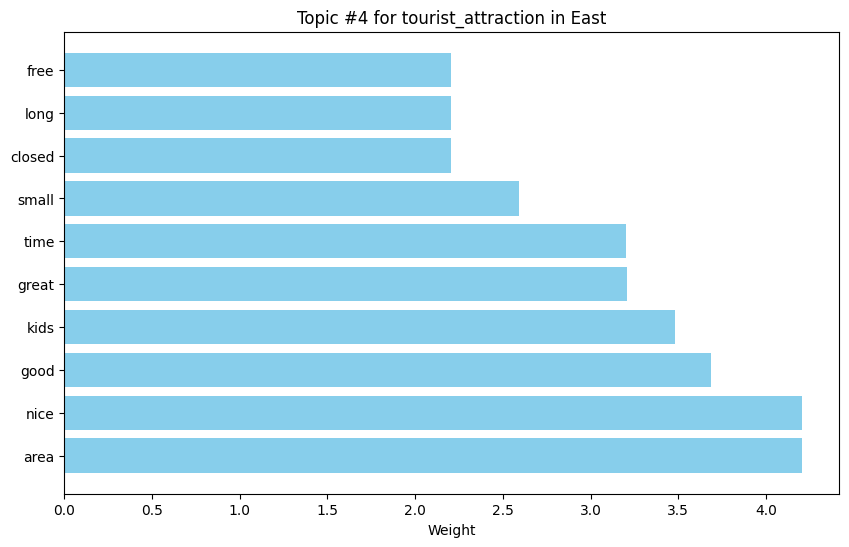


Topic #5:
['areas', 'area', 'clean', 'good', 'sea', 'kids', 'children', 'khobar', 'park', 'place']


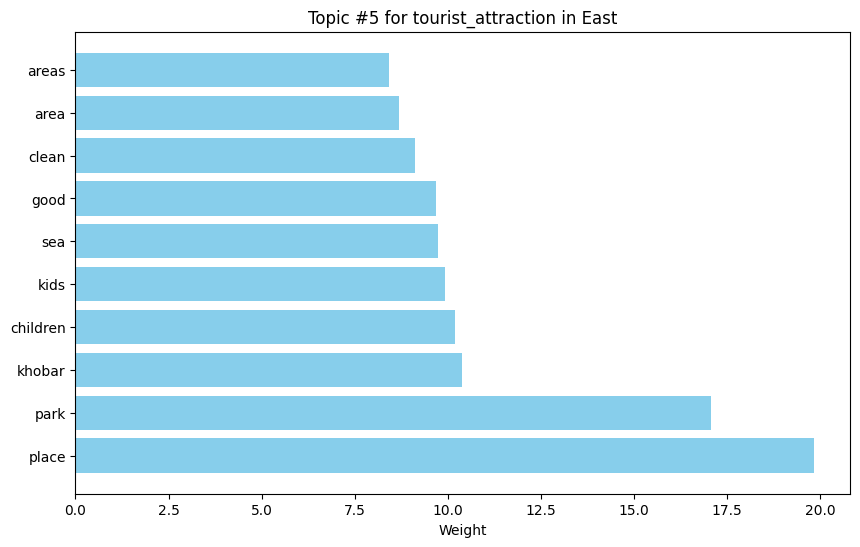


--- Topics for shopping_mall in East ---

Topic #1:
['employee', 'nice', 'mall', 'shops', 'god', 'store', 'available', 'place', 'like', 'good']


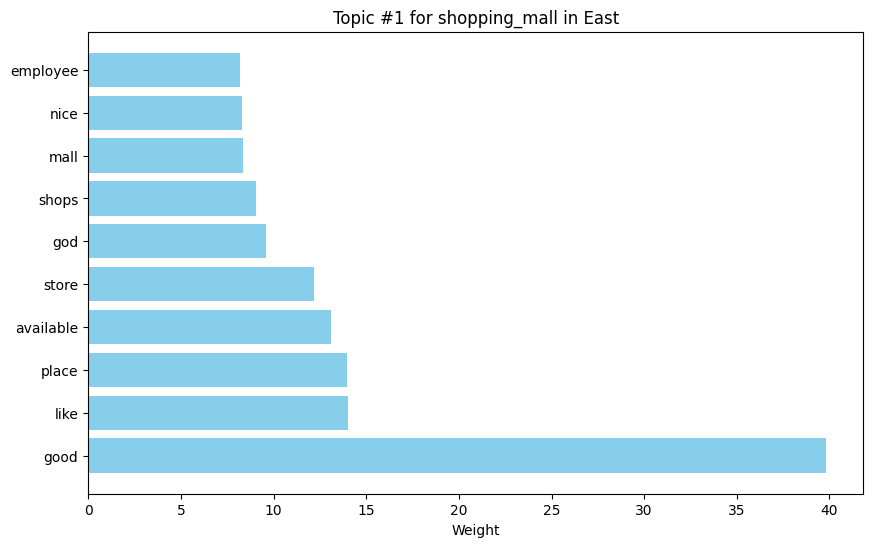


Topic #2:
['enjoy', 'good', 'restaurants', 'area', 'nice', 'great', 'food', 'shops', 'mall', 'place']


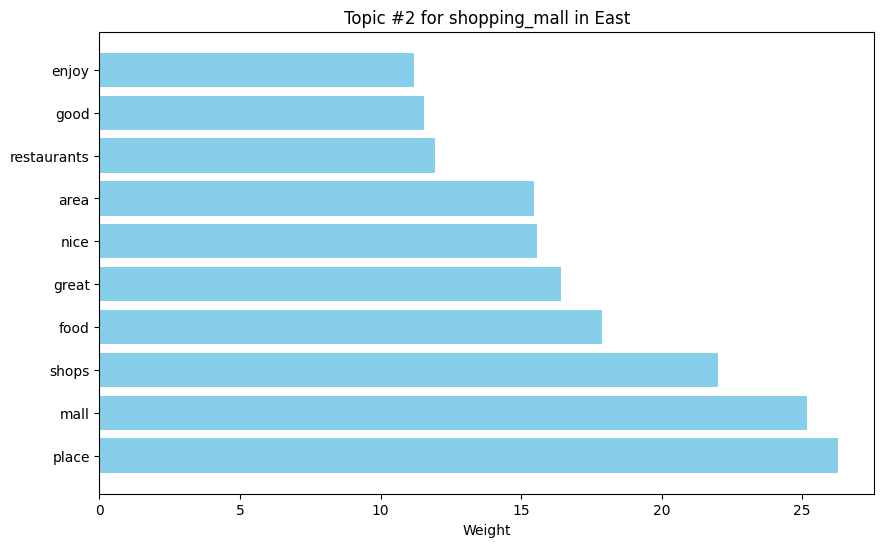


Topic #3:
['market', 'beautiful', 'nice', 'khobar', 'brands', 'shop', 'place', 'shopping', 'prices', 'mall']


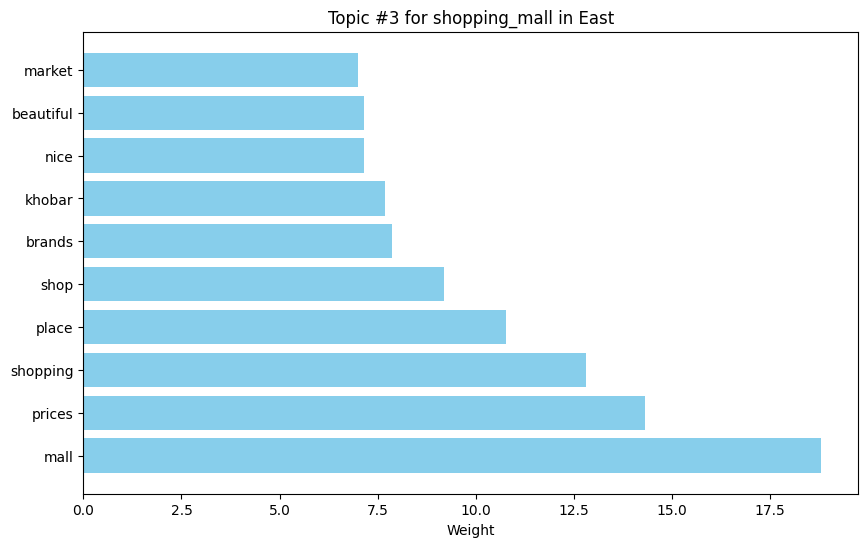


Topic #4:
['brands', 'great', 'local', 'options', 'store', 'good', 'shopping', 'mall', 'place', 'prices']


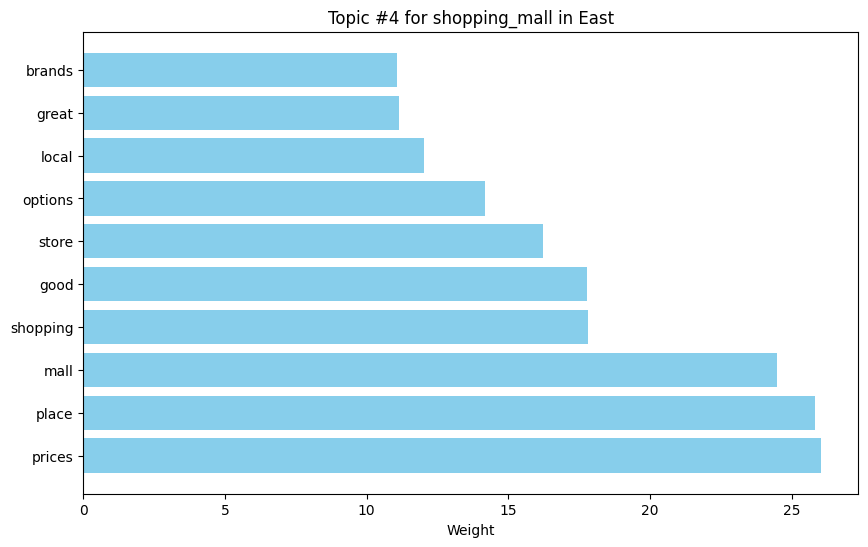


Topic #5:
['store', 'excellent', 'shopping', 'quality', 'save', 'customer', 'cake', 'items', 'good', 'service']


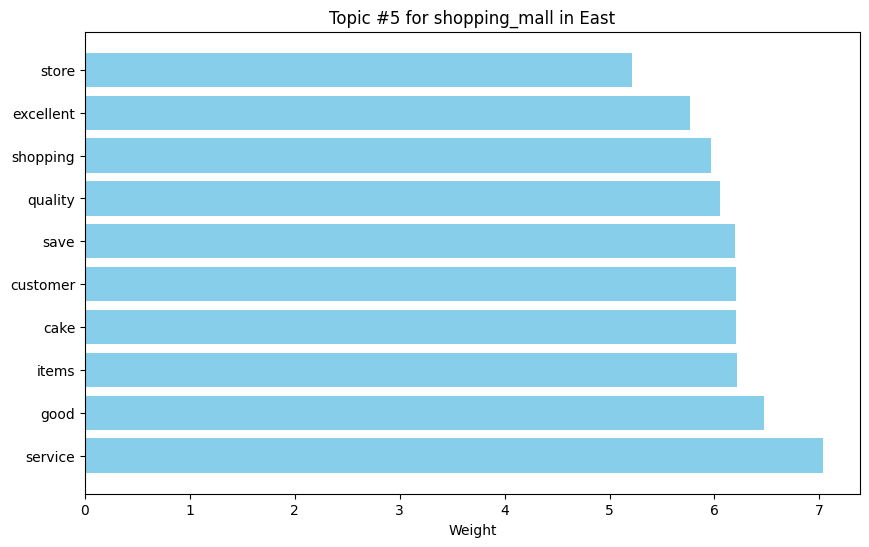


--- Topics for museum in East ---

Topic #1:
['house', 'history', 'tarout', 'local', 'time', 'visit', 'place', 'saudi', 'nice', 'museum']


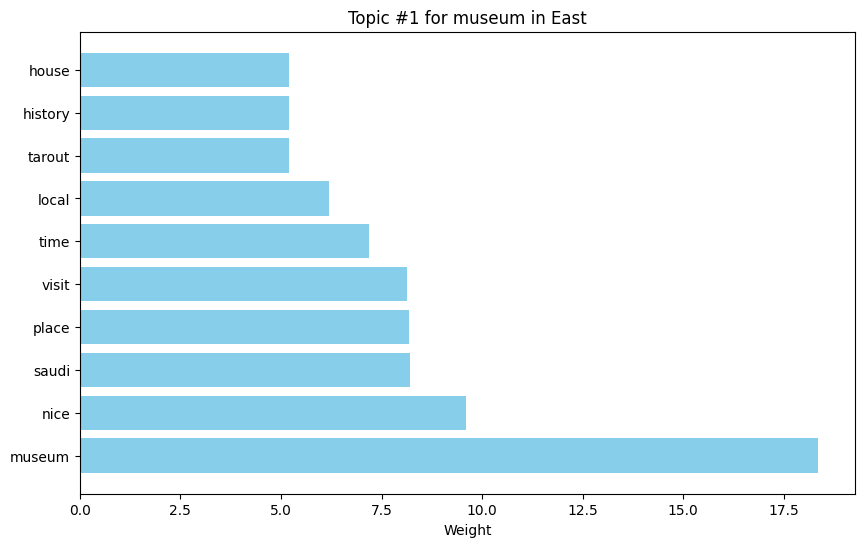


Topic #2:
['area', 'region', 'better', 'wonderful', 'ancient', 'clean', 'museum', 'closed', 'good', 'place']


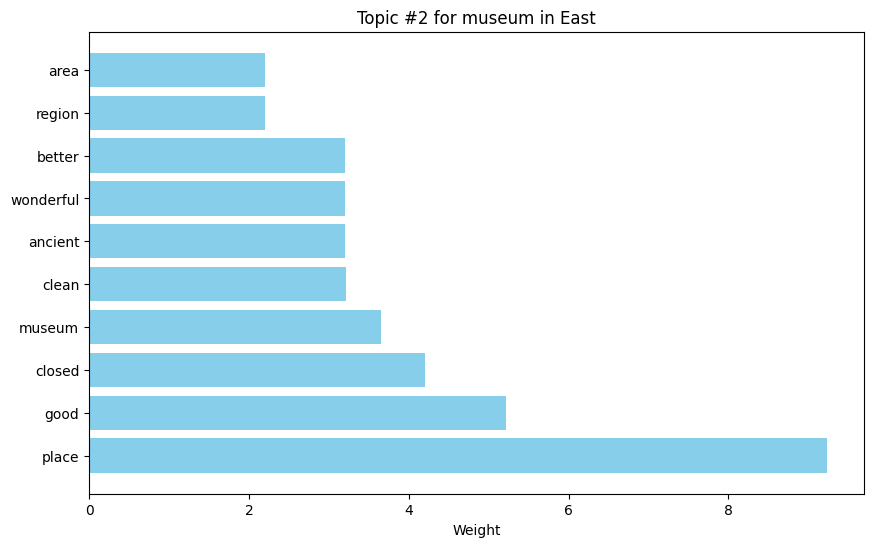


Topic #3:
['iron', 'immersed', 'saudi', 'years', 'best', 'visit', 'aramco', 'experience', 'different', 'really']


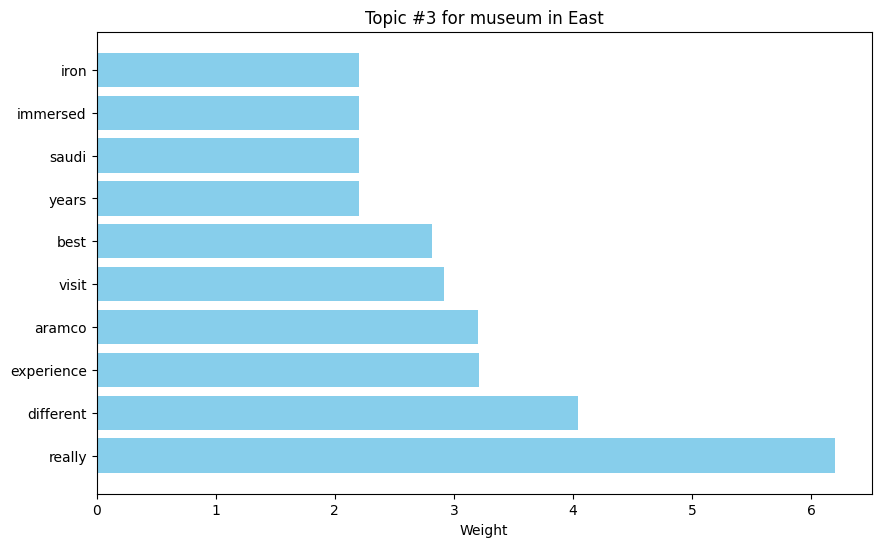


Topic #4:
['beautiful', 'things', 'history', 'past', 'old', 'amazing', 'place', 'visit', 'wonderful', 'museum']


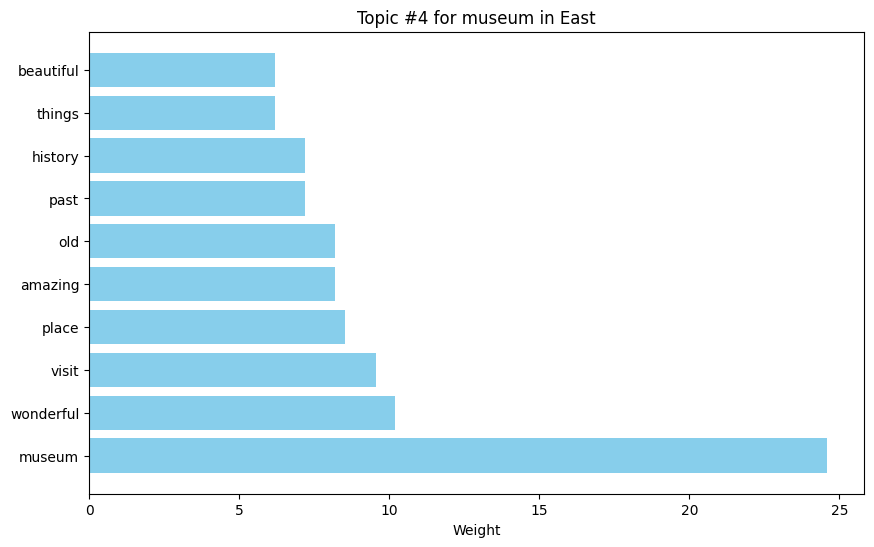


Topic #5:
['antique', 'country', 'happy', 'feel', 'great', 'collection', 'children', 'love', 'stuff', 'ksa']


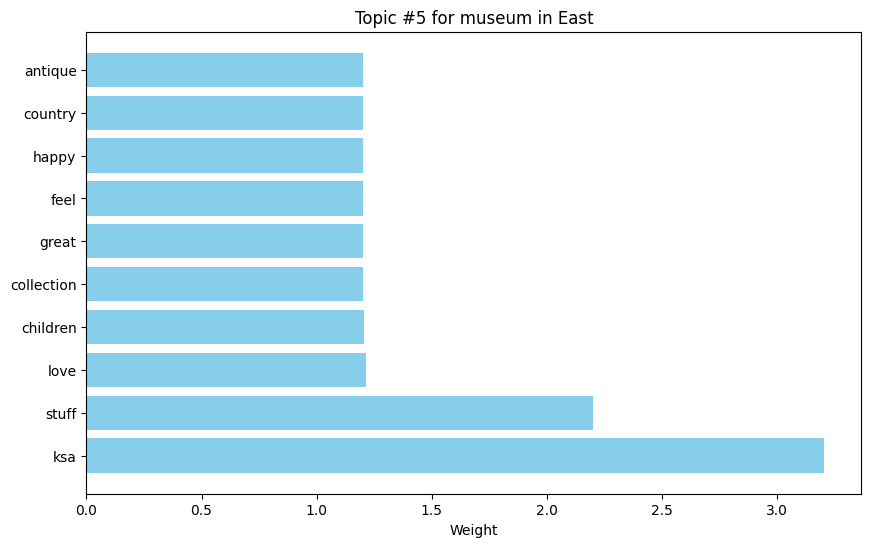


--- Topics for cafe in East ---

Topic #1:
['staff', 'tried', 'like', 'tea', 'coffee', 'experience', 'delicious', 'place', 'breakfast', 'good']


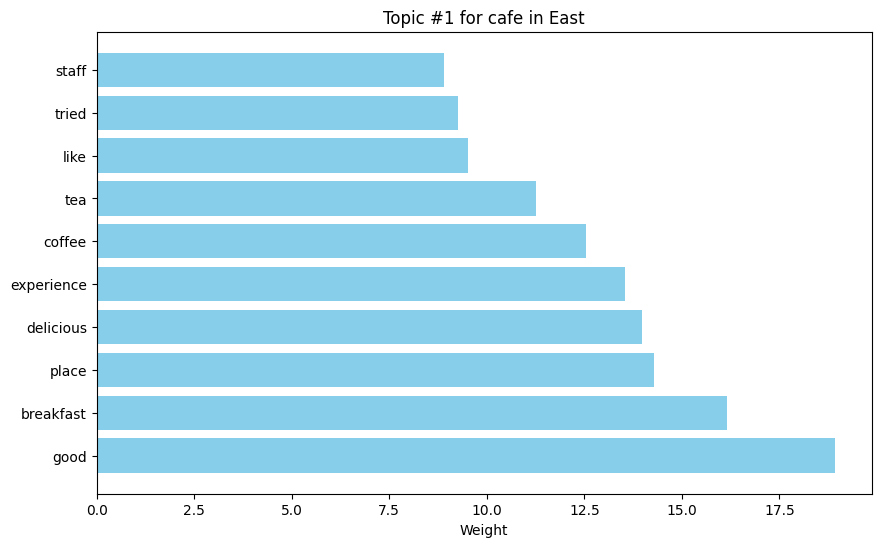


Topic #2:
['delicious', 'nice', 'cheese', 'high', 'great', 'quality', 'like', 'place', 'coffee', 'good']


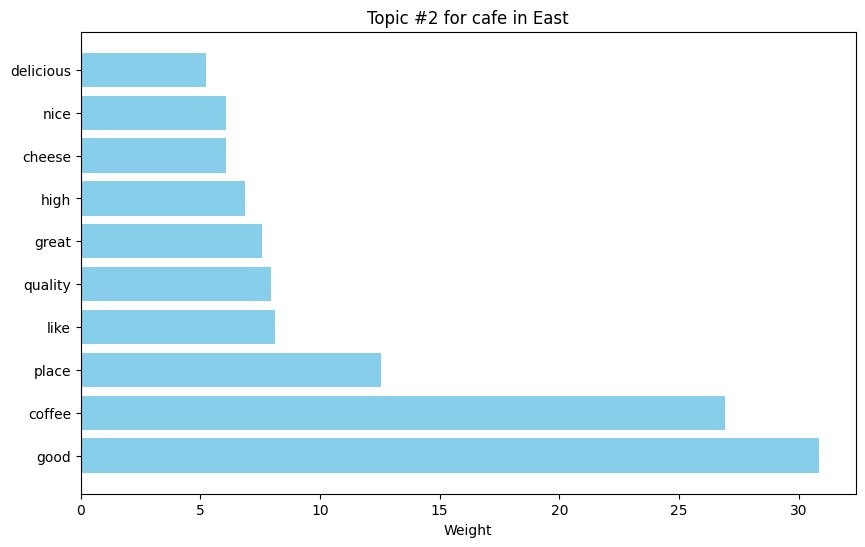


Topic #3:
['staff', 'atmosphere', 'food', 'shop', 'cafe', 'best', 'service', 'good', 'place', 'coffee']


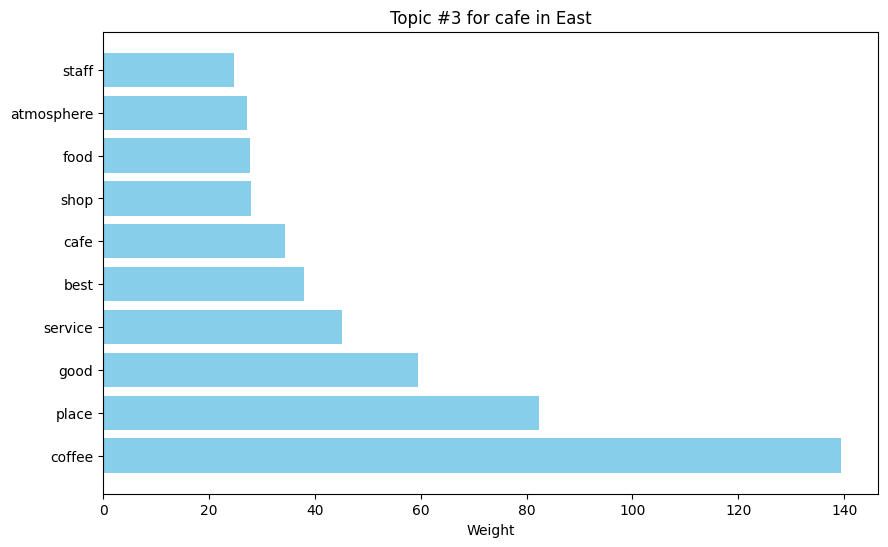


Topic #4:
['spot', 'place', 'experience', 'perfect', 'recommend', 'cafe', 'friendly', 'staff', 'great', 'coffee']


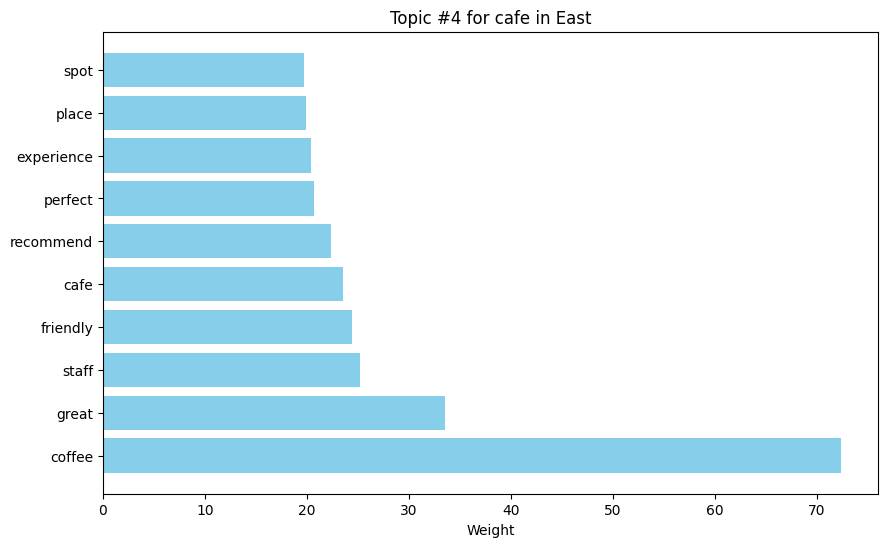


Topic #5:
['like', 'seating', 'atmosphere', 'latte', 'tried', 'great', 'nice', 'place', 'good', 'coffee']


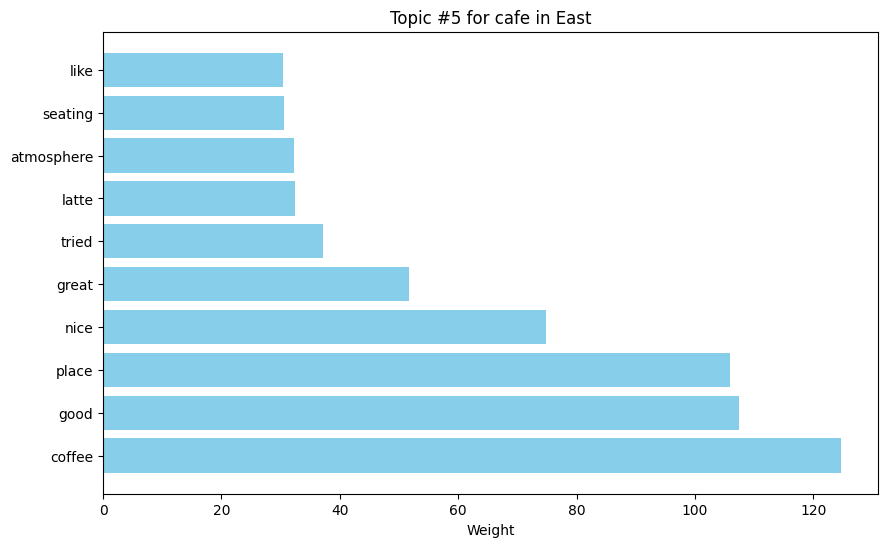


--- Topics for park in East ---

Topic #1:
['khobar', 'area', 'family', 'beautiful', 'walking', 'lot', 'time', 'good', 'park', 'place']


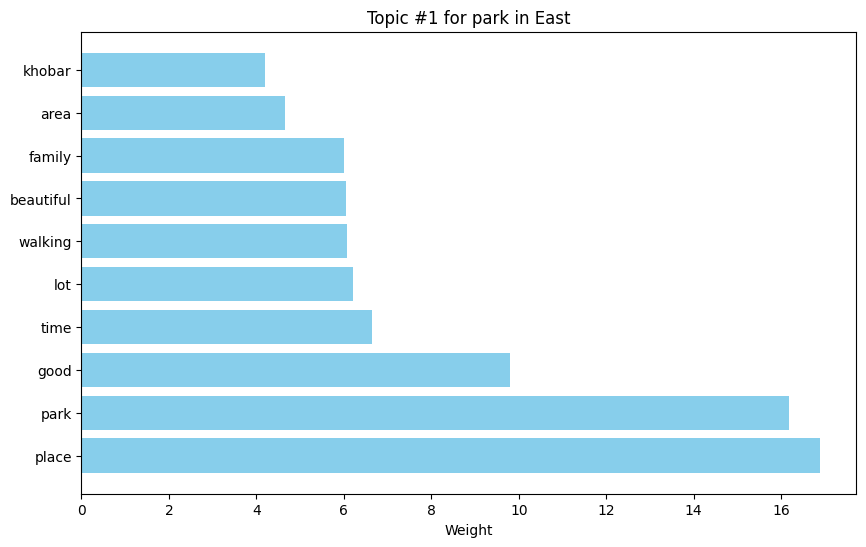


Topic #2:
['peaceful', 'place', 'nice', 'available', 'enjoy', 'small', 'kids', 'jogging', 'clean', 'park']


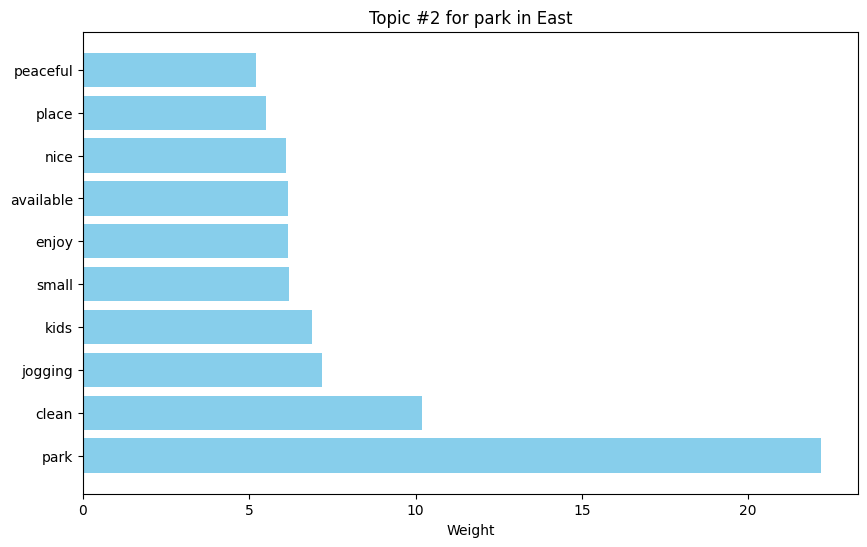


Topic #3:
['ground', 'night', 'area', 'family', 'play', 'garden', 'clean', 'park', 'kids', 'good']


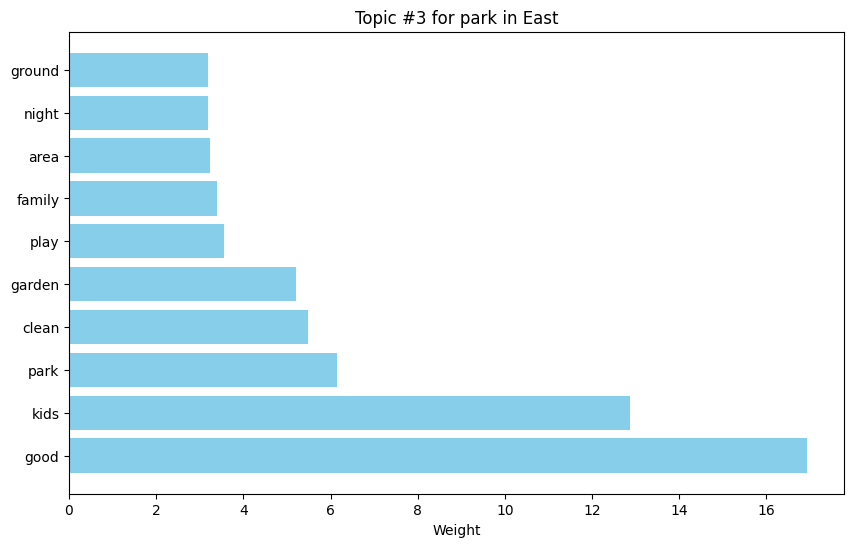


Topic #4:
['beautiful', 'family', 'walk', 'love', 'play', 'small', 'park', 'place', 'kids', 'nice']


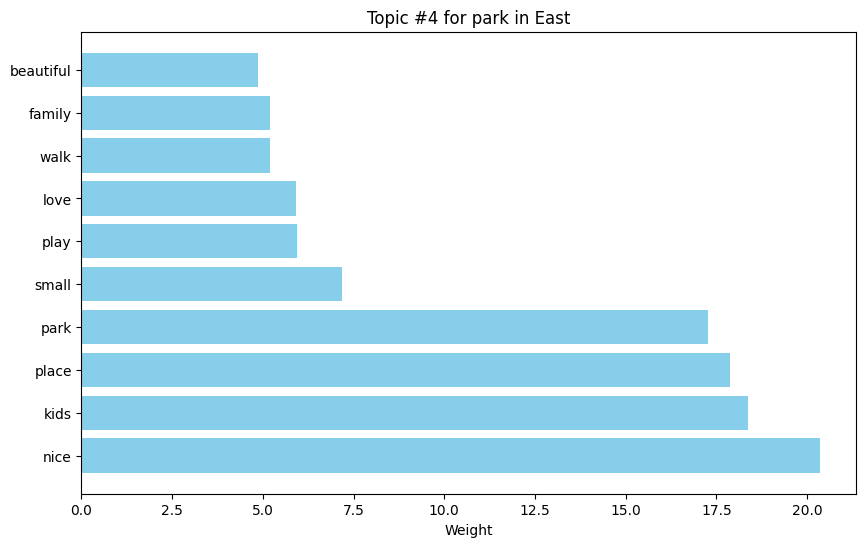


Topic #5:
['family', 'water', 'experience', 'park', 'walking', 'best', 'great', 'good', 'corniche', 'place']


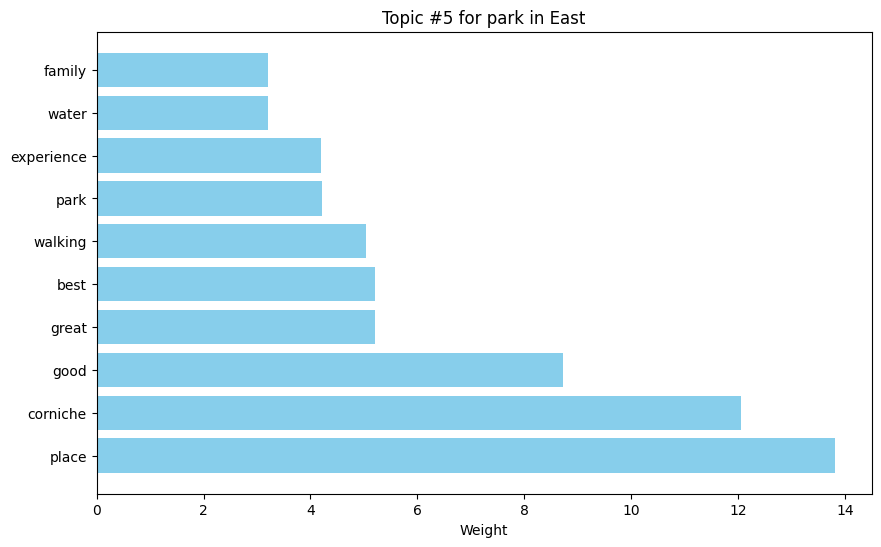


--- Topics for amusement_park in East ---

Topic #1:
['bring', 'slides', 'place', 'slide', 'recommend', 'people', 'rides', 'men', 'park', 'water']


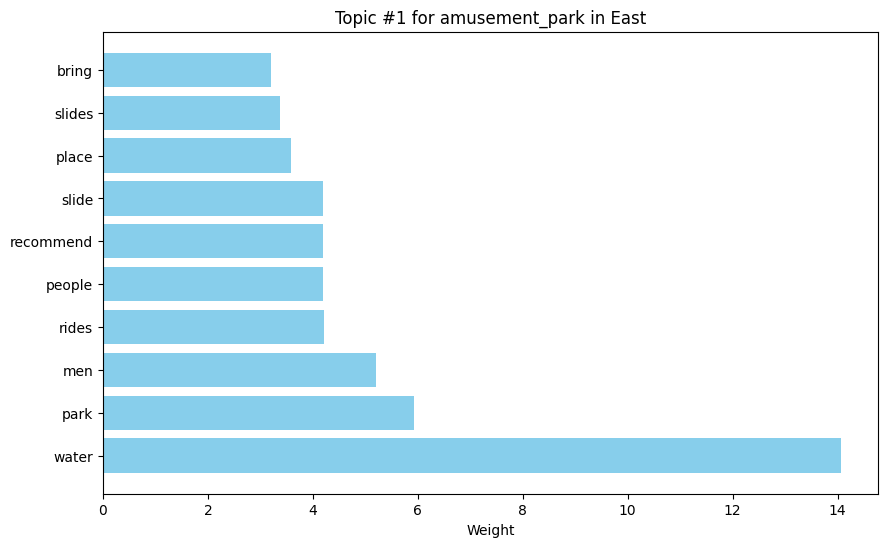


Topic #2:
['tickets', 'waste', 'purchase', 'expensive', 'card', 'games', 'sr', 'wheel', 'money', 'rides']


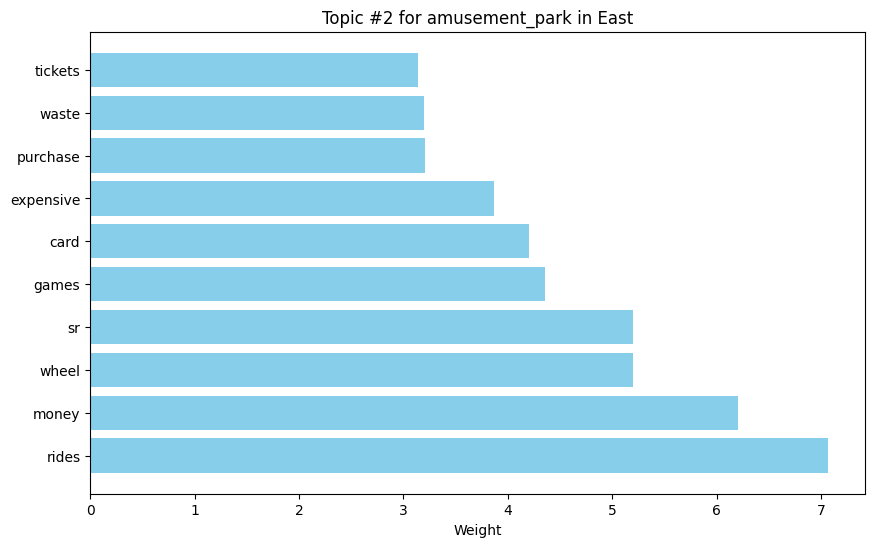


Topic #3:
['family', 'children', 'staff', 'fun', 'area', 'good', 'games', 'play', 'kids', 'place']


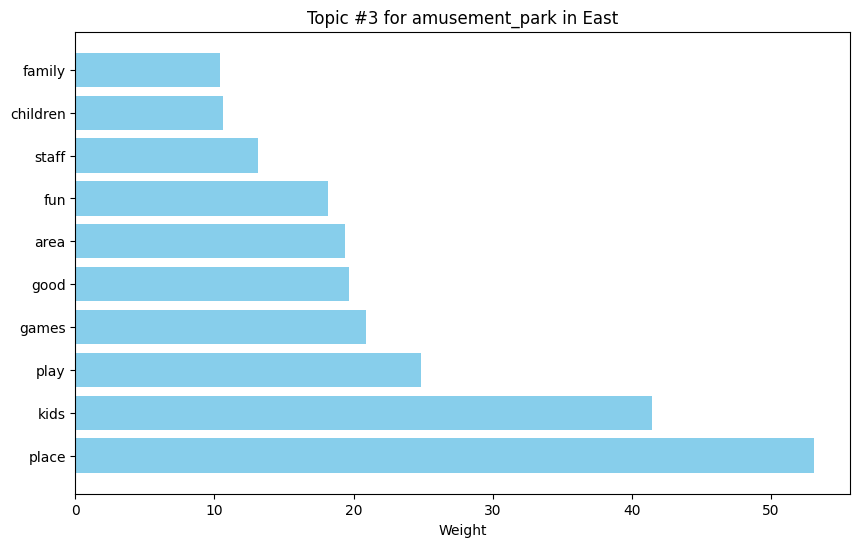


Topic #4:
['inside', 'small', 'place', 'great', 'socks', 'area', 'games', 'family', 'kids', 'rides']


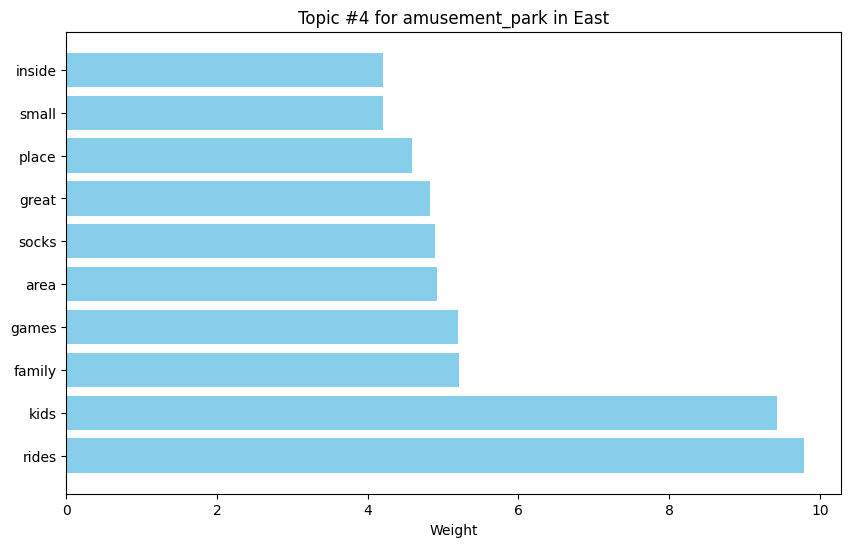


Topic #5:
['small', 'maintenance', 'needs', 'old', 'customer', 'view', 'time', 'place', 'service', 'good']


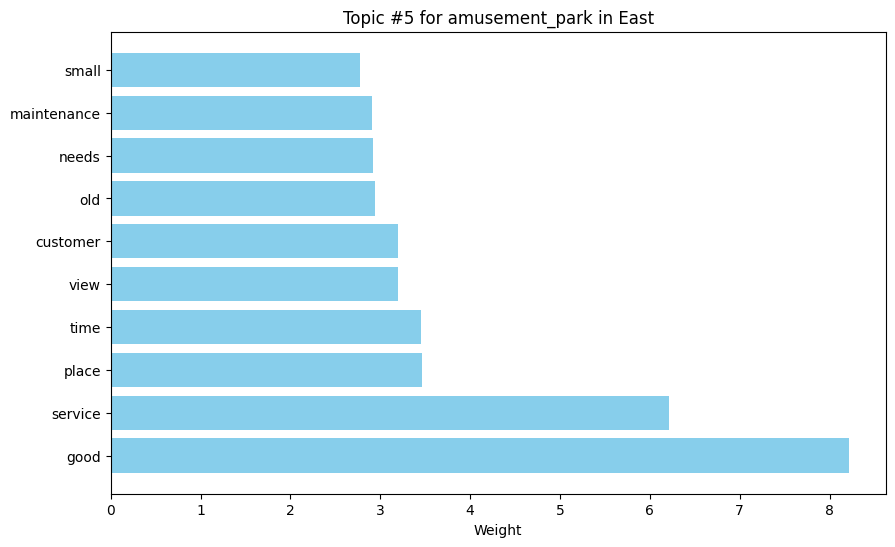


--- Topics for South ---

--- Topics for hotel in South ---

Topic #1:
['services', 'good', 'reception', 'place', 'thank', 'beautiful', 'clean', 'god', 'excellent', 'hotel']


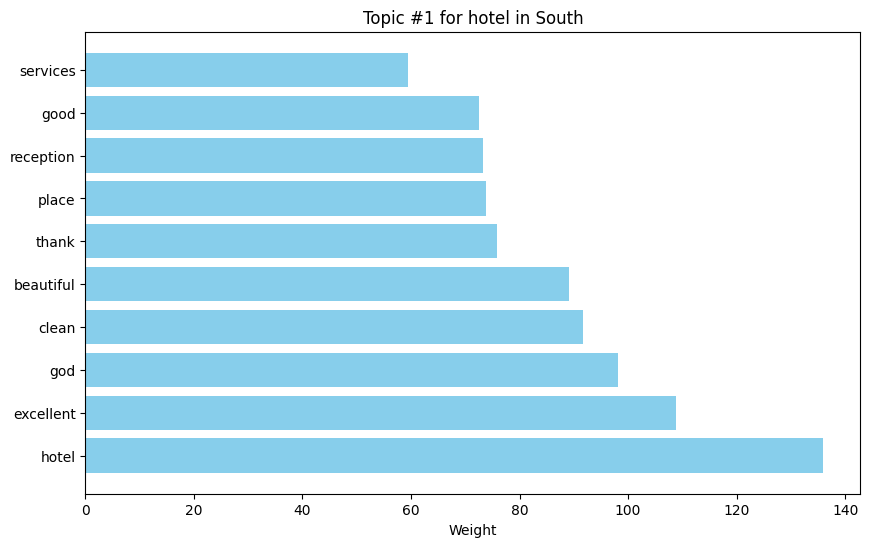


Topic #2:
['location', 'stay', 'best', 'great', 'service', 'clean', 'staff', 'room', 'hotel', 'good']


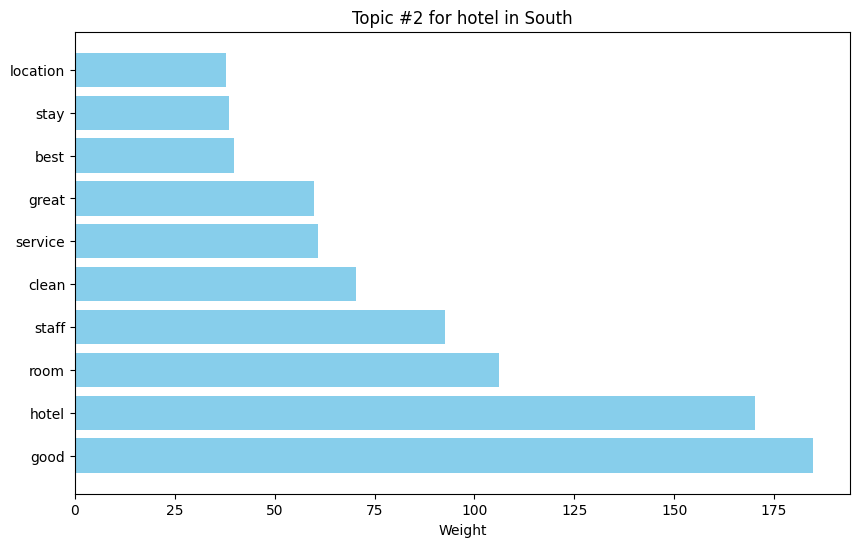


Topic #3:
['told', 'comfortable', 'rooms', 'friendly', 'abha', 'excellent', 'room', 'stay', 'staff', 'hotel']


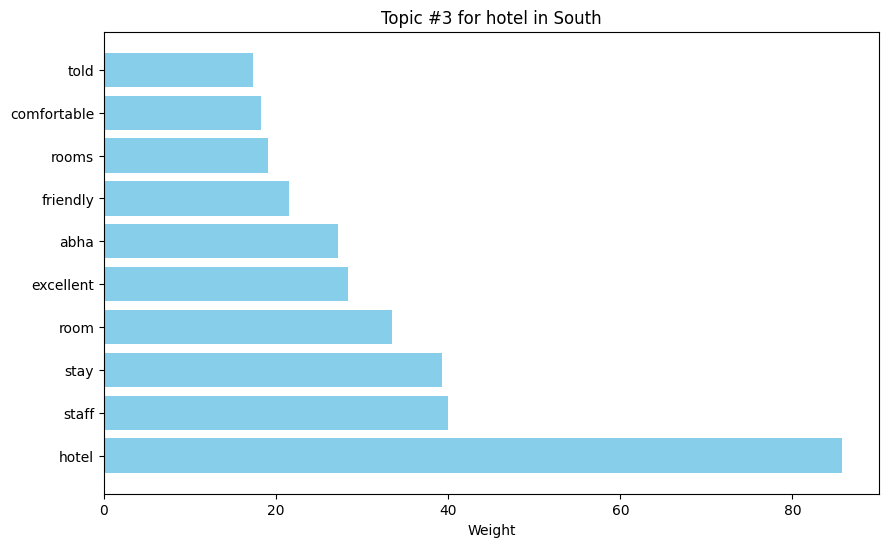


Topic #4:
['recommend', 'experience', 'water', 'clean', 'bathroom', 'dirty', 'place', 'rooms', 'service', 'bad']


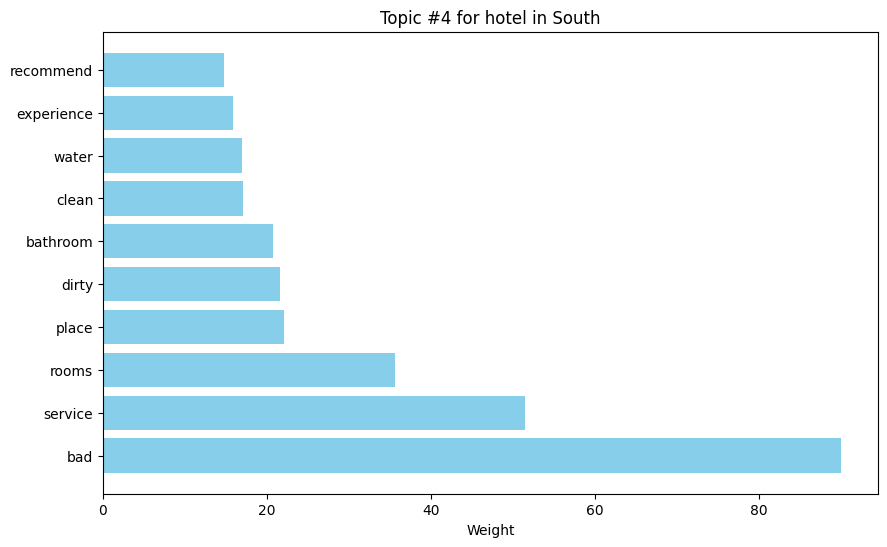


Topic #5:
['location', 'place', 'stay', 'rooms', 'staff', 'nice', 'room', 'clean', 'good', 'hotel']


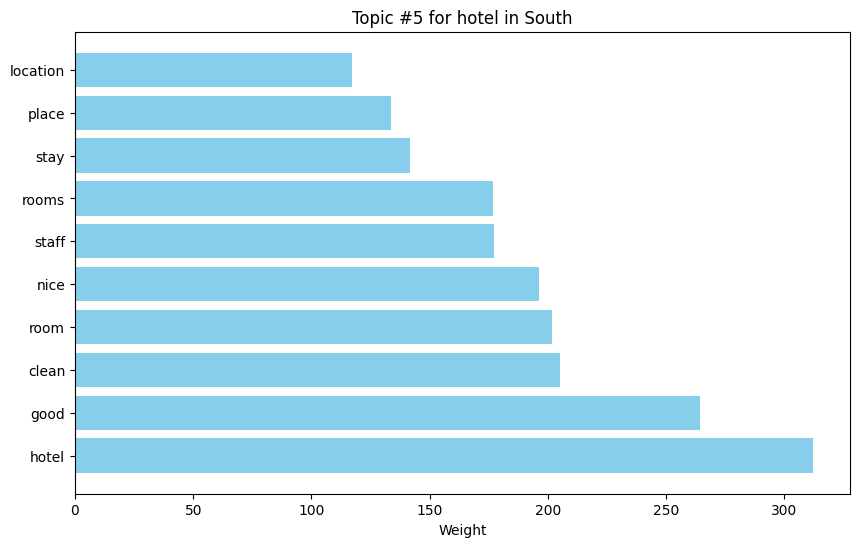


--- Topics for restaurant in South ---

Topic #1:
['excellent', 'nice', 'staff', 'delicious', 'place', 'great', 'restaurant', 'service', 'good', 'food']


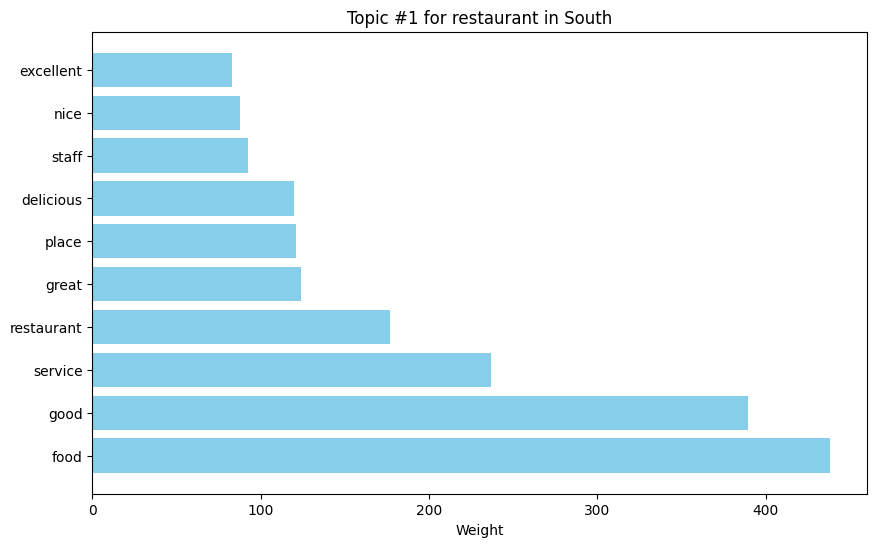


Topic #2:
['abha', 'order', 'chicken', 'food', 'service', 'bad', 'taste', 'restaurant', 'good', 'best']


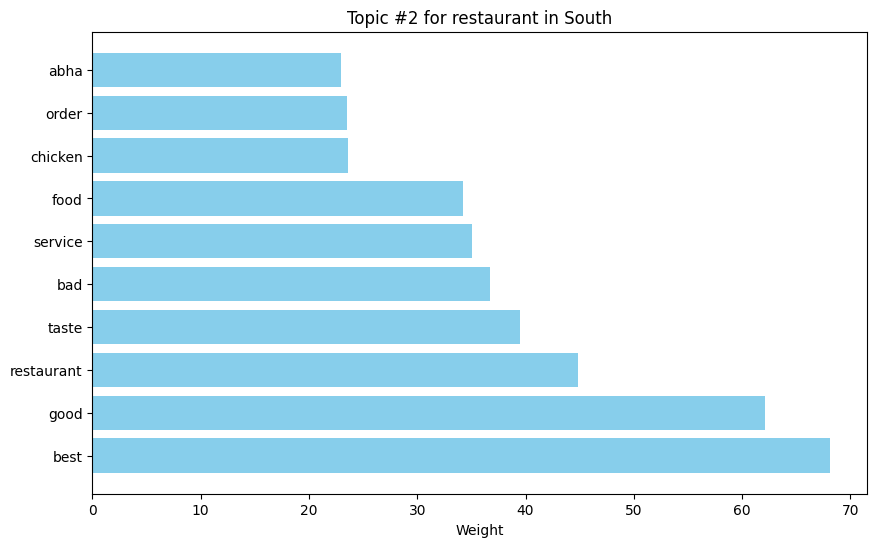


Topic #3:
['visit', 'recommend', 'restaurants', 'place', 'food', 'experience', 'best', 'god', 'delicious', 'restaurant']


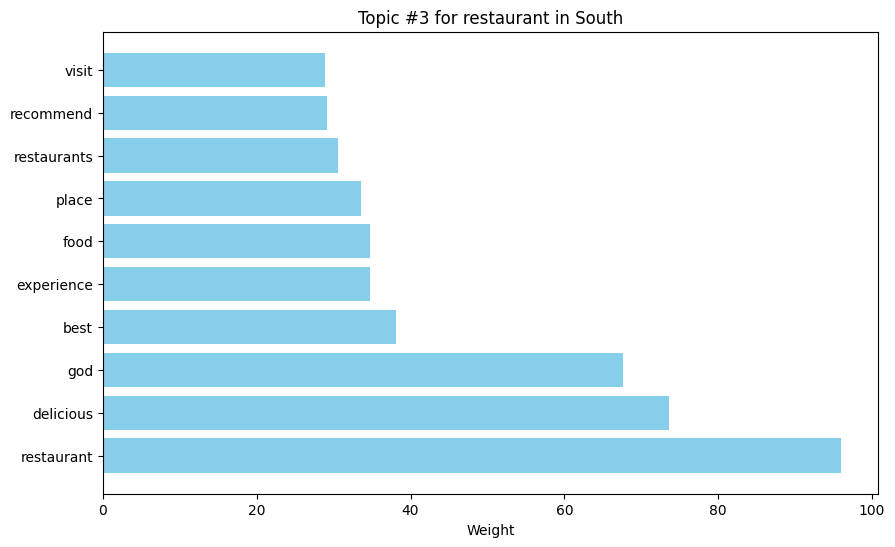


Topic #4:
['ordered', 'rice', 'order', 'good', 'god', 'food', 'restaurant', 'delicious', 'chicken', 'taste']


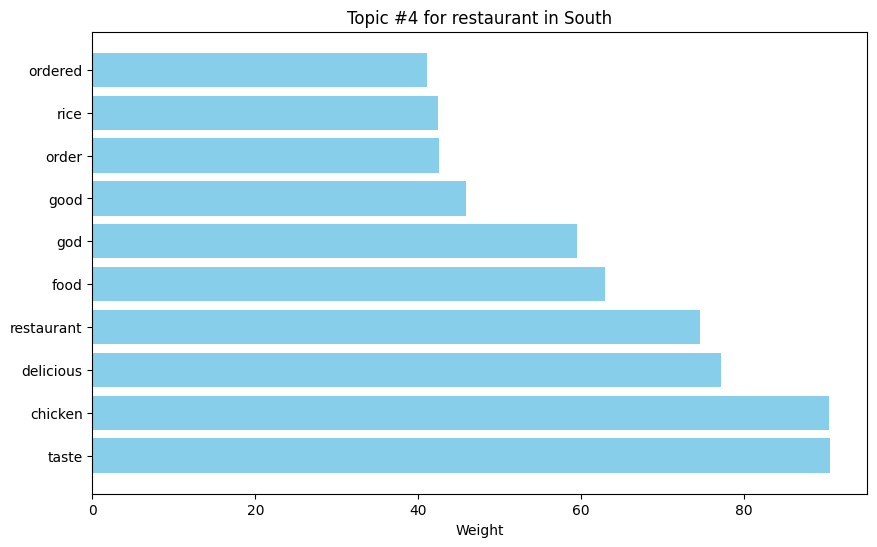


Topic #5:
['friendly', 'good', 'delicious', 'staff', 'amazing', 'best', 'place', 'nice', 'burger', 'food']


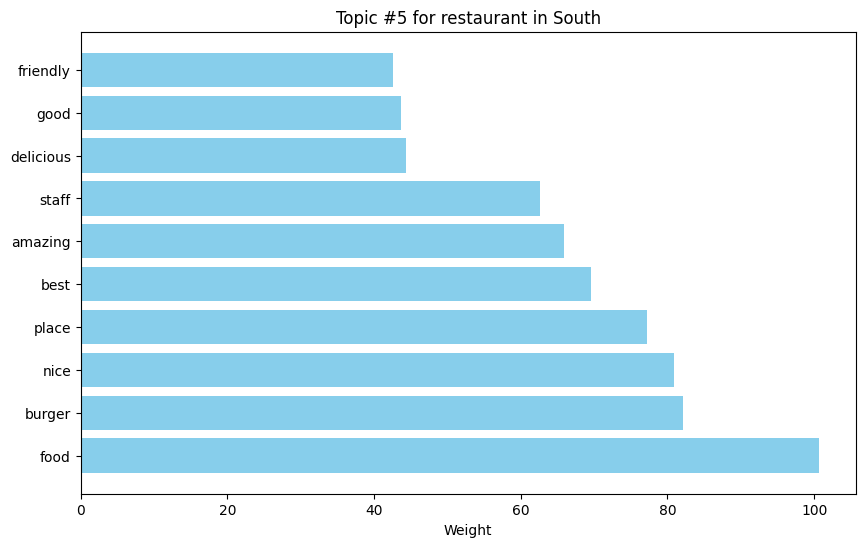


--- Topics for tourist_attraction in South ---

Topic #1:
['enjoy', 'come', 'kids', 'park', 'beautiful', 'food', 'visit', 'best', 'good', 'place']


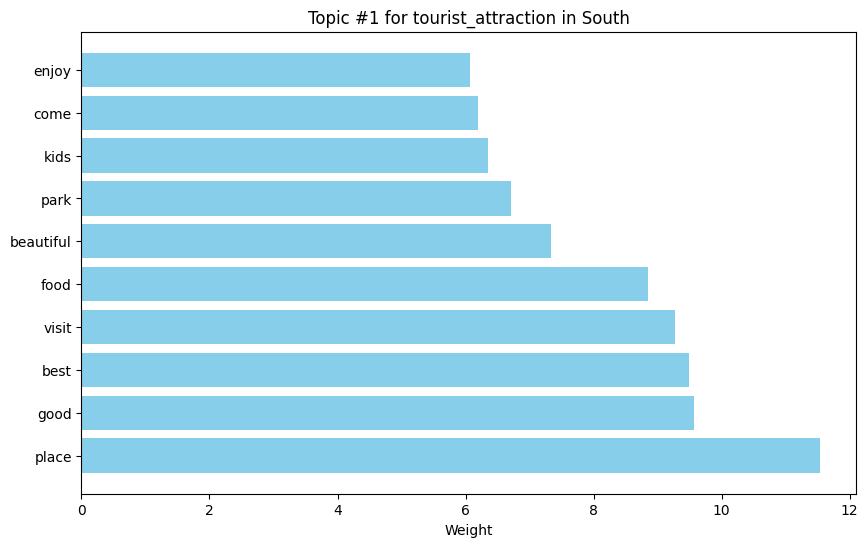


Topic #2:
['time', 'coffee', 'family', 'visit', 'dam', 'good', 'nice', 'abha', 'park', 'place']


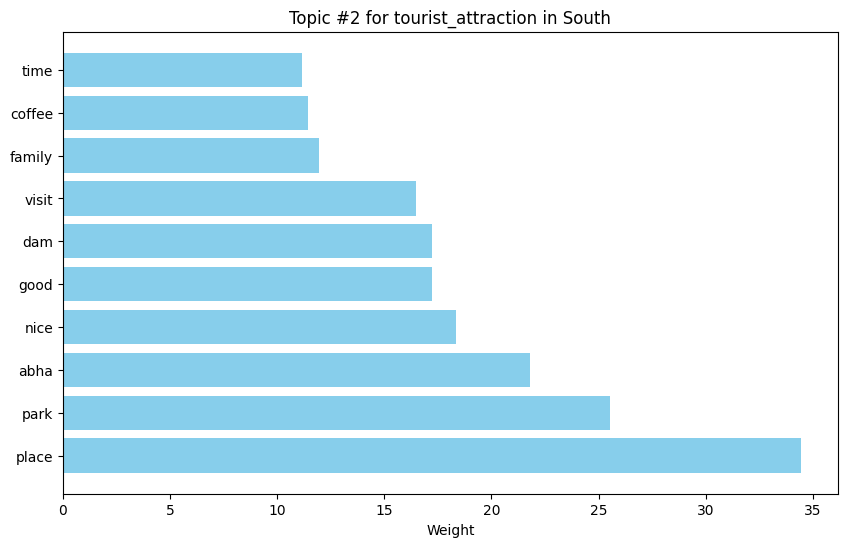


Topic #3:
['amazing', 'mountains', 'nice', 'worth', 'abha', 'park', 'beautiful', 'views', 'great', 'place']


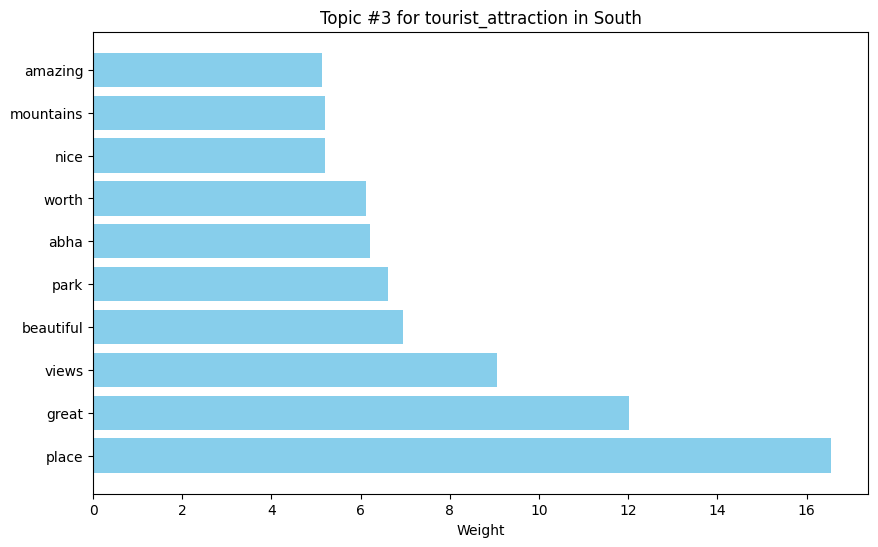


Topic #4:
['closed', 'night', 'walk', 'beautiful', 'good', 'nice', 'visit', 'view', 'place', 'park']


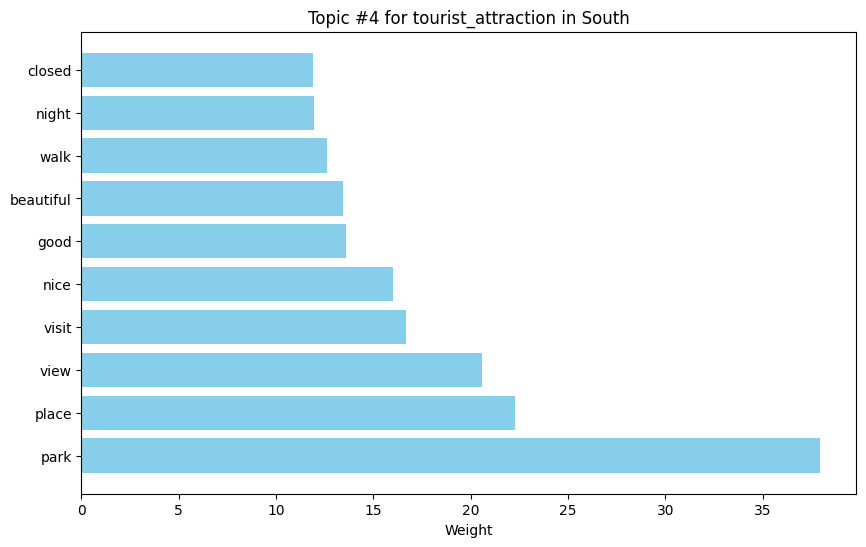


Topic #5:
['way', 'arabia', 'saudi', 'mountain', 'time', 'city', 'place', 'history', 'heritage', 'village']


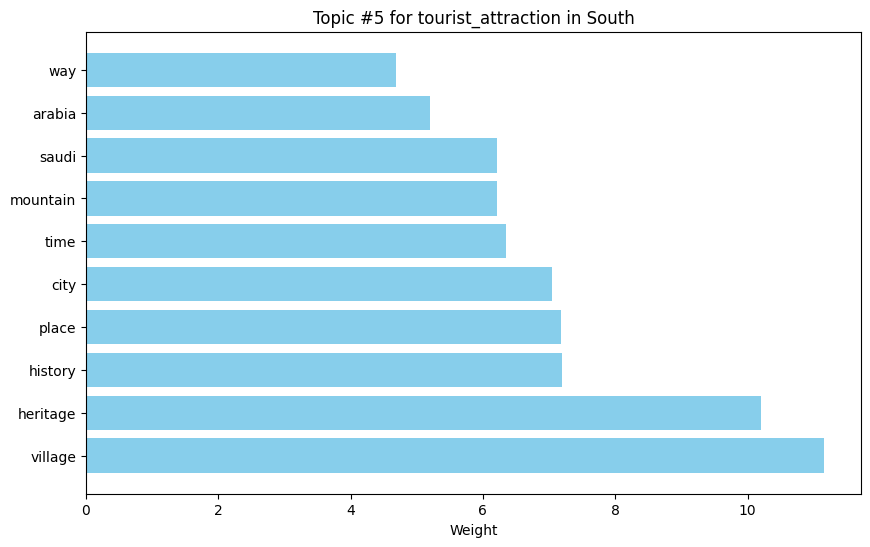


--- Topics for shopping_mall in South ---

Topic #1:
['floor', 'bad', 'nice', 'place', 'shops', 'clothes', 'prices', 'items', 'mall', 'good']


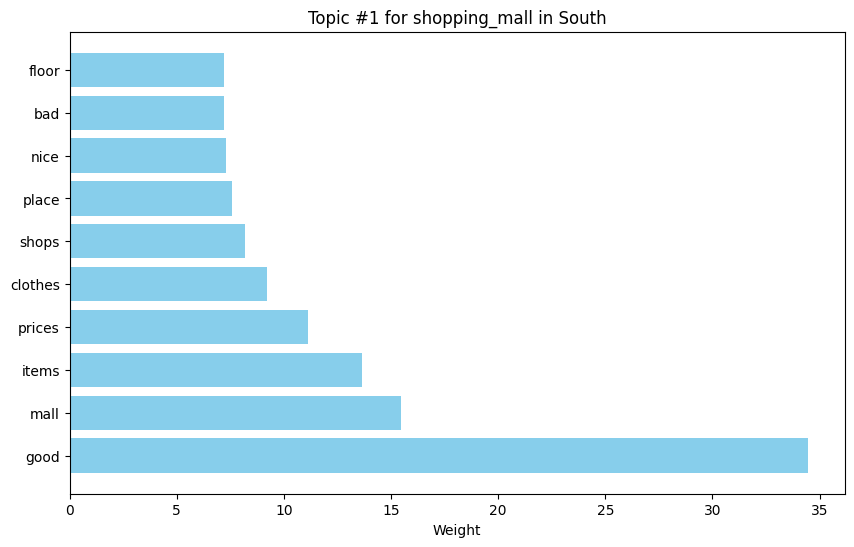


Topic #2:
['rashid', 'food', 'kids', 'excellent', 'options', 'brands', 'experience', 'al', 'shopping', 'mall']


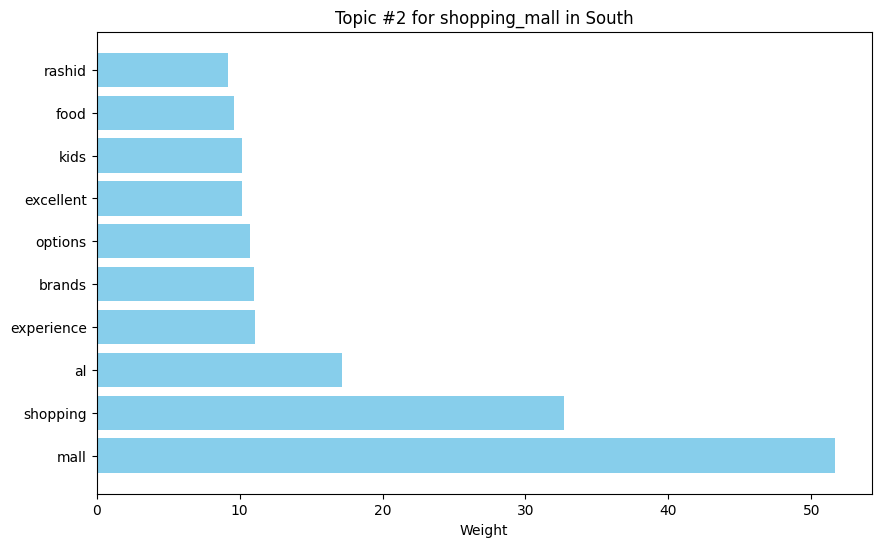


Topic #3:
['prices', 'good', 'lot', 'shoes', 'childrens', 'products', 'center', 'clothing', 'store', 'available']


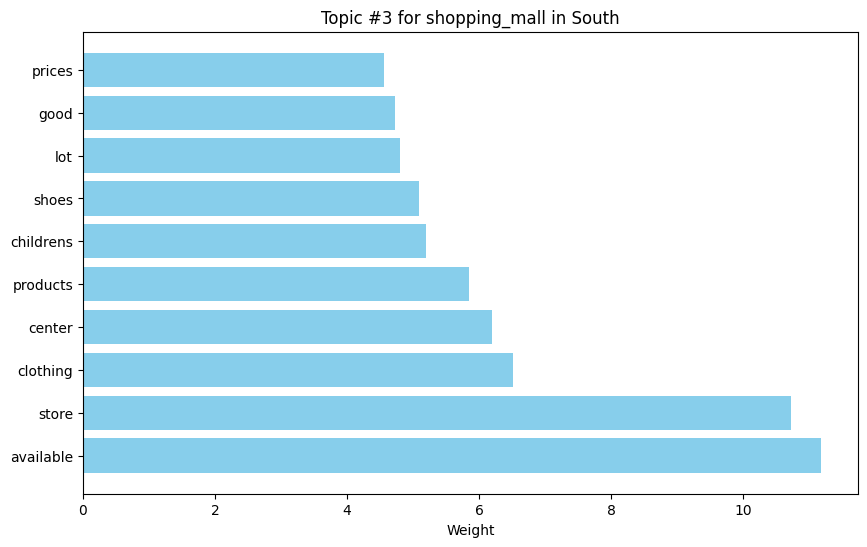


Topic #4:
['coffee', 'good', 'lot', 'open', 'people', 'parking', 'like', 'place', 'shop', 'shops']


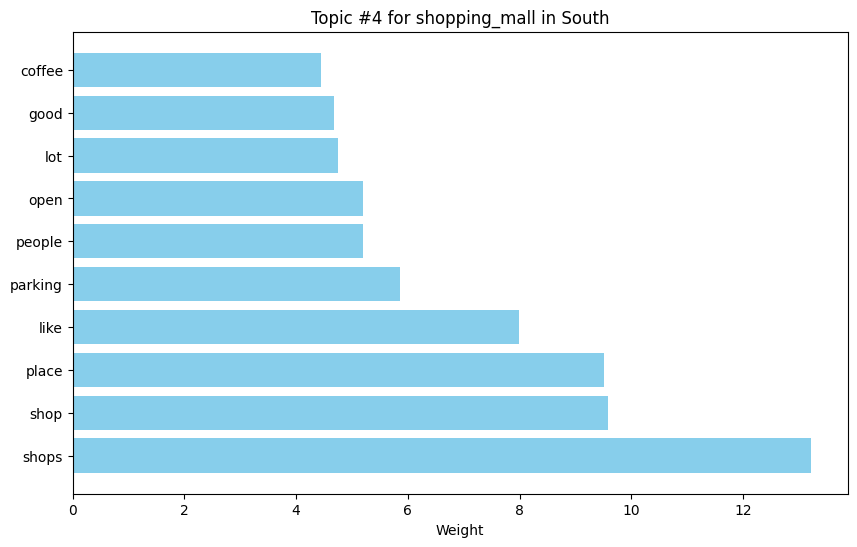


Topic #5:
['visit', 'complex', 'beautiful', 'coffee', 'shop', 'market', 'best', 'nice', 'place', 'good']


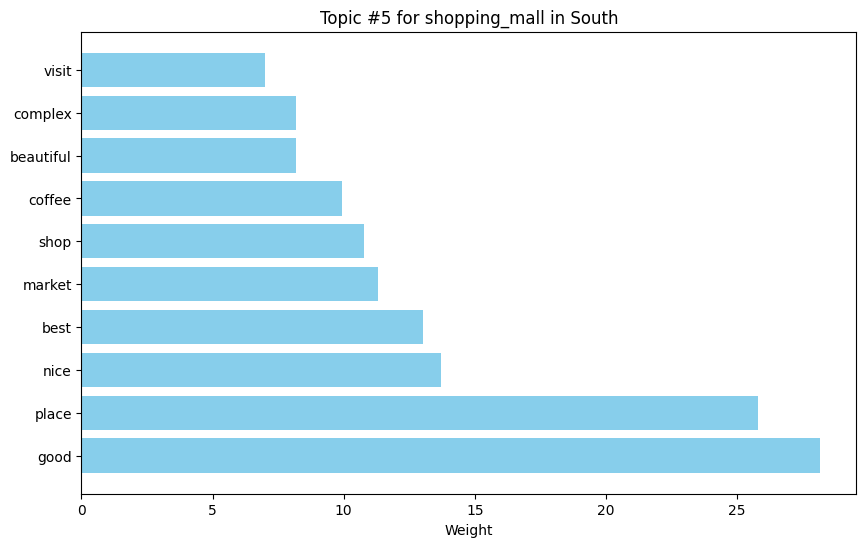


--- Topics for museum in South ---

Topic #1:
['visitor', 'archaeological', 'heritage', 'work', 'wonderful', 'good', 'closed', 'walk', 'history', 'museum']


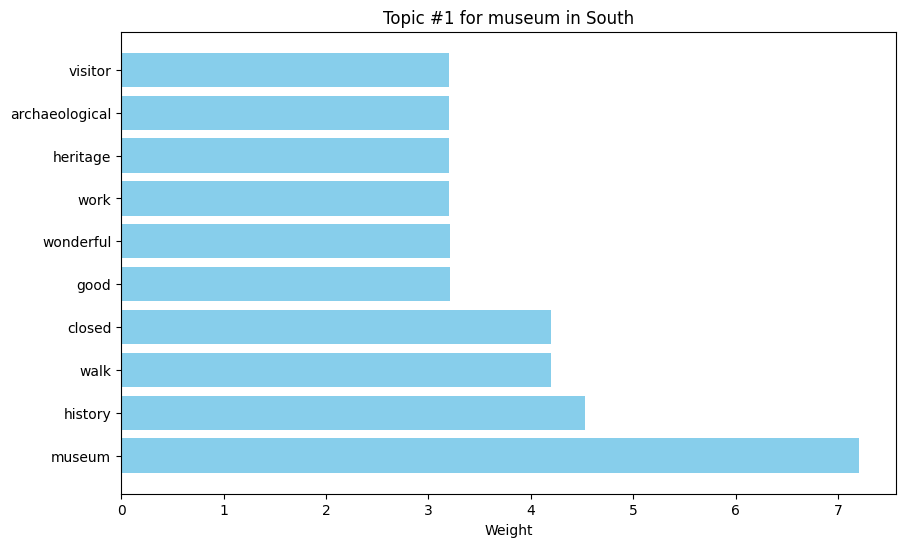


Topic #2:
['place', 'beautiful', 'ticket', 'traditional', 'al', 'saudi', 'small', 'worth', 'visit', 'museum']


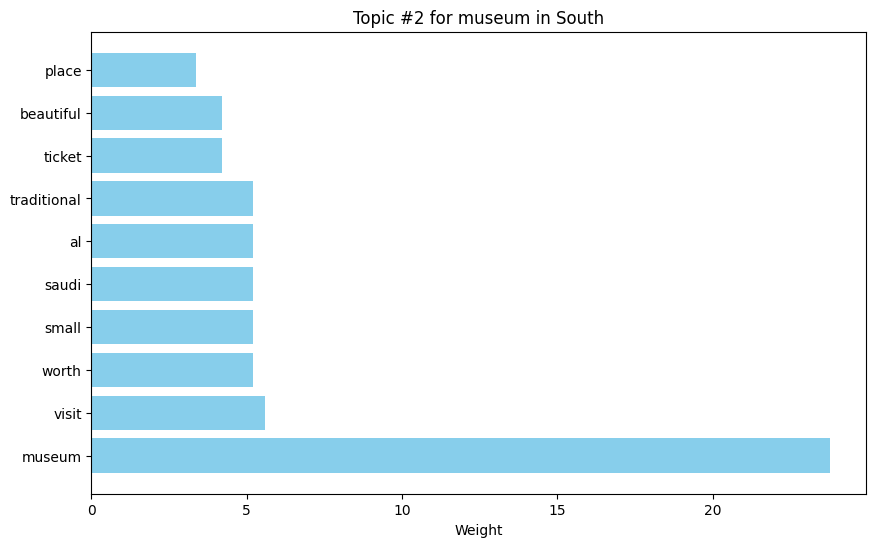


Topic #3:
['recommend', 'reception', 'museum', 'good', 'nice', 'evening', 'construction', 'open', 'tea', 'place']


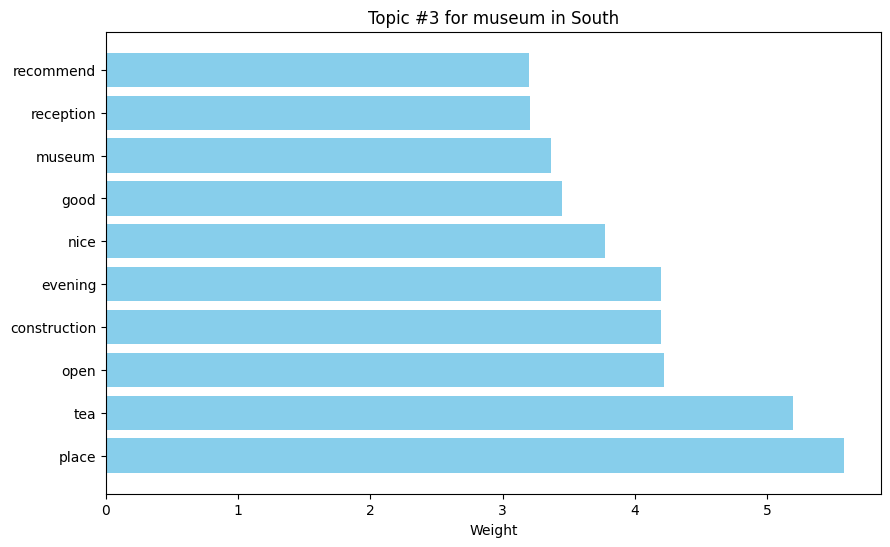


Topic #4:
['museum', 'visitor', 'heritage', 'great', 'history', 'store', 'visit', 'best', 'place', 'hall']


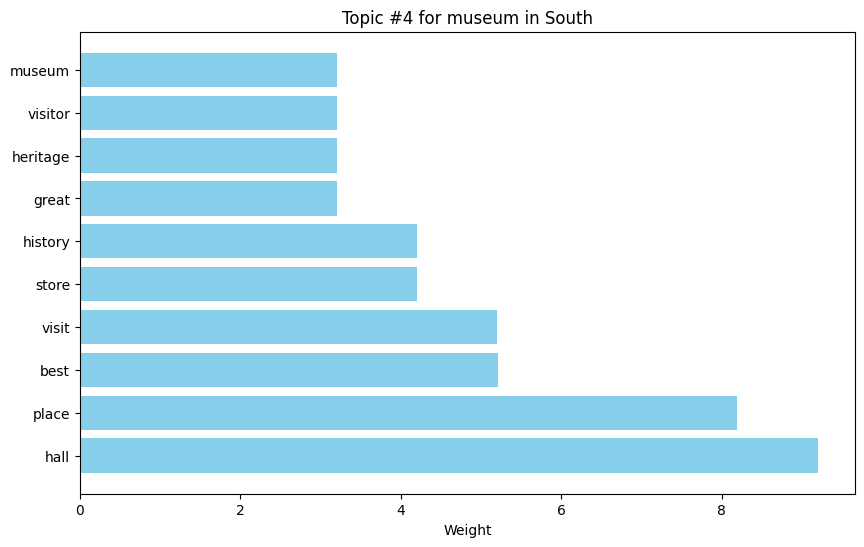


Topic #5:
['najran', 'great', 'thank', 'history', 'museum', 'visit', 'good', 'beautiful', 'nice', 'place']


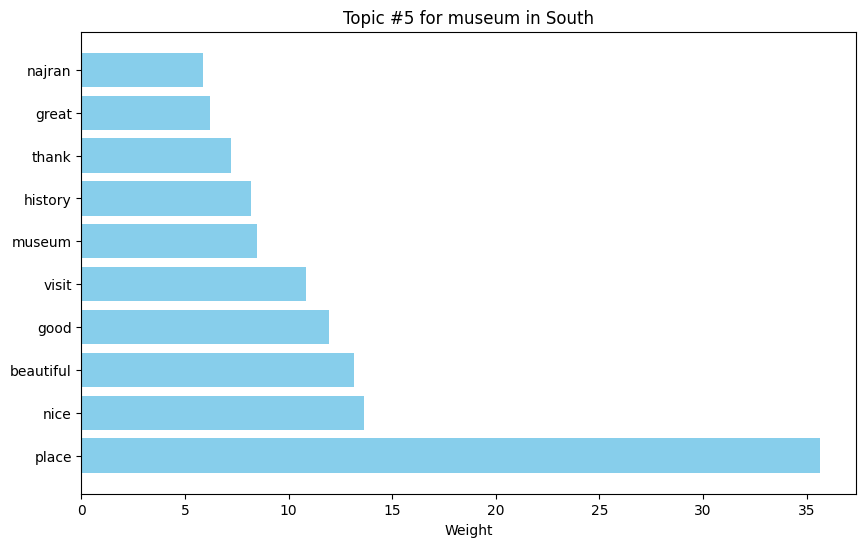


--- Topics for cafe in South ---

Topic #1:
['good', 'experience', 'tea', 'like', 'staff', 'food', 'delicious', 'place', 'excellent', 'coffee']


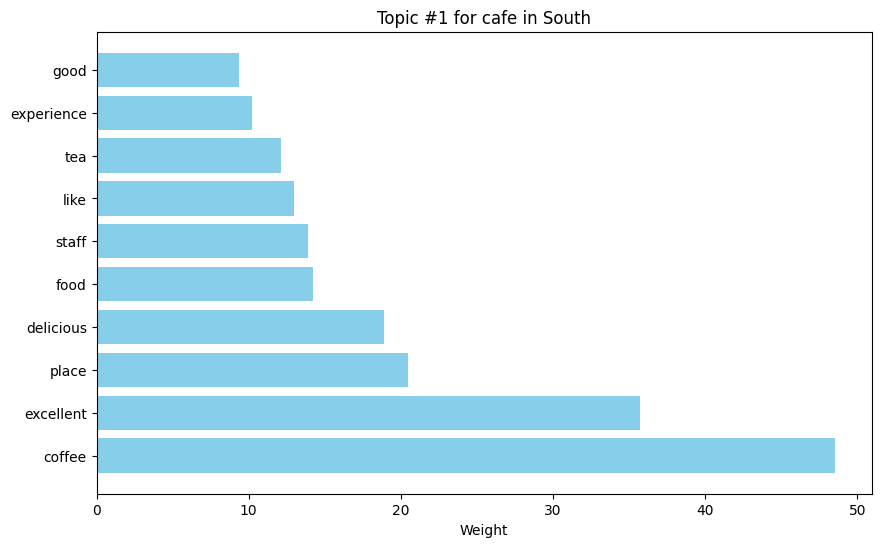


Topic #2:
['great', 'location', 'cafe', 'nice', 'staff', 'good', 'beautiful', 'delicious', 'place', 'coffee']


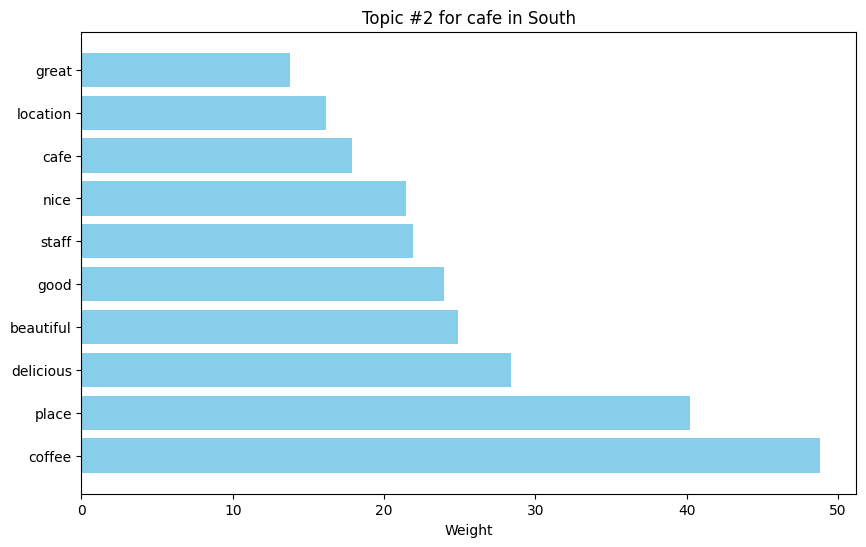


Topic #3:
['excellent', 'great', 'atmosphere', 'service', 'shop', 'amazing', 'best', 'place', 'good', 'coffee']


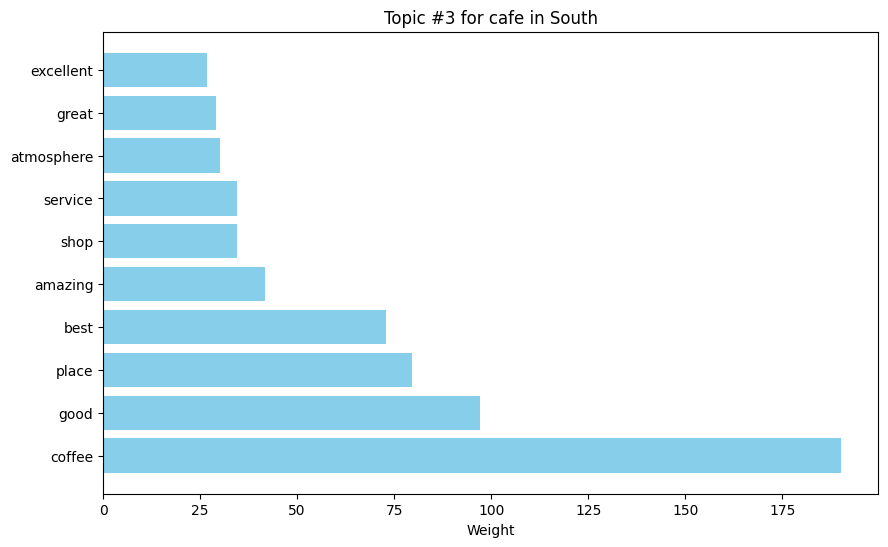


Topic #4:
['cold', 'beautiful', 'hot', 'cafe', 'service', 'time', 'coffee', 'place', 'good', 'nice']


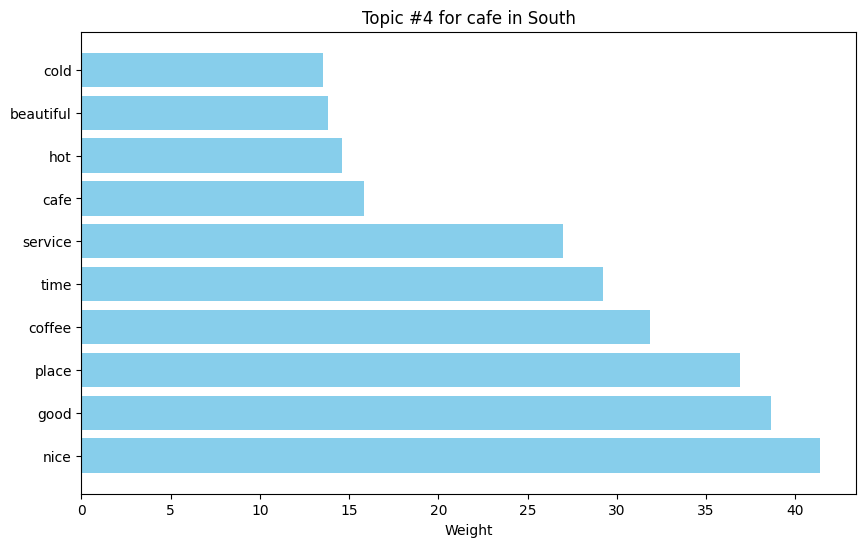


Topic #5:
['recommend', 'cake', 'food', 'view', 'awesome', 'service', 'great', 'place', 'coffee', 'good']


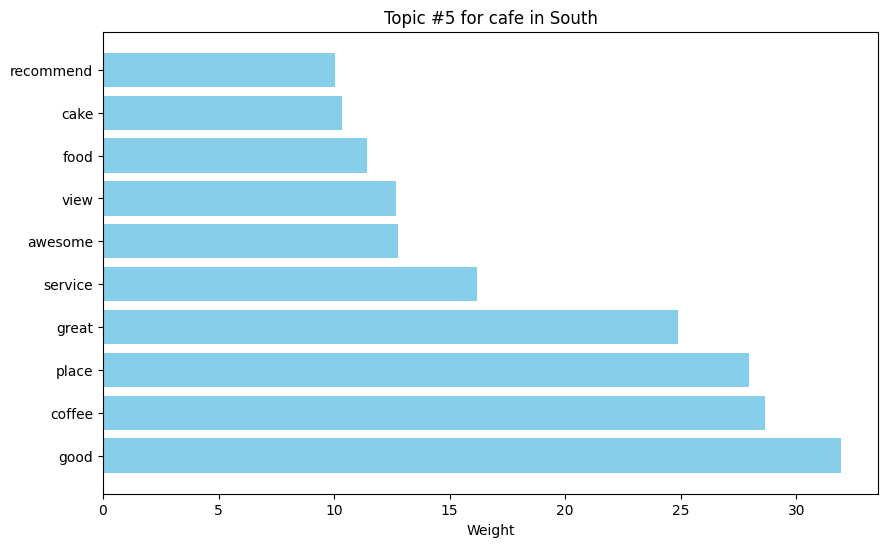


--- Topics for park in South ---

Topic #1:
['crowded', 'visit', 'family', 'people', 'walking', 'clean', 'park', 'kids', 'place', 'nice']


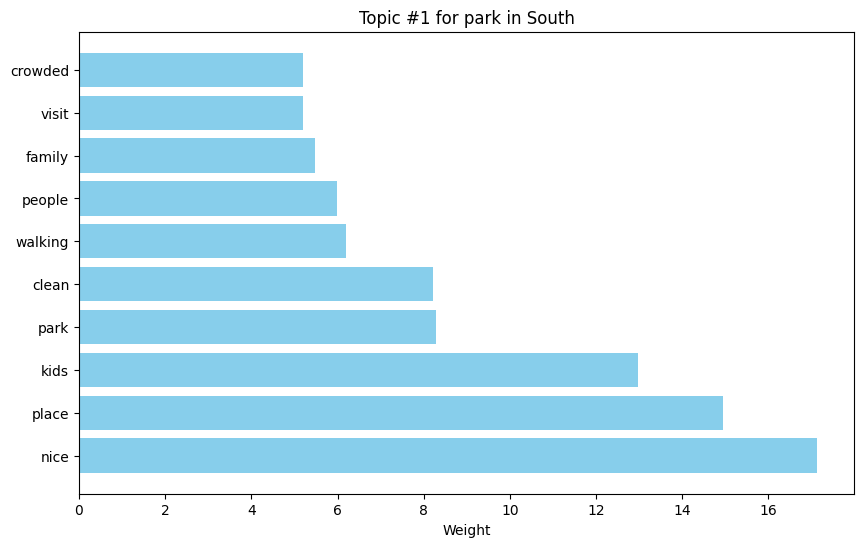


Topic #2:
['location', 'children', 'family', 'time', 'green', 'place', 'great', 'park', 'clean', 'good']


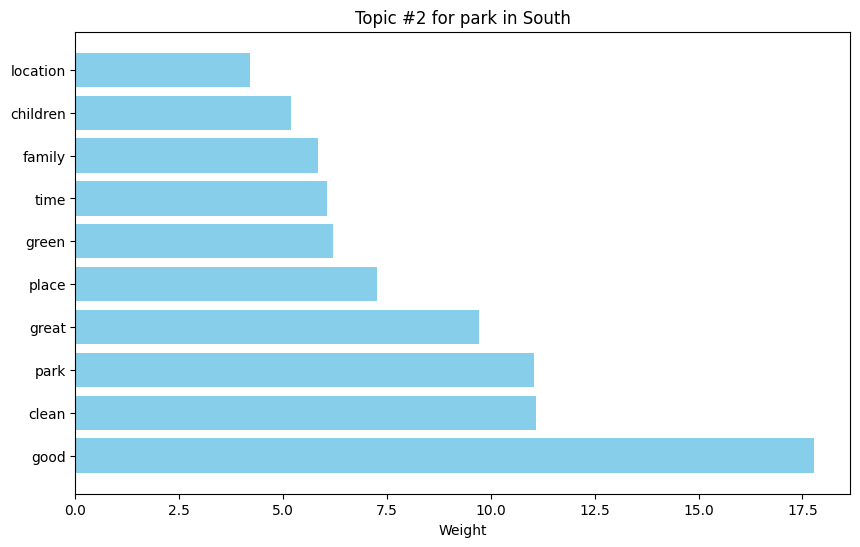


Topic #3:
['great', 'garden', 'walk', 'children', 'peaceful', 'area', 'best', 'place', 'park', 'beautiful']


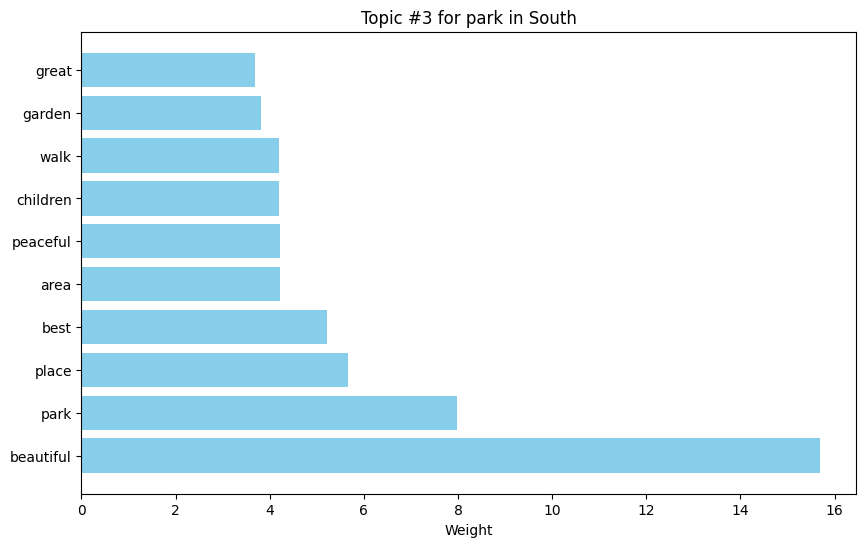


Topic #4:
['atmosphere', 'time', 'weather', 'najran', 'enjoy', 'visit', 'open', 'good', 'place', 'nice']


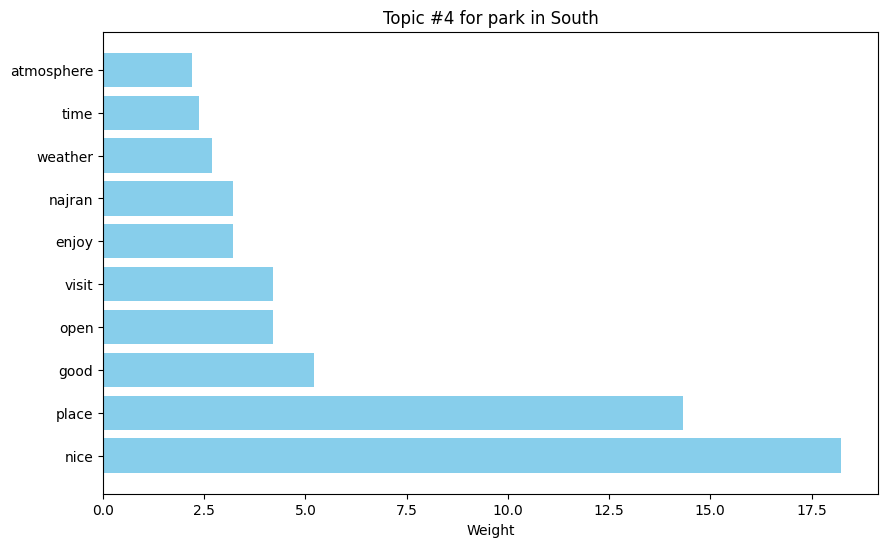


Topic #5:
['cool', 'beautiful', 'clean', 'people', 'city', 'kids', 'small', 'good', 'place', 'park']


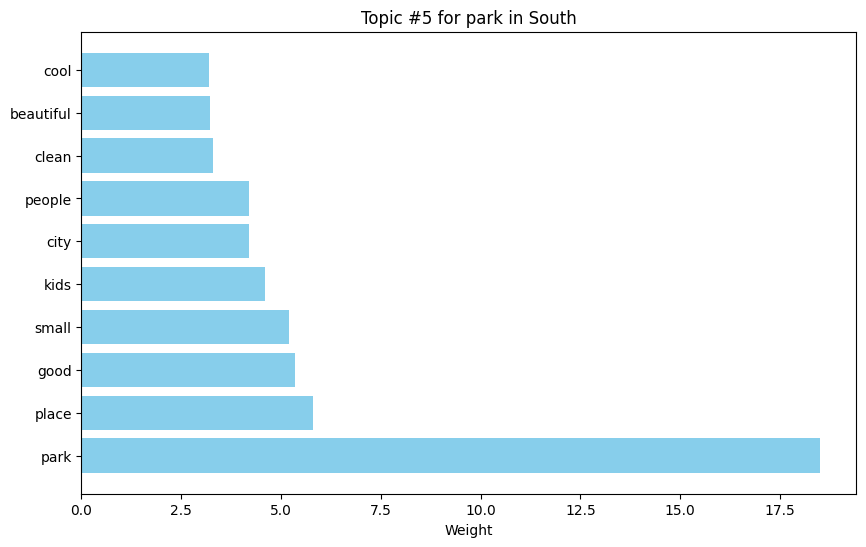


--- Topics for amusement_park in South ---

Topic #1:
['kids', 'wonderful', 'games', 'experience', 'good', 'children', 'amazing', 'great', 'fun', 'place']


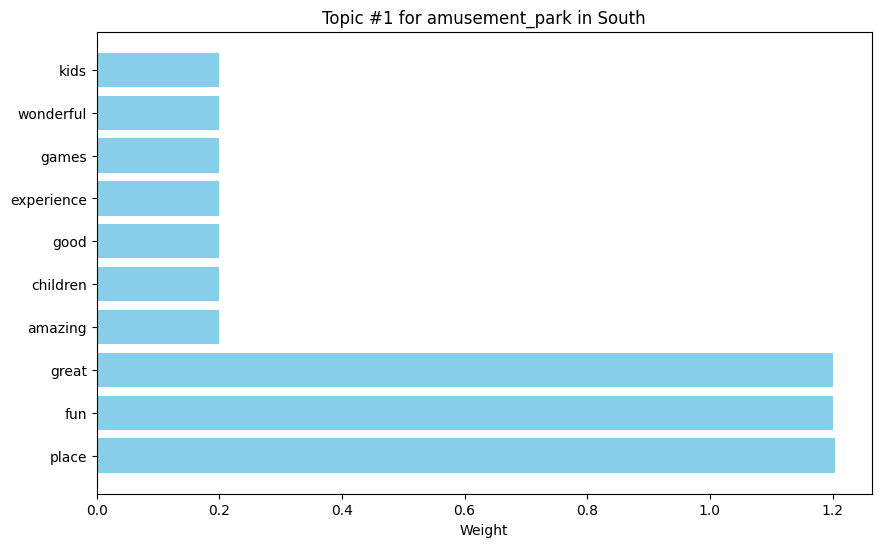


Topic #2:
['good', 'children', 'amazing', 'employee', 'employees', 'cashier', 'work', 'annual', 'wonderful', 'best']


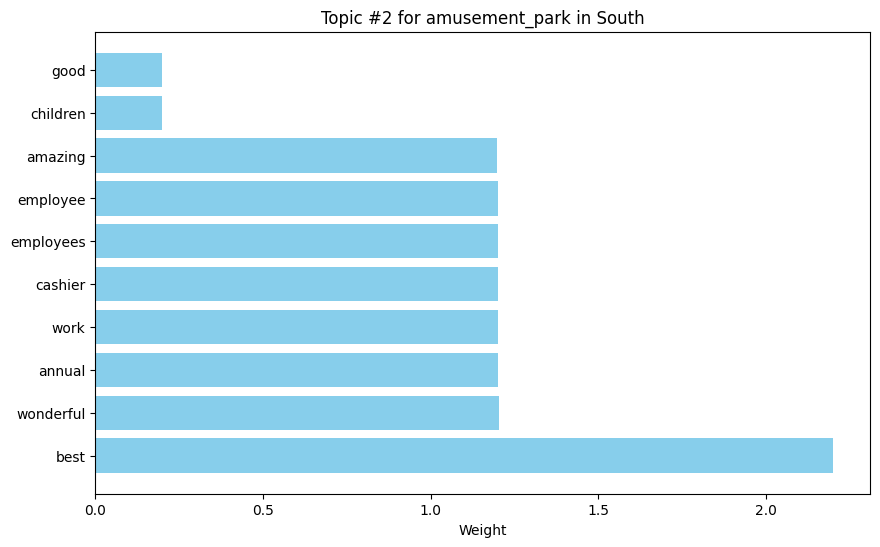


Topic #3:
['place', 'amazing', 'wonderful', 'good', 'like', 'children', 'enjoy', 'rides', 'games', 'kids']


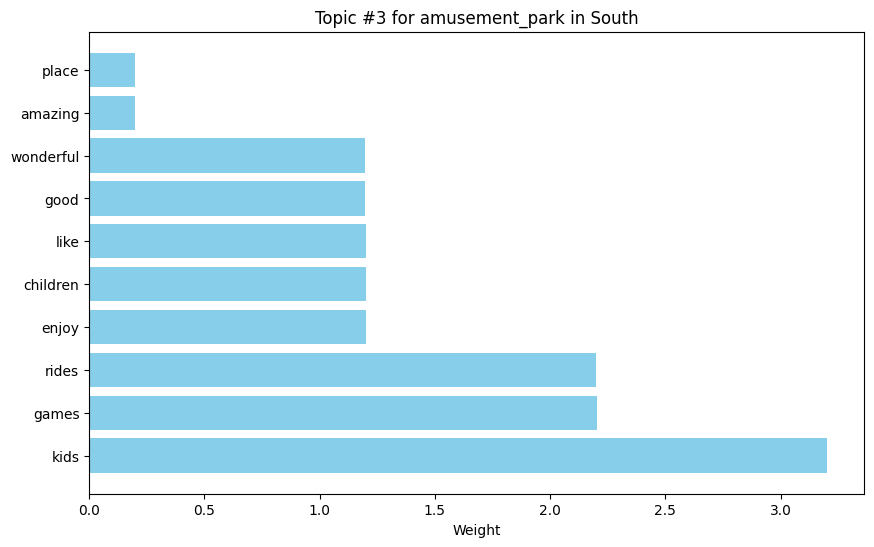


Topic #4:
['like', 'cashier', 'employee', 'employees', 'especially', 'love', 'thank', 'ahmed', 'issa', 'place']


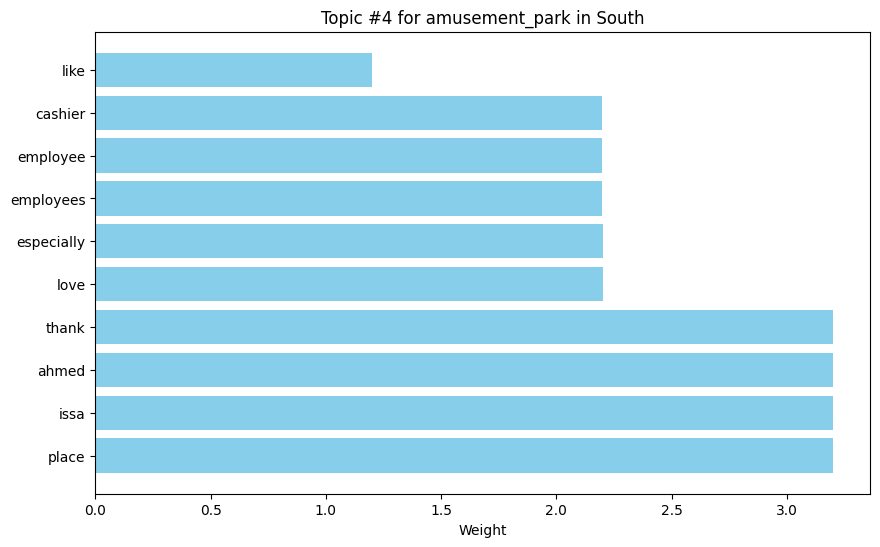


Topic #5:
['children', 'amazing', 'kids', 'great', 'know', 'good', 'place', 'experience', 'line', 'zip']


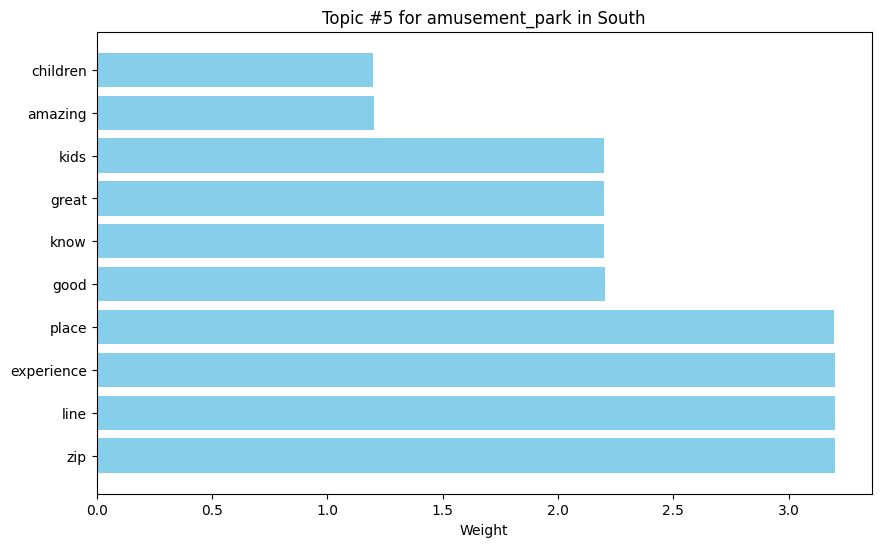

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

texts = df[['Region', 'Place Type', 'Cleaned Review']].dropna()

regions = texts['Region'].unique()

n_topics = 5

for region in regions:
    print(f"\n--- Topics for {region} ---")

    region_df = texts[texts['Region'] == region]
    place_types = region_df['Place Type'].unique()

    for place_type in place_types:
        print(f"\n--- Topics for {place_type} in {region} ---")

        place_df = region_df[region_df['Place Type'] == place_type]
        place_texts = place_df['Cleaned Review'].values.astype('U')

        if len(place_texts) < 5:
            print("Not enough reviews, skipping place type.")
            continue

        vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
        dtm = vectorizer.fit_transform(place_texts)

        lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
        lda.fit(dtm)

        words = vectorizer.get_feature_names_out()

        for idx, topic in enumerate(lda.components_):
            print(f"\nTopic #{idx + 1}:")
            top_words = [words[i] for i in topic.argsort()[-10:]]
            print(top_words)

            plt.figure(figsize=(10, 6))
            word_weights = [topic[i] for i in topic.argsort()[-10:]]
            plt.barh(top_words, word_weights, color='skyblue')
            plt.xlabel('Weight')
            plt.title(f'Topic #{idx + 1} for {place_type} in {region}')
            plt.gca().invert_yaxis()
            plt.show()


# Comparing topics across regions or places

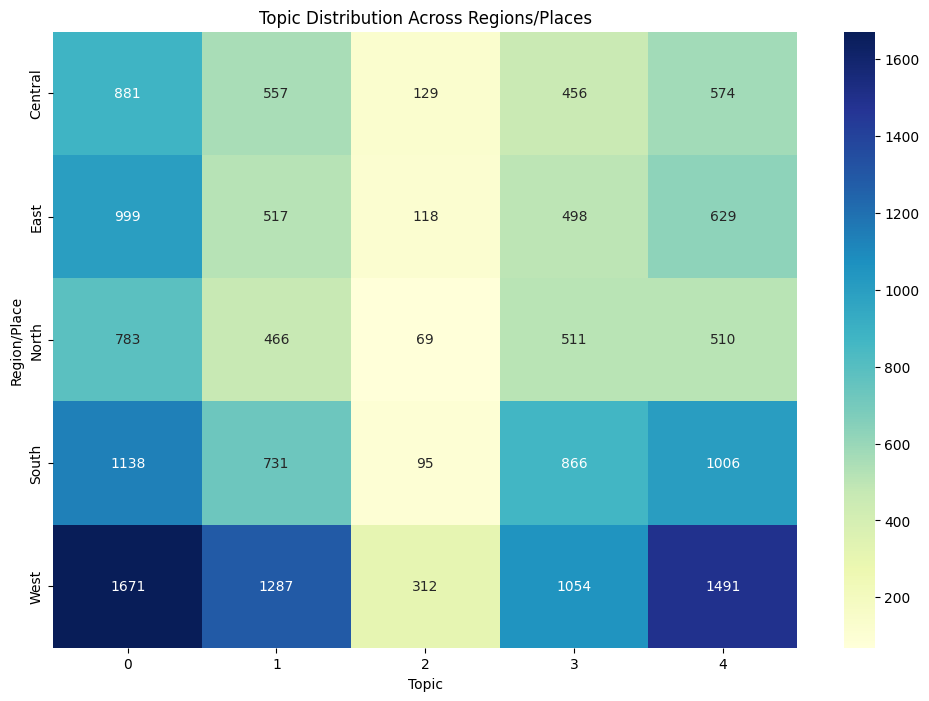

In [17]:
topic_distribution = df.groupby(['Region', 'Topic']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(topic_distribution, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Topic Distribution Across Regions/Places")
plt.ylabel("Region/Place")
plt.xlabel("Topic")
plt.show()


# Cluster reviews using KMeans

/tmp/ipykernel_7897/3639959684.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set2')


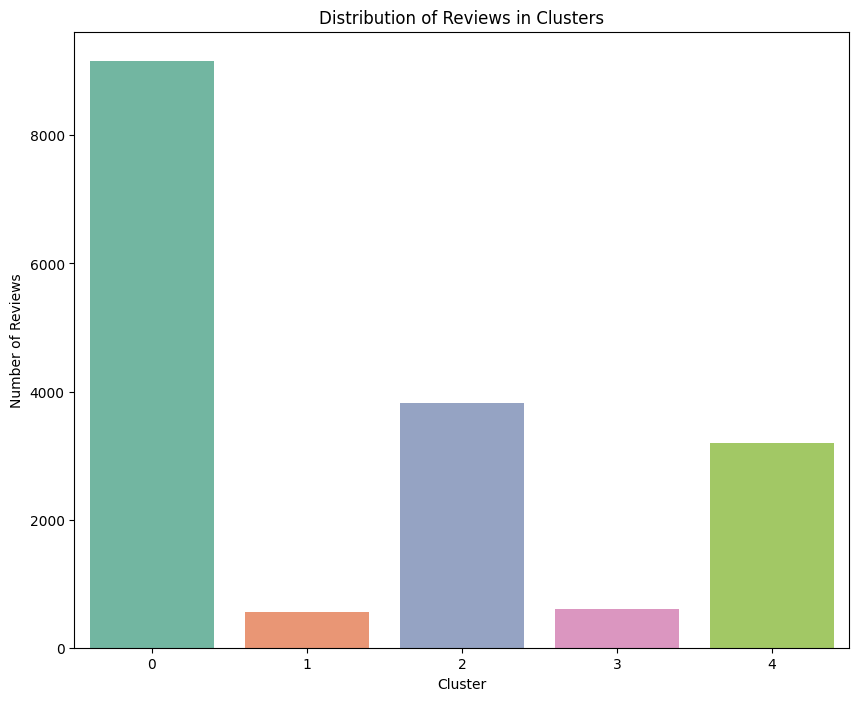

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['Cleaned Review'])

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_tfidf)

plt.figure(figsize=(10, 8))
sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title("Distribution of Reviews in Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Reviews")
plt.show()


In [24]:
import joblib

display(joblib.dump(lda_model, 'lda_model.pkl'))

joblib.dump(kmeans, 'kmeans_model.pkl')

['lda_model.pkl']

['kmeans_model.pkl']

In [23]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']